In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, log_loss
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


In [2]:
housing = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/housing_in_metro_cities.csv")
housing

Price  Area                         Location       City  \
0      30000000  3340                 JP Nagar Phase 1  Bangalore   
1       7888000  1045       Dasarahalli on Tumkur Road  Bangalore   
2       4866000  1179  Kannur on Thanisandra Main Road  Bangalore   
3       8358000  1675                     Doddanekundi  Bangalore   
4       6845000  1670                          Kengeri  Bangalore   
...         ...   ...                              ...        ...   
32958  14500000  1180                   Mira Road East     Mumbai   
32959  14500000   530                     Naigaon East     Mumbai   
32960   4100000   700                         Shirgaon     Mumbai   
32961   2750000   995                   Mira Road East     Mumbai   
32962   2750000  1020                   Mira Road East     Mumbai   

       No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  \
0                    4       0                 1          1             1   
1                    2       0                 0          1             1   
2                    2       0                 0          1             1   
3                    3       0                 0          0             0   
4                    3       0                 1          1             1   
...                ...     ...               ...        ...           ...   
32958                2       0                 9          9             9   
32959                1       1                 9          9             9   
32960                1       0                 9          9             9   
32961                2       0                 9          9             9   
32962                2       0                 9          9             9   

       LandscapedGardens  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
0                      1  ...              1    0                0          0   
1                      1  ...              1    0                1          0   
2                      1  ...              1    0                0          0   
3                      0  ...              1    0                0          0   
4                      1  ...              1    0                0          0   
...                  ...  ...            ...  ...              ...        ...   
32958                  9  ...              9    9                9          9   
32959                  9  ...              9    9                9          9   
32960                  9  ...              9    9                9          9   
32961                  9  ...              9    9                9          9   
32962                  9  ...              9    9                9          9   

       GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  
0               0   0            0     0         0             0  
1               0   0            0     0         0             0  
2               0   0            0     0         0             0  
3               0   0            0     0         0             0  
4               0   0            0     0         0             0  
...           ...  ..          ...   ...       ...           ...  
32958           9   9            9     9         9             9  
32959           9   9            9     9         9             9  
32960           9   9            9     9         9             9  
32961           9   9            9     9         9             9  
32962           9   9            9     9         9             9  

[32963 rows x 41 columns]

In [118]:
factor_levels = {}
df = housing.iloc[:,3:41]
for column in df.columns:
    factor_levels[column] = df[column].value_counts().index.tolist()

# Print the factor levels
for column, levels in factor_levels.items():
    print(f"{column}: {levels}")


City: ['Mumbai', 'Kolkata', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad']
No. of Bedrooms: [2, 3, 1, 4, 5, 6, 7, 8, 9]
Resale: [0, 1]
MaintenanceStaff: [9, 0, 1]
Gymnasium: [9, 1, 0]
SwimmingPool: [9, 0, 1]
LandscapedGardens: [9, 0, 1]
JoggingTrack: [9, 0, 1]
RainWaterHarvesting: [9, 0, 1]
IndoorGames: [9, 0, 1]
ShoppingMall: [9, 0, 1]
Intercom: [9, 0, 1]
SportsFacility: [9, 0, 1]
ATM: [9, 0, 1]
ClubHouse: [9, 0, 1]
School: [9, 0, 1]
24X7Security: [9, 0, 1]
PowerBackup: [9, 1, 0]
CarParking: [9, 0, 1]
StaffQuarter: [9, 0, 1]
Cafeteria: [9, 0, 1]
MultipurposeRoom: [9, 0, 1]
Hospital: [9, 0, 1]
WashingMachine: [9, 0, 1]
Gasconnection: [9, 0, 1]
AC: [9, 0, 1]
Wifi: [9, 0, 1]
Children'splayarea: [9, 1, 0]
LiftAvailable: [9, 1, 0]
BED: [9, 0, 1]
VaastuCompliant: [9, 0, 1]
Microwave: [9, 0, 1]
GolfCourse: [9, 0, 1]
TV: [9, 0, 1]
DiningTable: [9, 0, 1]
Sofa: [9, 0, 1]
Wardrobe: [9, 0, 1]
Refrigerator: [9, 0, 1]


In [119]:
min_price = min(housing['Price'])
max_price = max(housing['Price'])

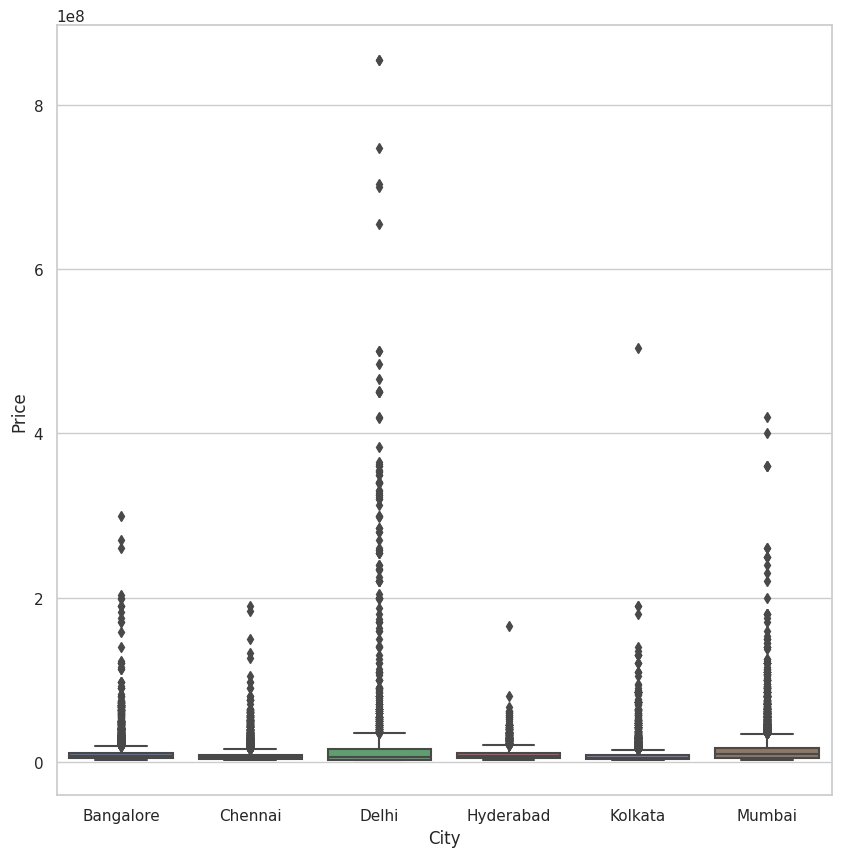

In [120]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
sns.boxplot(data=housing, x='City', y='Price')
plt.show() 

In [ ]:
plt.figure(figsize=(12, 9))
sns.set(style='whitegrid')
sns.violinplot(data=housing, y='City', x='Price')
plt.show()

In [ ]:
num_housing = housing.select_dtypes(include=['float64', 'int64'])
num_housing
essential = num_housing.iloc[:,:4]
essential

In [ ]:
corr_mat = data=essential.corr()
print(corr_mat)
sns.heatmap(corr_mat, annot=True, cmap='Blues',square=True, cbar=False)


In [ ]:

sns.pairplot(data=essential)

In [ ]:
plt.figure(figsize=(10, 9))
sns.histplot(housing['Price'], bins=50)

In [ ]:
skewness = housing['Price'].skew()
kurtosis = housing['Price'].kurtosis()
print(skewness)
print(kurtosis)


## Conclusion:
Skewness refers to whether the data is skewed to larger or smaller values and kurtosis indicates the propensity of the data to have extreme values.
skewness > 0: The distribution is right-skewed,most of the data is concentrated towards the left.

Kurtosis > 0: The distribution more outliers than a normal distribution.

## Hypothesis Testing

In [ ]:
# Split the data into two groups based on city
df = housing
group1 = df[df['City'] == 'Delhi']['Price']
group2 = df[df['City'] == 'Mumbai']['Price']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


## Conclusion:
Null hypothesis (H0): There is no significant difference in the mean Prices between the "Delhi" and "Mumbai".

Alternative hypothesis (H1): There is a significant difference in the mean Price between the "Delhi" and "Mumbai" load types.

With a p-value < 0.05, we would reject the null hypothesis (H0) and accept the alternative hypothesis (H1).
This implies that the "Mumbai" and "Delhi" have no significant difference in mean Prices.


In [ ]:
# Split the data into two groups based on city
group1 = df[df['City'] == 'Bangalore']['Price']
group2 = df[df['City'] == 'Kolkata']['Price']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


## Conclusion:

Null hypothesis (H0): There is no significant difference in the mean Prices between the "Bangalore" and "Kolkata".

Alternative hypothesis (H1): There is a significant difference in the mean Price between the "Bangalore" and "Kolkata" load types.

With a p-value < 0.05, we would reject the null hypothesis (H0) and accept the alternative hypothesis (H1). 
This implies that the "Bangalore" and "Kolkata" have significant difference in their mean Prices.


## Anova

In [ ]:
# Sample data for three groups
Mumbai = df[df['City'] == 'Mumbai']['Price']
Kolkata = df[df['City'] == 'Kolkata']['Price']
Bangalore = df[df['City'] == 'Bangalore']['Price']
Delhi = df[df['City'] == 'Delhi']['Price']


# Perform one-way ANOVA
f_statistic, p_value = f_oneway(Mumbai, Kolkata, Bangalore, Delhi)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

## Conclusion:
Null hypothesis (H0): There is no significant impact citywise location of the house on the price.
Alternative hypothesis (H1): There is a significant impact of citywise location of houses on the price.

p-value < 0.05 indicates there is a significant impact of citywise location of houses on the price.


## Machine Learning

In [ ]:
lr = LinearRegression()
X = housing[['Area']]
y = housing['Price']

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=True)

In [ ]:
lr = LinearRegression()
param = {
    'fit_intercept': [True, False],
}
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
gcv = GridSearchCV(lr, param_grid=param, cv=kfold, scoring='neg_mean_absolute_error')
gcv.fit(X_poly,y)
print(gcv.best_params_)
print(gcv.best_score_)


In [ ]:
housing['Price'].mean()

In [ ]:
dtr = DecisionTreeRegressor()
param = {
    'max_depth': [None,2,3,4,5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
gcv = GridSearchCV(dtr, param_grid=param,verbose=3, cv=kfold, scoring='neg_mean_absolute_error')
gcv.fit(X_poly,y)
print(gcv.best_params_)
print(gcv.best_score_)

## LogisticsRegression

In [6]:
log_reg = LogisticRegression()

In [58]:
#X = housing[['VaastuCompliant']]
#y = housing['Resale']
X = housing.drop(['Resale','Location','City'], axis = 1)
y = housing['Resale']

In [59]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {
    'C':[0.1, 1, 10], 'penalty':['11','l2']
}

gcv = GridSearchCV(log_reg, param_grid=params, cv=kfold,  scoring='neg_log_loss')
gcv.fit(X,y)
print("Best parameter", gcv.best_params_)
print("Best score", gcv.best_score_)

Best parameter {'C': 10, 'penalty': 'l2'}
Best score -0.6854337962565873


/home/darkstar/lang/python/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/darkstar/lang/python/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/darkstar/lang/python/venv/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/darkstar/lang/python/venv/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_pa

In [12]:
## train test split for logitics regression
X = housing[['VaastuCompliant']]
y = housing['Resale']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict_proba(X_test)
print(log_loss(y_test, y_pred))

0.6634892646421808


In [29]:
majority_class = y_train.value_counts().idxmax()

baseline_predictions = np.full_like(y_test, majority_class)

# Calculate the baseline log loss
baseline_log_loss = log_loss(y_test, np.column_stack((1 - baseline_predictions, baseline_predictions)))

print("Baseline Log Loss:", baseline_log_loss)

Baseline Log Loss: 13.68266506449042


In [54]:
### XGB
X = housing.drop(['Resale','Location','City'], axis = 1)
y = housing['Resale']

clf = XGBClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(clf, param_grid=params,verbose=2,cv=kfold,scoring='neg_log_loss')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=150; total time=   0.7s
[CV] END .learning_rate=0.001, max_depth=2, n_

[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.9s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.9s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.9s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estim

[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.9s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.17855555555555558, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.17855555555555558, max_depth=3, n_es

[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_est

[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estima

[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_

[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=150; total time=   2.5s
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=150; total time=   2.5s
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_e

[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=150; total time=   2.5s
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=150; total time=   2.5s
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.6224444444444445, max_depth=2, 

[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=150; total time=   2.5s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.7112222222222223, max_d

[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   2.3s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=150; total time=   2.6s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=150; total time=   2.4s
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=150; total time=   2.3s
[CV] END ....learning_rate=0.8, max_dept

{'learning_rate': 0.44488888888888894, 'max_depth': 6, 'n_estimators': 150}
-0.44126766876574947


In [53]:
##Light boost
X = housing.drop(['Resale','Location','City'], axis = 1)
y = housing['Resale']
lgbm = LGBMClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(lgbm, param_grid=params,verbose=2,cv=kfold,
                  scoring='neg_log_loss')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the 

[CV] END .learning_rate=0.001, max_depth=2, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=150; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise mul

[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise mul

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_ro

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END ..learning_rate=0.001, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [bina

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [bina

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END ..learning_rate=0.001, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [bina

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END .learning_rate=0.001, max_depth=6, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [bina

[CV] END learning_rate=0.001, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise

[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] A

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Sta

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.08977777777777779, max_depth=4, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightG

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[Light

[CV] END learning_rate=0.08977777777777779, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.08977777777777779, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.08977777777777779, max_depth=None, n_estimators=50; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warni

[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Au

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.17855555555555558, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the 

[CV] END learning_rate=0.17855555555555558, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[CV] END learning_rate=0.17855555555555558, max_depth=4, n_estimators=50; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=50; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in featu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=150; total time=   0.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negati

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, max_depth=6, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true`

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.17855555555555558, m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.17855555555555558, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.17855555555555558, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=3, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Sta

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=4, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=4, n_estimators=100; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_row_wise=true` to remove the 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=4, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.26733333333333337, max_depth=4, n_estimators=150; total time=   0.3s
[Light

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.26733333333333337, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.26733333333333337, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[Light

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.26733333333333337, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.26733333333333337, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.26733333333333337, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad s

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.26733333333333337, max_depth=6, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.26733333333333337, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.26733333333333337, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warni

[CV] END learning_rate=0.26733333333333337, max_depth=None, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.26733333333333337, max_depth=None, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.3561111111111111

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.35611111111111116, max_depth=3, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.35611111111111116, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.35611111111111116, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[CV] END learning_rate=0.35611111111111116, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightG

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.35611111111111116, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM]

[CV] END learning_rate=0.35611111111111116, max_depth=5, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.35611111111111116, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negativ

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [War

[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.44488888888888894, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.44488888888888894, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of tes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[CV] END learning_rate=0.44488888888888894, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightG

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.44488888888888894, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.44488888888888894, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.44488888888888894, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.44488888888888894, max_depth=6, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of 

[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [War

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001362 seconds.
You can se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.5336666666666667, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.5336666666666667, max_depth=3, n_estimators=150; total time=   0.2s
[LightG

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[CV] END learning_rate=0.5336666666666667, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGB

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Num

[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Fou

[CV] END learning_rate=0.6224444444444445, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.6224444444444445, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.6224444444444445, max_depth=4, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[CV] END learning_rate=0.6224444444444445, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.6224444444444445, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accura

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning

[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] 

[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.7112222222222223,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.7112222222222223, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.7112222222222223, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.7112222222222223, max_depth=4, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:B

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.7112222222222223, max_depth=4, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[CV] END learning_rate=0.7112222222222223, max_depth=4, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightG

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.7112222222222223, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.7112222222222223, max_depth=6, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=0.7112222222222223, max_depth=6, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negativ

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warni

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END ....learning_rate=0.8, max_depth=2, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing col-wise multi-thr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END ....learning_rate=0.8, max_depth=3, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromSco

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END ...learning_rate=0.8, max_depth=3, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END ...learning_rate=0.8, max_depth=3, n_estimators=150; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warnin

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END ...learning_rate=0.8, max_depth=4, n_estimators=100; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[CV] END ....learning_rate=0.8, max_depth=5, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END ...learning_rate=0.8, max_depth=5, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381418 -> initscore=-0.483533
[LightGBM] [Info] Start training from score -0.483533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END ...learning_rate=0.8, max_depth=6, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[Li

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END .learning_rate=0.8, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26370, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381380 -> initscore=-0.483693
[LightGBM] [Info] Start training from score -0.483693
[CV] END .learning_rate=0.8, max_depth=None, n_estimators=50; total time=   0.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10057, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise mul

[CV] END learning_rate=0.8, max_depth=None, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 26371, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381404 -> initscore=-0.483594
[LightGBM] [Info] Start training from score -0.483594
[CV] END learning_rate=0.8, max_depth=None, n_estimators=150; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10058, number of negative: 16313
[LightGBM] [Warning] Auto-choosing row-wise mul

In [52]:
from catboost import CatBoostClassifier 
X = housing.drop(['Resale','Location','City'], axis = 1)
y = housing['Resale']

cgbm = CatBoostClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(cgbm, param_grid=params,cv=kfold,verbose=2,
                  scoring='neg_log_loss')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
0:	learn: 0.6930170	total: 3.24ms	remaining: 159ms
1:	learn: 0.6929029	total: 6.67ms	remaining: 160ms
2:	learn: 0.6927916	total: 9.69ms	remaining: 152ms
3:	learn: 0.6926644	total: 12.2ms	remaining: 140ms
4:	learn: 0.6925542	total: 15.2ms	remaining: 137ms
5:	learn: 0.6924431	total: 18.5ms	remaining: 136ms
6:	learn: 0.6923173	total: 21.7ms	remaining: 133ms
7:	learn: 0.6922032	total: 24.8ms	remaining: 130ms
8:	learn: 0.6920805	total: 27.2ms	remaining: 124ms
9:	learn: 0.6919556	total: 29.5ms	remaining: 118ms
10:	learn: 0.6918315	total: 32.4ms	remaining: 115ms
11:	learn: 0.6917190	total: 35.7ms	remaining: 113ms
12:	learn: 0.6915892	total: 38.3ms	remaining: 109ms
13:	learn: 0.6914718	total: 40.7ms	remaining: 105ms
14:	learn: 0.6913568	total: 43ms	remaining: 100ms
15:	learn: 0.6912355	total: 45.4ms	remaining: 96.5ms
16:	learn: 0.6911138	total: 48.7ms	remaining: 94.5ms
17:	learn: 0.6909894	total: 51.3ms	remaining: 91.1ms
18:	learn:

36:	learn: 0.6888673	total: 89.8ms	remaining: 31.6ms
37:	learn: 0.6887539	total: 92.8ms	remaining: 29.3ms
38:	learn: 0.6886443	total: 95.4ms	remaining: 26.9ms
39:	learn: 0.6885345	total: 98.2ms	remaining: 24.6ms
40:	learn: 0.6884291	total: 101ms	remaining: 22.1ms
41:	learn: 0.6883305	total: 103ms	remaining: 19.7ms
42:	learn: 0.6882249	total: 106ms	remaining: 17.3ms
43:	learn: 0.6881061	total: 109ms	remaining: 14.9ms
44:	learn: 0.6879996	total: 112ms	remaining: 12.4ms
45:	learn: 0.6878859	total: 114ms	remaining: 9.94ms
46:	learn: 0.6877652	total: 117ms	remaining: 7.46ms
47:	learn: 0.6876672	total: 119ms	remaining: 4.97ms
48:	learn: 0.6875523	total: 122ms	remaining: 2.49ms
49:	learn: 0.6874454	total: 125ms	remaining: 0us
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.2s
0:	learn: 0.6930198	total: 2.47ms	remaining: 121ms
1:	learn: 0.6929026	total: 5.27ms	remaining: 126ms
2:	learn: 0.6927782	total: 7.74ms	remaining: 121ms
3:	learn: 0.6926498	total: 10.1ms	rem

54:	learn: 0.6867953	total: 128ms	remaining: 105ms
55:	learn: 0.6866802	total: 131ms	remaining: 103ms
56:	learn: 0.6865750	total: 133ms	remaining: 101ms
57:	learn: 0.6864739	total: 136ms	remaining: 98.6ms
58:	learn: 0.6863601	total: 139ms	remaining: 96.6ms
59:	learn: 0.6862596	total: 142ms	remaining: 94.5ms
60:	learn: 0.6861426	total: 145ms	remaining: 92.6ms
61:	learn: 0.6860266	total: 148ms	remaining: 90.7ms
62:	learn: 0.6859271	total: 151ms	remaining: 88.9ms
63:	learn: 0.6858224	total: 154ms	remaining: 86.7ms
64:	learn: 0.6857145	total: 157ms	remaining: 84.6ms
65:	learn: 0.6855989	total: 160ms	remaining: 82.5ms
66:	learn: 0.6854979	total: 163ms	remaining: 80.2ms
67:	learn: 0.6853865	total: 165ms	remaining: 77.9ms
68:	learn: 0.6852876	total: 168ms	remaining: 75.5ms
69:	learn: 0.6851896	total: 170ms	remaining: 73ms
70:	learn: 0.6850846	total: 173ms	remaining: 70.5ms
71:	learn: 0.6849794	total: 175ms	remaining: 68.1ms
72:	learn: 0.6848773	total: 177ms	remaining: 65.7ms
73:	learn: 0.6847

54:	learn: 0.6868891	total: 135ms	remaining: 111ms
55:	learn: 0.6867905	total: 138ms	remaining: 108ms
56:	learn: 0.6866858	total: 141ms	remaining: 106ms
57:	learn: 0.6865714	total: 144ms	remaining: 104ms
58:	learn: 0.6864709	total: 147ms	remaining: 102ms
59:	learn: 0.6863736	total: 150ms	remaining: 100ms
60:	learn: 0.6862738	total: 153ms	remaining: 98ms
61:	learn: 0.6861576	total: 156ms	remaining: 95.7ms
62:	learn: 0.6860550	total: 159ms	remaining: 93.4ms
63:	learn: 0.6859421	total: 161ms	remaining: 90.8ms
64:	learn: 0.6858331	total: 164ms	remaining: 88.3ms
65:	learn: 0.6857336	total: 167ms	remaining: 85.8ms
66:	learn: 0.6856297	total: 169ms	remaining: 83.3ms
67:	learn: 0.6855229	total: 171ms	remaining: 80.7ms
68:	learn: 0.6854231	total: 174ms	remaining: 78.1ms
69:	learn: 0.6853245	total: 176ms	remaining: 75.6ms
70:	learn: 0.6852178	total: 179ms	remaining: 73ms
71:	learn: 0.6851077	total: 181ms	remaining: 70.5ms
72:	learn: 0.6849985	total: 184ms	remaining: 68ms
73:	learn: 0.6848968	tot

56:	learn: 0.6865462	total: 142ms	remaining: 232ms
57:	learn: 0.6864424	total: 145ms	remaining: 230ms
58:	learn: 0.6863270	total: 148ms	remaining: 228ms
59:	learn: 0.6862154	total: 151ms	remaining: 227ms
60:	learn: 0.6861038	total: 154ms	remaining: 225ms
61:	learn: 0.6859944	total: 157ms	remaining: 223ms
62:	learn: 0.6858792	total: 160ms	remaining: 221ms
63:	learn: 0.6857666	total: 163ms	remaining: 219ms
64:	learn: 0.6856694	total: 166ms	remaining: 217ms
65:	learn: 0.6855525	total: 168ms	remaining: 214ms
66:	learn: 0.6854536	total: 170ms	remaining: 211ms
67:	learn: 0.6853483	total: 173ms	remaining: 208ms
68:	learn: 0.6852396	total: 175ms	remaining: 206ms
69:	learn: 0.6851286	total: 178ms	remaining: 203ms
70:	learn: 0.6850227	total: 180ms	remaining: 201ms
71:	learn: 0.6849127	total: 183ms	remaining: 198ms
72:	learn: 0.6848088	total: 185ms	remaining: 196ms
73:	learn: 0.6846946	total: 188ms	remaining: 193ms
74:	learn: 0.6845834	total: 190ms	remaining: 190ms
75:	learn: 0.6844753	total: 193

85:	learn: 0.6835145	total: 267ms	remaining: 198ms
86:	learn: 0.6834096	total: 272ms	remaining: 197ms
87:	learn: 0.6833138	total: 275ms	remaining: 194ms
88:	learn: 0.6832148	total: 278ms	remaining: 191ms
89:	learn: 0.6831080	total: 281ms	remaining: 187ms
90:	learn: 0.6830122	total: 284ms	remaining: 184ms
91:	learn: 0.6829148	total: 287ms	remaining: 181ms
92:	learn: 0.6828033	total: 290ms	remaining: 178ms
93:	learn: 0.6826994	total: 293ms	remaining: 175ms
94:	learn: 0.6825976	total: 296ms	remaining: 172ms
95:	learn: 0.6824892	total: 300ms	remaining: 169ms
96:	learn: 0.6823901	total: 303ms	remaining: 166ms
97:	learn: 0.6822913	total: 306ms	remaining: 163ms
98:	learn: 0.6821949	total: 309ms	remaining: 159ms
99:	learn: 0.6820872	total: 312ms	remaining: 156ms
100:	learn: 0.6819934	total: 315ms	remaining: 153ms
101:	learn: 0.6818889	total: 319ms	remaining: 150ms
102:	learn: 0.6817919	total: 321ms	remaining: 147ms
103:	learn: 0.6816993	total: 324ms	remaining: 143ms
104:	learn: 0.6816010	total

104:	learn: 0.6813383	total: 346ms	remaining: 148ms
105:	learn: 0.6812435	total: 350ms	remaining: 145ms
106:	learn: 0.6811396	total: 353ms	remaining: 142ms
107:	learn: 0.6810362	total: 357ms	remaining: 139ms
108:	learn: 0.6809351	total: 361ms	remaining: 136ms
109:	learn: 0.6808293	total: 365ms	remaining: 133ms
110:	learn: 0.6807273	total: 369ms	remaining: 130ms
111:	learn: 0.6806237	total: 373ms	remaining: 126ms
112:	learn: 0.6805304	total: 377ms	remaining: 123ms
113:	learn: 0.6804275	total: 380ms	remaining: 120ms
114:	learn: 0.6803353	total: 383ms	remaining: 116ms
115:	learn: 0.6802398	total: 386ms	remaining: 113ms
116:	learn: 0.6801397	total: 390ms	remaining: 110ms
117:	learn: 0.6800440	total: 393ms	remaining: 107ms
118:	learn: 0.6799428	total: 397ms	remaining: 103ms
119:	learn: 0.6798377	total: 399ms	remaining: 99.8ms
120:	learn: 0.6797367	total: 403ms	remaining: 96.6ms
121:	learn: 0.6796361	total: 406ms	remaining: 93.3ms
122:	learn: 0.6795359	total: 410ms	remaining: 90ms
123:	learn

126:	learn: 0.6796826	total: 406ms	remaining: 73.5ms
127:	learn: 0.6795958	total: 410ms	remaining: 70.4ms
128:	learn: 0.6795063	total: 413ms	remaining: 67.2ms
129:	learn: 0.6794187	total: 416ms	remaining: 64ms
130:	learn: 0.6793242	total: 419ms	remaining: 60.7ms
131:	learn: 0.6792326	total: 422ms	remaining: 57.6ms
132:	learn: 0.6791460	total: 425ms	remaining: 54.3ms
133:	learn: 0.6790607	total: 428ms	remaining: 51.1ms
134:	learn: 0.6789662	total: 432ms	remaining: 47.9ms
135:	learn: 0.6788772	total: 436ms	remaining: 44.8ms
136:	learn: 0.6787764	total: 439ms	remaining: 41.7ms
137:	learn: 0.6786805	total: 442ms	remaining: 38.4ms
138:	learn: 0.6785917	total: 445ms	remaining: 35.2ms
139:	learn: 0.6784986	total: 448ms	remaining: 32ms
140:	learn: 0.6784032	total: 450ms	remaining: 28.7ms
141:	learn: 0.6783139	total: 454ms	remaining: 25.6ms
142:	learn: 0.6782308	total: 457ms	remaining: 22.4ms
143:	learn: 0.6781448	total: 460ms	remaining: 19.2ms
144:	learn: 0.6780531	total: 463ms	remaining: 16ms

148:	learn: 0.6775577	total: 479ms	remaining: 3.22ms
149:	learn: 0.6774661	total: 483ms	remaining: 0us
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=150; total time=   0.5s
0:	learn: 0.6929913	total: 3.24ms	remaining: 159ms
1:	learn: 0.6928547	total: 6.99ms	remaining: 168ms
2:	learn: 0.6927131	total: 10.7ms	remaining: 167ms
3:	learn: 0.6925792	total: 14.5ms	remaining: 166ms
4:	learn: 0.6924395	total: 17.8ms	remaining: 160ms
5:	learn: 0.6922943	total: 22.3ms	remaining: 164ms
6:	learn: 0.6921542	total: 25.9ms	remaining: 159ms
7:	learn: 0.6920148	total: 30.1ms	remaining: 158ms
8:	learn: 0.6918764	total: 33.5ms	remaining: 152ms
9:	learn: 0.6917530	total: 38ms	remaining: 152ms
10:	learn: 0.6916046	total: 41.8ms	remaining: 148ms
11:	learn: 0.6914704	total: 45.8ms	remaining: 145ms
12:	learn: 0.6913362	total: 49.2ms	remaining: 140ms
13:	learn: 0.6912006	total: 53.2ms	remaining: 137ms
14:	learn: 0.6910502	total: 57.9ms	remaining: 135ms
15:	learn: 0.6909068	total: 61ms	remaining: 130m

16:	learn: 0.6908072	total: 62.9ms	remaining: 122ms
17:	learn: 0.6906636	total: 69.5ms	remaining: 123ms
18:	learn: 0.6905180	total: 72.8ms	remaining: 119ms
19:	learn: 0.6903848	total: 78.1ms	remaining: 117ms
20:	learn: 0.6902477	total: 82.5ms	remaining: 114ms
21:	learn: 0.6901033	total: 86.5ms	remaining: 110ms
22:	learn: 0.6899830	total: 91.1ms	remaining: 107ms
23:	learn: 0.6898391	total: 96.2ms	remaining: 104ms
24:	learn: 0.6896950	total: 99.8ms	remaining: 99.8ms
25:	learn: 0.6895536	total: 103ms	remaining: 95.2ms
26:	learn: 0.6894291	total: 108ms	remaining: 91.6ms
27:	learn: 0.6892960	total: 112ms	remaining: 87.9ms
28:	learn: 0.6891606	total: 116ms	remaining: 83.9ms
29:	learn: 0.6890317	total: 119ms	remaining: 79.6ms
30:	learn: 0.6888880	total: 124ms	remaining: 75.9ms
31:	learn: 0.6887539	total: 128ms	remaining: 72.1ms
32:	learn: 0.6886272	total: 132ms	remaining: 68ms
33:	learn: 0.6884882	total: 136ms	remaining: 64.1ms
34:	learn: 0.6883558	total: 141ms	remaining: 60.4ms
35:	learn: 0.

[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.4s
0:	learn: 0.6929910	total: 3.62ms	remaining: 359ms
1:	learn: 0.6928472	total: 6.51ms	remaining: 319ms
2:	learn: 0.6927057	total: 11.3ms	remaining: 365ms
3:	learn: 0.6925667	total: 15.1ms	remaining: 361ms
4:	learn: 0.6924264	total: 18.8ms	remaining: 358ms
5:	learn: 0.6922925	total: 22.6ms	remaining: 354ms
6:	learn: 0.6921548	total: 26.6ms	remaining: 353ms
7:	learn: 0.6920044	total: 30.6ms	remaining: 351ms
8:	learn: 0.6918689	total: 34.3ms	remaining: 347ms
9:	learn: 0.6917276	total: 37.3ms	remaining: 336ms
10:	learn: 0.6915835	total: 41.5ms	remaining: 336ms
11:	learn: 0.6914336	total: 45ms	remaining: 330ms
12:	learn: 0.6912970	total: 48.7ms	remaining: 326ms
13:	learn: 0.6911519	total: 52.8ms	remaining: 324ms
14:	learn: 0.6910165	total: 56.6ms	remaining: 320ms
15:	learn: 0.6908724	total: 60.7ms	remaining: 319ms
16:	learn: 0.6907404	total: 64.8ms	remaining: 316ms
17:	learn: 0.6906045	total: 69.3ms	remaining: 3

[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.4s
0:	learn: 0.6930025	total: 3.13ms	remaining: 310ms
1:	learn: 0.6928731	total: 6.42ms	remaining: 315ms
2:	learn: 0.6927335	total: 9.47ms	remaining: 306ms
3:	learn: 0.6926017	total: 12.8ms	remaining: 307ms
4:	learn: 0.6924632	total: 16ms	remaining: 304ms
5:	learn: 0.6923218	total: 18.8ms	remaining: 295ms
6:	learn: 0.6921787	total: 21.6ms	remaining: 287ms
7:	learn: 0.6920300	total: 24.7ms	remaining: 284ms
8:	learn: 0.6918961	total: 27.7ms	remaining: 280ms
9:	learn: 0.6917642	total: 30.6ms	remaining: 275ms
10:	learn: 0.6916349	total: 33.4ms	remaining: 270ms
11:	learn: 0.6914975	total: 36.1ms	remaining: 265ms
12:	learn: 0.6913605	total: 38.9ms	remaining: 260ms
13:	learn: 0.6912214	total: 42.4ms	remaining: 260ms
14:	learn: 0.6910868	total: 45.3ms	remaining: 257ms
15:	learn: 0.6909508	total: 48.7ms	remaining: 256ms
16:	learn: 0.6908072	total: 51.8ms	remaining: 253ms
17:	learn: 0.6906636	total: 54.8ms	remaining: 2

62:	learn: 0.6847963	total: 208ms	remaining: 122ms
63:	learn: 0.6846796	total: 212ms	remaining: 119ms
64:	learn: 0.6845542	total: 216ms	remaining: 116ms
65:	learn: 0.6844327	total: 219ms	remaining: 113ms
66:	learn: 0.6843158	total: 224ms	remaining: 110ms
67:	learn: 0.6841958	total: 228ms	remaining: 107ms
68:	learn: 0.6840766	total: 232ms	remaining: 104ms
69:	learn: 0.6839654	total: 235ms	remaining: 101ms
70:	learn: 0.6838430	total: 239ms	remaining: 97.5ms
71:	learn: 0.6837209	total: 242ms	remaining: 93.9ms
72:	learn: 0.6835962	total: 245ms	remaining: 90.7ms
73:	learn: 0.6834674	total: 249ms	remaining: 87.4ms
74:	learn: 0.6833537	total: 252ms	remaining: 84.1ms
75:	learn: 0.6832217	total: 255ms	remaining: 80.6ms
76:	learn: 0.6830956	total: 258ms	remaining: 77.2ms
77:	learn: 0.6829751	total: 262ms	remaining: 73.8ms
78:	learn: 0.6828586	total: 265ms	remaining: 70.4ms
79:	learn: 0.6827358	total: 268ms	remaining: 67.1ms
80:	learn: 0.6826104	total: 271ms	remaining: 63.7ms
81:	learn: 0.6824910

122:	learn: 0.6774138	total: 418ms	remaining: 91.8ms
123:	learn: 0.6772993	total: 422ms	remaining: 88.5ms
124:	learn: 0.6771864	total: 426ms	remaining: 85.2ms
125:	learn: 0.6770768	total: 430ms	remaining: 81.9ms
126:	learn: 0.6769546	total: 434ms	remaining: 78.6ms
127:	learn: 0.6768332	total: 438ms	remaining: 75.3ms
128:	learn: 0.6767186	total: 441ms	remaining: 71.9ms
129:	learn: 0.6766094	total: 445ms	remaining: 68.4ms
130:	learn: 0.6764884	total: 448ms	remaining: 65ms
131:	learn: 0.6763806	total: 452ms	remaining: 61.6ms
132:	learn: 0.6762642	total: 456ms	remaining: 58.3ms
133:	learn: 0.6761557	total: 459ms	remaining: 54.8ms
134:	learn: 0.6760476	total: 462ms	remaining: 51.4ms
135:	learn: 0.6759313	total: 466ms	remaining: 48ms
136:	learn: 0.6758239	total: 469ms	remaining: 44.5ms
137:	learn: 0.6757065	total: 473ms	remaining: 41.1ms
138:	learn: 0.6756020	total: 476ms	remaining: 37.7ms
139:	learn: 0.6754822	total: 479ms	remaining: 34.2ms
140:	learn: 0.6753644	total: 482ms	remaining: 30.8

139:	learn: 0.6755441	total: 468ms	remaining: 33.4ms
140:	learn: 0.6754334	total: 471ms	remaining: 30.1ms
141:	learn: 0.6753169	total: 475ms	remaining: 26.7ms
142:	learn: 0.6752078	total: 478ms	remaining: 23.4ms
143:	learn: 0.6751066	total: 482ms	remaining: 20.1ms
144:	learn: 0.6749958	total: 486ms	remaining: 16.8ms
145:	learn: 0.6748849	total: 490ms	remaining: 13.4ms
146:	learn: 0.6747809	total: 493ms	remaining: 10.1ms
147:	learn: 0.6746646	total: 496ms	remaining: 6.71ms
148:	learn: 0.6745584	total: 499ms	remaining: 3.35ms
149:	learn: 0.6744428	total: 502ms	remaining: 0us
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=150; total time=   0.6s
0:	learn: 0.6929952	total: 2.83ms	remaining: 422ms
1:	learn: 0.6928636	total: 6.14ms	remaining: 454ms
2:	learn: 0.6927158	total: 9.23ms	remaining: 452ms
3:	learn: 0.6925691	total: 12.4ms	remaining: 453ms
4:	learn: 0.6924206	total: 15.7ms	remaining: 456ms
5:	learn: 0.6922804	total: 19.2ms	remaining: 460ms
6:	learn: 0.6921397	total: 22.2ms

0:	learn: 0.6930025	total: 4.05ms	remaining: 604ms
1:	learn: 0.6928731	total: 8.1ms	remaining: 599ms
2:	learn: 0.6927335	total: 11.3ms	remaining: 553ms
3:	learn: 0.6926017	total: 14.7ms	remaining: 535ms
4:	learn: 0.6924632	total: 18.5ms	remaining: 537ms
5:	learn: 0.6923218	total: 21.7ms	remaining: 522ms
6:	learn: 0.6921787	total: 24.9ms	remaining: 509ms
7:	learn: 0.6920300	total: 28.2ms	remaining: 501ms
8:	learn: 0.6918961	total: 31.4ms	remaining: 493ms
9:	learn: 0.6917642	total: 34.4ms	remaining: 482ms
10:	learn: 0.6916349	total: 37.5ms	remaining: 474ms
11:	learn: 0.6914975	total: 40.5ms	remaining: 466ms
12:	learn: 0.6913605	total: 43.5ms	remaining: 459ms
13:	learn: 0.6912214	total: 46.9ms	remaining: 456ms
14:	learn: 0.6910868	total: 50.3ms	remaining: 453ms
15:	learn: 0.6909508	total: 53.8ms	remaining: 451ms
16:	learn: 0.6908072	total: 57.2ms	remaining: 447ms
17:	learn: 0.6906636	total: 60.2ms	remaining: 441ms
18:	learn: 0.6905180	total: 63.5ms	remaining: 438ms
19:	learn: 0.6903848	to

14:	learn: 0.6910118	total: 50ms	remaining: 450ms
15:	learn: 0.6908669	total: 54.1ms	remaining: 453ms
16:	learn: 0.6907296	total: 58.1ms	remaining: 455ms
17:	learn: 0.6905946	total: 61.6ms	remaining: 452ms
18:	learn: 0.6904550	total: 65.5ms	remaining: 452ms
19:	learn: 0.6903298	total: 69.8ms	remaining: 454ms
20:	learn: 0.6902029	total: 73.4ms	remaining: 451ms
21:	learn: 0.6900765	total: 77ms	remaining: 448ms
22:	learn: 0.6899464	total: 80.4ms	remaining: 444ms
23:	learn: 0.6898202	total: 84ms	remaining: 441ms
24:	learn: 0.6896948	total: 87.6ms	remaining: 438ms
25:	learn: 0.6895619	total: 90.8ms	remaining: 433ms
26:	learn: 0.6894272	total: 93.9ms	remaining: 428ms
27:	learn: 0.6892873	total: 97.2ms	remaining: 424ms
28:	learn: 0.6891557	total: 100ms	remaining: 418ms
29:	learn: 0.6890319	total: 104ms	remaining: 415ms
30:	learn: 0.6888980	total: 107ms	remaining: 412ms
31:	learn: 0.6887700	total: 111ms	remaining: 408ms
32:	learn: 0.6886424	total: 114ms	remaining: 404ms
33:	learn: 0.6885006	to

11:	learn: 0.6910308	total: 45.5ms	remaining: 144ms
12:	learn: 0.6908370	total: 49.9ms	remaining: 142ms
13:	learn: 0.6906702	total: 54.2ms	remaining: 139ms
14:	learn: 0.6904914	total: 58.6ms	remaining: 137ms
15:	learn: 0.6903211	total: 63.1ms	remaining: 134ms
16:	learn: 0.6901464	total: 67.2ms	remaining: 130ms
17:	learn: 0.6899740	total: 71.3ms	remaining: 127ms
18:	learn: 0.6897873	total: 75.3ms	remaining: 123ms
19:	learn: 0.6896134	total: 79.3ms	remaining: 119ms
20:	learn: 0.6894753	total: 83.2ms	remaining: 115ms
21:	learn: 0.6892996	total: 87.2ms	remaining: 111ms
22:	learn: 0.6891357	total: 91.2ms	remaining: 107ms
23:	learn: 0.6889441	total: 95.3ms	remaining: 103ms
24:	learn: 0.6887912	total: 99.4ms	remaining: 99.4ms
25:	learn: 0.6886103	total: 103ms	remaining: 95.5ms
26:	learn: 0.6884660	total: 107ms	remaining: 91.4ms
27:	learn: 0.6883052	total: 112ms	remaining: 87.6ms
28:	learn: 0.6881318	total: 116ms	remaining: 83.6ms
29:	learn: 0.6879643	total: 119ms	remaining: 79.7ms
30:	learn: 

39:	learn: 0.6863967	total: 155ms	remaining: 38.8ms
40:	learn: 0.6862537	total: 160ms	remaining: 35ms
41:	learn: 0.6861070	total: 164ms	remaining: 31.2ms
42:	learn: 0.6859555	total: 168ms	remaining: 27.4ms
43:	learn: 0.6857847	total: 173ms	remaining: 23.6ms
44:	learn: 0.6856202	total: 177ms	remaining: 19.7ms
45:	learn: 0.6854721	total: 181ms	remaining: 15.8ms
46:	learn: 0.6853085	total: 185ms	remaining: 11.8ms
47:	learn: 0.6851736	total: 190ms	remaining: 7.9ms
48:	learn: 0.6850016	total: 193ms	remaining: 3.95ms
49:	learn: 0.6848610	total: 197ms	remaining: 0us
[CV] END ..learning_rate=0.001, max_depth=4, n_estimators=50; total time=   0.2s
0:	learn: 0.6929465	total: 3.61ms	remaining: 357ms
1:	learn: 0.6927631	total: 7.19ms	remaining: 352ms
2:	learn: 0.6925835	total: 10.8ms	remaining: 351ms
3:	learn: 0.6924013	total: 14.5ms	remaining: 347ms
4:	learn: 0.6922121	total: 18ms	remaining: 343ms
5:	learn: 0.6920414	total: 21.7ms	remaining: 339ms
6:	learn: 0.6918594	total: 25.2ms	remaining: 335m

69:	learn: 0.6816031	total: 278ms	remaining: 119ms
70:	learn: 0.6814297	total: 283ms	remaining: 116ms
71:	learn: 0.6812664	total: 288ms	remaining: 112ms
72:	learn: 0.6811058	total: 292ms	remaining: 108ms
73:	learn: 0.6809762	total: 296ms	remaining: 104ms
74:	learn: 0.6808238	total: 300ms	remaining: 100ms
75:	learn: 0.6806530	total: 304ms	remaining: 96.1ms
76:	learn: 0.6804913	total: 308ms	remaining: 92.1ms
77:	learn: 0.6803465	total: 312ms	remaining: 88.1ms
78:	learn: 0.6801985	total: 316ms	remaining: 84.1ms
79:	learn: 0.6800416	total: 320ms	remaining: 80.1ms
80:	learn: 0.6798838	total: 324ms	remaining: 76.1ms
81:	learn: 0.6797224	total: 328ms	remaining: 72.1ms
82:	learn: 0.6795654	total: 332ms	remaining: 68ms
83:	learn: 0.6794228	total: 336ms	remaining: 64ms
84:	learn: 0.6792546	total: 340ms	remaining: 60ms
85:	learn: 0.6790976	total: 344ms	remaining: 56ms
86:	learn: 0.6789632	total: 348ms	remaining: 52ms
87:	learn: 0.6788200	total: 352ms	remaining: 48ms
88:	learn: 0.6786537	total: 35

49:	learn: 0.6847887	total: 199ms	remaining: 199ms
50:	learn: 0.6846319	total: 204ms	remaining: 196ms
51:	learn: 0.6844748	total: 208ms	remaining: 192ms
52:	learn: 0.6843158	total: 213ms	remaining: 189ms
53:	learn: 0.6841540	total: 217ms	remaining: 185ms
54:	learn: 0.6839889	total: 222ms	remaining: 181ms
55:	learn: 0.6838139	total: 226ms	remaining: 177ms
56:	learn: 0.6836567	total: 230ms	remaining: 173ms
57:	learn: 0.6834844	total: 234ms	remaining: 169ms
58:	learn: 0.6833244	total: 238ms	remaining: 165ms
59:	learn: 0.6831589	total: 242ms	remaining: 161ms
60:	learn: 0.6829991	total: 246ms	remaining: 157ms
61:	learn: 0.6828558	total: 249ms	remaining: 153ms
62:	learn: 0.6826916	total: 254ms	remaining: 149ms
63:	learn: 0.6825522	total: 258ms	remaining: 145ms
64:	learn: 0.6823868	total: 262ms	remaining: 141ms
65:	learn: 0.6822252	total: 266ms	remaining: 137ms
66:	learn: 0.6820568	total: 270ms	remaining: 133ms
67:	learn: 0.6819076	total: 274ms	remaining: 129ms
68:	learn: 0.6817669	total: 278

31:	learn: 0.6876900	total: 123ms	remaining: 452ms
32:	learn: 0.6875480	total: 127ms	remaining: 450ms
33:	learn: 0.6873856	total: 131ms	remaining: 447ms
34:	learn: 0.6872004	total: 135ms	remaining: 445ms
35:	learn: 0.6870491	total: 140ms	remaining: 443ms
36:	learn: 0.6868683	total: 144ms	remaining: 439ms
37:	learn: 0.6867239	total: 147ms	remaining: 434ms
38:	learn: 0.6865569	total: 151ms	remaining: 430ms
39:	learn: 0.6864087	total: 155ms	remaining: 426ms
40:	learn: 0.6862611	total: 159ms	remaining: 422ms
41:	learn: 0.6861186	total: 162ms	remaining: 418ms
42:	learn: 0.6859484	total: 166ms	remaining: 414ms
43:	learn: 0.6857747	total: 170ms	remaining: 410ms
44:	learn: 0.6856073	total: 174ms	remaining: 407ms
45:	learn: 0.6854597	total: 178ms	remaining: 403ms
46:	learn: 0.6852823	total: 182ms	remaining: 399ms
47:	learn: 0.6851467	total: 186ms	remaining: 396ms
48:	learn: 0.6849714	total: 190ms	remaining: 392ms
49:	learn: 0.6847978	total: 194ms	remaining: 389ms
50:	learn: 0.6846359	total: 198

70:	learn: 0.6814297	total: 285ms	remaining: 317ms
71:	learn: 0.6812664	total: 289ms	remaining: 313ms
72:	learn: 0.6811058	total: 293ms	remaining: 309ms
73:	learn: 0.6809762	total: 297ms	remaining: 306ms
74:	learn: 0.6808238	total: 302ms	remaining: 302ms
75:	learn: 0.6806530	total: 307ms	remaining: 299ms
76:	learn: 0.6804913	total: 311ms	remaining: 295ms
77:	learn: 0.6803465	total: 315ms	remaining: 290ms
78:	learn: 0.6801985	total: 319ms	remaining: 286ms
79:	learn: 0.6800416	total: 323ms	remaining: 283ms
80:	learn: 0.6798838	total: 327ms	remaining: 278ms
81:	learn: 0.6797224	total: 331ms	remaining: 274ms
82:	learn: 0.6795654	total: 335ms	remaining: 270ms
83:	learn: 0.6794228	total: 339ms	remaining: 266ms
84:	learn: 0.6792546	total: 343ms	remaining: 262ms
85:	learn: 0.6790976	total: 347ms	remaining: 258ms
86:	learn: 0.6789632	total: 351ms	remaining: 254ms
87:	learn: 0.6788200	total: 355ms	remaining: 250ms
88:	learn: 0.6786537	total: 359ms	remaining: 246ms
89:	learn: 0.6784970	total: 363

108:	learn: 0.6755234	total: 443ms	remaining: 167ms
109:	learn: 0.6753818	total: 448ms	remaining: 163ms
110:	learn: 0.6752470	total: 452ms	remaining: 159ms
111:	learn: 0.6751040	total: 456ms	remaining: 155ms
112:	learn: 0.6749611	total: 461ms	remaining: 151ms
113:	learn: 0.6748169	total: 465ms	remaining: 147ms
114:	learn: 0.6746840	total: 469ms	remaining: 143ms
115:	learn: 0.6745312	total: 473ms	remaining: 139ms
116:	learn: 0.6744100	total: 477ms	remaining: 135ms
117:	learn: 0.6742528	total: 481ms	remaining: 130ms
118:	learn: 0.6740934	total: 485ms	remaining: 126ms
119:	learn: 0.6739699	total: 488ms	remaining: 122ms
120:	learn: 0.6738190	total: 492ms	remaining: 118ms
121:	learn: 0.6736970	total: 496ms	remaining: 114ms
122:	learn: 0.6735592	total: 500ms	remaining: 110ms
123:	learn: 0.6734336	total: 504ms	remaining: 106ms
124:	learn: 0.6732750	total: 508ms	remaining: 102ms
125:	learn: 0.6731398	total: 512ms	remaining: 97.5ms
126:	learn: 0.6730076	total: 516ms	remaining: 93.4ms
127:	learn

146:	learn: 0.6707861	total: 595ms	remaining: 12.1ms
147:	learn: 0.6706690	total: 600ms	remaining: 8.11ms
148:	learn: 0.6705539	total: 604ms	remaining: 4.06ms
149:	learn: 0.6704269	total: 609ms	remaining: 0us
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=150; total time=   0.7s
0:	learn: 0.6929509	total: 3.52ms	remaining: 525ms
1:	learn: 0.6927721	total: 7.35ms	remaining: 544ms
2:	learn: 0.6925932	total: 11.4ms	remaining: 560ms
3:	learn: 0.6924195	total: 15.7ms	remaining: 573ms
4:	learn: 0.6922299	total: 20ms	remaining: 579ms
5:	learn: 0.6920641	total: 23.9ms	remaining: 575ms
6:	learn: 0.6918880	total: 27.7ms	remaining: 566ms
7:	learn: 0.6917311	total: 31.4ms	remaining: 558ms
8:	learn: 0.6915690	total: 35.1ms	remaining: 550ms
9:	learn: 0.6914231	total: 38.9ms	remaining: 544ms
10:	learn: 0.6912523	total: 42.6ms	remaining: 538ms
11:	learn: 0.6910789	total: 46.6ms	remaining: 536ms
12:	learn: 0.6908882	total: 50.4ms	remaining: 531ms
13:	learn: 0.6907021	total: 54.5ms	remaining: 

24:	learn: 0.6882507	total: 111ms	remaining: 111ms
25:	learn: 0.6880471	total: 116ms	remaining: 107ms
26:	learn: 0.6878588	total: 121ms	remaining: 103ms
27:	learn: 0.6876889	total: 126ms	remaining: 99.2ms
28:	learn: 0.6874964	total: 131ms	remaining: 94.9ms
29:	learn: 0.6873058	total: 136ms	remaining: 90.3ms
30:	learn: 0.6871171	total: 140ms	remaining: 86ms
31:	learn: 0.6869259	total: 145ms	remaining: 81.5ms
32:	learn: 0.6867327	total: 149ms	remaining: 76.8ms
33:	learn: 0.6865367	total: 154ms	remaining: 72.3ms
34:	learn: 0.6863463	total: 158ms	remaining: 67.7ms
35:	learn: 0.6861545	total: 162ms	remaining: 63.2ms
36:	learn: 0.6859516	total: 167ms	remaining: 58.7ms
37:	learn: 0.6857681	total: 172ms	remaining: 54.2ms
38:	learn: 0.6855657	total: 176ms	remaining: 49.6ms
39:	learn: 0.6853818	total: 180ms	remaining: 45.1ms
40:	learn: 0.6851892	total: 185ms	remaining: 40.6ms
41:	learn: 0.6849997	total: 189ms	remaining: 36ms
42:	learn: 0.6848073	total: 194ms	remaining: 31.5ms
43:	learn: 0.684616

29:	learn: 0.6874875	total: 131ms	remaining: 87ms
30:	learn: 0.6872927	total: 136ms	remaining: 83.4ms
31:	learn: 0.6871101	total: 141ms	remaining: 79.3ms
32:	learn: 0.6869139	total: 146ms	remaining: 75.3ms
33:	learn: 0.6867186	total: 151ms	remaining: 71.1ms
34:	learn: 0.6865259	total: 156ms	remaining: 66.9ms
35:	learn: 0.6863364	total: 161ms	remaining: 62.5ms
36:	learn: 0.6861396	total: 165ms	remaining: 58.1ms
37:	learn: 0.6859583	total: 170ms	remaining: 53.6ms
38:	learn: 0.6857678	total: 174ms	remaining: 49.2ms
39:	learn: 0.6855934	total: 179ms	remaining: 44.8ms
40:	learn: 0.6854046	total: 183ms	remaining: 40.3ms
41:	learn: 0.6852160	total: 188ms	remaining: 35.8ms
42:	learn: 0.6850309	total: 192ms	remaining: 31.3ms
43:	learn: 0.6848504	total: 197ms	remaining: 26.8ms
44:	learn: 0.6846598	total: 201ms	remaining: 22.4ms
45:	learn: 0.6844726	total: 206ms	remaining: 17.9ms
46:	learn: 0.6843058	total: 211ms	remaining: 13.5ms
47:	learn: 0.6841461	total: 216ms	remaining: 8.99ms
48:	learn: 0.6

90:	learn: 0.6766039	total: 411ms	remaining: 40.6ms
91:	learn: 0.6764329	total: 416ms	remaining: 36.2ms
92:	learn: 0.6762599	total: 422ms	remaining: 31.7ms
93:	learn: 0.6761085	total: 427ms	remaining: 27.3ms
94:	learn: 0.6759449	total: 432ms	remaining: 22.8ms
95:	learn: 0.6757835	total: 437ms	remaining: 18.2ms
96:	learn: 0.6756041	total: 441ms	remaining: 13.6ms
97:	learn: 0.6754456	total: 446ms	remaining: 9.09ms
98:	learn: 0.6752744	total: 450ms	remaining: 4.54ms
99:	learn: 0.6751091	total: 454ms	remaining: 0us
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6929319	total: 4.06ms	remaining: 402ms
1:	learn: 0.6927254	total: 8.19ms	remaining: 401ms
2:	learn: 0.6925382	total: 12.2ms	remaining: 396ms
3:	learn: 0.6923312	total: 16.4ms	remaining: 393ms
4:	learn: 0.6921518	total: 20.5ms	remaining: 390ms
5:	learn: 0.6919760	total: 24.8ms	remaining: 389ms
6:	learn: 0.6917632	total: 29ms	remaining: 385ms
7:	learn: 0.6915528	total: 33.2ms	remaining: 38

52:	learn: 0.6830643	total: 238ms	remaining: 211ms
53:	learn: 0.6829062	total: 243ms	remaining: 207ms
54:	learn: 0.6827520	total: 248ms	remaining: 203ms
55:	learn: 0.6825755	total: 253ms	remaining: 199ms
56:	learn: 0.6823804	total: 258ms	remaining: 195ms
57:	learn: 0.6822084	total: 263ms	remaining: 190ms
58:	learn: 0.6820360	total: 267ms	remaining: 186ms
59:	learn: 0.6818730	total: 272ms	remaining: 181ms
60:	learn: 0.6817149	total: 276ms	remaining: 176ms
61:	learn: 0.6815564	total: 280ms	remaining: 172ms
62:	learn: 0.6813741	total: 285ms	remaining: 167ms
63:	learn: 0.6811993	total: 289ms	remaining: 163ms
64:	learn: 0.6810259	total: 294ms	remaining: 158ms
65:	learn: 0.6808506	total: 298ms	remaining: 154ms
66:	learn: 0.6806764	total: 303ms	remaining: 149ms
67:	learn: 0.6805059	total: 307ms	remaining: 145ms
68:	learn: 0.6803247	total: 311ms	remaining: 140ms
69:	learn: 0.6801684	total: 316ms	remaining: 135ms
70:	learn: 0.6799881	total: 320ms	remaining: 131ms
71:	learn: 0.6798028	total: 325

13:	learn: 0.6904795	total: 61.8ms	remaining: 380ms
14:	learn: 0.6902652	total: 67.3ms	remaining: 381ms
15:	learn: 0.6900805	total: 72.3ms	remaining: 379ms
16:	learn: 0.6898938	total: 77.7ms	remaining: 380ms
17:	learn: 0.6897023	total: 82.9ms	remaining: 378ms
18:	learn: 0.6895164	total: 87.6ms	remaining: 373ms
19:	learn: 0.6893199	total: 92.5ms	remaining: 370ms
20:	learn: 0.6891466	total: 97.4ms	remaining: 367ms
21:	learn: 0.6889738	total: 102ms	remaining: 361ms
22:	learn: 0.6887933	total: 107ms	remaining: 358ms
23:	learn: 0.6886132	total: 112ms	remaining: 354ms
24:	learn: 0.6884239	total: 116ms	remaining: 349ms
25:	learn: 0.6882510	total: 121ms	remaining: 344ms
26:	learn: 0.6880664	total: 126ms	remaining: 339ms
27:	learn: 0.6878954	total: 130ms	remaining: 335ms
28:	learn: 0.6877105	total: 135ms	remaining: 331ms
29:	learn: 0.6875290	total: 140ms	remaining: 326ms
30:	learn: 0.6873418	total: 144ms	remaining: 320ms
31:	learn: 0.6871517	total: 148ms	remaining: 315ms
32:	learn: 0.6869563	to

75:	learn: 0.6791470	total: 358ms	remaining: 348ms
76:	learn: 0.6789639	total: 363ms	remaining: 344ms
77:	learn: 0.6787898	total: 368ms	remaining: 340ms
78:	learn: 0.6786240	total: 373ms	remaining: 336ms
79:	learn: 0.6784450	total: 379ms	remaining: 331ms
80:	learn: 0.6782729	total: 383ms	remaining: 327ms
81:	learn: 0.6780962	total: 388ms	remaining: 322ms
82:	learn: 0.6779290	total: 393ms	remaining: 317ms
83:	learn: 0.6777937	total: 398ms	remaining: 312ms
84:	learn: 0.6776368	total: 402ms	remaining: 307ms
85:	learn: 0.6774657	total: 407ms	remaining: 303ms
86:	learn: 0.6772959	total: 411ms	remaining: 298ms
87:	learn: 0.6771270	total: 416ms	remaining: 293ms
88:	learn: 0.6769451	total: 420ms	remaining: 288ms
89:	learn: 0.6767713	total: 425ms	remaining: 283ms
90:	learn: 0.6766039	total: 429ms	remaining: 278ms
91:	learn: 0.6764329	total: 434ms	remaining: 273ms
92:	learn: 0.6762599	total: 439ms	remaining: 269ms
93:	learn: 0.6761085	total: 443ms	remaining: 264ms
94:	learn: 0.6759449	total: 448

89:	learn: 0.6769527	total: 413ms	remaining: 275ms
90:	learn: 0.6767842	total: 418ms	remaining: 271ms
91:	learn: 0.6766148	total: 423ms	remaining: 267ms
92:	learn: 0.6764515	total: 428ms	remaining: 263ms
93:	learn: 0.6762958	total: 433ms	remaining: 258ms
94:	learn: 0.6761371	total: 438ms	remaining: 254ms
95:	learn: 0.6759803	total: 443ms	remaining: 249ms
96:	learn: 0.6758142	total: 449ms	remaining: 245ms
97:	learn: 0.6756516	total: 453ms	remaining: 241ms
98:	learn: 0.6754880	total: 458ms	remaining: 236ms
99:	learn: 0.6753235	total: 463ms	remaining: 231ms
100:	learn: 0.6751692	total: 467ms	remaining: 227ms
101:	learn: 0.6750205	total: 472ms	remaining: 222ms
102:	learn: 0.6748497	total: 476ms	remaining: 217ms
103:	learn: 0.6746887	total: 480ms	remaining: 212ms
104:	learn: 0.6745194	total: 485ms	remaining: 208ms
105:	learn: 0.6743601	total: 489ms	remaining: 203ms
106:	learn: 0.6741945	total: 494ms	remaining: 198ms
107:	learn: 0.6740493	total: 498ms	remaining: 194ms
108:	learn: 0.6738745	t

99:	learn: 0.6751307	total: 476ms	remaining: 238ms
100:	learn: 0.6749560	total: 482ms	remaining: 234ms
101:	learn: 0.6747925	total: 487ms	remaining: 229ms
102:	learn: 0.6746309	total: 492ms	remaining: 225ms
103:	learn: 0.6744673	total: 497ms	remaining: 220ms
104:	learn: 0.6742961	total: 502ms	remaining: 215ms
105:	learn: 0.6741321	total: 507ms	remaining: 210ms
106:	learn: 0.6739769	total: 512ms	remaining: 206ms
107:	learn: 0.6738240	total: 516ms	remaining: 201ms
108:	learn: 0.6736579	total: 520ms	remaining: 196ms
109:	learn: 0.6734997	total: 525ms	remaining: 191ms
110:	learn: 0.6733313	total: 529ms	remaining: 186ms
111:	learn: 0.6731655	total: 534ms	remaining: 181ms
112:	learn: 0.6729998	total: 538ms	remaining: 176ms
113:	learn: 0.6728328	total: 543ms	remaining: 171ms
114:	learn: 0.6726750	total: 547ms	remaining: 167ms
115:	learn: 0.6725091	total: 552ms	remaining: 162ms
116:	learn: 0.6723437	total: 556ms	remaining: 157ms
117:	learn: 0.6721829	total: 561ms	remaining: 152ms
118:	learn: 0

116:	learn: 0.6727491	total: 530ms	remaining: 149ms
117:	learn: 0.6725844	total: 535ms	remaining: 145ms
118:	learn: 0.6724299	total: 539ms	remaining: 141ms
119:	learn: 0.6722693	total: 545ms	remaining: 136ms
120:	learn: 0.6721237	total: 550ms	remaining: 132ms
121:	learn: 0.6719599	total: 554ms	remaining: 127ms
122:	learn: 0.6718002	total: 559ms	remaining: 123ms
123:	learn: 0.6716582	total: 564ms	remaining: 118ms
124:	learn: 0.6715002	total: 569ms	remaining: 114ms
125:	learn: 0.6713426	total: 573ms	remaining: 109ms
126:	learn: 0.6712077	total: 578ms	remaining: 105ms
127:	learn: 0.6710486	total: 582ms	remaining: 100ms
128:	learn: 0.6708819	total: 587ms	remaining: 95.6ms
129:	learn: 0.6707217	total: 591ms	remaining: 91ms
130:	learn: 0.6705865	total: 596ms	remaining: 86.4ms
131:	learn: 0.6704194	total: 600ms	remaining: 81.9ms
132:	learn: 0.6702706	total: 605ms	remaining: 77.3ms
133:	learn: 0.6701145	total: 610ms	remaining: 72.8ms
134:	learn: 0.6699735	total: 614ms	remaining: 68.2ms
135:	le

134:	learn: 0.6702507	total: 612ms	remaining: 68ms
135:	learn: 0.6700970	total: 617ms	remaining: 63.5ms
136:	learn: 0.6699438	total: 622ms	remaining: 59.1ms
137:	learn: 0.6697897	total: 628ms	remaining: 54.6ms
138:	learn: 0.6696473	total: 632ms	remaining: 50ms
139:	learn: 0.6695210	total: 637ms	remaining: 45.5ms
140:	learn: 0.6693618	total: 641ms	remaining: 40.9ms
141:	learn: 0.6692210	total: 647ms	remaining: 36.4ms
142:	learn: 0.6690808	total: 651ms	remaining: 31.9ms
143:	learn: 0.6689319	total: 656ms	remaining: 27.3ms
144:	learn: 0.6687788	total: 660ms	remaining: 22.8ms
145:	learn: 0.6686306	total: 665ms	remaining: 18.2ms
146:	learn: 0.6684811	total: 669ms	remaining: 13.7ms
147:	learn: 0.6683394	total: 673ms	remaining: 9.1ms
148:	learn: 0.6681802	total: 678ms	remaining: 4.55ms
149:	learn: 0.6680429	total: 683ms	remaining: 0us
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=150; total time=   0.7s
0:	learn: 0.6929141	total: 5.13ms	remaining: 251ms
1:	learn: 0.6927091	total: 1

0:	learn: 0.6929286	total: 5.54ms	remaining: 272ms
1:	learn: 0.6927176	total: 11.7ms	remaining: 281ms
2:	learn: 0.6925186	total: 17.3ms	remaining: 271ms
3:	learn: 0.6923153	total: 22.6ms	remaining: 260ms
4:	learn: 0.6921110	total: 28.2ms	remaining: 254ms
5:	learn: 0.6919060	total: 33.5ms	remaining: 245ms
6:	learn: 0.6916812	total: 39.2ms	remaining: 241ms
7:	learn: 0.6914683	total: 44.7ms	remaining: 235ms
8:	learn: 0.6912473	total: 50ms	remaining: 228ms
9:	learn: 0.6910528	total: 55.1ms	remaining: 221ms
10:	learn: 0.6908552	total: 60.6ms	remaining: 215ms
11:	learn: 0.6906344	total: 66.2ms	remaining: 210ms
12:	learn: 0.6904347	total: 71.4ms	remaining: 203ms
13:	learn: 0.6902091	total: 76.6ms	remaining: 197ms
14:	learn: 0.6899928	total: 82.1ms	remaining: 192ms
15:	learn: 0.6897710	total: 87.2ms	remaining: 185ms
16:	learn: 0.6895615	total: 92.4ms	remaining: 179ms
17:	learn: 0.6893503	total: 97.7ms	remaining: 174ms
18:	learn: 0.6891507	total: 103ms	remaining: 168ms
19:	learn: 0.6889517	tota

73:	learn: 0.6782761	total: 402ms	remaining: 141ms
74:	learn: 0.6780983	total: 408ms	remaining: 136ms
75:	learn: 0.6779198	total: 414ms	remaining: 131ms
76:	learn: 0.6777349	total: 420ms	remaining: 125ms
77:	learn: 0.6775480	total: 426ms	remaining: 120ms
78:	learn: 0.6773592	total: 431ms	remaining: 115ms
79:	learn: 0.6771991	total: 437ms	remaining: 109ms
80:	learn: 0.6770009	total: 442ms	remaining: 104ms
81:	learn: 0.6768193	total: 448ms	remaining: 98.3ms
82:	learn: 0.6766526	total: 453ms	remaining: 92.8ms
83:	learn: 0.6764547	total: 458ms	remaining: 87.3ms
84:	learn: 0.6762830	total: 463ms	remaining: 81.8ms
85:	learn: 0.6761085	total: 469ms	remaining: 76.3ms
86:	learn: 0.6759355	total: 474ms	remaining: 70.9ms
87:	learn: 0.6757539	total: 480ms	remaining: 65.4ms
88:	learn: 0.6755751	total: 485ms	remaining: 59.9ms
89:	learn: 0.6753855	total: 490ms	remaining: 54.5ms
90:	learn: 0.6751978	total: 496ms	remaining: 49ms
91:	learn: 0.6750121	total: 501ms	remaining: 43.6ms
92:	learn: 0.6748265	t

44:	learn: 0.6837541	total: 249ms	remaining: 304ms
45:	learn: 0.6835646	total: 255ms	remaining: 299ms
46:	learn: 0.6833806	total: 261ms	remaining: 294ms
47:	learn: 0.6831837	total: 266ms	remaining: 289ms
48:	learn: 0.6830096	total: 272ms	remaining: 283ms
49:	learn: 0.6828100	total: 278ms	remaining: 278ms
50:	learn: 0.6826403	total: 283ms	remaining: 272ms
51:	learn: 0.6824553	total: 288ms	remaining: 266ms
52:	learn: 0.6822667	total: 293ms	remaining: 260ms
53:	learn: 0.6820607	total: 299ms	remaining: 255ms
54:	learn: 0.6818647	total: 304ms	remaining: 249ms
55:	learn: 0.6816863	total: 310ms	remaining: 243ms
56:	learn: 0.6814980	total: 315ms	remaining: 237ms
57:	learn: 0.6813065	total: 320ms	remaining: 232ms
58:	learn: 0.6811077	total: 325ms	remaining: 226ms
59:	learn: 0.6809266	total: 330ms	remaining: 220ms
60:	learn: 0.6807274	total: 336ms	remaining: 215ms
61:	learn: 0.6805510	total: 341ms	remaining: 209ms
62:	learn: 0.6803422	total: 346ms	remaining: 203ms
63:	learn: 0.6801336	total: 351

17:	learn: 0.6893930	total: 97.2ms	remaining: 443ms
18:	learn: 0.6891936	total: 104ms	remaining: 442ms
19:	learn: 0.6889954	total: 110ms	remaining: 439ms
20:	learn: 0.6887841	total: 116ms	remaining: 436ms
21:	learn: 0.6885682	total: 121ms	remaining: 430ms
22:	learn: 0.6883965	total: 127ms	remaining: 425ms
23:	learn: 0.6881906	total: 133ms	remaining: 420ms
24:	learn: 0.6880044	total: 138ms	remaining: 413ms
25:	learn: 0.6878041	total: 143ms	remaining: 407ms
26:	learn: 0.6876137	total: 148ms	remaining: 401ms
27:	learn: 0.6874089	total: 154ms	remaining: 395ms
28:	learn: 0.6872030	total: 159ms	remaining: 390ms
29:	learn: 0.6870017	total: 164ms	remaining: 383ms
30:	learn: 0.6868052	total: 170ms	remaining: 379ms
31:	learn: 0.6865998	total: 176ms	remaining: 374ms
32:	learn: 0.6863972	total: 181ms	remaining: 368ms
33:	learn: 0.6861786	total: 186ms	remaining: 362ms
34:	learn: 0.6859705	total: 191ms	remaining: 356ms
35:	learn: 0.6857591	total: 197ms	remaining: 350ms
36:	learn: 0.6855754	total: 20

93:	learn: 0.6746351	total: 510ms	remaining: 304ms
94:	learn: 0.6744642	total: 516ms	remaining: 298ms
95:	learn: 0.6742791	total: 522ms	remaining: 293ms
96:	learn: 0.6741064	total: 528ms	remaining: 288ms
97:	learn: 0.6739533	total: 534ms	remaining: 283ms
98:	learn: 0.6737975	total: 540ms	remaining: 278ms
99:	learn: 0.6736298	total: 545ms	remaining: 272ms
100:	learn: 0.6734674	total: 551ms	remaining: 267ms
101:	learn: 0.6732860	total: 556ms	remaining: 262ms
102:	learn: 0.6731038	total: 562ms	remaining: 256ms
103:	learn: 0.6729186	total: 567ms	remaining: 251ms
104:	learn: 0.6727391	total: 572ms	remaining: 245ms
105:	learn: 0.6725533	total: 577ms	remaining: 240ms
106:	learn: 0.6723785	total: 583ms	remaining: 234ms
107:	learn: 0.6721972	total: 588ms	remaining: 229ms
108:	learn: 0.6720323	total: 593ms	remaining: 223ms
109:	learn: 0.6718570	total: 599ms	remaining: 218ms
110:	learn: 0.6716727	total: 604ms	remaining: 212ms
111:	learn: 0.6715162	total: 609ms	remaining: 207ms
112:	learn: 0.67136

120:	learn: 0.6699932	total: 646ms	remaining: 155ms
121:	learn: 0.6698165	total: 652ms	remaining: 150ms
122:	learn: 0.6696698	total: 658ms	remaining: 144ms
123:	learn: 0.6695123	total: 664ms	remaining: 139ms
124:	learn: 0.6693491	total: 670ms	remaining: 134ms
125:	learn: 0.6691747	total: 675ms	remaining: 129ms
126:	learn: 0.6690055	total: 680ms	remaining: 123ms
127:	learn: 0.6688485	total: 686ms	remaining: 118ms
128:	learn: 0.6686795	total: 691ms	remaining: 113ms
129:	learn: 0.6685375	total: 697ms	remaining: 107ms
130:	learn: 0.6683639	total: 702ms	remaining: 102ms
131:	learn: 0.6681948	total: 707ms	remaining: 96.4ms
132:	learn: 0.6680306	total: 713ms	remaining: 91.1ms
133:	learn: 0.6678800	total: 718ms	remaining: 85.7ms
134:	learn: 0.6677063	total: 723ms	remaining: 80.4ms
135:	learn: 0.6675225	total: 729ms	remaining: 75ms
136:	learn: 0.6673516	total: 734ms	remaining: 69.7ms
137:	learn: 0.6671795	total: 739ms	remaining: 64.3ms
138:	learn: 0.6670095	total: 745ms	remaining: 58.9ms
139:	l

145:	learn: 0.6657151	total: 802ms	remaining: 22ms
146:	learn: 0.6655531	total: 808ms	remaining: 16.5ms
147:	learn: 0.6653887	total: 815ms	remaining: 11ms
148:	learn: 0.6652009	total: 821ms	remaining: 5.51ms
149:	learn: 0.6650487	total: 827ms	remaining: 0us
[CV] END .learning_rate=0.001, max_depth=6, n_estimators=150; total time=   0.9s
0:	learn: 0.6929286	total: 5.26ms	remaining: 784ms
1:	learn: 0.6927176	total: 10.7ms	remaining: 793ms
2:	learn: 0.6925186	total: 16ms	remaining: 782ms
3:	learn: 0.6923153	total: 21.3ms	remaining: 776ms
4:	learn: 0.6921110	total: 27.4ms	remaining: 794ms
5:	learn: 0.6919060	total: 33.5ms	remaining: 805ms
6:	learn: 0.6916812	total: 40.5ms	remaining: 827ms
7:	learn: 0.6914683	total: 47.1ms	remaining: 836ms
8:	learn: 0.6912473	total: 53.6ms	remaining: 840ms
9:	learn: 0.6910528	total: 59.5ms	remaining: 833ms
10:	learn: 0.6908552	total: 65.1ms	remaining: 822ms
11:	learn: 0.6906344	total: 70.4ms	remaining: 810ms
12:	learn: 0.6904347	total: 75.5ms	remaining: 796

11:	learn: 0.6906000	total: 70.7ms	remaining: 813ms
12:	learn: 0.6904089	total: 76.5ms	remaining: 807ms
13:	learn: 0.6901840	total: 82.3ms	remaining: 800ms
14:	learn: 0.6899850	total: 88.6ms	remaining: 798ms
15:	learn: 0.6897831	total: 95.9ms	remaining: 803ms
16:	learn: 0.6895740	total: 102ms	remaining: 798ms
17:	learn: 0.6893930	total: 108ms	remaining: 791ms
18:	learn: 0.6891936	total: 114ms	remaining: 783ms
19:	learn: 0.6889954	total: 119ms	remaining: 776ms
20:	learn: 0.6887841	total: 125ms	remaining: 768ms
21:	learn: 0.6885682	total: 130ms	remaining: 759ms
22:	learn: 0.6883965	total: 136ms	remaining: 752ms
23:	learn: 0.6881906	total: 142ms	remaining: 743ms
24:	learn: 0.6880044	total: 147ms	remaining: 735ms
25:	learn: 0.6878041	total: 152ms	remaining: 727ms
26:	learn: 0.6876137	total: 158ms	remaining: 719ms
27:	learn: 0.6874089	total: 163ms	remaining: 709ms
28:	learn: 0.6872030	total: 168ms	remaining: 701ms
29:	learn: 0.6870017	total: 173ms	remaining: 694ms
30:	learn: 0.6868052	total

37:	learn: 0.6851717	total: 206ms	remaining: 65.2ms
38:	learn: 0.6849574	total: 212ms	remaining: 59.9ms
39:	learn: 0.6847622	total: 218ms	remaining: 54.6ms
40:	learn: 0.6845693	total: 225ms	remaining: 49.3ms
41:	learn: 0.6843690	total: 230ms	remaining: 43.9ms
42:	learn: 0.6841765	total: 236ms	remaining: 38.4ms
43:	learn: 0.6839754	total: 242ms	remaining: 32.9ms
44:	learn: 0.6837697	total: 247ms	remaining: 27.4ms
45:	learn: 0.6835880	total: 253ms	remaining: 22ms
46:	learn: 0.6834005	total: 258ms	remaining: 16.5ms
47:	learn: 0.6831992	total: 264ms	remaining: 11ms
48:	learn: 0.6830253	total: 270ms	remaining: 5.5ms
49:	learn: 0.6828275	total: 275ms	remaining: 0us
[CV] END learning_rate=0.001, max_depth=None, n_estimators=50; total time=   0.3s
0:	learn: 0.6929160	total: 5.35ms	remaining: 262ms
1:	learn: 0.6927080	total: 10.9ms	remaining: 261ms
2:	learn: 0.6924905	total: 16ms	remaining: 251ms
3:	learn: 0.6922638	total: 21.4ms	remaining: 246ms
4:	learn: 0.6920384	total: 26.6ms	remaining: 240

[CV] END learning_rate=0.001, max_depth=None, n_estimators=50; total time=   0.3s
0:	learn: 0.6929222	total: 5.19ms	remaining: 254ms
1:	learn: 0.6927165	total: 11.6ms	remaining: 280ms
2:	learn: 0.6925086	total: 16.6ms	remaining: 261ms
3:	learn: 0.6923105	total: 21.8ms	remaining: 251ms
4:	learn: 0.6921035	total: 27.7ms	remaining: 249ms
5:	learn: 0.6918861	total: 33.3ms	remaining: 244ms
6:	learn: 0.6916660	total: 38.6ms	remaining: 237ms
7:	learn: 0.6914588	total: 44ms	remaining: 231ms
8:	learn: 0.6912363	total: 49.3ms	remaining: 224ms
9:	learn: 0.6910275	total: 54.5ms	remaining: 218ms
10:	learn: 0.6908185	total: 60.4ms	remaining: 214ms
11:	learn: 0.6906000	total: 66.3ms	remaining: 210ms
12:	learn: 0.6904089	total: 72ms	remaining: 205ms
13:	learn: 0.6901840	total: 77.6ms	remaining: 200ms
14:	learn: 0.6899850	total: 83.2ms	remaining: 194ms
15:	learn: 0.6897831	total: 89.3ms	remaining: 190ms
16:	learn: 0.6895740	total: 94.5ms	remaining: 184ms
17:	learn: 0.6893930	total: 100ms	remaining: 178

7:	learn: 0.6914005	total: 47.4ms	remaining: 545ms
8:	learn: 0.6911763	total: 53.6ms	remaining: 542ms
9:	learn: 0.6909659	total: 59.3ms	remaining: 534ms
10:	learn: 0.6907373	total: 65.5ms	remaining: 530ms
11:	learn: 0.6905442	total: 72.3ms	remaining: 530ms
12:	learn: 0.6903566	total: 78.6ms	remaining: 526ms
13:	learn: 0.6901292	total: 84.5ms	remaining: 519ms
14:	learn: 0.6899139	total: 90.8ms	remaining: 515ms
15:	learn: 0.6897129	total: 97.1ms	remaining: 510ms
16:	learn: 0.6895036	total: 104ms	remaining: 507ms
17:	learn: 0.6892889	total: 109ms	remaining: 499ms
18:	learn: 0.6891024	total: 115ms	remaining: 491ms
19:	learn: 0.6889102	total: 121ms	remaining: 484ms
20:	learn: 0.6887001	total: 127ms	remaining: 479ms
21:	learn: 0.6884718	total: 134ms	remaining: 474ms
22:	learn: 0.6882701	total: 140ms	remaining: 468ms
23:	learn: 0.6880517	total: 146ms	remaining: 461ms
24:	learn: 0.6878642	total: 152ms	remaining: 455ms
25:	learn: 0.6876736	total: 158ms	remaining: 448ms
26:	learn: 0.6874810	tota

[CV] END learning_rate=0.001, max_depth=None, n_estimators=100; total time=   0.7s
0:	learn: 0.6929286	total: 5.38ms	remaining: 532ms
1:	learn: 0.6927176	total: 10.6ms	remaining: 517ms
2:	learn: 0.6925186	total: 16ms	remaining: 516ms
3:	learn: 0.6923153	total: 21ms	remaining: 504ms
4:	learn: 0.6921110	total: 26.2ms	remaining: 498ms
5:	learn: 0.6919060	total: 31.4ms	remaining: 491ms
6:	learn: 0.6916812	total: 37.3ms	remaining: 496ms
7:	learn: 0.6914683	total: 43.2ms	remaining: 497ms
8:	learn: 0.6912473	total: 49ms	remaining: 496ms
9:	learn: 0.6910528	total: 54.7ms	remaining: 493ms
10:	learn: 0.6908552	total: 59.9ms	remaining: 484ms
11:	learn: 0.6906344	total: 65.1ms	remaining: 478ms
12:	learn: 0.6904347	total: 70.7ms	remaining: 473ms
13:	learn: 0.6902091	total: 75.8ms	remaining: 466ms
14:	learn: 0.6899928	total: 81ms	remaining: 459ms
15:	learn: 0.6897710	total: 86.3ms	remaining: 453ms
16:	learn: 0.6895615	total: 91.6ms	remaining: 447ms
17:	learn: 0.6893503	total: 96.9ms	remaining: 441ms

59:	learn: 0.6812069	total: 339ms	remaining: 226ms
60:	learn: 0.6810189	total: 346ms	remaining: 221ms
61:	learn: 0.6808377	total: 353ms	remaining: 216ms
62:	learn: 0.6806420	total: 359ms	remaining: 211ms
63:	learn: 0.6804438	total: 366ms	remaining: 206ms
64:	learn: 0.6802427	total: 372ms	remaining: 200ms
65:	learn: 0.6800663	total: 378ms	remaining: 195ms
66:	learn: 0.6798775	total: 384ms	remaining: 189ms
67:	learn: 0.6797052	total: 390ms	remaining: 184ms
68:	learn: 0.6795123	total: 396ms	remaining: 178ms
69:	learn: 0.6793522	total: 403ms	remaining: 173ms
70:	learn: 0.6791568	total: 408ms	remaining: 167ms
71:	learn: 0.6789826	total: 415ms	remaining: 161ms
72:	learn: 0.6788074	total: 422ms	remaining: 156ms
73:	learn: 0.6786349	total: 429ms	remaining: 151ms
74:	learn: 0.6784580	total: 436ms	remaining: 145ms
75:	learn: 0.6782729	total: 442ms	remaining: 140ms
76:	learn: 0.6781069	total: 449ms	remaining: 134ms
77:	learn: 0.6779240	total: 455ms	remaining: 128ms
78:	learn: 0.6777242	total: 463

0:	learn: 0.6929160	total: 5.44ms	remaining: 811ms
1:	learn: 0.6927080	total: 11ms	remaining: 814ms
2:	learn: 0.6924905	total: 16.7ms	remaining: 819ms
3:	learn: 0.6922638	total: 22.1ms	remaining: 806ms
4:	learn: 0.6920384	total: 27.4ms	remaining: 794ms
5:	learn: 0.6918262	total: 32.9ms	remaining: 789ms
6:	learn: 0.6916047	total: 38ms	remaining: 777ms
7:	learn: 0.6914005	total: 43ms	remaining: 763ms
8:	learn: 0.6911763	total: 48.2ms	remaining: 755ms
9:	learn: 0.6909659	total: 53.4ms	remaining: 748ms
10:	learn: 0.6907373	total: 59.1ms	remaining: 747ms
11:	learn: 0.6905442	total: 64.3ms	remaining: 739ms
12:	learn: 0.6903566	total: 69.5ms	remaining: 732ms
13:	learn: 0.6901292	total: 74.9ms	remaining: 728ms
14:	learn: 0.6899139	total: 80.1ms	remaining: 721ms
15:	learn: 0.6897129	total: 85.6ms	remaining: 717ms
16:	learn: 0.6895036	total: 91.3ms	remaining: 714ms
17:	learn: 0.6892889	total: 96.5ms	remaining: 707ms
18:	learn: 0.6891024	total: 102ms	remaining: 704ms
19:	learn: 0.6889102	total: 1

29:	learn: 0.6868191	total: 159ms	remaining: 638ms
30:	learn: 0.6866247	total: 166ms	remaining: 636ms
31:	learn: 0.6864440	total: 172ms	remaining: 633ms
32:	learn: 0.6862242	total: 178ms	remaining: 631ms
33:	learn: 0.6860028	total: 184ms	remaining: 628ms
34:	learn: 0.6857814	total: 189ms	remaining: 622ms
35:	learn: 0.6855715	total: 196ms	remaining: 620ms
36:	learn: 0.6853626	total: 201ms	remaining: 614ms
37:	learn: 0.6851629	total: 206ms	remaining: 608ms
38:	learn: 0.6849451	total: 212ms	remaining: 603ms
39:	learn: 0.6847501	total: 217ms	remaining: 598ms
40:	learn: 0.6845510	total: 223ms	remaining: 593ms
41:	learn: 0.6843434	total: 228ms	remaining: 587ms
42:	learn: 0.6841516	total: 234ms	remaining: 581ms
43:	learn: 0.6839519	total: 239ms	remaining: 575ms
44:	learn: 0.6837541	total: 244ms	remaining: 570ms
45:	learn: 0.6835646	total: 250ms	remaining: 565ms
46:	learn: 0.6833806	total: 255ms	remaining: 559ms
47:	learn: 0.6831837	total: 260ms	remaining: 553ms
48:	learn: 0.6830096	total: 266

55:	learn: 0.6817804	total: 309ms	remaining: 519ms
56:	learn: 0.6815850	total: 316ms	remaining: 515ms
57:	learn: 0.6813975	total: 322ms	remaining: 511ms
58:	learn: 0.6812000	total: 328ms	remaining: 506ms
59:	learn: 0.6810269	total: 333ms	remaining: 500ms
60:	learn: 0.6808360	total: 339ms	remaining: 494ms
61:	learn: 0.6806425	total: 344ms	remaining: 489ms
62:	learn: 0.6804349	total: 350ms	remaining: 484ms
63:	learn: 0.6802310	total: 356ms	remaining: 478ms
64:	learn: 0.6800205	total: 361ms	remaining: 472ms
65:	learn: 0.6798529	total: 366ms	remaining: 466ms
66:	learn: 0.6796548	total: 372ms	remaining: 460ms
67:	learn: 0.6794747	total: 377ms	remaining: 455ms
68:	learn: 0.6792898	total: 383ms	remaining: 450ms
69:	learn: 0.6791303	total: 389ms	remaining: 445ms
70:	learn: 0.6789524	total: 395ms	remaining: 439ms
71:	learn: 0.6787752	total: 400ms	remaining: 434ms
72:	learn: 0.6785989	total: 406ms	remaining: 428ms
73:	learn: 0.6784277	total: 411ms	remaining: 422ms
74:	learn: 0.6782286	total: 417

78:	learn: 0.6777242	total: 435ms	remaining: 391ms
79:	learn: 0.6775381	total: 441ms	remaining: 386ms
80:	learn: 0.6773618	total: 447ms	remaining: 381ms
81:	learn: 0.6771988	total: 453ms	remaining: 376ms
82:	learn: 0.6770213	total: 460ms	remaining: 371ms
83:	learn: 0.6768480	total: 465ms	remaining: 366ms
84:	learn: 0.6766761	total: 471ms	remaining: 360ms
85:	learn: 0.6765027	total: 477ms	remaining: 355ms
86:	learn: 0.6763206	total: 483ms	remaining: 350ms
87:	learn: 0.6761440	total: 488ms	remaining: 344ms
88:	learn: 0.6759651	total: 494ms	remaining: 339ms
89:	learn: 0.6757809	total: 499ms	remaining: 333ms
90:	learn: 0.6756000	total: 504ms	remaining: 327ms
91:	learn: 0.6754391	total: 509ms	remaining: 321ms
92:	learn: 0.6752564	total: 515ms	remaining: 315ms
93:	learn: 0.6750677	total: 520ms	remaining: 310ms
94:	learn: 0.6749008	total: 525ms	remaining: 304ms
95:	learn: 0.6747415	total: 531ms	remaining: 299ms
96:	learn: 0.6745656	total: 536ms	remaining: 293ms
97:	learn: 0.6744023	total: 542

5:	learn: 0.6489710	total: 17.3ms	remaining: 127ms
6:	learn: 0.6453285	total: 20.6ms	remaining: 127ms
7:	learn: 0.6414620	total: 23.9ms	remaining: 125ms
8:	learn: 0.6376908	total: 27.3ms	remaining: 124ms
9:	learn: 0.6347198	total: 30.6ms	remaining: 122ms
10:	learn: 0.6308666	total: 34.3ms	remaining: 122ms
11:	learn: 0.6288142	total: 37.6ms	remaining: 119ms
12:	learn: 0.6264450	total: 40.8ms	remaining: 116ms
13:	learn: 0.6243085	total: 43.9ms	remaining: 113ms
14:	learn: 0.6227829	total: 47.1ms	remaining: 110ms
15:	learn: 0.6214006	total: 50ms	remaining: 106ms
16:	learn: 0.6198450	total: 53.2ms	remaining: 103ms
17:	learn: 0.6174208	total: 56.3ms	remaining: 100ms
18:	learn: 0.6162224	total: 59ms	remaining: 96.3ms
19:	learn: 0.6154198	total: 62ms	remaining: 93.1ms
20:	learn: 0.6134061	total: 65.6ms	remaining: 90.6ms
21:	learn: 0.6124563	total: 68.4ms	remaining: 87ms
22:	learn: 0.6110190	total: 71.3ms	remaining: 83.7ms
23:	learn: 0.6096564	total: 74.2ms	remaining: 80.4ms
24:	learn: 0.608564

15:	learn: 0.6223432	total: 48.1ms	remaining: 253ms
16:	learn: 0.6200141	total: 51.8ms	remaining: 253ms
17:	learn: 0.6185638	total: 55.1ms	remaining: 251ms
18:	learn: 0.6167344	total: 58.8ms	remaining: 251ms
19:	learn: 0.6142724	total: 62.4ms	remaining: 250ms
20:	learn: 0.6122797	total: 66.4ms	remaining: 250ms
21:	learn: 0.6113227	total: 69.7ms	remaining: 247ms
22:	learn: 0.6104419	total: 73.2ms	remaining: 245ms
23:	learn: 0.6094425	total: 76.4ms	remaining: 242ms
24:	learn: 0.6080011	total: 79.5ms	remaining: 239ms
25:	learn: 0.6072272	total: 82.8ms	remaining: 236ms
26:	learn: 0.6064469	total: 86.2ms	remaining: 233ms
27:	learn: 0.6048827	total: 89.6ms	remaining: 230ms
28:	learn: 0.6039657	total: 92.8ms	remaining: 227ms
29:	learn: 0.6026905	total: 96ms	remaining: 224ms
30:	learn: 0.6020943	total: 98.9ms	remaining: 220ms
31:	learn: 0.6009423	total: 102ms	remaining: 217ms
32:	learn: 0.5998237	total: 105ms	remaining: 214ms
33:	learn: 0.5993493	total: 108ms	remaining: 210ms
34:	learn: 0.5983

90:	learn: 0.5791906	total: 287ms	remaining: 28.4ms
91:	learn: 0.5790016	total: 291ms	remaining: 25.3ms
92:	learn: 0.5789084	total: 294ms	remaining: 22.2ms
93:	learn: 0.5786044	total: 298ms	remaining: 19ms
94:	learn: 0.5785612	total: 302ms	remaining: 15.9ms
95:	learn: 0.5780838	total: 306ms	remaining: 12.7ms
96:	learn: 0.5779362	total: 309ms	remaining: 9.56ms
97:	learn: 0.5778851	total: 313ms	remaining: 6.38ms
98:	learn: 0.5777299	total: 317ms	remaining: 3.2ms
99:	learn: 0.5775979	total: 320ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=100; total time=   0.4s
0:	learn: 0.6821732	total: 2.79ms	remaining: 277ms
1:	learn: 0.6737816	total: 5.49ms	remaining: 269ms
2:	learn: 0.6668958	total: 8.32ms	remaining: 269ms
3:	learn: 0.6602718	total: 11.3ms	remaining: 272ms
4:	learn: 0.6548006	total: 14.1ms	remaining: 269ms
5:	learn: 0.6489710	total: 17ms	remaining: 266ms
6:	learn: 0.6453285	total: 19.8ms	remaining: 263ms
7:	learn: 0.6414620	total: 22.9ms	rem

64:	learn: 0.5865169	total: 197ms	remaining: 106ms
65:	learn: 0.5860457	total: 201ms	remaining: 103ms
66:	learn: 0.5854607	total: 204ms	remaining: 101ms
67:	learn: 0.5850229	total: 208ms	remaining: 97.8ms
68:	learn: 0.5845099	total: 211ms	remaining: 95ms
69:	learn: 0.5844108	total: 215ms	remaining: 92ms
70:	learn: 0.5841315	total: 218ms	remaining: 89.1ms
71:	learn: 0.5839879	total: 222ms	remaining: 86.2ms
72:	learn: 0.5834914	total: 225ms	remaining: 83.1ms
73:	learn: 0.5833591	total: 228ms	remaining: 80.2ms
74:	learn: 0.5832463	total: 231ms	remaining: 77.1ms
75:	learn: 0.5829623	total: 235ms	remaining: 74.1ms
76:	learn: 0.5826737	total: 238ms	remaining: 71.1ms
77:	learn: 0.5823037	total: 241ms	remaining: 68ms
78:	learn: 0.5820237	total: 244ms	remaining: 64.9ms
79:	learn: 0.5818874	total: 248ms	remaining: 62ms
80:	learn: 0.5814380	total: 251ms	remaining: 58.9ms
81:	learn: 0.5813304	total: 254ms	remaining: 55.8ms
82:	learn: 0.5811192	total: 257ms	remaining: 52.7ms
83:	learn: 0.5809885	to

30:	learn: 0.6020943	total: 91.2ms	remaining: 350ms
31:	learn: 0.6009423	total: 94.7ms	remaining: 349ms
32:	learn: 0.5998237	total: 98ms	remaining: 348ms
33:	learn: 0.5993493	total: 101ms	remaining: 346ms
34:	learn: 0.5983644	total: 105ms	remaining: 345ms
35:	learn: 0.5972325	total: 109ms	remaining: 344ms
36:	learn: 0.5964357	total: 112ms	remaining: 343ms
37:	learn: 0.5958050	total: 115ms	remaining: 340ms
38:	learn: 0.5950302	total: 119ms	remaining: 339ms
39:	learn: 0.5946177	total: 122ms	remaining: 335ms
40:	learn: 0.5940922	total: 125ms	remaining: 332ms
41:	learn: 0.5936350	total: 128ms	remaining: 329ms
42:	learn: 0.5931122	total: 131ms	remaining: 326ms
43:	learn: 0.5928805	total: 134ms	remaining: 323ms
44:	learn: 0.5918058	total: 137ms	remaining: 319ms
45:	learn: 0.5916388	total: 139ms	remaining: 315ms
46:	learn: 0.5909235	total: 143ms	remaining: 313ms
47:	learn: 0.5905288	total: 146ms	remaining: 310ms
48:	learn: 0.5901006	total: 149ms	remaining: 306ms
49:	learn: 0.5893269	total: 15

61:	learn: 0.5870907	total: 198ms	remaining: 281ms
62:	learn: 0.5868330	total: 201ms	remaining: 278ms
63:	learn: 0.5858524	total: 205ms	remaining: 275ms
64:	learn: 0.5855994	total: 209ms	remaining: 273ms
65:	learn: 0.5854520	total: 212ms	remaining: 270ms
66:	learn: 0.5852200	total: 215ms	remaining: 267ms
67:	learn: 0.5850873	total: 220ms	remaining: 265ms
68:	learn: 0.5849443	total: 223ms	remaining: 262ms
69:	learn: 0.5843583	total: 227ms	remaining: 259ms
70:	learn: 0.5838535	total: 230ms	remaining: 256ms
71:	learn: 0.5837019	total: 233ms	remaining: 252ms
72:	learn: 0.5834484	total: 236ms	remaining: 249ms
73:	learn: 0.5831699	total: 239ms	remaining: 246ms
74:	learn: 0.5830171	total: 243ms	remaining: 243ms
75:	learn: 0.5827884	total: 246ms	remaining: 240ms
76:	learn: 0.5827051	total: 249ms	remaining: 236ms
77:	learn: 0.5822251	total: 252ms	remaining: 233ms
78:	learn: 0.5819830	total: 255ms	remaining: 229ms
79:	learn: 0.5818924	total: 258ms	remaining: 226ms
80:	learn: 0.5817267	total: 261

86:	learn: 0.5756612	total: 275ms	remaining: 199ms
87:	learn: 0.5752711	total: 279ms	remaining: 196ms
88:	learn: 0.5751880	total: 283ms	remaining: 194ms
89:	learn: 0.5749749	total: 286ms	remaining: 191ms
90:	learn: 0.5748527	total: 290ms	remaining: 188ms
91:	learn: 0.5746826	total: 294ms	remaining: 185ms
92:	learn: 0.5745624	total: 296ms	remaining: 182ms
93:	learn: 0.5744815	total: 300ms	remaining: 179ms
94:	learn: 0.5740678	total: 303ms	remaining: 175ms
95:	learn: 0.5736848	total: 306ms	remaining: 172ms
96:	learn: 0.5735896	total: 309ms	remaining: 169ms
97:	learn: 0.5733857	total: 312ms	remaining: 166ms
98:	learn: 0.5731466	total: 315ms	remaining: 162ms
99:	learn: 0.5728259	total: 318ms	remaining: 159ms
100:	learn: 0.5724850	total: 321ms	remaining: 156ms
101:	learn: 0.5723370	total: 324ms	remaining: 152ms
102:	learn: 0.5721770	total: 327ms	remaining: 149ms
103:	learn: 0.5718256	total: 330ms	remaining: 146ms
104:	learn: 0.5717378	total: 333ms	remaining: 143ms
105:	learn: 0.5716742	tota

121:	learn: 0.5734308	total: 370ms	remaining: 85ms
122:	learn: 0.5732802	total: 374ms	remaining: 82ms
123:	learn: 0.5731672	total: 377ms	remaining: 79.1ms
124:	learn: 0.5721188	total: 381ms	remaining: 76.2ms
125:	learn: 0.5710828	total: 385ms	remaining: 73.3ms
126:	learn: 0.5707135	total: 388ms	remaining: 70.3ms
127:	learn: 0.5704064	total: 392ms	remaining: 67.4ms
128:	learn: 0.5703049	total: 395ms	remaining: 64.3ms
129:	learn: 0.5702122	total: 398ms	remaining: 61.3ms
130:	learn: 0.5693566	total: 402ms	remaining: 58.3ms
131:	learn: 0.5692633	total: 405ms	remaining: 55.2ms
132:	learn: 0.5691397	total: 408ms	remaining: 52.2ms
133:	learn: 0.5685551	total: 411ms	remaining: 49.1ms
134:	learn: 0.5683617	total: 414ms	remaining: 46ms
135:	learn: 0.5682007	total: 418ms	remaining: 43ms
136:	learn: 0.5680966	total: 421ms	remaining: 39.9ms
137:	learn: 0.5679404	total: 424ms	remaining: 36.9ms
138:	learn: 0.5678081	total: 427ms	remaining: 33.8ms
139:	learn: 0.5676631	total: 430ms	remaining: 30.7ms
1

145:	learn: 0.5663888	total: 459ms	remaining: 12.6ms
146:	learn: 0.5657910	total: 462ms	remaining: 9.44ms
147:	learn: 0.5656298	total: 466ms	remaining: 6.3ms
148:	learn: 0.5653459	total: 470ms	remaining: 3.15ms
149:	learn: 0.5652803	total: 473ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.5s
0:	learn: 0.6799111	total: 4.07ms	remaining: 199ms
1:	learn: 0.6704992	total: 7.84ms	remaining: 188ms
2:	learn: 0.6616608	total: 11.5ms	remaining: 180ms
3:	learn: 0.6546024	total: 15.1ms	remaining: 174ms
4:	learn: 0.6489440	total: 18.8ms	remaining: 170ms
5:	learn: 0.6435524	total: 22.6ms	remaining: 166ms
6:	learn: 0.6390477	total: 26.3ms	remaining: 162ms
7:	learn: 0.6334057	total: 29.8ms	remaining: 156ms
8:	learn: 0.6282243	total: 33.4ms	remaining: 152ms
9:	learn: 0.6247535	total: 36.9ms	remaining: 148ms
10:	learn: 0.6208732	total: 40.5ms	remaining: 144ms
11:	learn: 0.6180769	total: 43.8ms	remaining: 139ms
12:	learn: 0.6150865	total: 47.

27:	learn: 0.5917773	total: 99ms	remaining: 77.8ms
28:	learn: 0.5907543	total: 104ms	remaining: 75.1ms
29:	learn: 0.5895453	total: 107ms	remaining: 71.7ms
30:	learn: 0.5887007	total: 112ms	remaining: 68.4ms
31:	learn: 0.5871609	total: 116ms	remaining: 65.5ms
32:	learn: 0.5866764	total: 120ms	remaining: 62.1ms
33:	learn: 0.5859706	total: 124ms	remaining: 58.4ms
34:	learn: 0.5853966	total: 128ms	remaining: 54.8ms
35:	learn: 0.5850158	total: 132ms	remaining: 51.2ms
36:	learn: 0.5841746	total: 135ms	remaining: 47.6ms
37:	learn: 0.5835418	total: 139ms	remaining: 44ms
38:	learn: 0.5831124	total: 143ms	remaining: 40.4ms
39:	learn: 0.5828288	total: 147ms	remaining: 36.7ms
40:	learn: 0.5818534	total: 150ms	remaining: 33ms
41:	learn: 0.5812093	total: 154ms	remaining: 29.3ms
42:	learn: 0.5806896	total: 157ms	remaining: 25.6ms
43:	learn: 0.5793208	total: 161ms	remaining: 21.9ms
44:	learn: 0.5790496	total: 165ms	remaining: 18.3ms
45:	learn: 0.5781980	total: 168ms	remaining: 14.6ms
46:	learn: 0.5773

15:	learn: 0.6114311	total: 54.2ms	remaining: 284ms
16:	learn: 0.6086626	total: 58.6ms	remaining: 286ms
17:	learn: 0.6063808	total: 63ms	remaining: 287ms
18:	learn: 0.6046711	total: 67.2ms	remaining: 287ms
19:	learn: 0.6024300	total: 71.7ms	remaining: 287ms
20:	learn: 0.6014058	total: 75.6ms	remaining: 285ms
21:	learn: 0.6004869	total: 79.5ms	remaining: 282ms
22:	learn: 0.5994792	total: 83.6ms	remaining: 280ms
23:	learn: 0.5985263	total: 87.3ms	remaining: 277ms
24:	learn: 0.5979443	total: 90.9ms	remaining: 273ms
25:	learn: 0.5965361	total: 95.4ms	remaining: 272ms
26:	learn: 0.5950298	total: 99.1ms	remaining: 268ms
27:	learn: 0.5942927	total: 102ms	remaining: 263ms
28:	learn: 0.5936349	total: 106ms	remaining: 259ms
29:	learn: 0.5924531	total: 109ms	remaining: 255ms
30:	learn: 0.5917374	total: 113ms	remaining: 252ms
31:	learn: 0.5905481	total: 117ms	remaining: 248ms
32:	learn: 0.5901727	total: 120ms	remaining: 244ms
33:	learn: 0.5890842	total: 123ms	remaining: 240ms
34:	learn: 0.5881885	

12:	learn: 0.6145508	total: 44.9ms	remaining: 301ms
13:	learn: 0.6125117	total: 48.6ms	remaining: 299ms
14:	learn: 0.6091411	total: 52.7ms	remaining: 298ms
15:	learn: 0.6068756	total: 56.9ms	remaining: 299ms
16:	learn: 0.6053448	total: 60.5ms	remaining: 295ms
17:	learn: 0.6031469	total: 64.4ms	remaining: 294ms
18:	learn: 0.6017532	total: 69ms	remaining: 294ms
19:	learn: 0.6007493	total: 72.4ms	remaining: 289ms
20:	learn: 0.5997797	total: 75.8ms	remaining: 285ms
21:	learn: 0.5986380	total: 79.6ms	remaining: 282ms
22:	learn: 0.5975907	total: 83.3ms	remaining: 279ms
23:	learn: 0.5958594	total: 87.1ms	remaining: 276ms
24:	learn: 0.5947610	total: 90.6ms	remaining: 272ms
25:	learn: 0.5931263	total: 93.8ms	remaining: 267ms
26:	learn: 0.5925315	total: 97.3ms	remaining: 263ms
27:	learn: 0.5917773	total: 100ms	remaining: 258ms
28:	learn: 0.5907543	total: 104ms	remaining: 254ms
29:	learn: 0.5895453	total: 107ms	remaining: 250ms
30:	learn: 0.5887007	total: 111ms	remaining: 246ms
31:	learn: 0.58716

7:	learn: 0.6334057	total: 26.7ms	remaining: 474ms
8:	learn: 0.6282243	total: 30.8ms	remaining: 483ms
9:	learn: 0.6247535	total: 34.4ms	remaining: 482ms
10:	learn: 0.6208732	total: 38.6ms	remaining: 487ms
11:	learn: 0.6180769	total: 42.2ms	remaining: 485ms
12:	learn: 0.6150865	total: 46ms	remaining: 484ms
13:	learn: 0.6118619	total: 50.3ms	remaining: 489ms
14:	learn: 0.6088580	total: 54.2ms	remaining: 488ms
15:	learn: 0.6066199	total: 58.5ms	remaining: 490ms
16:	learn: 0.6049723	total: 62ms	remaining: 485ms
17:	learn: 0.6036933	total: 65.7ms	remaining: 482ms
18:	learn: 0.6026525	total: 68.9ms	remaining: 475ms
19:	learn: 0.6014572	total: 72.2ms	remaining: 469ms
20:	learn: 0.6001030	total: 76.3ms	remaining: 469ms
21:	learn: 0.5977484	total: 79.9ms	remaining: 465ms
22:	learn: 0.5967899	total: 83.2ms	remaining: 459ms
23:	learn: 0.5958090	total: 86.9ms	remaining: 456ms
24:	learn: 0.5941095	total: 91.2ms	remaining: 456ms
25:	learn: 0.5925765	total: 95.2ms	remaining: 454ms
26:	learn: 0.591679

61:	learn: 0.5717670	total: 226ms	remaining: 321ms
62:	learn: 0.5713754	total: 231ms	remaining: 319ms
63:	learn: 0.5712082	total: 235ms	remaining: 315ms
64:	learn: 0.5704483	total: 239ms	remaining: 313ms
65:	learn: 0.5697425	total: 243ms	remaining: 310ms
66:	learn: 0.5692258	total: 247ms	remaining: 306ms
67:	learn: 0.5688463	total: 251ms	remaining: 302ms
68:	learn: 0.5680101	total: 254ms	remaining: 299ms
69:	learn: 0.5671717	total: 258ms	remaining: 295ms
70:	learn: 0.5669884	total: 262ms	remaining: 291ms
71:	learn: 0.5665208	total: 266ms	remaining: 288ms
72:	learn: 0.5661671	total: 269ms	remaining: 284ms
73:	learn: 0.5660303	total: 272ms	remaining: 280ms
74:	learn: 0.5656242	total: 276ms	remaining: 276ms
75:	learn: 0.5654561	total: 280ms	remaining: 272ms
76:	learn: 0.5650052	total: 283ms	remaining: 268ms
77:	learn: 0.5645686	total: 287ms	remaining: 265ms
78:	learn: 0.5637024	total: 291ms	remaining: 261ms
79:	learn: 0.5632368	total: 294ms	remaining: 257ms
80:	learn: 0.5627428	total: 298

119:	learn: 0.5487485	total: 433ms	remaining: 108ms
120:	learn: 0.5484957	total: 437ms	remaining: 105ms
121:	learn: 0.5479653	total: 441ms	remaining: 101ms
122:	learn: 0.5478133	total: 446ms	remaining: 97.9ms
123:	learn: 0.5476445	total: 450ms	remaining: 94.3ms
124:	learn: 0.5472577	total: 454ms	remaining: 90.8ms
125:	learn: 0.5469299	total: 458ms	remaining: 87.3ms
126:	learn: 0.5467839	total: 462ms	remaining: 83.7ms
127:	learn: 0.5465136	total: 466ms	remaining: 80ms
128:	learn: 0.5462287	total: 469ms	remaining: 76.4ms
129:	learn: 0.5460477	total: 473ms	remaining: 72.8ms
130:	learn: 0.5457724	total: 477ms	remaining: 69.2ms
131:	learn: 0.5455721	total: 480ms	remaining: 65.5ms
132:	learn: 0.5452067	total: 484ms	remaining: 61.8ms
133:	learn: 0.5449986	total: 487ms	remaining: 58.2ms
134:	learn: 0.5448594	total: 491ms	remaining: 54.5ms
135:	learn: 0.5442482	total: 495ms	remaining: 50.9ms
136:	learn: 0.5440237	total: 498ms	remaining: 47.3ms
137:	learn: 0.5439313	total: 502ms	remaining: 43.6m

17:	learn: 0.6064842	total: 61ms	remaining: 447ms
18:	learn: 0.6053270	total: 65ms	remaining: 448ms
19:	learn: 0.6032455	total: 69.1ms	remaining: 449ms
20:	learn: 0.6017130	total: 73.1ms	remaining: 449ms
21:	learn: 0.6009476	total: 76.8ms	remaining: 447ms
22:	learn: 0.5992801	total: 81.1ms	remaining: 448ms
23:	learn: 0.5986071	total: 84.8ms	remaining: 445ms
24:	learn: 0.5976952	total: 88.8ms	remaining: 444ms
25:	learn: 0.5967710	total: 93ms	remaining: 443ms
26:	learn: 0.5961812	total: 96.4ms	remaining: 439ms
27:	learn: 0.5947237	total: 101ms	remaining: 438ms
28:	learn: 0.5934086	total: 104ms	remaining: 435ms
29:	learn: 0.5917281	total: 108ms	remaining: 431ms
30:	learn: 0.5903837	total: 112ms	remaining: 428ms
31:	learn: 0.5894673	total: 115ms	remaining: 424ms
32:	learn: 0.5884173	total: 119ms	remaining: 421ms
33:	learn: 0.5875737	total: 122ms	remaining: 417ms
34:	learn: 0.5867039	total: 126ms	remaining: 414ms
35:	learn: 0.5863205	total: 130ms	remaining: 411ms
36:	learn: 0.5854400	total:

4:	learn: 0.6360479	total: 21.5ms	remaining: 194ms
5:	learn: 0.6296169	total: 26.1ms	remaining: 191ms
6:	learn: 0.6249145	total: 30.6ms	remaining: 188ms
7:	learn: 0.6206259	total: 35.3ms	remaining: 185ms
8:	learn: 0.6170616	total: 40.6ms	remaining: 185ms
9:	learn: 0.6143063	total: 45.1ms	remaining: 180ms
10:	learn: 0.6114497	total: 49.2ms	remaining: 174ms
11:	learn: 0.6084769	total: 53.5ms	remaining: 169ms
12:	learn: 0.6065909	total: 58.3ms	remaining: 166ms
13:	learn: 0.6039125	total: 62.3ms	remaining: 160ms
14:	learn: 0.6016759	total: 66.5ms	remaining: 155ms
15:	learn: 0.5990558	total: 70.6ms	remaining: 150ms
16:	learn: 0.5969342	total: 75.3ms	remaining: 146ms
17:	learn: 0.5948829	total: 79.5ms	remaining: 141ms
18:	learn: 0.5933926	total: 83.3ms	remaining: 136ms
19:	learn: 0.5916255	total: 87.4ms	remaining: 131ms
20:	learn: 0.5899646	total: 91.7ms	remaining: 127ms
21:	learn: 0.5881338	total: 95.7ms	remaining: 122ms
22:	learn: 0.5871538	total: 99.9ms	remaining: 117ms
23:	learn: 0.58631

21:	learn: 0.5900663	total: 90.2ms	remaining: 115ms
22:	learn: 0.5888892	total: 95.1ms	remaining: 112ms
23:	learn: 0.5878468	total: 99.8ms	remaining: 108ms
24:	learn: 0.5866710	total: 105ms	remaining: 105ms
25:	learn: 0.5850075	total: 109ms	remaining: 101ms
26:	learn: 0.5838034	total: 114ms	remaining: 97.1ms
27:	learn: 0.5820155	total: 119ms	remaining: 93.2ms
28:	learn: 0.5810857	total: 123ms	remaining: 88.9ms
29:	learn: 0.5803202	total: 127ms	remaining: 84.8ms
30:	learn: 0.5791167	total: 131ms	remaining: 80.6ms
31:	learn: 0.5777799	total: 136ms	remaining: 76.4ms
32:	learn: 0.5764915	total: 140ms	remaining: 72.2ms
33:	learn: 0.5755366	total: 144ms	remaining: 67.8ms
34:	learn: 0.5747980	total: 148ms	remaining: 63.6ms
35:	learn: 0.5740900	total: 152ms	remaining: 59.3ms
36:	learn: 0.5735707	total: 157ms	remaining: 55.1ms
37:	learn: 0.5728060	total: 161ms	remaining: 50.8ms
38:	learn: 0.5722495	total: 165ms	remaining: 46.5ms
39:	learn: 0.5718100	total: 169ms	remaining: 42.2ms
40:	learn: 0.5

40:	learn: 0.5701064	total: 175ms	remaining: 252ms
41:	learn: 0.5694098	total: 180ms	remaining: 248ms
42:	learn: 0.5690263	total: 184ms	remaining: 244ms
43:	learn: 0.5684645	total: 189ms	remaining: 241ms
44:	learn: 0.5677623	total: 195ms	remaining: 238ms
45:	learn: 0.5664379	total: 199ms	remaining: 234ms
46:	learn: 0.5657247	total: 204ms	remaining: 230ms
47:	learn: 0.5653230	total: 209ms	remaining: 226ms
48:	learn: 0.5646686	total: 213ms	remaining: 222ms
49:	learn: 0.5644041	total: 217ms	remaining: 217ms
50:	learn: 0.5641709	total: 222ms	remaining: 213ms
51:	learn: 0.5638285	total: 226ms	remaining: 208ms
52:	learn: 0.5635190	total: 230ms	remaining: 204ms
53:	learn: 0.5633557	total: 234ms	remaining: 199ms
54:	learn: 0.5631738	total: 238ms	remaining: 195ms
55:	learn: 0.5629340	total: 242ms	remaining: 190ms
56:	learn: 0.5621409	total: 246ms	remaining: 185ms
57:	learn: 0.5615093	total: 250ms	remaining: 181ms
58:	learn: 0.5606881	total: 254ms	remaining: 177ms
59:	learn: 0.5598689	total: 258

9:	learn: 0.6150520	total: 40.9ms	remaining: 368ms
10:	learn: 0.6105923	total: 45.8ms	remaining: 371ms
11:	learn: 0.6075837	total: 50.4ms	remaining: 369ms
12:	learn: 0.6049390	total: 55.1ms	remaining: 368ms
13:	learn: 0.6027387	total: 60.4ms	remaining: 371ms
14:	learn: 0.5999887	total: 65ms	remaining: 368ms
15:	learn: 0.5979771	total: 68.9ms	remaining: 362ms
16:	learn: 0.5967578	total: 73.4ms	remaining: 358ms
17:	learn: 0.5950137	total: 77.9ms	remaining: 355ms
18:	learn: 0.5937252	total: 82ms	remaining: 350ms
19:	learn: 0.5927429	total: 86.2ms	remaining: 345ms
20:	learn: 0.5907129	total: 90.4ms	remaining: 340ms
21:	learn: 0.5895774	total: 94.4ms	remaining: 335ms
22:	learn: 0.5881711	total: 98.7ms	remaining: 331ms
23:	learn: 0.5870725	total: 102ms	remaining: 324ms
24:	learn: 0.5864067	total: 107ms	remaining: 320ms
25:	learn: 0.5853669	total: 111ms	remaining: 316ms
26:	learn: 0.5844178	total: 115ms	remaining: 311ms
27:	learn: 0.5835937	total: 119ms	remaining: 307ms
28:	learn: 0.5827705	t

87:	learn: 0.5476974	total: 372ms	remaining: 50.8ms
88:	learn: 0.5467021	total: 377ms	remaining: 46.6ms
89:	learn: 0.5462585	total: 382ms	remaining: 42.4ms
90:	learn: 0.5457894	total: 387ms	remaining: 38.2ms
91:	learn: 0.5455661	total: 391ms	remaining: 34ms
92:	learn: 0.5454323	total: 396ms	remaining: 29.8ms
93:	learn: 0.5449093	total: 400ms	remaining: 25.5ms
94:	learn: 0.5443061	total: 405ms	remaining: 21.3ms
95:	learn: 0.5440751	total: 409ms	remaining: 17ms
96:	learn: 0.5435792	total: 413ms	remaining: 12.8ms
97:	learn: 0.5433068	total: 418ms	remaining: 8.52ms
98:	learn: 0.5431118	total: 421ms	remaining: 4.25ms
99:	learn: 0.5429657	total: 425ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=4, n_estimators=100; total time=   0.5s
0:	learn: 0.6761398	total: 3.94ms	remaining: 588ms
1:	learn: 0.6633719	total: 7.96ms	remaining: 589ms
2:	learn: 0.6528076	total: 11.9ms	remaining: 582ms
3:	learn: 0.6444014	total: 15.9ms	remaining: 582ms
4:	learn: 0.6364639	total: 19.8ms

7:	learn: 0.6206259	total: 32.6ms	remaining: 579ms
8:	learn: 0.6170616	total: 37.5ms	remaining: 588ms
9:	learn: 0.6143063	total: 42.3ms	remaining: 593ms
10:	learn: 0.6114497	total: 47.4ms	remaining: 599ms
11:	learn: 0.6084769	total: 51.4ms	remaining: 591ms
12:	learn: 0.6065909	total: 55.8ms	remaining: 588ms
13:	learn: 0.6039125	total: 59.9ms	remaining: 582ms
14:	learn: 0.6016759	total: 64.3ms	remaining: 578ms
15:	learn: 0.5990558	total: 68.5ms	remaining: 574ms
16:	learn: 0.5969342	total: 73.2ms	remaining: 573ms
17:	learn: 0.5948829	total: 77.6ms	remaining: 569ms
18:	learn: 0.5933926	total: 81.4ms	remaining: 561ms
19:	learn: 0.5916255	total: 85.8ms	remaining: 558ms
20:	learn: 0.5899646	total: 90.3ms	remaining: 555ms
21:	learn: 0.5881338	total: 94.4ms	remaining: 549ms
22:	learn: 0.5871538	total: 98.6ms	remaining: 545ms
23:	learn: 0.5863109	total: 102ms	remaining: 538ms
24:	learn: 0.5846815	total: 107ms	remaining: 534ms
25:	learn: 0.5837420	total: 111ms	remaining: 528ms
26:	learn: 0.58291

34:	learn: 0.5744263	total: 146ms	remaining: 480ms
35:	learn: 0.5737983	total: 151ms	remaining: 478ms
36:	learn: 0.5728453	total: 156ms	remaining: 475ms
37:	learn: 0.5711927	total: 160ms	remaining: 473ms
38:	learn: 0.5707614	total: 165ms	remaining: 470ms
39:	learn: 0.5703139	total: 170ms	remaining: 466ms
40:	learn: 0.5690940	total: 174ms	remaining: 462ms
41:	learn: 0.5683190	total: 178ms	remaining: 458ms
42:	learn: 0.5675275	total: 183ms	remaining: 454ms
43:	learn: 0.5669307	total: 187ms	remaining: 450ms
44:	learn: 0.5663170	total: 191ms	remaining: 445ms
45:	learn: 0.5657638	total: 195ms	remaining: 440ms
46:	learn: 0.5649173	total: 199ms	remaining: 436ms
47:	learn: 0.5641507	total: 203ms	remaining: 432ms
48:	learn: 0.5634880	total: 208ms	remaining: 428ms
49:	learn: 0.5631225	total: 211ms	remaining: 423ms
50:	learn: 0.5619693	total: 215ms	remaining: 418ms
51:	learn: 0.5610146	total: 220ms	remaining: 414ms
52:	learn: 0.5605971	total: 223ms	remaining: 409ms
53:	learn: 0.5598741	total: 228

62:	learn: 0.5569557	total: 267ms	remaining: 369ms
63:	learn: 0.5558286	total: 272ms	remaining: 365ms
64:	learn: 0.5552699	total: 276ms	remaining: 362ms
65:	learn: 0.5549438	total: 281ms	remaining: 358ms
66:	learn: 0.5541692	total: 286ms	remaining: 354ms
67:	learn: 0.5531913	total: 291ms	remaining: 351ms
68:	learn: 0.5525226	total: 295ms	remaining: 346ms
69:	learn: 0.5521896	total: 299ms	remaining: 342ms
70:	learn: 0.5517828	total: 304ms	remaining: 338ms
71:	learn: 0.5514427	total: 308ms	remaining: 334ms
72:	learn: 0.5511515	total: 312ms	remaining: 329ms
73:	learn: 0.5506386	total: 317ms	remaining: 325ms
74:	learn: 0.5503166	total: 321ms	remaining: 321ms
75:	learn: 0.5500344	total: 325ms	remaining: 316ms
76:	learn: 0.5498438	total: 329ms	remaining: 312ms
77:	learn: 0.5495542	total: 334ms	remaining: 308ms
78:	learn: 0.5494304	total: 338ms	remaining: 304ms
79:	learn: 0.5492090	total: 341ms	remaining: 299ms
80:	learn: 0.5487150	total: 346ms	remaining: 295ms
81:	learn: 0.5481584	total: 350

91:	learn: 0.5455661	total: 399ms	remaining: 251ms
92:	learn: 0.5454323	total: 404ms	remaining: 247ms
93:	learn: 0.5449093	total: 408ms	remaining: 243ms
94:	learn: 0.5443061	total: 413ms	remaining: 239ms
95:	learn: 0.5440751	total: 418ms	remaining: 235ms
96:	learn: 0.5435792	total: 423ms	remaining: 231ms
97:	learn: 0.5433068	total: 427ms	remaining: 227ms
98:	learn: 0.5431118	total: 431ms	remaining: 222ms
99:	learn: 0.5429657	total: 436ms	remaining: 218ms
100:	learn: 0.5424789	total: 440ms	remaining: 213ms
101:	learn: 0.5422388	total: 444ms	remaining: 209ms
102:	learn: 0.5418567	total: 448ms	remaining: 204ms
103:	learn: 0.5414323	total: 452ms	remaining: 200ms
104:	learn: 0.5404109	total: 456ms	remaining: 196ms
105:	learn: 0.5401667	total: 460ms	remaining: 191ms
106:	learn: 0.5398230	total: 464ms	remaining: 186ms
107:	learn: 0.5397121	total: 468ms	remaining: 182ms
108:	learn: 0.5394649	total: 472ms	remaining: 178ms
109:	learn: 0.5393162	total: 476ms	remaining: 173ms
110:	learn: 0.5387686

46:	learn: 0.5548998	total: 234ms	remaining: 15ms
47:	learn: 0.5537867	total: 240ms	remaining: 10ms
48:	learn: 0.5532136	total: 246ms	remaining: 5.02ms
49:	learn: 0.5526774	total: 251ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6753947	total: 4.66ms	remaining: 228ms
1:	learn: 0.6605609	total: 9.16ms	remaining: 220ms
2:	learn: 0.6492013	total: 14.1ms	remaining: 221ms
3:	learn: 0.6388747	total: 18.3ms	remaining: 211ms
4:	learn: 0.6308632	total: 22.8ms	remaining: 205ms
5:	learn: 0.6245965	total: 27.3ms	remaining: 200ms
6:	learn: 0.6191537	total: 31.8ms	remaining: 195ms
7:	learn: 0.6143569	total: 36.4ms	remaining: 191ms
8:	learn: 0.6091990	total: 41ms	remaining: 187ms
9:	learn: 0.6056702	total: 45.6ms	remaining: 183ms
10:	learn: 0.6018104	total: 50.4ms	remaining: 179ms
11:	learn: 0.5988958	total: 55.3ms	remaining: 175ms
12:	learn: 0.5957336	total: 60ms	remaining: 171ms
13:	learn: 0.5930084	total: 64.4ms	remaining

25:	learn: 0.5722887	total: 122ms	remaining: 347ms
26:	learn: 0.5711798	total: 128ms	remaining: 346ms
27:	learn: 0.5702953	total: 133ms	remaining: 343ms
28:	learn: 0.5693494	total: 138ms	remaining: 339ms
29:	learn: 0.5686433	total: 144ms	remaining: 336ms
30:	learn: 0.5674182	total: 149ms	remaining: 332ms
31:	learn: 0.5653881	total: 154ms	remaining: 327ms
32:	learn: 0.5638946	total: 159ms	remaining: 323ms
33:	learn: 0.5630205	total: 164ms	remaining: 318ms
34:	learn: 0.5625646	total: 169ms	remaining: 313ms
35:	learn: 0.5618686	total: 173ms	remaining: 308ms
36:	learn: 0.5609461	total: 178ms	remaining: 303ms
37:	learn: 0.5598866	total: 183ms	remaining: 298ms
38:	learn: 0.5588088	total: 187ms	remaining: 293ms
39:	learn: 0.5582322	total: 192ms	remaining: 288ms
40:	learn: 0.5576399	total: 196ms	remaining: 283ms
41:	learn: 0.5571231	total: 201ms	remaining: 277ms
42:	learn: 0.5558103	total: 206ms	remaining: 273ms
43:	learn: 0.5551844	total: 210ms	remaining: 268ms
44:	learn: 0.5544869	total: 215

86:	learn: 0.5338115	total: 410ms	remaining: 61.3ms
87:	learn: 0.5335734	total: 416ms	remaining: 56.7ms
88:	learn: 0.5330862	total: 421ms	remaining: 52ms
89:	learn: 0.5329273	total: 426ms	remaining: 47.3ms
90:	learn: 0.5327548	total: 431ms	remaining: 42.6ms
91:	learn: 0.5322543	total: 436ms	remaining: 37.9ms
92:	learn: 0.5320112	total: 441ms	remaining: 33.2ms
93:	learn: 0.5313042	total: 446ms	remaining: 28.5ms
94:	learn: 0.5311509	total: 451ms	remaining: 23.7ms
95:	learn: 0.5310568	total: 456ms	remaining: 19ms
96:	learn: 0.5306238	total: 461ms	remaining: 14.2ms
97:	learn: 0.5303033	total: 465ms	remaining: 9.5ms
98:	learn: 0.5300588	total: 470ms	remaining: 4.75ms
99:	learn: 0.5292186	total: 475ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6753947	total: 4.09ms	remaining: 405ms
1:	learn: 0.6605609	total: 8.27ms	remaining: 405ms
2:	learn: 0.6492013	total: 12.4ms	remaining: 400ms
3:	learn: 0.6388747	total: 16.7ms

84:	learn: 0.5342342	total: 401ms	remaining: 70.7ms
85:	learn: 0.5337718	total: 406ms	remaining: 66.1ms
86:	learn: 0.5333893	total: 411ms	remaining: 61.4ms
87:	learn: 0.5328277	total: 416ms	remaining: 56.8ms
88:	learn: 0.5326841	total: 422ms	remaining: 52.1ms
89:	learn: 0.5321833	total: 427ms	remaining: 47.4ms
90:	learn: 0.5319496	total: 431ms	remaining: 42.6ms
91:	learn: 0.5313468	total: 437ms	remaining: 38ms
92:	learn: 0.5313195	total: 440ms	remaining: 33.1ms
93:	learn: 0.5311626	total: 444ms	remaining: 28.4ms
94:	learn: 0.5309464	total: 449ms	remaining: 23.6ms
95:	learn: 0.5306948	total: 453ms	remaining: 18.9ms
96:	learn: 0.5302428	total: 458ms	remaining: 14.2ms
97:	learn: 0.5300991	total: 462ms	remaining: 9.44ms
98:	learn: 0.5298862	total: 467ms	remaining: 4.72ms
99:	learn: 0.5297800	total: 472ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6753985	total: 4.57ms	remaining: 452ms
1:	learn: 0.6616257	total: 9

79:	learn: 0.5366624	total: 380ms	remaining: 332ms
80:	learn: 0.5361915	total: 385ms	remaining: 328ms
81:	learn: 0.5360497	total: 390ms	remaining: 324ms
82:	learn: 0.5350550	total: 396ms	remaining: 319ms
83:	learn: 0.5345576	total: 402ms	remaining: 316ms
84:	learn: 0.5341374	total: 407ms	remaining: 311ms
85:	learn: 0.5338499	total: 411ms	remaining: 306ms
86:	learn: 0.5336436	total: 416ms	remaining: 301ms
87:	learn: 0.5334439	total: 420ms	remaining: 296ms
88:	learn: 0.5332215	total: 425ms	remaining: 291ms
89:	learn: 0.5328090	total: 430ms	remaining: 286ms
90:	learn: 0.5324687	total: 435ms	remaining: 282ms
91:	learn: 0.5322710	total: 439ms	remaining: 277ms
92:	learn: 0.5318462	total: 445ms	remaining: 272ms
93:	learn: 0.5315987	total: 449ms	remaining: 268ms
94:	learn: 0.5311708	total: 454ms	remaining: 263ms
95:	learn: 0.5308571	total: 459ms	remaining: 258ms
96:	learn: 0.5306338	total: 463ms	remaining: 253ms
97:	learn: 0.5304700	total: 468ms	remaining: 248ms
98:	learn: 0.5298553	total: 472

126:	learn: 0.5202672	total: 613ms	remaining: 111ms
127:	learn: 0.5196288	total: 618ms	remaining: 106ms
128:	learn: 0.5193687	total: 623ms	remaining: 101ms
129:	learn: 0.5192552	total: 629ms	remaining: 96.7ms
130:	learn: 0.5188449	total: 634ms	remaining: 92ms
131:	learn: 0.5184208	total: 639ms	remaining: 87.2ms
132:	learn: 0.5182217	total: 644ms	remaining: 82.3ms
133:	learn: 0.5179625	total: 649ms	remaining: 77.5ms
134:	learn: 0.5172777	total: 654ms	remaining: 72.7ms
135:	learn: 0.5168994	total: 659ms	remaining: 67.8ms
136:	learn: 0.5167209	total: 663ms	remaining: 62.9ms
137:	learn: 0.5164537	total: 668ms	remaining: 58ms
138:	learn: 0.5162648	total: 672ms	remaining: 53.2ms
139:	learn: 0.5159996	total: 677ms	remaining: 48.3ms
140:	learn: 0.5156836	total: 682ms	remaining: 43.5ms
141:	learn: 0.5155747	total: 686ms	remaining: 38.7ms
142:	learn: 0.5149737	total: 691ms	remaining: 33.8ms
143:	learn: 0.5145754	total: 696ms	remaining: 29ms
144:	learn: 0.5140306	total: 701ms	remaining: 24.2ms
14

135:	learn: 0.5141998	total: 653ms	remaining: 67.2ms
136:	learn: 0.5140890	total: 658ms	remaining: 62.4ms
137:	learn: 0.5138124	total: 663ms	remaining: 57.7ms
138:	learn: 0.5136756	total: 668ms	remaining: 52.9ms
139:	learn: 0.5133895	total: 673ms	remaining: 48.1ms
140:	learn: 0.5131293	total: 678ms	remaining: 43.3ms
141:	learn: 0.5128514	total: 683ms	remaining: 38.5ms
142:	learn: 0.5122670	total: 688ms	remaining: 33.7ms
143:	learn: 0.5119537	total: 692ms	remaining: 28.8ms
144:	learn: 0.5116386	total: 697ms	remaining: 24ms
145:	learn: 0.5113567	total: 702ms	remaining: 19.2ms
146:	learn: 0.5110116	total: 707ms	remaining: 14.4ms
147:	learn: 0.5108519	total: 712ms	remaining: 9.62ms
148:	learn: 0.5103925	total: 716ms	remaining: 4.8ms
149:	learn: 0.5102039	total: 720ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=150; total time=   0.8s
0:	learn: 0.6758965	total: 4.23ms	remaining: 631ms
1:	learn: 0.6612277	total: 8.56ms	remaining: 633ms
2:	learn: 0.650

145:	learn: 0.5123065	total: 689ms	remaining: 18.9ms
146:	learn: 0.5121395	total: 694ms	remaining: 14.2ms
147:	learn: 0.5117505	total: 699ms	remaining: 9.45ms
148:	learn: 0.5114933	total: 704ms	remaining: 4.73ms
149:	learn: 0.5111934	total: 710ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=5, n_estimators=150; total time=   0.8s
0:	learn: 0.6753985	total: 4.05ms	remaining: 603ms
1:	learn: 0.6616257	total: 8.07ms	remaining: 598ms
2:	learn: 0.6517148	total: 11.6ms	remaining: 569ms
3:	learn: 0.6410876	total: 15.2ms	remaining: 555ms
4:	learn: 0.6340292	total: 18.9ms	remaining: 547ms
5:	learn: 0.6277935	total: 22.6ms	remaining: 543ms
6:	learn: 0.6217937	total: 26.5ms	remaining: 541ms
7:	learn: 0.6171324	total: 30.9ms	remaining: 548ms
8:	learn: 0.6121268	total: 35.2ms	remaining: 552ms
9:	learn: 0.6081324	total: 39.5ms	remaining: 553ms
10:	learn: 0.6043893	total: 44ms	remaining: 556ms
11:	learn: 0.6021159	total: 48.4ms	remaining: 557ms
12:	learn: 0.5992922	total: 52.8

36:	learn: 0.5530615	total: 207ms	remaining: 72.7ms
37:	learn: 0.5516777	total: 213ms	remaining: 67.2ms
38:	learn: 0.5506776	total: 219ms	remaining: 61.9ms
39:	learn: 0.5492578	total: 226ms	remaining: 56.5ms
40:	learn: 0.5486137	total: 232ms	remaining: 50.9ms
41:	learn: 0.5477236	total: 238ms	remaining: 45.3ms
42:	learn: 0.5469734	total: 244ms	remaining: 39.7ms
43:	learn: 0.5462548	total: 249ms	remaining: 33.9ms
44:	learn: 0.5450788	total: 255ms	remaining: 28.3ms
45:	learn: 0.5441994	total: 261ms	remaining: 22.7ms
46:	learn: 0.5430940	total: 266ms	remaining: 17ms
47:	learn: 0.5421134	total: 272ms	remaining: 11.3ms
48:	learn: 0.5416453	total: 277ms	remaining: 5.66ms
49:	learn: 0.5412797	total: 282ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=6, n_estimators=50; total time=   0.3s
0:	learn: 0.6737932	total: 5.21ms	remaining: 255ms
1:	learn: 0.6593815	total: 10.4ms	remaining: 250ms
2:	learn: 0.6478418	total: 15.4ms	remaining: 242ms
3:	learn: 0.6367633	total: 20.7

0:	learn: 0.6742152	total: 5.24ms	remaining: 257ms
1:	learn: 0.6599393	total: 10.5ms	remaining: 251ms
2:	learn: 0.6484618	total: 15.9ms	remaining: 249ms
3:	learn: 0.6374508	total: 21.1ms	remaining: 243ms
4:	learn: 0.6286424	total: 26.4ms	remaining: 237ms
5:	learn: 0.6220032	total: 31.6ms	remaining: 232ms
6:	learn: 0.6149534	total: 36.9ms	remaining: 227ms
7:	learn: 0.6100585	total: 42ms	remaining: 220ms
8:	learn: 0.6045334	total: 47.5ms	remaining: 216ms
9:	learn: 0.6006768	total: 53ms	remaining: 212ms
10:	learn: 0.5976823	total: 58.2ms	remaining: 206ms
11:	learn: 0.5944749	total: 63.6ms	remaining: 201ms
12:	learn: 0.5909494	total: 69.3ms	remaining: 197ms
13:	learn: 0.5880123	total: 74.6ms	remaining: 192ms
14:	learn: 0.5851150	total: 79.7ms	remaining: 186ms
15:	learn: 0.5832099	total: 84.5ms	remaining: 180ms
16:	learn: 0.5801940	total: 89.8ms	remaining: 174ms
17:	learn: 0.5787436	total: 95.1ms	remaining: 169ms
18:	learn: 0.5774844	total: 101ms	remaining: 164ms
19:	learn: 0.5760805	total:

14:	learn: 0.5836222	total: 76.3ms	remaining: 432ms
15:	learn: 0.5815521	total: 82.5ms	remaining: 433ms
16:	learn: 0.5792025	total: 88.9ms	remaining: 434ms
17:	learn: 0.5777608	total: 96.2ms	remaining: 438ms
18:	learn: 0.5758032	total: 103ms	remaining: 441ms
19:	learn: 0.5740082	total: 109ms	remaining: 437ms
20:	learn: 0.5721964	total: 115ms	remaining: 434ms
21:	learn: 0.5699410	total: 121ms	remaining: 428ms
22:	learn: 0.5683066	total: 126ms	remaining: 421ms
23:	learn: 0.5676489	total: 131ms	remaining: 413ms
24:	learn: 0.5660723	total: 136ms	remaining: 407ms
25:	learn: 0.5651442	total: 141ms	remaining: 402ms
26:	learn: 0.5637725	total: 147ms	remaining: 397ms
27:	learn: 0.5621310	total: 153ms	remaining: 393ms
28:	learn: 0.5607682	total: 158ms	remaining: 387ms
29:	learn: 0.5593752	total: 164ms	remaining: 383ms
30:	learn: 0.5581802	total: 170ms	remaining: 379ms
31:	learn: 0.5574936	total: 176ms	remaining: 373ms
32:	learn: 0.5561023	total: 182ms	remaining: 369ms
33:	learn: 0.5554189	total:

82:	learn: 0.5225021	total: 469ms	remaining: 96.1ms
83:	learn: 0.5220062	total: 475ms	remaining: 90.6ms
84:	learn: 0.5214632	total: 482ms	remaining: 85ms
85:	learn: 0.5211676	total: 488ms	remaining: 79.4ms
86:	learn: 0.5208697	total: 494ms	remaining: 73.8ms
87:	learn: 0.5206167	total: 500ms	remaining: 68.1ms
88:	learn: 0.5204206	total: 505ms	remaining: 62.4ms
89:	learn: 0.5200885	total: 511ms	remaining: 56.8ms
90:	learn: 0.5196719	total: 516ms	remaining: 51.1ms
91:	learn: 0.5194949	total: 522ms	remaining: 45.4ms
92:	learn: 0.5193056	total: 528ms	remaining: 39.7ms
93:	learn: 0.5182684	total: 534ms	remaining: 34.1ms
94:	learn: 0.5177698	total: 540ms	remaining: 28.4ms
95:	learn: 0.5174614	total: 546ms	remaining: 22.7ms
96:	learn: 0.5170760	total: 551ms	remaining: 17.1ms
97:	learn: 0.5166483	total: 557ms	remaining: 11.4ms
98:	learn: 0.5164526	total: 562ms	remaining: 5.68ms
99:	learn: 0.5161593	total: 568ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=6, n_estimators

48:	learn: 0.5433509	total: 268ms	remaining: 279ms
49:	learn: 0.5425925	total: 274ms	remaining: 274ms
50:	learn: 0.5420427	total: 280ms	remaining: 269ms
51:	learn: 0.5412900	total: 286ms	remaining: 264ms
52:	learn: 0.5407926	total: 292ms	remaining: 259ms
53:	learn: 0.5401868	total: 298ms	remaining: 254ms
54:	learn: 0.5393082	total: 304ms	remaining: 249ms
55:	learn: 0.5386882	total: 309ms	remaining: 243ms
56:	learn: 0.5380220	total: 316ms	remaining: 238ms
57:	learn: 0.5375886	total: 321ms	remaining: 232ms
58:	learn: 0.5368575	total: 326ms	remaining: 227ms
59:	learn: 0.5366469	total: 332ms	remaining: 221ms
60:	learn: 0.5363027	total: 337ms	remaining: 215ms
61:	learn: 0.5357892	total: 342ms	remaining: 210ms
62:	learn: 0.5354948	total: 348ms	remaining: 204ms
63:	learn: 0.5352651	total: 353ms	remaining: 199ms
64:	learn: 0.5349579	total: 358ms	remaining: 193ms
65:	learn: 0.5346027	total: 364ms	remaining: 187ms
66:	learn: 0.5341748	total: 369ms	remaining: 182ms
67:	learn: 0.5333858	total: 375

110:	learn: 0.5128530	total: 680ms	remaining: 239ms
111:	learn: 0.5124988	total: 687ms	remaining: 233ms
112:	learn: 0.5122868	total: 693ms	remaining: 227ms
113:	learn: 0.5119775	total: 699ms	remaining: 221ms
114:	learn: 0.5116772	total: 705ms	remaining: 215ms
115:	learn: 0.5112483	total: 712ms	remaining: 209ms
116:	learn: 0.5106679	total: 719ms	remaining: 203ms
117:	learn: 0.5104108	total: 724ms	remaining: 196ms
118:	learn: 0.5099428	total: 730ms	remaining: 190ms
119:	learn: 0.5093146	total: 736ms	remaining: 184ms
120:	learn: 0.5089937	total: 742ms	remaining: 178ms
121:	learn: 0.5085991	total: 746ms	remaining: 171ms
122:	learn: 0.5079744	total: 752ms	remaining: 165ms
123:	learn: 0.5075198	total: 758ms	remaining: 159ms
124:	learn: 0.5071060	total: 764ms	remaining: 153ms
125:	learn: 0.5067874	total: 770ms	remaining: 147ms
126:	learn: 0.5063923	total: 776ms	remaining: 141ms
127:	learn: 0.5058583	total: 782ms	remaining: 134ms
128:	learn: 0.5054551	total: 787ms	remaining: 128ms
129:	learn: 

122:	learn: 0.5100406	total: 742ms	remaining: 163ms
123:	learn: 0.5096001	total: 749ms	remaining: 157ms
124:	learn: 0.5093994	total: 756ms	remaining: 151ms
125:	learn: 0.5086978	total: 765ms	remaining: 146ms
126:	learn: 0.5083431	total: 771ms	remaining: 140ms
127:	learn: 0.5078363	total: 778ms	remaining: 134ms
128:	learn: 0.5075707	total: 784ms	remaining: 128ms
129:	learn: 0.5072291	total: 790ms	remaining: 122ms
130:	learn: 0.5065916	total: 797ms	remaining: 116ms
131:	learn: 0.5064396	total: 802ms	remaining: 109ms
132:	learn: 0.5060074	total: 808ms	remaining: 103ms
133:	learn: 0.5055324	total: 814ms	remaining: 97.2ms
134:	learn: 0.5050948	total: 820ms	remaining: 91.1ms
135:	learn: 0.5046663	total: 825ms	remaining: 84.9ms
136:	learn: 0.5043098	total: 831ms	remaining: 78.8ms
137:	learn: 0.5041299	total: 836ms	remaining: 72.7ms
138:	learn: 0.5037735	total: 841ms	remaining: 66.6ms
139:	learn: 0.5035752	total: 846ms	remaining: 60.4ms
140:	learn: 0.5031724	total: 852ms	remaining: 54.4ms
141:

139:	learn: 0.5016505	total: 804ms	remaining: 57.4ms
140:	learn: 0.5013779	total: 811ms	remaining: 51.8ms
141:	learn: 0.5012431	total: 816ms	remaining: 46ms
142:	learn: 0.5010721	total: 823ms	remaining: 40.3ms
143:	learn: 0.5008150	total: 829ms	remaining: 34.5ms
144:	learn: 0.5003701	total: 837ms	remaining: 28.8ms
145:	learn: 0.4997043	total: 844ms	remaining: 23.1ms
146:	learn: 0.4993120	total: 851ms	remaining: 17.4ms
147:	learn: 0.4990155	total: 857ms	remaining: 11.6ms
148:	learn: 0.4986148	total: 863ms	remaining: 5.79ms
149:	learn: 0.4982002	total: 869ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=6, n_estimators=150; total time=   0.9s
0:	learn: 0.6748308	total: 5.18ms	remaining: 772ms
1:	learn: 0.6599912	total: 10.5ms	remaining: 776ms
2:	learn: 0.6487747	total: 15.6ms	remaining: 765ms
3:	learn: 0.6383596	total: 20.6ms	remaining: 753ms
4:	learn: 0.6292604	total: 26.3ms	remaining: 761ms
5:	learn: 0.6225293	total: 31.7ms	remaining: 761ms
6:	learn: 0.6158388	to

2:	learn: 0.6484618	total: 15.2ms	remaining: 747ms
3:	learn: 0.6374508	total: 20.7ms	remaining: 756ms
4:	learn: 0.6286424	total: 26.5ms	remaining: 769ms
5:	learn: 0.6220032	total: 32.3ms	remaining: 776ms
6:	learn: 0.6149534	total: 38.8ms	remaining: 793ms
7:	learn: 0.6100585	total: 44.6ms	remaining: 792ms
8:	learn: 0.6045334	total: 50.4ms	remaining: 789ms
9:	learn: 0.6006768	total: 56.4ms	remaining: 790ms
10:	learn: 0.5976823	total: 64.3ms	remaining: 813ms
11:	learn: 0.5944749	total: 71.6ms	remaining: 823ms
12:	learn: 0.5909494	total: 77ms	remaining: 812ms
13:	learn: 0.5880123	total: 82.6ms	remaining: 802ms
14:	learn: 0.5851150	total: 87.8ms	remaining: 790ms
15:	learn: 0.5832099	total: 92.8ms	remaining: 778ms
16:	learn: 0.5801940	total: 98.3ms	remaining: 769ms
17:	learn: 0.5787436	total: 104ms	remaining: 763ms
18:	learn: 0.5774844	total: 110ms	remaining: 756ms
19:	learn: 0.5760805	total: 115ms	remaining: 747ms
20:	learn: 0.5749289	total: 120ms	remaining: 737ms
21:	learn: 0.5733312	total

25:	learn: 0.5658024	total: 140ms	remaining: 130ms
26:	learn: 0.5645660	total: 146ms	remaining: 125ms
27:	learn: 0.5627370	total: 153ms	remaining: 120ms
28:	learn: 0.5617640	total: 159ms	remaining: 115ms
29:	learn: 0.5610741	total: 165ms	remaining: 110ms
30:	learn: 0.5601411	total: 170ms	remaining: 104ms
31:	learn: 0.5582717	total: 176ms	remaining: 99ms
32:	learn: 0.5573902	total: 181ms	remaining: 93.4ms
33:	learn: 0.5562455	total: 186ms	remaining: 87.7ms
34:	learn: 0.5554131	total: 191ms	remaining: 82.1ms
35:	learn: 0.5541236	total: 197ms	remaining: 76.6ms
36:	learn: 0.5530615	total: 202ms	remaining: 71.1ms
37:	learn: 0.5516777	total: 208ms	remaining: 65.5ms
38:	learn: 0.5506776	total: 213ms	remaining: 60.2ms
39:	learn: 0.5492578	total: 219ms	remaining: 54.7ms
40:	learn: 0.5486137	total: 224ms	remaining: 49.2ms
41:	learn: 0.5477236	total: 229ms	remaining: 43.7ms
42:	learn: 0.5469734	total: 235ms	remaining: 38.2ms
43:	learn: 0.5462548	total: 240ms	remaining: 32.7ms
44:	learn: 0.5450788

36:	learn: 0.5535575	total: 203ms	remaining: 71.2ms
37:	learn: 0.5524478	total: 209ms	remaining: 65.9ms
38:	learn: 0.5512020	total: 215ms	remaining: 60.5ms
39:	learn: 0.5501287	total: 221ms	remaining: 55.2ms
40:	learn: 0.5493103	total: 228ms	remaining: 49.9ms
41:	learn: 0.5485750	total: 233ms	remaining: 44.4ms
42:	learn: 0.5482470	total: 239ms	remaining: 38.9ms
43:	learn: 0.5475271	total: 244ms	remaining: 33.3ms
44:	learn: 0.5468443	total: 250ms	remaining: 27.8ms
45:	learn: 0.5455300	total: 255ms	remaining: 22.2ms
46:	learn: 0.5446354	total: 261ms	remaining: 16.7ms
47:	learn: 0.5440481	total: 266ms	remaining: 11.1ms
48:	learn: 0.5435558	total: 271ms	remaining: 5.54ms
49:	learn: 0.5431162	total: 277ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=None, n_estimators=50; total time=   0.3s
0:	learn: 0.6742152	total: 4.86ms	remaining: 238ms
1:	learn: 0.6599393	total: 9.63ms	remaining: 231ms
2:	learn: 0.6484618	total: 14.6ms	remaining: 228ms
3:	learn: 0.6374508	total:

3:	learn: 0.6367633	total: 20.7ms	remaining: 497ms
4:	learn: 0.6287228	total: 26.3ms	remaining: 501ms
5:	learn: 0.6200688	total: 32.1ms	remaining: 503ms
6:	learn: 0.6131314	total: 38.3ms	remaining: 509ms
7:	learn: 0.6072972	total: 44.2ms	remaining: 509ms
8:	learn: 0.6025055	total: 50ms	remaining: 506ms
9:	learn: 0.5989210	total: 55.5ms	remaining: 500ms
10:	learn: 0.5957025	total: 61.5ms	remaining: 497ms
11:	learn: 0.5923285	total: 67.5ms	remaining: 495ms
12:	learn: 0.5894458	total: 72.9ms	remaining: 488ms
13:	learn: 0.5863876	total: 78.5ms	remaining: 482ms
14:	learn: 0.5836222	total: 83.7ms	remaining: 474ms
15:	learn: 0.5815521	total: 89.2ms	remaining: 468ms
16:	learn: 0.5792025	total: 95ms	remaining: 464ms
17:	learn: 0.5777608	total: 100ms	remaining: 458ms
18:	learn: 0.5758032	total: 106ms	remaining: 453ms
19:	learn: 0.5740082	total: 112ms	remaining: 446ms
20:	learn: 0.5721964	total: 117ms	remaining: 441ms
21:	learn: 0.5699410	total: 123ms	remaining: 435ms
22:	learn: 0.5683066	total: 

75:	learn: 0.5259627	total: 428ms	remaining: 135ms
76:	learn: 0.5248431	total: 435ms	remaining: 130ms
77:	learn: 0.5245283	total: 441ms	remaining: 124ms
78:	learn: 0.5242578	total: 447ms	remaining: 119ms
79:	learn: 0.5238096	total: 453ms	remaining: 113ms
80:	learn: 0.5231459	total: 459ms	remaining: 108ms
81:	learn: 0.5227630	total: 465ms	remaining: 102ms
82:	learn: 0.5225021	total: 470ms	remaining: 96.2ms
83:	learn: 0.5220062	total: 475ms	remaining: 90.5ms
84:	learn: 0.5214632	total: 480ms	remaining: 84.8ms
85:	learn: 0.5211676	total: 486ms	remaining: 79.1ms
86:	learn: 0.5208697	total: 491ms	remaining: 73.4ms
87:	learn: 0.5206167	total: 497ms	remaining: 67.8ms
88:	learn: 0.5204206	total: 502ms	remaining: 62.1ms
89:	learn: 0.5200885	total: 508ms	remaining: 56.4ms
90:	learn: 0.5196719	total: 514ms	remaining: 50.8ms
91:	learn: 0.5194949	total: 519ms	remaining: 45.1ms
92:	learn: 0.5193056	total: 524ms	remaining: 39.5ms
93:	learn: 0.5182684	total: 531ms	remaining: 33.9ms
94:	learn: 0.517769

43:	learn: 0.5478663	total: 247ms	remaining: 314ms
44:	learn: 0.5472680	total: 253ms	remaining: 309ms
45:	learn: 0.5467245	total: 259ms	remaining: 304ms
46:	learn: 0.5451319	total: 265ms	remaining: 298ms
47:	learn: 0.5445422	total: 271ms	remaining: 293ms
48:	learn: 0.5433509	total: 277ms	remaining: 288ms
49:	learn: 0.5425925	total: 283ms	remaining: 283ms
50:	learn: 0.5420427	total: 289ms	remaining: 277ms
51:	learn: 0.5412900	total: 294ms	remaining: 272ms
52:	learn: 0.5407926	total: 300ms	remaining: 266ms
53:	learn: 0.5401868	total: 306ms	remaining: 261ms
54:	learn: 0.5393082	total: 312ms	remaining: 255ms
55:	learn: 0.5386882	total: 317ms	remaining: 249ms
56:	learn: 0.5380220	total: 323ms	remaining: 244ms
57:	learn: 0.5375886	total: 328ms	remaining: 238ms
58:	learn: 0.5368575	total: 334ms	remaining: 232ms
59:	learn: 0.5366469	total: 339ms	remaining: 226ms
60:	learn: 0.5363027	total: 345ms	remaining: 221ms
61:	learn: 0.5357892	total: 351ms	remaining: 215ms
62:	learn: 0.5354948	total: 356

114:	learn: 0.5116772	total: 645ms	remaining: 196ms
115:	learn: 0.5112483	total: 651ms	remaining: 191ms
116:	learn: 0.5106679	total: 658ms	remaining: 186ms
117:	learn: 0.5104108	total: 664ms	remaining: 180ms
118:	learn: 0.5099428	total: 671ms	remaining: 175ms
119:	learn: 0.5093146	total: 677ms	remaining: 169ms
120:	learn: 0.5089937	total: 683ms	remaining: 164ms
121:	learn: 0.5085991	total: 688ms	remaining: 158ms
122:	learn: 0.5079744	total: 694ms	remaining: 152ms
123:	learn: 0.5075198	total: 699ms	remaining: 147ms
124:	learn: 0.5071060	total: 705ms	remaining: 141ms
125:	learn: 0.5067874	total: 710ms	remaining: 135ms
126:	learn: 0.5063923	total: 716ms	remaining: 130ms
127:	learn: 0.5058583	total: 722ms	remaining: 124ms
128:	learn: 0.5054551	total: 728ms	remaining: 118ms
129:	learn: 0.5051420	total: 733ms	remaining: 113ms
130:	learn: 0.5049656	total: 738ms	remaining: 107ms
131:	learn: 0.5044235	total: 744ms	remaining: 101ms
132:	learn: 0.5041505	total: 750ms	remaining: 95.9ms
133:	learn:

138:	learn: 0.5037735	total: 760ms	remaining: 60.2ms
139:	learn: 0.5035752	total: 766ms	remaining: 54.7ms
140:	learn: 0.5031724	total: 773ms	remaining: 49.3ms
141:	learn: 0.5027925	total: 779ms	remaining: 43.9ms
142:	learn: 0.5023581	total: 786ms	remaining: 38.5ms
143:	learn: 0.5019661	total: 792ms	remaining: 33ms
144:	learn: 0.5015448	total: 799ms	remaining: 27.5ms
145:	learn: 0.5013967	total: 804ms	remaining: 22ms
146:	learn: 0.5010403	total: 809ms	remaining: 16.5ms
147:	learn: 0.5008141	total: 814ms	remaining: 11ms
148:	learn: 0.5004815	total: 820ms	remaining: 5.5ms
149:	learn: 0.5001829	total: 825ms	remaining: 0us
[CV] END learning_rate=0.08977777777777779, max_depth=None, n_estimators=150; total time=   0.9s
0:	learn: 0.6741904	total: 4.77ms	remaining: 711ms
1:	learn: 0.6599095	total: 9.73ms	remaining: 720ms
2:	learn: 0.6483161	total: 14.6ms	remaining: 716ms
3:	learn: 0.6360513	total: 19.7ms	remaining: 719ms
4:	learn: 0.6270263	total: 25.4ms	remaining: 738ms
5:	learn: 0.6192604	to

5:	learn: 0.6225293	total: 29.9ms	remaining: 719ms
6:	learn: 0.6158388	total: 35.8ms	remaining: 730ms
7:	learn: 0.6103008	total: 41.8ms	remaining: 741ms
8:	learn: 0.6047130	total: 47.8ms	remaining: 749ms
9:	learn: 0.6009142	total: 53.8ms	remaining: 754ms
10:	learn: 0.5976713	total: 59.8ms	remaining: 756ms
11:	learn: 0.5939696	total: 65.5ms	remaining: 754ms
12:	learn: 0.5906267	total: 71.2ms	remaining: 750ms
13:	learn: 0.5882519	total: 76.4ms	remaining: 742ms
14:	learn: 0.5852999	total: 81.5ms	remaining: 733ms
15:	learn: 0.5824937	total: 87ms	remaining: 729ms
16:	learn: 0.5805086	total: 92.5ms	remaining: 723ms
17:	learn: 0.5787317	total: 98.2ms	remaining: 720ms
18:	learn: 0.5772325	total: 104ms	remaining: 716ms
19:	learn: 0.5753208	total: 109ms	remaining: 711ms
20:	learn: 0.5739423	total: 115ms	remaining: 707ms
21:	learn: 0.5716589	total: 121ms	remaining: 702ms
22:	learn: 0.5700449	total: 126ms	remaining: 695ms
23:	learn: 0.5687033	total: 132ms	remaining: 691ms
24:	learn: 0.5678899	tota

28:	learn: 0.5625953	total: 157ms	remaining: 655ms
29:	learn: 0.5619062	total: 163ms	remaining: 651ms
30:	learn: 0.5603960	total: 169ms	remaining: 647ms
31:	learn: 0.5592420	total: 175ms	remaining: 646ms
32:	learn: 0.5588636	total: 181ms	remaining: 641ms
33:	learn: 0.5571558	total: 186ms	remaining: 636ms
34:	learn: 0.5565378	total: 192ms	remaining: 630ms
35:	learn: 0.5555963	total: 197ms	remaining: 625ms
36:	learn: 0.5545709	total: 203ms	remaining: 619ms
37:	learn: 0.5525548	total: 208ms	remaining: 614ms
38:	learn: 0.5514656	total: 214ms	remaining: 609ms
39:	learn: 0.5507699	total: 219ms	remaining: 603ms
40:	learn: 0.5501791	total: 224ms	remaining: 597ms
41:	learn: 0.5490288	total: 230ms	remaining: 591ms
42:	learn: 0.5482962	total: 235ms	remaining: 586ms
43:	learn: 0.5478663	total: 240ms	remaining: 579ms
44:	learn: 0.5472680	total: 246ms	remaining: 574ms
45:	learn: 0.5467245	total: 252ms	remaining: 569ms
46:	learn: 0.5451319	total: 257ms	remaining: 563ms
47:	learn: 0.5445422	total: 263

21:	learn: 0.5917934	total: 74.1ms	remaining: 94.3ms
22:	learn: 0.5906979	total: 77.9ms	remaining: 91.4ms
23:	learn: 0.5902495	total: 81.1ms	remaining: 87.9ms
24:	learn: 0.5888173	total: 84.5ms	remaining: 84.5ms
25:	learn: 0.5881959	total: 88.3ms	remaining: 81.5ms
26:	learn: 0.5877330	total: 91.9ms	remaining: 78.3ms
27:	learn: 0.5863854	total: 95.3ms	remaining: 74.9ms
28:	learn: 0.5858615	total: 98.7ms	remaining: 71.5ms
29:	learn: 0.5850413	total: 102ms	remaining: 68ms
30:	learn: 0.5846194	total: 105ms	remaining: 64.3ms
31:	learn: 0.5844235	total: 109ms	remaining: 61.1ms
32:	learn: 0.5840185	total: 112ms	remaining: 57.6ms
33:	learn: 0.5833683	total: 115ms	remaining: 54ms
34:	learn: 0.5831101	total: 118ms	remaining: 50.6ms
35:	learn: 0.5828190	total: 121ms	remaining: 47ms
36:	learn: 0.5825279	total: 124ms	remaining: 43.6ms
37:	learn: 0.5818004	total: 127ms	remaining: 40.1ms
38:	learn: 0.5811903	total: 130ms	remaining: 36.6ms
39:	learn: 0.5809642	total: 133ms	remaining: 33.2ms
40:	learn:

29:	learn: 0.5872375	total: 90.7ms	remaining: 60.5ms
30:	learn: 0.5867463	total: 94.4ms	remaining: 57.8ms
31:	learn: 0.5862730	total: 97.8ms	remaining: 55ms
32:	learn: 0.5850983	total: 102ms	remaining: 52.3ms
33:	learn: 0.5847390	total: 105ms	remaining: 49.5ms
34:	learn: 0.5840572	total: 109ms	remaining: 46.7ms
35:	learn: 0.5837527	total: 113ms	remaining: 43.9ms
36:	learn: 0.5832058	total: 117ms	remaining: 40.9ms
37:	learn: 0.5826687	total: 120ms	remaining: 37.9ms
38:	learn: 0.5824248	total: 123ms	remaining: 34.7ms
39:	learn: 0.5817250	total: 126ms	remaining: 31.6ms
40:	learn: 0.5806466	total: 130ms	remaining: 28.4ms
41:	learn: 0.5797199	total: 133ms	remaining: 25.4ms
42:	learn: 0.5794355	total: 136ms	remaining: 22.2ms
43:	learn: 0.5792141	total: 139ms	remaining: 19ms
44:	learn: 0.5789363	total: 143ms	remaining: 15.9ms
45:	learn: 0.5786900	total: 146ms	remaining: 12.7ms
46:	learn: 0.5782265	total: 149ms	remaining: 9.52ms
47:	learn: 0.5776906	total: 152ms	remaining: 6.35ms
48:	learn: 0.

43:	learn: 0.5799045	total: 136ms	remaining: 173ms
44:	learn: 0.5790918	total: 140ms	remaining: 171ms
45:	learn: 0.5781611	total: 143ms	remaining: 168ms
46:	learn: 0.5776138	total: 147ms	remaining: 165ms
47:	learn: 0.5771898	total: 150ms	remaining: 162ms
48:	learn: 0.5770160	total: 154ms	remaining: 160ms
49:	learn: 0.5767171	total: 158ms	remaining: 158ms
50:	learn: 0.5764053	total: 161ms	remaining: 155ms
51:	learn: 0.5763054	total: 165ms	remaining: 152ms
52:	learn: 0.5759105	total: 168ms	remaining: 149ms
53:	learn: 0.5757688	total: 172ms	remaining: 147ms
54:	learn: 0.5752689	total: 175ms	remaining: 143ms
55:	learn: 0.5745513	total: 178ms	remaining: 140ms
56:	learn: 0.5738470	total: 181ms	remaining: 137ms
57:	learn: 0.5732542	total: 185ms	remaining: 134ms
58:	learn: 0.5726452	total: 188ms	remaining: 131ms
59:	learn: 0.5710539	total: 192ms	remaining: 128ms
60:	learn: 0.5707437	total: 195ms	remaining: 124ms
61:	learn: 0.5703420	total: 198ms	remaining: 121ms
62:	learn: 0.5696649	total: 201

13:	learn: 0.6050897	total: 43.8ms	remaining: 269ms
14:	learn: 0.6030227	total: 47.6ms	remaining: 270ms
15:	learn: 0.6019092	total: 51ms	remaining: 268ms
16:	learn: 0.6009877	total: 54.4ms	remaining: 266ms
17:	learn: 0.5982969	total: 58.2ms	remaining: 265ms
18:	learn: 0.5972577	total: 62.2ms	remaining: 265ms
19:	learn: 0.5967838	total: 65.3ms	remaining: 261ms
20:	learn: 0.5956726	total: 68.5ms	remaining: 258ms
21:	learn: 0.5938422	total: 71.6ms	remaining: 254ms
22:	learn: 0.5932439	total: 74.5ms	remaining: 250ms
23:	learn: 0.5925635	total: 77.5ms	remaining: 246ms
24:	learn: 0.5909989	total: 81ms	remaining: 243ms
25:	learn: 0.5901806	total: 83.8ms	remaining: 238ms
26:	learn: 0.5898206	total: 86.5ms	remaining: 234ms
27:	learn: 0.5892183	total: 89.3ms	remaining: 230ms
28:	learn: 0.5878116	total: 92.4ms	remaining: 226ms
29:	learn: 0.5875311	total: 95.7ms	remaining: 223ms
30:	learn: 0.5873098	total: 99.5ms	remaining: 222ms
31:	learn: 0.5861263	total: 103ms	remaining: 218ms
32:	learn: 0.5852

86:	learn: 0.5600478	total: 279ms	remaining: 41.6ms
87:	learn: 0.5596007	total: 282ms	remaining: 38.5ms
88:	learn: 0.5592869	total: 286ms	remaining: 35.3ms
89:	learn: 0.5591669	total: 290ms	remaining: 32.2ms
90:	learn: 0.5588894	total: 293ms	remaining: 29ms
91:	learn: 0.5585138	total: 297ms	remaining: 25.9ms
92:	learn: 0.5581761	total: 301ms	remaining: 22.6ms
93:	learn: 0.5580749	total: 305ms	remaining: 19.4ms
94:	learn: 0.5580087	total: 309ms	remaining: 16.2ms
95:	learn: 0.5578934	total: 312ms	remaining: 13ms
96:	learn: 0.5573663	total: 315ms	remaining: 9.74ms
97:	learn: 0.5570565	total: 318ms	remaining: 6.49ms
98:	learn: 0.5569823	total: 322ms	remaining: 3.25ms
99:	learn: 0.5563134	total: 325ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.4s
0:	learn: 0.6722954	total: 2.92ms	remaining: 435ms
1:	learn: 0.6595912	total: 6.07ms	remaining: 449ms
2:	learn: 0.6502536	total: 8.95ms	remaining: 438ms
3:	learn: 0.6427641	total: 11.8m

0:	learn: 0.6726454	total: 3.31ms	remaining: 493ms
1:	learn: 0.6596707	total: 6.81ms	remaining: 504ms
2:	learn: 0.6513881	total: 10.2ms	remaining: 501ms
3:	learn: 0.6435202	total: 13.8ms	remaining: 504ms
4:	learn: 0.6382540	total: 17.6ms	remaining: 509ms
5:	learn: 0.6307626	total: 20.9ms	remaining: 502ms
6:	learn: 0.6247010	total: 24.4ms	remaining: 499ms
7:	learn: 0.6214509	total: 27.3ms	remaining: 485ms
8:	learn: 0.6162257	total: 30.4ms	remaining: 477ms
9:	learn: 0.6141754	total: 33.6ms	remaining: 470ms
10:	learn: 0.6108472	total: 37ms	remaining: 467ms
11:	learn: 0.6090621	total: 40.2ms	remaining: 462ms
12:	learn: 0.6078037	total: 46.6ms	remaining: 491ms
13:	learn: 0.6048008	total: 50.9ms	remaining: 494ms
14:	learn: 0.6029542	total: 55ms	remaining: 495ms
15:	learn: 0.6008601	total: 59.1ms	remaining: 495ms
16:	learn: 0.5982802	total: 65.2ms	remaining: 510ms
17:	learn: 0.5973455	total: 68.9ms	remaining: 505ms
18:	learn: 0.5961581	total: 72.1ms	remaining: 497ms
19:	learn: 0.5943967	total

19:	learn: 0.5947041	total: 59.6ms	remaining: 387ms
20:	learn: 0.5929984	total: 62.8ms	remaining: 386ms
21:	learn: 0.5916887	total: 66.3ms	remaining: 386ms
22:	learn: 0.5910529	total: 70ms	remaining: 386ms
23:	learn: 0.5900157	total: 73.5ms	remaining: 386ms
24:	learn: 0.5892268	total: 76.9ms	remaining: 385ms
25:	learn: 0.5885897	total: 80.6ms	remaining: 384ms
26:	learn: 0.5876157	total: 84ms	remaining: 383ms
27:	learn: 0.5870763	total: 87ms	remaining: 379ms
28:	learn: 0.5857160	total: 90.1ms	remaining: 376ms
29:	learn: 0.5843661	total: 93.3ms	remaining: 373ms
30:	learn: 0.5836373	total: 96.5ms	remaining: 371ms
31:	learn: 0.5831297	total: 99.7ms	remaining: 368ms
32:	learn: 0.5819901	total: 103ms	remaining: 365ms
33:	learn: 0.5815703	total: 106ms	remaining: 361ms
34:	learn: 0.5812702	total: 109ms	remaining: 359ms
35:	learn: 0.5808294	total: 112ms	remaining: 356ms
36:	learn: 0.5804314	total: 115ms	remaining: 352ms
37:	learn: 0.5801704	total: 119ms	remaining: 350ms
38:	learn: 0.5794074	tot

41:	learn: 0.5812943	total: 126ms	remaining: 324ms
42:	learn: 0.5808352	total: 130ms	remaining: 324ms
43:	learn: 0.5806441	total: 134ms	remaining: 322ms
44:	learn: 0.5801607	total: 137ms	remaining: 320ms
45:	learn: 0.5799335	total: 141ms	remaining: 318ms
46:	learn: 0.5789729	total: 145ms	remaining: 318ms
47:	learn: 0.5787099	total: 148ms	remaining: 315ms
48:	learn: 0.5778215	total: 152ms	remaining: 313ms
49:	learn: 0.5775976	total: 155ms	remaining: 310ms
50:	learn: 0.5772660	total: 158ms	remaining: 307ms
51:	learn: 0.5769878	total: 161ms	remaining: 304ms
52:	learn: 0.5762814	total: 165ms	remaining: 301ms
53:	learn: 0.5758980	total: 168ms	remaining: 299ms
54:	learn: 0.5752336	total: 171ms	remaining: 296ms
55:	learn: 0.5750820	total: 175ms	remaining: 293ms
56:	learn: 0.5749058	total: 178ms	remaining: 290ms
57:	learn: 0.5747390	total: 181ms	remaining: 287ms
58:	learn: 0.5744988	total: 184ms	remaining: 284ms
59:	learn: 0.5738625	total: 187ms	remaining: 281ms
60:	learn: 0.5735478	total: 190

66:	learn: 0.5688367	total: 208ms	remaining: 257ms
67:	learn: 0.5686124	total: 212ms	remaining: 255ms
68:	learn: 0.5685017	total: 216ms	remaining: 253ms
69:	learn: 0.5683241	total: 221ms	remaining: 253ms
70:	learn: 0.5666431	total: 227ms	remaining: 252ms
71:	learn: 0.5659890	total: 233ms	remaining: 252ms
72:	learn: 0.5657417	total: 236ms	remaining: 249ms
73:	learn: 0.5654977	total: 240ms	remaining: 246ms
74:	learn: 0.5650967	total: 243ms	remaining: 243ms
75:	learn: 0.5644796	total: 246ms	remaining: 240ms
76:	learn: 0.5643049	total: 249ms	remaining: 236ms
77:	learn: 0.5633108	total: 253ms	remaining: 233ms
78:	learn: 0.5628601	total: 255ms	remaining: 230ms
79:	learn: 0.5627233	total: 259ms	remaining: 226ms
80:	learn: 0.5624076	total: 262ms	remaining: 223ms
81:	learn: 0.5621748	total: 265ms	remaining: 220ms
82:	learn: 0.5617639	total: 268ms	remaining: 216ms
83:	learn: 0.5615786	total: 271ms	remaining: 213ms
84:	learn: 0.5607533	total: 274ms	remaining: 210ms
85:	learn: 0.5603494	total: 277

10:	learn: 0.5955961	total: 32.4ms	remaining: 115ms
11:	learn: 0.5930690	total: 36.2ms	remaining: 115ms
12:	learn: 0.5913872	total: 39.8ms	remaining: 113ms
13:	learn: 0.5898739	total: 43.2ms	remaining: 111ms
14:	learn: 0.5872228	total: 47.4ms	remaining: 111ms
15:	learn: 0.5861853	total: 51.4ms	remaining: 109ms
16:	learn: 0.5846774	total: 55ms	remaining: 107ms
17:	learn: 0.5826407	total: 58.9ms	remaining: 105ms
18:	learn: 0.5815862	total: 62.3ms	remaining: 102ms
19:	learn: 0.5807243	total: 66.1ms	remaining: 99.1ms
20:	learn: 0.5795250	total: 69.7ms	remaining: 96.2ms
21:	learn: 0.5786382	total: 73.5ms	remaining: 93.6ms
22:	learn: 0.5780644	total: 77.3ms	remaining: 90.7ms
23:	learn: 0.5763887	total: 80.9ms	remaining: 87.6ms
24:	learn: 0.5759063	total: 84.7ms	remaining: 84.7ms
25:	learn: 0.5752836	total: 88.2ms	remaining: 81.4ms
26:	learn: 0.5746149	total: 91.4ms	remaining: 77.9ms
27:	learn: 0.5739649	total: 94.9ms	remaining: 74.6ms
28:	learn: 0.5732897	total: 98.7ms	remaining: 71.5ms
29:	

53:	learn: 0.5544163	total: 200ms	remaining: 170ms
54:	learn: 0.5537073	total: 204ms	remaining: 167ms
55:	learn: 0.5528509	total: 208ms	remaining: 164ms
56:	learn: 0.5522570	total: 213ms	remaining: 161ms
57:	learn: 0.5519981	total: 217ms	remaining: 157ms
58:	learn: 0.5517663	total: 222ms	remaining: 154ms
59:	learn: 0.5512725	total: 225ms	remaining: 150ms
60:	learn: 0.5508259	total: 229ms	remaining: 147ms
61:	learn: 0.5506089	total: 233ms	remaining: 143ms
62:	learn: 0.5503658	total: 238ms	remaining: 140ms
63:	learn: 0.5498002	total: 241ms	remaining: 136ms
64:	learn: 0.5491775	total: 245ms	remaining: 132ms
65:	learn: 0.5480750	total: 249ms	remaining: 128ms
66:	learn: 0.5473214	total: 253ms	remaining: 124ms
67:	learn: 0.5470494	total: 256ms	remaining: 121ms
68:	learn: 0.5468250	total: 260ms	remaining: 117ms
69:	learn: 0.5466017	total: 264ms	remaining: 113ms
70:	learn: 0.5464304	total: 267ms	remaining: 109ms
71:	learn: 0.5460575	total: 271ms	remaining: 105ms
72:	learn: 0.5457807	total: 274

57:	learn: 0.5505242	total: 208ms	remaining: 150ms
58:	learn: 0.5500884	total: 211ms	remaining: 147ms
59:	learn: 0.5493139	total: 215ms	remaining: 143ms
60:	learn: 0.5490678	total: 219ms	remaining: 140ms
61:	learn: 0.5485665	total: 224ms	remaining: 137ms
62:	learn: 0.5480862	total: 228ms	remaining: 134ms
63:	learn: 0.5473284	total: 231ms	remaining: 130ms
64:	learn: 0.5469534	total: 235ms	remaining: 127ms
65:	learn: 0.5466434	total: 239ms	remaining: 123ms
66:	learn: 0.5464538	total: 242ms	remaining: 119ms
67:	learn: 0.5453600	total: 246ms	remaining: 116ms
68:	learn: 0.5451735	total: 250ms	remaining: 112ms
69:	learn: 0.5443656	total: 254ms	remaining: 109ms
70:	learn: 0.5441963	total: 258ms	remaining: 105ms
71:	learn: 0.5430710	total: 262ms	remaining: 102ms
72:	learn: 0.5426253	total: 265ms	remaining: 98.2ms
73:	learn: 0.5420353	total: 269ms	remaining: 94.5ms
74:	learn: 0.5418351	total: 273ms	remaining: 90.9ms
75:	learn: 0.5415489	total: 276ms	remaining: 87.1ms
76:	learn: 0.5409508	total:

53:	learn: 0.5555301	total: 204ms	remaining: 174ms
54:	learn: 0.5551123	total: 209ms	remaining: 171ms
55:	learn: 0.5541400	total: 213ms	remaining: 167ms
56:	learn: 0.5539214	total: 217ms	remaining: 164ms
57:	learn: 0.5535926	total: 221ms	remaining: 160ms
58:	learn: 0.5530687	total: 225ms	remaining: 156ms
59:	learn: 0.5526002	total: 229ms	remaining: 153ms
60:	learn: 0.5523587	total: 233ms	remaining: 149ms
61:	learn: 0.5518771	total: 237ms	remaining: 145ms
62:	learn: 0.5517238	total: 241ms	remaining: 142ms
63:	learn: 0.5514525	total: 245ms	remaining: 138ms
64:	learn: 0.5507558	total: 249ms	remaining: 134ms
65:	learn: 0.5504171	total: 252ms	remaining: 130ms
66:	learn: 0.5501927	total: 256ms	remaining: 126ms
67:	learn: 0.5496103	total: 260ms	remaining: 122ms
68:	learn: 0.5489109	total: 264ms	remaining: 119ms
69:	learn: 0.5478819	total: 267ms	remaining: 115ms
70:	learn: 0.5468670	total: 271ms	remaining: 111ms
71:	learn: 0.5460043	total: 275ms	remaining: 107ms
72:	learn: 0.5454556	total: 279

2:	learn: 0.6389878	total: 10.3ms	remaining: 507ms
3:	learn: 0.6307115	total: 14.5ms	remaining: 529ms
4:	learn: 0.6243804	total: 18.3ms	remaining: 530ms
5:	learn: 0.6165260	total: 22.2ms	remaining: 533ms
6:	learn: 0.6119267	total: 25.9ms	remaining: 529ms
7:	learn: 0.6077080	total: 30.8ms	remaining: 546ms
8:	learn: 0.6055461	total: 34.2ms	remaining: 536ms
9:	learn: 0.6032364	total: 38ms	remaining: 532ms
10:	learn: 0.6014354	total: 41.4ms	remaining: 523ms
11:	learn: 0.5977816	total: 45.3ms	remaining: 521ms
12:	learn: 0.5963141	total: 49.1ms	remaining: 517ms
13:	learn: 0.5946460	total: 52.7ms	remaining: 512ms
14:	learn: 0.5936235	total: 55.9ms	remaining: 503ms
15:	learn: 0.5931271	total: 59.5ms	remaining: 498ms
16:	learn: 0.5904687	total: 63.2ms	remaining: 494ms
17:	learn: 0.5892877	total: 67.1ms	remaining: 492ms
18:	learn: 0.5878030	total: 70.9ms	remaining: 489ms
19:	learn: 0.5860427	total: 74.5ms	remaining: 484ms
20:	learn: 0.5837969	total: 78.3ms	remaining: 481ms
21:	learn: 0.5826279	t

54:	learn: 0.5521632	total: 208ms	remaining: 359ms
55:	learn: 0.5517637	total: 212ms	remaining: 356ms
56:	learn: 0.5512071	total: 216ms	remaining: 352ms
57:	learn: 0.5505242	total: 220ms	remaining: 348ms
58:	learn: 0.5500884	total: 223ms	remaining: 344ms
59:	learn: 0.5493139	total: 227ms	remaining: 341ms
60:	learn: 0.5490678	total: 232ms	remaining: 338ms
61:	learn: 0.5485665	total: 236ms	remaining: 335ms
62:	learn: 0.5480862	total: 239ms	remaining: 331ms
63:	learn: 0.5473284	total: 243ms	remaining: 326ms
64:	learn: 0.5469534	total: 247ms	remaining: 323ms
65:	learn: 0.5466434	total: 250ms	remaining: 319ms
66:	learn: 0.5464538	total: 254ms	remaining: 314ms
67:	learn: 0.5453600	total: 257ms	remaining: 310ms
68:	learn: 0.5451735	total: 261ms	remaining: 306ms
69:	learn: 0.5443656	total: 265ms	remaining: 302ms
70:	learn: 0.5441963	total: 268ms	remaining: 298ms
71:	learn: 0.5430710	total: 272ms	remaining: 294ms
72:	learn: 0.5426253	total: 275ms	remaining: 290ms
73:	learn: 0.5420353	total: 279

108:	learn: 0.5282411	total: 400ms	remaining: 150ms
109:	learn: 0.5279821	total: 404ms	remaining: 147ms
110:	learn: 0.5275028	total: 409ms	remaining: 144ms
111:	learn: 0.5272022	total: 413ms	remaining: 140ms
112:	learn: 0.5271400	total: 417ms	remaining: 137ms
113:	learn: 0.5264785	total: 421ms	remaining: 133ms
114:	learn: 0.5261572	total: 425ms	remaining: 129ms
115:	learn: 0.5260859	total: 429ms	remaining: 126ms
116:	learn: 0.5258851	total: 433ms	remaining: 122ms
117:	learn: 0.5254501	total: 437ms	remaining: 118ms
118:	learn: 0.5252201	total: 441ms	remaining: 115ms
119:	learn: 0.5249819	total: 445ms	remaining: 111ms
120:	learn: 0.5247626	total: 448ms	remaining: 107ms
121:	learn: 0.5245032	total: 452ms	remaining: 104ms
122:	learn: 0.5243602	total: 455ms	remaining: 99.9ms
123:	learn: 0.5243162	total: 459ms	remaining: 96.2ms
124:	learn: 0.5242108	total: 462ms	remaining: 92.5ms
125:	learn: 0.5240657	total: 466ms	remaining: 88.7ms
126:	learn: 0.5239823	total: 470ms	remaining: 85ms
127:	lear

4:	learn: 0.6137467	total: 19.6ms	remaining: 176ms
5:	learn: 0.6061767	total: 23.9ms	remaining: 175ms
6:	learn: 0.6025794	total: 28.4ms	remaining: 175ms
7:	learn: 0.5988448	total: 33ms	remaining: 173ms
8:	learn: 0.5939199	total: 38ms	remaining: 173ms
9:	learn: 0.5908710	total: 42.4ms	remaining: 170ms
10:	learn: 0.5877951	total: 47.2ms	remaining: 167ms
11:	learn: 0.5864047	total: 51.5ms	remaining: 163ms
12:	learn: 0.5840411	total: 56.2ms	remaining: 160ms
13:	learn: 0.5831102	total: 60.2ms	remaining: 155ms
14:	learn: 0.5799374	total: 64.5ms	remaining: 150ms
15:	learn: 0.5787799	total: 68.5ms	remaining: 146ms
16:	learn: 0.5763534	total: 72.7ms	remaining: 141ms
17:	learn: 0.5739671	total: 77.1ms	remaining: 137ms
18:	learn: 0.5732971	total: 81.2ms	remaining: 132ms
19:	learn: 0.5714877	total: 85.9ms	remaining: 129ms
20:	learn: 0.5700461	total: 89.9ms	remaining: 124ms
21:	learn: 0.5693808	total: 94.2ms	remaining: 120ms
22:	learn: 0.5666532	total: 98.3ms	remaining: 115ms
23:	learn: 0.5658492	t

18:	learn: 0.5737231	total: 78.2ms	remaining: 128ms
19:	learn: 0.5723646	total: 82.9ms	remaining: 124ms
20:	learn: 0.5700407	total: 87.7ms	remaining: 121ms
21:	learn: 0.5691722	total: 92ms	remaining: 117ms
22:	learn: 0.5684660	total: 96.9ms	remaining: 114ms
23:	learn: 0.5673636	total: 102ms	remaining: 110ms
24:	learn: 0.5668833	total: 106ms	remaining: 106ms
25:	learn: 0.5643780	total: 110ms	remaining: 102ms
26:	learn: 0.5633765	total: 115ms	remaining: 97.6ms
27:	learn: 0.5625214	total: 118ms	remaining: 92.9ms
28:	learn: 0.5612187	total: 123ms	remaining: 88.7ms
29:	learn: 0.5606299	total: 127ms	remaining: 84.6ms
30:	learn: 0.5570975	total: 131ms	remaining: 80.5ms
31:	learn: 0.5561697	total: 135ms	remaining: 76.1ms
32:	learn: 0.5549507	total: 140ms	remaining: 72.1ms
33:	learn: 0.5535161	total: 144ms	remaining: 67.8ms
34:	learn: 0.5519793	total: 151ms	remaining: 64.9ms
35:	learn: 0.5509538	total: 156ms	remaining: 60.6ms
36:	learn: 0.5497084	total: 161ms	remaining: 56.6ms
37:	learn: 0.5492

76:	learn: 0.5256124	total: 332ms	remaining: 99.1ms
77:	learn: 0.5253020	total: 337ms	remaining: 94.9ms
78:	learn: 0.5246108	total: 341ms	remaining: 90.8ms
79:	learn: 0.5237897	total: 346ms	remaining: 86.6ms
80:	learn: 0.5232768	total: 351ms	remaining: 82.4ms
81:	learn: 0.5227164	total: 356ms	remaining: 78.2ms
82:	learn: 0.5219189	total: 360ms	remaining: 73.8ms
83:	learn: 0.5210161	total: 365ms	remaining: 69.6ms
84:	learn: 0.5201915	total: 371ms	remaining: 65.4ms
85:	learn: 0.5197041	total: 378ms	remaining: 61.5ms
86:	learn: 0.5194683	total: 384ms	remaining: 57.4ms
87:	learn: 0.5188790	total: 389ms	remaining: 53ms
88:	learn: 0.5184342	total: 394ms	remaining: 48.6ms
89:	learn: 0.5181376	total: 399ms	remaining: 44.3ms
90:	learn: 0.5178305	total: 404ms	remaining: 39.9ms
91:	learn: 0.5174575	total: 408ms	remaining: 35.5ms
92:	learn: 0.5163323	total: 412ms	remaining: 31ms
93:	learn: 0.5161942	total: 416ms	remaining: 26.6ms
94:	learn: 0.5157143	total: 421ms	remaining: 22.2ms
95:	learn: 0.515

41:	learn: 0.5453144	total: 176ms	remaining: 242ms
42:	learn: 0.5444497	total: 180ms	remaining: 239ms
43:	learn: 0.5437136	total: 185ms	remaining: 235ms
44:	learn: 0.5432686	total: 190ms	remaining: 232ms
45:	learn: 0.5429562	total: 195ms	remaining: 229ms
46:	learn: 0.5426460	total: 199ms	remaining: 225ms
47:	learn: 0.5420264	total: 204ms	remaining: 221ms
48:	learn: 0.5409528	total: 209ms	remaining: 217ms
49:	learn: 0.5401191	total: 214ms	remaining: 214ms
50:	learn: 0.5384786	total: 220ms	remaining: 211ms
51:	learn: 0.5378742	total: 226ms	remaining: 208ms
52:	learn: 0.5374647	total: 231ms	remaining: 205ms
53:	learn: 0.5372306	total: 236ms	remaining: 201ms
54:	learn: 0.5366443	total: 241ms	remaining: 197ms
55:	learn: 0.5363153	total: 246ms	remaining: 193ms
56:	learn: 0.5352772	total: 250ms	remaining: 189ms
57:	learn: 0.5348561	total: 255ms	remaining: 184ms
58:	learn: 0.5341797	total: 259ms	remaining: 180ms
59:	learn: 0.5340167	total: 263ms	remaining: 175ms
60:	learn: 0.5336644	total: 267

3:	learn: 0.6219758	total: 17.3ms	remaining: 415ms
4:	learn: 0.6130187	total: 21.8ms	remaining: 414ms
5:	learn: 0.6075679	total: 26ms	remaining: 407ms
6:	learn: 0.6029593	total: 30.8ms	remaining: 409ms
7:	learn: 0.5981919	total: 35.8ms	remaining: 412ms
8:	learn: 0.5938682	total: 40.7ms	remaining: 412ms
9:	learn: 0.5917287	total: 44.9ms	remaining: 404ms
10:	learn: 0.5892284	total: 49.4ms	remaining: 399ms
11:	learn: 0.5873258	total: 53.9ms	remaining: 395ms
12:	learn: 0.5857204	total: 58.2ms	remaining: 390ms
13:	learn: 0.5844757	total: 62.1ms	remaining: 381ms
14:	learn: 0.5822566	total: 66.6ms	remaining: 378ms
15:	learn: 0.5799992	total: 70.9ms	remaining: 372ms
16:	learn: 0.5773700	total: 74.9ms	remaining: 366ms
17:	learn: 0.5748624	total: 79.1ms	remaining: 360ms
18:	learn: 0.5730840	total: 83.5ms	remaining: 356ms
19:	learn: 0.5712996	total: 87.9ms	remaining: 352ms
20:	learn: 0.5692997	total: 92.3ms	remaining: 347ms
21:	learn: 0.5661441	total: 96.7ms	remaining: 343ms
22:	learn: 0.5651021	

76:	learn: 0.5256124	total: 332ms	remaining: 315ms
77:	learn: 0.5253020	total: 337ms	remaining: 311ms
78:	learn: 0.5246108	total: 342ms	remaining: 308ms
79:	learn: 0.5237897	total: 347ms	remaining: 304ms
80:	learn: 0.5232768	total: 352ms	remaining: 300ms
81:	learn: 0.5227164	total: 357ms	remaining: 296ms
82:	learn: 0.5219189	total: 361ms	remaining: 291ms
83:	learn: 0.5210161	total: 366ms	remaining: 287ms
84:	learn: 0.5201915	total: 370ms	remaining: 283ms
85:	learn: 0.5197041	total: 374ms	remaining: 278ms
86:	learn: 0.5194683	total: 378ms	remaining: 274ms
87:	learn: 0.5188790	total: 382ms	remaining: 269ms
88:	learn: 0.5184342	total: 386ms	remaining: 265ms
89:	learn: 0.5181376	total: 391ms	remaining: 260ms
90:	learn: 0.5178305	total: 396ms	remaining: 256ms
91:	learn: 0.5174575	total: 400ms	remaining: 252ms
92:	learn: 0.5163323	total: 405ms	remaining: 248ms
93:	learn: 0.5161942	total: 409ms	remaining: 244ms
94:	learn: 0.5157143	total: 414ms	remaining: 240ms
95:	learn: 0.5150906	total: 418

103:	learn: 0.5126146	total: 436ms	remaining: 193ms
104:	learn: 0.5123346	total: 441ms	remaining: 189ms
105:	learn: 0.5122206	total: 445ms	remaining: 185ms
106:	learn: 0.5116593	total: 450ms	remaining: 181ms
107:	learn: 0.5114563	total: 455ms	remaining: 177ms
108:	learn: 0.5107420	total: 460ms	remaining: 173ms
109:	learn: 0.5103461	total: 464ms	remaining: 169ms
110:	learn: 0.5098692	total: 469ms	remaining: 165ms
111:	learn: 0.5096587	total: 473ms	remaining: 161ms
112:	learn: 0.5092038	total: 478ms	remaining: 157ms
113:	learn: 0.5086058	total: 482ms	remaining: 152ms
114:	learn: 0.5083940	total: 486ms	remaining: 148ms
115:	learn: 0.5079429	total: 490ms	remaining: 144ms
116:	learn: 0.5075858	total: 494ms	remaining: 139ms
117:	learn: 0.5072428	total: 499ms	remaining: 135ms
118:	learn: 0.5070296	total: 503ms	remaining: 131ms
119:	learn: 0.5063475	total: 508ms	remaining: 127ms
120:	learn: 0.5061839	total: 512ms	remaining: 123ms
121:	learn: 0.5057344	total: 516ms	remaining: 118ms
122:	learn: 

127:	learn: 0.5015167	total: 549ms	remaining: 94.4ms
128:	learn: 0.5010736	total: 554ms	remaining: 90.2ms
129:	learn: 0.5008644	total: 559ms	remaining: 86ms
130:	learn: 0.5005420	total: 564ms	remaining: 81.8ms
131:	learn: 0.5002734	total: 569ms	remaining: 77.5ms
132:	learn: 0.4999016	total: 573ms	remaining: 73.3ms
133:	learn: 0.4997180	total: 578ms	remaining: 69ms
134:	learn: 0.4994708	total: 582ms	remaining: 64.7ms
135:	learn: 0.4993145	total: 586ms	remaining: 60.3ms
136:	learn: 0.4986080	total: 591ms	remaining: 56.1ms
137:	learn: 0.4985000	total: 595ms	remaining: 51.8ms
138:	learn: 0.4981072	total: 599ms	remaining: 47.4ms
139:	learn: 0.4976700	total: 603ms	remaining: 43.1ms
140:	learn: 0.4972850	total: 607ms	remaining: 38.8ms
141:	learn: 0.4969331	total: 612ms	remaining: 34.5ms
142:	learn: 0.4965875	total: 616ms	remaining: 30.2ms
143:	learn: 0.4962855	total: 620ms	remaining: 25.8ms
144:	learn: 0.4960490	total: 624ms	remaining: 21.5ms
145:	learn: 0.4956466	total: 628ms	remaining: 17.2

0:	learn: 0.6621331	total: 4.87ms	remaining: 726ms
1:	learn: 0.6456131	total: 9.99ms	remaining: 740ms
2:	learn: 0.6308762	total: 14.7ms	remaining: 719ms
3:	learn: 0.6219758	total: 18.7ms	remaining: 683ms
4:	learn: 0.6130187	total: 22.6ms	remaining: 656ms
5:	learn: 0.6075679	total: 26.7ms	remaining: 641ms
6:	learn: 0.6029593	total: 31.2ms	remaining: 638ms
7:	learn: 0.5981919	total: 35.3ms	remaining: 627ms
8:	learn: 0.5938682	total: 39.7ms	remaining: 622ms
9:	learn: 0.5917287	total: 44.1ms	remaining: 617ms
10:	learn: 0.5892284	total: 48.4ms	remaining: 611ms
11:	learn: 0.5873258	total: 52.5ms	remaining: 603ms
12:	learn: 0.5857204	total: 56.9ms	remaining: 600ms
13:	learn: 0.5844757	total: 60.9ms	remaining: 591ms
14:	learn: 0.5822566	total: 66.1ms	remaining: 595ms
15:	learn: 0.5799992	total: 71.3ms	remaining: 598ms
16:	learn: 0.5773700	total: 75.8ms	remaining: 593ms
17:	learn: 0.5748624	total: 80.3ms	remaining: 589ms
18:	learn: 0.5730840	total: 84.7ms	remaining: 584ms
19:	learn: 0.5712996	t

19:	learn: 0.5637539	total: 94.7ms	remaining: 142ms
20:	learn: 0.5624046	total: 100ms	remaining: 139ms
21:	learn: 0.5607459	total: 106ms	remaining: 135ms
22:	learn: 0.5596277	total: 113ms	remaining: 133ms
23:	learn: 0.5593452	total: 120ms	remaining: 130ms
24:	learn: 0.5580349	total: 126ms	remaining: 126ms
25:	learn: 0.5569129	total: 131ms	remaining: 121ms
26:	learn: 0.5545445	total: 137ms	remaining: 116ms
27:	learn: 0.5538303	total: 142ms	remaining: 111ms
28:	learn: 0.5520629	total: 147ms	remaining: 107ms
29:	learn: 0.5492777	total: 152ms	remaining: 102ms
30:	learn: 0.5485579	total: 157ms	remaining: 96.2ms
31:	learn: 0.5477733	total: 162ms	remaining: 90.9ms
32:	learn: 0.5468841	total: 166ms	remaining: 85.6ms
33:	learn: 0.5458506	total: 171ms	remaining: 80.4ms
34:	learn: 0.5449672	total: 175ms	remaining: 75.2ms
35:	learn: 0.5434512	total: 180ms	remaining: 70.1ms
36:	learn: 0.5414470	total: 185ms	remaining: 64.9ms
37:	learn: 0.5409206	total: 189ms	remaining: 59.7ms
38:	learn: 0.5394013	t

46:	learn: 0.5337888	total: 234ms	remaining: 14.9ms
47:	learn: 0.5332260	total: 240ms	remaining: 9.98ms
48:	learn: 0.5326696	total: 245ms	remaining: 5ms
49:	learn: 0.5320613	total: 250ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6599439	total: 4.36ms	remaining: 214ms
1:	learn: 0.6386972	total: 8.62ms	remaining: 207ms
2:	learn: 0.6255343	total: 12.7ms	remaining: 199ms
3:	learn: 0.6133558	total: 17.1ms	remaining: 196ms
4:	learn: 0.6061874	total: 21.4ms	remaining: 193ms
5:	learn: 0.5999694	total: 25.9ms	remaining: 190ms
6:	learn: 0.5946404	total: 30.4ms	remaining: 187ms
7:	learn: 0.5898556	total: 35.2ms	remaining: 185ms
8:	learn: 0.5864486	total: 39.6ms	remaining: 181ms
9:	learn: 0.5841404	total: 44.1ms	remaining: 176ms
10:	learn: 0.5817096	total: 48.8ms	remaining: 173ms
11:	learn: 0.5799102	total: 53.3ms	remaining: 169ms
12:	learn: 0.5768716	total: 57.6ms	remaining: 164ms
13:	learn: 0.5742780	total: 62ms	remain

32:	learn: 0.5470311	total: 150ms	remaining: 304ms
33:	learn: 0.5462698	total: 156ms	remaining: 302ms
34:	learn: 0.5455973	total: 161ms	remaining: 299ms
35:	learn: 0.5445314	total: 166ms	remaining: 295ms
36:	learn: 0.5432730	total: 171ms	remaining: 291ms
37:	learn: 0.5413136	total: 177ms	remaining: 289ms
38:	learn: 0.5403801	total: 182ms	remaining: 285ms
39:	learn: 0.5398574	total: 187ms	remaining: 281ms
40:	learn: 0.5390705	total: 193ms	remaining: 278ms
41:	learn: 0.5383805	total: 198ms	remaining: 273ms
42:	learn: 0.5368832	total: 203ms	remaining: 269ms
43:	learn: 0.5356870	total: 207ms	remaining: 264ms
44:	learn: 0.5348338	total: 212ms	remaining: 259ms
45:	learn: 0.5341393	total: 217ms	remaining: 254ms
46:	learn: 0.5334949	total: 221ms	remaining: 249ms
47:	learn: 0.5325857	total: 226ms	remaining: 244ms
48:	learn: 0.5317467	total: 230ms	remaining: 240ms
49:	learn: 0.5314218	total: 235ms	remaining: 235ms
50:	learn: 0.5311625	total: 240ms	remaining: 230ms
51:	learn: 0.5307252	total: 244

91:	learn: 0.5001721	total: 441ms	remaining: 38.4ms
92:	learn: 0.4998744	total: 447ms	remaining: 33.6ms
93:	learn: 0.4990942	total: 452ms	remaining: 28.9ms
94:	learn: 0.4984973	total: 458ms	remaining: 24.1ms
95:	learn: 0.4981169	total: 463ms	remaining: 19.3ms
96:	learn: 0.4978018	total: 468ms	remaining: 14.5ms
97:	learn: 0.4974931	total: 473ms	remaining: 9.65ms
98:	learn: 0.4972068	total: 478ms	remaining: 4.83ms
99:	learn: 0.4967487	total: 483ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6608497	total: 4.41ms	remaining: 437ms
1:	learn: 0.6386310	total: 8.98ms	remaining: 440ms
2:	learn: 0.6246428	total: 13.9ms	remaining: 451ms
3:	learn: 0.6149824	total: 19ms	remaining: 456ms
4:	learn: 0.6071518	total: 23.5ms	remaining: 447ms
5:	learn: 0.6006251	total: 28.4ms	remaining: 445ms
6:	learn: 0.5968282	total: 33.4ms	remaining: 444ms
7:	learn: 0.5914465	total: 38.1ms	remaining: 438ms
8:	learn: 0.5879493	total: 43ms	rem

83:	learn: 0.5070246	total: 401ms	remaining: 76.4ms
84:	learn: 0.5057831	total: 407ms	remaining: 71.8ms
85:	learn: 0.5053501	total: 412ms	remaining: 67.1ms
86:	learn: 0.5045500	total: 418ms	remaining: 62.5ms
87:	learn: 0.5038185	total: 424ms	remaining: 57.9ms
88:	learn: 0.5032837	total: 430ms	remaining: 53.1ms
89:	learn: 0.5030206	total: 435ms	remaining: 48.3ms
90:	learn: 0.5024223	total: 440ms	remaining: 43.5ms
91:	learn: 0.5022005	total: 445ms	remaining: 38.7ms
92:	learn: 0.5016666	total: 450ms	remaining: 33.9ms
93:	learn: 0.5011820	total: 455ms	remaining: 29.1ms
94:	learn: 0.5006043	total: 460ms	remaining: 24.2ms
95:	learn: 0.4999759	total: 466ms	remaining: 19.4ms
96:	learn: 0.4994979	total: 470ms	remaining: 14.5ms
97:	learn: 0.4989256	total: 475ms	remaining: 9.7ms
98:	learn: 0.4984103	total: 479ms	remaining: 4.84ms
99:	learn: 0.4979913	total: 484ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6589269	total:

19:	learn: 0.5602229	total: 94.5ms	remaining: 614ms
20:	learn: 0.5591920	total: 100ms	remaining: 614ms
21:	learn: 0.5584269	total: 105ms	remaining: 611ms
22:	learn: 0.5574338	total: 110ms	remaining: 608ms
23:	learn: 0.5567262	total: 116ms	remaining: 611ms
24:	learn: 0.5560990	total: 122ms	remaining: 610ms
25:	learn: 0.5543798	total: 127ms	remaining: 605ms
26:	learn: 0.5536295	total: 132ms	remaining: 602ms
27:	learn: 0.5518159	total: 137ms	remaining: 598ms
28:	learn: 0.5509427	total: 141ms	remaining: 590ms
29:	learn: 0.5504163	total: 146ms	remaining: 583ms
30:	learn: 0.5497845	total: 150ms	remaining: 578ms
31:	learn: 0.5488661	total: 156ms	remaining: 574ms
32:	learn: 0.5470311	total: 160ms	remaining: 568ms
33:	learn: 0.5462698	total: 165ms	remaining: 564ms
34:	learn: 0.5455973	total: 170ms	remaining: 558ms
35:	learn: 0.5445314	total: 175ms	remaining: 553ms
36:	learn: 0.5432730	total: 179ms	remaining: 548ms
37:	learn: 0.5413136	total: 184ms	remaining: 542ms
38:	learn: 0.5403801	total: 18

62:	learn: 0.5177592	total: 305ms	remaining: 421ms
63:	learn: 0.5171548	total: 311ms	remaining: 417ms
64:	learn: 0.5165824	total: 316ms	remaining: 413ms
65:	learn: 0.5162139	total: 321ms	remaining: 409ms
66:	learn: 0.5158660	total: 327ms	remaining: 405ms
67:	learn: 0.5155277	total: 332ms	remaining: 400ms
68:	learn: 0.5147021	total: 337ms	remaining: 395ms
69:	learn: 0.5141321	total: 342ms	remaining: 390ms
70:	learn: 0.5135120	total: 346ms	remaining: 385ms
71:	learn: 0.5126956	total: 351ms	remaining: 381ms
72:	learn: 0.5116897	total: 356ms	remaining: 376ms
73:	learn: 0.5113151	total: 361ms	remaining: 371ms
74:	learn: 0.5107111	total: 366ms	remaining: 366ms
75:	learn: 0.5093234	total: 371ms	remaining: 361ms
76:	learn: 0.5085884	total: 376ms	remaining: 357ms
77:	learn: 0.5081981	total: 381ms	remaining: 351ms
78:	learn: 0.5076822	total: 385ms	remaining: 346ms
79:	learn: 0.5066983	total: 391ms	remaining: 342ms
80:	learn: 0.5058504	total: 395ms	remaining: 337ms
81:	learn: 0.5047464	total: 400

108:	learn: 0.4960916	total: 532ms	remaining: 200ms
109:	learn: 0.4954110	total: 538ms	remaining: 195ms
110:	learn: 0.4946840	total: 543ms	remaining: 191ms
111:	learn: 0.4939131	total: 549ms	remaining: 186ms
112:	learn: 0.4934389	total: 555ms	remaining: 182ms
113:	learn: 0.4928403	total: 560ms	remaining: 177ms
114:	learn: 0.4925633	total: 565ms	remaining: 172ms
115:	learn: 0.4920382	total: 570ms	remaining: 167ms
116:	learn: 0.4916603	total: 575ms	remaining: 162ms
117:	learn: 0.4911682	total: 580ms	remaining: 157ms
118:	learn: 0.4907496	total: 585ms	remaining: 152ms
119:	learn: 0.4903016	total: 589ms	remaining: 147ms
120:	learn: 0.4900692	total: 594ms	remaining: 142ms
121:	learn: 0.4898125	total: 599ms	remaining: 137ms
122:	learn: 0.4894291	total: 604ms	remaining: 133ms
123:	learn: 0.4891882	total: 609ms	remaining: 128ms
124:	learn: 0.4887251	total: 614ms	remaining: 123ms
125:	learn: 0.4881675	total: 619ms	remaining: 118ms
126:	learn: 0.4876844	total: 624ms	remaining: 113ms
127:	learn: 

0:	learn: 0.6567458	total: 5.6ms	remaining: 274ms
1:	learn: 0.6361774	total: 11.4ms	remaining: 273ms
2:	learn: 0.6208977	total: 17ms	remaining: 267ms
3:	learn: 0.6095733	total: 22.7ms	remaining: 261ms
4:	learn: 0.5991739	total: 27.9ms	remaining: 251ms
5:	learn: 0.5914048	total: 33.7ms	remaining: 247ms
6:	learn: 0.5856464	total: 39.2ms	remaining: 241ms
7:	learn: 0.5809142	total: 44.8ms	remaining: 235ms
8:	learn: 0.5749205	total: 50.1ms	remaining: 228ms
9:	learn: 0.5703285	total: 55.4ms	remaining: 221ms
10:	learn: 0.5681366	total: 60.7ms	remaining: 215ms
11:	learn: 0.5665207	total: 65.7ms	remaining: 208ms
12:	learn: 0.5636165	total: 71.2ms	remaining: 203ms
13:	learn: 0.5617896	total: 76.5ms	remaining: 197ms
14:	learn: 0.5599023	total: 81.7ms	remaining: 191ms
15:	learn: 0.5583774	total: 86.8ms	remaining: 184ms
16:	learn: 0.5574030	total: 91.9ms	remaining: 178ms
17:	learn: 0.5541290	total: 97.4ms	remaining: 173ms
18:	learn: 0.5522327	total: 103ms	remaining: 168ms
19:	learn: 0.5502768	total

16:	learn: 0.5564138	total: 89.7ms	remaining: 174ms
17:	learn: 0.5538892	total: 95.8ms	remaining: 170ms
18:	learn: 0.5517126	total: 102ms	remaining: 166ms
19:	learn: 0.5499870	total: 108ms	remaining: 163ms
20:	learn: 0.5492363	total: 114ms	remaining: 158ms
21:	learn: 0.5471215	total: 120ms	remaining: 153ms
22:	learn: 0.5448888	total: 126ms	remaining: 147ms
23:	learn: 0.5429315	total: 131ms	remaining: 142ms
24:	learn: 0.5413376	total: 136ms	remaining: 136ms
25:	learn: 0.5402623	total: 142ms	remaining: 131ms
26:	learn: 0.5385338	total: 148ms	remaining: 126ms
27:	learn: 0.5367015	total: 153ms	remaining: 120ms
28:	learn: 0.5355496	total: 159ms	remaining: 115ms
29:	learn: 0.5348212	total: 165ms	remaining: 110ms
30:	learn: 0.5342261	total: 169ms	remaining: 104ms
31:	learn: 0.5331431	total: 174ms	remaining: 98.2ms
32:	learn: 0.5325477	total: 180ms	remaining: 92.7ms
33:	learn: 0.5321675	total: 185ms	remaining: 87.2ms
34:	learn: 0.5319559	total: 189ms	remaining: 81.1ms
35:	learn: 0.5309033	tota

85:	learn: 0.4946234	total: 489ms	remaining: 79.7ms
86:	learn: 0.4942024	total: 499ms	remaining: 74.5ms
87:	learn: 0.4935337	total: 510ms	remaining: 69.6ms
88:	learn: 0.4930036	total: 517ms	remaining: 63.9ms
89:	learn: 0.4922215	total: 523ms	remaining: 58.1ms
90:	learn: 0.4914452	total: 530ms	remaining: 52.4ms
91:	learn: 0.4913135	total: 535ms	remaining: 46.5ms
92:	learn: 0.4908720	total: 540ms	remaining: 40.6ms
93:	learn: 0.4902689	total: 546ms	remaining: 34.8ms
94:	learn: 0.4898321	total: 551ms	remaining: 29ms
95:	learn: 0.4894106	total: 557ms	remaining: 23.2ms
96:	learn: 0.4890454	total: 562ms	remaining: 17.4ms
97:	learn: 0.4881927	total: 567ms	remaining: 11.6ms
98:	learn: 0.4875073	total: 573ms	remaining: 5.79ms
99:	learn: 0.4867263	total: 578ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=6, n_estimators=100; total time=   0.6s
0:	learn: 0.6571546	total: 5.4ms	remaining: 534ms
1:	learn: 0.6348575	total: 11.2ms	remaining: 547ms
2:	learn: 0.6197081	total: 16m

47:	learn: 0.5193912	total: 279ms	remaining: 302ms
48:	learn: 0.5185579	total: 285ms	remaining: 297ms
49:	learn: 0.5183786	total: 291ms	remaining: 291ms
50:	learn: 0.5177919	total: 298ms	remaining: 286ms
51:	learn: 0.5171541	total: 304ms	remaining: 281ms
52:	learn: 0.5155702	total: 310ms	remaining: 274ms
53:	learn: 0.5152436	total: 315ms	remaining: 269ms
54:	learn: 0.5140282	total: 321ms	remaining: 263ms
55:	learn: 0.5130328	total: 327ms	remaining: 257ms
56:	learn: 0.5118380	total: 332ms	remaining: 251ms
57:	learn: 0.5111595	total: 337ms	remaining: 244ms
58:	learn: 0.5107966	total: 343ms	remaining: 238ms
59:	learn: 0.5097559	total: 348ms	remaining: 232ms
60:	learn: 0.5092057	total: 353ms	remaining: 226ms
61:	learn: 0.5085016	total: 359ms	remaining: 220ms
62:	learn: 0.5079219	total: 364ms	remaining: 214ms
63:	learn: 0.5072933	total: 370ms	remaining: 208ms
64:	learn: 0.5067181	total: 375ms	remaining: 202ms
65:	learn: 0.5061570	total: 380ms	remaining: 196ms
66:	learn: 0.5053436	total: 385

10:	learn: 0.5708842	total: 65.4ms	remaining: 529ms
11:	learn: 0.5667119	total: 70.8ms	remaining: 519ms
12:	learn: 0.5636853	total: 76.5ms	remaining: 512ms
13:	learn: 0.5612204	total: 82.6ms	remaining: 507ms
14:	learn: 0.5586169	total: 88.4ms	remaining: 501ms
15:	learn: 0.5561656	total: 93.6ms	remaining: 491ms
16:	learn: 0.5538140	total: 99.7ms	remaining: 487ms
17:	learn: 0.5507706	total: 106ms	remaining: 481ms
18:	learn: 0.5497328	total: 111ms	remaining: 473ms
19:	learn: 0.5488049	total: 116ms	remaining: 465ms
20:	learn: 0.5472478	total: 122ms	remaining: 459ms
21:	learn: 0.5461586	total: 127ms	remaining: 452ms
22:	learn: 0.5438189	total: 133ms	remaining: 444ms
23:	learn: 0.5430851	total: 138ms	remaining: 437ms
24:	learn: 0.5425673	total: 143ms	remaining: 430ms
25:	learn: 0.5406622	total: 149ms	remaining: 423ms
26:	learn: 0.5395039	total: 154ms	remaining: 416ms
27:	learn: 0.5376072	total: 160ms	remaining: 411ms
28:	learn: 0.5362103	total: 165ms	remaining: 405ms
29:	learn: 0.5356829	tot

84:	learn: 0.4951688	total: 467ms	remaining: 357ms
85:	learn: 0.4946234	total: 473ms	remaining: 352ms
86:	learn: 0.4942024	total: 479ms	remaining: 347ms
87:	learn: 0.4935337	total: 486ms	remaining: 342ms
88:	learn: 0.4930036	total: 492ms	remaining: 337ms
89:	learn: 0.4922215	total: 498ms	remaining: 332ms
90:	learn: 0.4914452	total: 504ms	remaining: 327ms
91:	learn: 0.4913135	total: 509ms	remaining: 321ms
92:	learn: 0.4908720	total: 515ms	remaining: 316ms
93:	learn: 0.4902689	total: 521ms	remaining: 310ms
94:	learn: 0.4898321	total: 526ms	remaining: 305ms
95:	learn: 0.4894106	total: 532ms	remaining: 299ms
96:	learn: 0.4890454	total: 537ms	remaining: 294ms
97:	learn: 0.4881927	total: 543ms	remaining: 288ms
98:	learn: 0.4875073	total: 549ms	remaining: 283ms
99:	learn: 0.4867263	total: 554ms	remaining: 277ms
100:	learn: 0.4860616	total: 560ms	remaining: 272ms
101:	learn: 0.4855502	total: 565ms	remaining: 266ms
102:	learn: 0.4851440	total: 571ms	remaining: 260ms
103:	learn: 0.4847628	total:

110:	learn: 0.4826686	total: 601ms	remaining: 211ms
111:	learn: 0.4822704	total: 607ms	remaining: 206ms
112:	learn: 0.4818782	total: 613ms	remaining: 201ms
113:	learn: 0.4813824	total: 619ms	remaining: 196ms
114:	learn: 0.4810958	total: 625ms	remaining: 190ms
115:	learn: 0.4806888	total: 630ms	remaining: 185ms
116:	learn: 0.4801934	total: 636ms	remaining: 179ms
117:	learn: 0.4795098	total: 642ms	remaining: 174ms
118:	learn: 0.4789582	total: 648ms	remaining: 169ms
119:	learn: 0.4783163	total: 654ms	remaining: 163ms
120:	learn: 0.4777343	total: 660ms	remaining: 158ms
121:	learn: 0.4772805	total: 665ms	remaining: 153ms
122:	learn: 0.4769367	total: 670ms	remaining: 147ms
123:	learn: 0.4764014	total: 676ms	remaining: 142ms
124:	learn: 0.4760703	total: 681ms	remaining: 136ms
125:	learn: 0.4757784	total: 686ms	remaining: 131ms
126:	learn: 0.4751973	total: 692ms	remaining: 125ms
127:	learn: 0.4746287	total: 698ms	remaining: 120ms
128:	learn: 0.4743778	total: 703ms	remaining: 114ms
129:	learn: 

132:	learn: 0.4704476	total: 744ms	remaining: 95.1ms
133:	learn: 0.4702456	total: 750ms	remaining: 89.5ms
134:	learn: 0.4699602	total: 756ms	remaining: 84ms
135:	learn: 0.4696832	total: 762ms	remaining: 78.5ms
136:	learn: 0.4692644	total: 768ms	remaining: 72.9ms
137:	learn: 0.4687826	total: 774ms	remaining: 67.3ms
138:	learn: 0.4682617	total: 780ms	remaining: 61.7ms
139:	learn: 0.4677048	total: 786ms	remaining: 56.1ms
140:	learn: 0.4673125	total: 792ms	remaining: 50.5ms
141:	learn: 0.4667393	total: 797ms	remaining: 44.9ms
142:	learn: 0.4664200	total: 803ms	remaining: 39.3ms
143:	learn: 0.4660813	total: 808ms	remaining: 33.7ms
144:	learn: 0.4654298	total: 814ms	remaining: 28.1ms
145:	learn: 0.4650086	total: 819ms	remaining: 22.4ms
146:	learn: 0.4646983	total: 824ms	remaining: 16.8ms
147:	learn: 0.4641535	total: 830ms	remaining: 11.2ms
148:	learn: 0.4638905	total: 835ms	remaining: 5.61ms
149:	learn: 0.4633602	total: 841ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_dep

0:	learn: 0.6579122	total: 6.07ms	remaining: 904ms
1:	learn: 0.6366992	total: 11.7ms	remaining: 866ms
2:	learn: 0.6216718	total: 17ms	remaining: 834ms
3:	learn: 0.6109100	total: 22.4ms	remaining: 818ms
4:	learn: 0.6001994	total: 27.9ms	remaining: 810ms
5:	learn: 0.5927965	total: 33.2ms	remaining: 798ms
6:	learn: 0.5869120	total: 38.6ms	remaining: 789ms
7:	learn: 0.5826046	total: 43.8ms	remaining: 777ms
8:	learn: 0.5762542	total: 49.2ms	remaining: 771ms
9:	learn: 0.5731228	total: 53.8ms	remaining: 753ms
10:	learn: 0.5708842	total: 59.1ms	remaining: 747ms
11:	learn: 0.5667119	total: 64.4ms	remaining: 741ms
12:	learn: 0.5636853	total: 69.7ms	remaining: 734ms
13:	learn: 0.5612204	total: 77.5ms	remaining: 753ms
14:	learn: 0.5586169	total: 83.1ms	remaining: 748ms
15:	learn: 0.5561656	total: 91.7ms	remaining: 768ms
16:	learn: 0.5538140	total: 98.1ms	remaining: 767ms
17:	learn: 0.5507706	total: 103ms	remaining: 758ms
18:	learn: 0.5497328	total: 109ms	remaining: 749ms
19:	learn: 0.5488049	total

19:	learn: 0.5502768	total: 105ms	remaining: 158ms
20:	learn: 0.5494625	total: 111ms	remaining: 154ms
21:	learn: 0.5482239	total: 117ms	remaining: 149ms
22:	learn: 0.5460126	total: 124ms	remaining: 145ms
23:	learn: 0.5449840	total: 131ms	remaining: 141ms
24:	learn: 0.5444639	total: 136ms	remaining: 136ms
25:	learn: 0.5434907	total: 141ms	remaining: 130ms
26:	learn: 0.5422668	total: 147ms	remaining: 125ms
27:	learn: 0.5402881	total: 153ms	remaining: 120ms
28:	learn: 0.5389156	total: 159ms	remaining: 115ms
29:	learn: 0.5372103	total: 165ms	remaining: 110ms
30:	learn: 0.5361257	total: 170ms	remaining: 104ms
31:	learn: 0.5355337	total: 176ms	remaining: 99ms
32:	learn: 0.5341393	total: 182ms	remaining: 93.6ms
33:	learn: 0.5337561	total: 186ms	remaining: 87.7ms
34:	learn: 0.5324097	total: 192ms	remaining: 82.3ms
35:	learn: 0.5322141	total: 197ms	remaining: 76.5ms
36:	learn: 0.5314924	total: 203ms	remaining: 71.3ms
37:	learn: 0.5305090	total: 209ms	remaining: 65.8ms
38:	learn: 0.5297001	total

32:	learn: 0.5325477	total: 174ms	remaining: 89.8ms
33:	learn: 0.5321675	total: 181ms	remaining: 85ms
34:	learn: 0.5319559	total: 185ms	remaining: 79.4ms
35:	learn: 0.5309033	total: 192ms	remaining: 74.6ms
36:	learn: 0.5305417	total: 197ms	remaining: 69.3ms
37:	learn: 0.5299340	total: 203ms	remaining: 64ms
38:	learn: 0.5283695	total: 209ms	remaining: 58.9ms
39:	learn: 0.5277723	total: 214ms	remaining: 53.5ms
40:	learn: 0.5265111	total: 220ms	remaining: 48.3ms
41:	learn: 0.5259478	total: 225ms	remaining: 42.9ms
42:	learn: 0.5254710	total: 231ms	remaining: 37.5ms
43:	learn: 0.5243504	total: 236ms	remaining: 32.1ms
44:	learn: 0.5236537	total: 241ms	remaining: 26.8ms
45:	learn: 0.5230414	total: 246ms	remaining: 21.4ms
46:	learn: 0.5217485	total: 252ms	remaining: 16.1ms
47:	learn: 0.5214089	total: 257ms	remaining: 10.7ms
48:	learn: 0.5211109	total: 263ms	remaining: 5.36ms
49:	learn: 0.5204230	total: 268ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=None, n_estimator

99:	learn: 0.4867263	total: 549ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=None, n_estimators=100; total time=   0.6s
0:	learn: 0.6571546	total: 5.42ms	remaining: 537ms
1:	learn: 0.6348575	total: 11ms	remaining: 537ms
2:	learn: 0.6197081	total: 16.5ms	remaining: 534ms
3:	learn: 0.6090679	total: 22.1ms	remaining: 530ms
4:	learn: 0.5991877	total: 27.3ms	remaining: 518ms
5:	learn: 0.5928784	total: 32.9ms	remaining: 515ms
6:	learn: 0.5849530	total: 38.8ms	remaining: 516ms
7:	learn: 0.5812344	total: 44.6ms	remaining: 513ms
8:	learn: 0.5778913	total: 50.7ms	remaining: 513ms
9:	learn: 0.5718661	total: 57.5ms	remaining: 517ms
10:	learn: 0.5687463	total: 66.3ms	remaining: 537ms
11:	learn: 0.5668822	total: 73.1ms	remaining: 536ms
12:	learn: 0.5640677	total: 80ms	remaining: 535ms
13:	learn: 0.5613797	total: 86ms	remaining: 528ms
14:	learn: 0.5596840	total: 91.6ms	remaining: 519ms
15:	learn: 0.5579824	total: 97.4ms	remaining: 511ms
16:	learn: 0.5566549	total: 103ms	rema

63:	learn: 0.5072933	total: 360ms	remaining: 203ms
64:	learn: 0.5067181	total: 366ms	remaining: 197ms
65:	learn: 0.5061570	total: 372ms	remaining: 192ms
66:	learn: 0.5053436	total: 379ms	remaining: 186ms
67:	learn: 0.5045878	total: 385ms	remaining: 181ms
68:	learn: 0.5027006	total: 391ms	remaining: 176ms
69:	learn: 0.5019753	total: 397ms	remaining: 170ms
70:	learn: 0.5014389	total: 403ms	remaining: 165ms
71:	learn: 0.5009777	total: 409ms	remaining: 159ms
72:	learn: 0.5002901	total: 414ms	remaining: 153ms
73:	learn: 0.4996469	total: 420ms	remaining: 147ms
74:	learn: 0.4989008	total: 425ms	remaining: 142ms
75:	learn: 0.4985740	total: 430ms	remaining: 136ms
76:	learn: 0.4977004	total: 436ms	remaining: 130ms
77:	learn: 0.4967443	total: 442ms	remaining: 125ms
78:	learn: 0.4963487	total: 448ms	remaining: 119ms
79:	learn: 0.4956905	total: 453ms	remaining: 113ms
80:	learn: 0.4951101	total: 459ms	remaining: 108ms
81:	learn: 0.4944316	total: 466ms	remaining: 102ms
82:	learn: 0.4937775	total: 473

25:	learn: 0.5406622	total: 144ms	remaining: 411ms
26:	learn: 0.5395039	total: 150ms	remaining: 407ms
27:	learn: 0.5376072	total: 157ms	remaining: 404ms
28:	learn: 0.5362103	total: 163ms	remaining: 399ms
29:	learn: 0.5356829	total: 169ms	remaining: 394ms
30:	learn: 0.5352098	total: 174ms	remaining: 388ms
31:	learn: 0.5347356	total: 180ms	remaining: 383ms
32:	learn: 0.5334383	total: 186ms	remaining: 377ms
33:	learn: 0.5327607	total: 191ms	remaining: 371ms
34:	learn: 0.5319905	total: 197ms	remaining: 365ms
35:	learn: 0.5303656	total: 203ms	remaining: 361ms
36:	learn: 0.5296161	total: 208ms	remaining: 355ms
37:	learn: 0.5288493	total: 214ms	remaining: 349ms
38:	learn: 0.5276278	total: 219ms	remaining: 343ms
39:	learn: 0.5255817	total: 225ms	remaining: 337ms
40:	learn: 0.5248554	total: 230ms	remaining: 331ms
41:	learn: 0.5244523	total: 235ms	remaining: 325ms
42:	learn: 0.5233907	total: 241ms	remaining: 320ms
43:	learn: 0.5228181	total: 247ms	remaining: 314ms
44:	learn: 0.5223810	total: 252

95:	learn: 0.4894106	total: 545ms	remaining: 307ms
96:	learn: 0.4890454	total: 551ms	remaining: 301ms
97:	learn: 0.4881927	total: 557ms	remaining: 296ms
98:	learn: 0.4875073	total: 564ms	remaining: 290ms
99:	learn: 0.4867263	total: 570ms	remaining: 285ms
100:	learn: 0.4860616	total: 576ms	remaining: 279ms
101:	learn: 0.4855502	total: 582ms	remaining: 274ms
102:	learn: 0.4851440	total: 588ms	remaining: 268ms
103:	learn: 0.4847628	total: 593ms	remaining: 262ms
104:	learn: 0.4842613	total: 599ms	remaining: 257ms
105:	learn: 0.4840494	total: 604ms	remaining: 251ms
106:	learn: 0.4836292	total: 610ms	remaining: 245ms
107:	learn: 0.4830704	total: 616ms	remaining: 239ms
108:	learn: 0.4826269	total: 622ms	remaining: 234ms
109:	learn: 0.4823553	total: 627ms	remaining: 228ms
110:	learn: 0.4820343	total: 632ms	remaining: 222ms
111:	learn: 0.4816098	total: 638ms	remaining: 216ms
112:	learn: 0.4811322	total: 644ms	remaining: 211ms
113:	learn: 0.4803061	total: 650ms	remaining: 205ms
114:	learn: 0.480

117:	learn: 0.4795098	total: 644ms	remaining: 175ms
118:	learn: 0.4789582	total: 650ms	remaining: 169ms
119:	learn: 0.4783163	total: 657ms	remaining: 164ms
120:	learn: 0.4777343	total: 664ms	remaining: 159ms
121:	learn: 0.4772805	total: 670ms	remaining: 154ms
122:	learn: 0.4769367	total: 676ms	remaining: 148ms
123:	learn: 0.4764014	total: 682ms	remaining: 143ms
124:	learn: 0.4760703	total: 687ms	remaining: 137ms
125:	learn: 0.4757784	total: 693ms	remaining: 132ms
126:	learn: 0.4751973	total: 699ms	remaining: 127ms
127:	learn: 0.4746287	total: 704ms	remaining: 121ms
128:	learn: 0.4743778	total: 709ms	remaining: 115ms
129:	learn: 0.4739218	total: 715ms	remaining: 110ms
130:	learn: 0.4731784	total: 721ms	remaining: 105ms
131:	learn: 0.4727704	total: 727ms	remaining: 99.1ms
132:	learn: 0.4722284	total: 733ms	remaining: 93.6ms
133:	learn: 0.4719078	total: 738ms	remaining: 88.2ms
134:	learn: 0.4715264	total: 744ms	remaining: 82.6ms
135:	learn: 0.4712802	total: 749ms	remaining: 77.1ms
136:	le

139:	learn: 0.4677048	total: 773ms	remaining: 55.2ms
140:	learn: 0.4673125	total: 781ms	remaining: 49.8ms
141:	learn: 0.4667393	total: 790ms	remaining: 44.5ms
142:	learn: 0.4664200	total: 801ms	remaining: 39.2ms
143:	learn: 0.4660813	total: 807ms	remaining: 33.6ms
144:	learn: 0.4654298	total: 812ms	remaining: 28ms
145:	learn: 0.4650086	total: 817ms	remaining: 22.4ms
146:	learn: 0.4646983	total: 823ms	remaining: 16.8ms
147:	learn: 0.4641535	total: 828ms	remaining: 11.2ms
148:	learn: 0.4638905	total: 834ms	remaining: 5.6ms
149:	learn: 0.4633602	total: 840ms	remaining: 0us
[CV] END learning_rate=0.17855555555555558, max_depth=None, n_estimators=150; total time=   0.9s
0:	learn: 0.6590390	total: 11.4ms	remaining: 1.7s
1:	learn: 0.6372070	total: 19.1ms	remaining: 1.41s
2:	learn: 0.6222220	total: 25.3ms	remaining: 1.24s
3:	learn: 0.6093331	total: 31ms	remaining: 1.13s
4:	learn: 0.5996239	total: 36ms	remaining: 1.04s
5:	learn: 0.5931160	total: 40.9ms	remaining: 983ms
6:	learn: 0.5875583	total

2:	learn: 0.6216718	total: 15.2ms	remaining: 744ms
3:	learn: 0.6109100	total: 21ms	remaining: 767ms
4:	learn: 0.6001994	total: 26.9ms	remaining: 779ms
5:	learn: 0.5927965	total: 32.6ms	remaining: 782ms
6:	learn: 0.5869120	total: 38.2ms	remaining: 780ms
7:	learn: 0.5826046	total: 43.3ms	remaining: 769ms
8:	learn: 0.5762542	total: 49.1ms	remaining: 770ms
9:	learn: 0.5731228	total: 53.9ms	remaining: 754ms
10:	learn: 0.5708842	total: 59.1ms	remaining: 747ms
11:	learn: 0.5667119	total: 64.6ms	remaining: 743ms
12:	learn: 0.5636853	total: 70.2ms	remaining: 740ms
13:	learn: 0.5612204	total: 76.1ms	remaining: 739ms
14:	learn: 0.5586169	total: 81.5ms	remaining: 733ms
15:	learn: 0.5561656	total: 86.7ms	remaining: 726ms
16:	learn: 0.5538140	total: 92.3ms	remaining: 722ms
17:	learn: 0.5507706	total: 98ms	remaining: 719ms
18:	learn: 0.5497328	total: 104ms	remaining: 720ms
19:	learn: 0.5488049	total: 110ms	remaining: 717ms
20:	learn: 0.5472478	total: 116ms	remaining: 711ms
21:	learn: 0.5461586	total:

44:	learn: 0.5653947	total: 141ms	remaining: 15.6ms
45:	learn: 0.5652353	total: 144ms	remaining: 12.5ms
46:	learn: 0.5646470	total: 147ms	remaining: 9.4ms
47:	learn: 0.5644620	total: 151ms	remaining: 6.3ms
48:	learn: 0.5637232	total: 155ms	remaining: 3.17ms
49:	learn: 0.5632667	total: 159ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=50; total time=   0.2s
0:	learn: 0.6640810	total: 2.89ms	remaining: 141ms
1:	learn: 0.6490641	total: 5.67ms	remaining: 136ms
2:	learn: 0.6398012	total: 8.43ms	remaining: 132ms
3:	learn: 0.6282983	total: 11.4ms	remaining: 131ms
4:	learn: 0.6201316	total: 14.7ms	remaining: 132ms
5:	learn: 0.6160423	total: 17.7ms	remaining: 130ms
6:	learn: 0.6138751	total: 20.8ms	remaining: 127ms
7:	learn: 0.6082216	total: 23.8ms	remaining: 125ms
8:	learn: 0.6043297	total: 27.1ms	remaining: 123ms
9:	learn: 0.6023480	total: 30ms	remaining: 120ms
10:	learn: 0.6003332	total: 33.2ms	remaining: 118ms
11:	learn: 0.5991762	total: 36ms	remaini

[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=50; total time=   0.2s
0:	learn: 0.6640856	total: 3.14ms	remaining: 154ms
1:	learn: 0.6487434	total: 6.18ms	remaining: 148ms
2:	learn: 0.6400718	total: 9.04ms	remaining: 142ms
3:	learn: 0.6292468	total: 12.2ms	remaining: 140ms
4:	learn: 0.6215815	total: 15.1ms	remaining: 136ms
5:	learn: 0.6177121	total: 17.7ms	remaining: 130ms
6:	learn: 0.6111830	total: 20.9ms	remaining: 129ms
7:	learn: 0.6086667	total: 23.7ms	remaining: 125ms
8:	learn: 0.6052042	total: 26.7ms	remaining: 122ms
9:	learn: 0.6034132	total: 29.6ms	remaining: 119ms
10:	learn: 0.6010078	total: 32.3ms	remaining: 115ms
11:	learn: 0.5986859	total: 35.6ms	remaining: 113ms
12:	learn: 0.5957793	total: 38.8ms	remaining: 110ms
13:	learn: 0.5936982	total: 42ms	remaining: 108ms
14:	learn: 0.5928242	total: 44.9ms	remaining: 105ms
15:	learn: 0.5917710	total: 47.9ms	remaining: 102ms
16:	learn: 0.5907519	total: 51.1ms	remaining: 99.1ms
17:	learn: 0.5884046	total: 54.2ms

5:	learn: 0.6160423	total: 19ms	remaining: 297ms
6:	learn: 0.6138751	total: 22.3ms	remaining: 297ms
7:	learn: 0.6082216	total: 25.9ms	remaining: 298ms
8:	learn: 0.6043297	total: 29.6ms	remaining: 300ms
9:	learn: 0.6023480	total: 33.3ms	remaining: 300ms
10:	learn: 0.6003332	total: 37.2ms	remaining: 301ms
11:	learn: 0.5991762	total: 40.9ms	remaining: 300ms
12:	learn: 0.5965841	total: 44.4ms	remaining: 297ms
13:	learn: 0.5947427	total: 47.6ms	remaining: 293ms
14:	learn: 0.5923046	total: 51.2ms	remaining: 290ms
15:	learn: 0.5914287	total: 54.3ms	remaining: 285ms
16:	learn: 0.5904280	total: 57.6ms	remaining: 281ms
17:	learn: 0.5898442	total: 60.6ms	remaining: 276ms
18:	learn: 0.5879814	total: 63.8ms	remaining: 272ms
19:	learn: 0.5872734	total: 66.8ms	remaining: 267ms
20:	learn: 0.5855421	total: 69.9ms	remaining: 263ms
21:	learn: 0.5845101	total: 73.3ms	remaining: 260ms
22:	learn: 0.5841324	total: 76.9ms	remaining: 257ms
23:	learn: 0.5834943	total: 79.6ms	remaining: 252ms
24:	learn: 0.582797

80:	learn: 0.5459179	total: 252ms	remaining: 59.2ms
81:	learn: 0.5455076	total: 256ms	remaining: 56.2ms
82:	learn: 0.5451641	total: 260ms	remaining: 53.2ms
83:	learn: 0.5449901	total: 263ms	remaining: 50.1ms
84:	learn: 0.5447446	total: 266ms	remaining: 47ms
85:	learn: 0.5443487	total: 270ms	remaining: 43.9ms
86:	learn: 0.5439865	total: 274ms	remaining: 40.9ms
87:	learn: 0.5436276	total: 277ms	remaining: 37.8ms
88:	learn: 0.5434669	total: 280ms	remaining: 34.7ms
89:	learn: 0.5434044	total: 284ms	remaining: 31.5ms
90:	learn: 0.5433130	total: 287ms	remaining: 28.4ms
91:	learn: 0.5428172	total: 290ms	remaining: 25.2ms
92:	learn: 0.5427600	total: 294ms	remaining: 22.1ms
93:	learn: 0.5425092	total: 297ms	remaining: 18.9ms
94:	learn: 0.5416012	total: 300ms	remaining: 15.8ms
95:	learn: 0.5414721	total: 303ms	remaining: 12.6ms
96:	learn: 0.5413323	total: 307ms	remaining: 9.48ms
97:	learn: 0.5411118	total: 310ms	remaining: 6.32ms
98:	learn: 0.5410427	total: 312ms	remaining: 3.15ms
99:	learn: 0.5

44:	learn: 0.5664004	total: 138ms	remaining: 168ms
45:	learn: 0.5654779	total: 141ms	remaining: 166ms
46:	learn: 0.5650313	total: 145ms	remaining: 164ms
47:	learn: 0.5639630	total: 149ms	remaining: 161ms
48:	learn: 0.5636427	total: 152ms	remaining: 159ms
49:	learn: 0.5630682	total: 156ms	remaining: 156ms
50:	learn: 0.5628133	total: 160ms	remaining: 154ms
51:	learn: 0.5624013	total: 164ms	remaining: 151ms
52:	learn: 0.5618305	total: 167ms	remaining: 148ms
53:	learn: 0.5613882	total: 170ms	remaining: 145ms
54:	learn: 0.5608082	total: 174ms	remaining: 142ms
55:	learn: 0.5604814	total: 177ms	remaining: 139ms
56:	learn: 0.5599060	total: 181ms	remaining: 136ms
57:	learn: 0.5596946	total: 184ms	remaining: 133ms
58:	learn: 0.5594701	total: 187ms	remaining: 130ms
59:	learn: 0.5591897	total: 190ms	remaining: 127ms
60:	learn: 0.5582427	total: 193ms	remaining: 124ms
61:	learn: 0.5577560	total: 196ms	remaining: 120ms
62:	learn: 0.5574581	total: 199ms	remaining: 117ms
63:	learn: 0.5572685	total: 202

122:	learn: 0.5357895	total: 397ms	remaining: 87.1ms
123:	learn: 0.5348098	total: 401ms	remaining: 84ms
124:	learn: 0.5345768	total: 404ms	remaining: 80.8ms
125:	learn: 0.5343595	total: 408ms	remaining: 77.7ms
126:	learn: 0.5340648	total: 411ms	remaining: 74.5ms
127:	learn: 0.5337487	total: 416ms	remaining: 71.5ms
128:	learn: 0.5334823	total: 419ms	remaining: 68.3ms
129:	learn: 0.5332373	total: 423ms	remaining: 65.1ms
130:	learn: 0.5328287	total: 427ms	remaining: 61.9ms
131:	learn: 0.5327953	total: 430ms	remaining: 58.6ms
132:	learn: 0.5325333	total: 433ms	remaining: 55.3ms
133:	learn: 0.5323080	total: 436ms	remaining: 52.1ms
134:	learn: 0.5322020	total: 439ms	remaining: 48.8ms
135:	learn: 0.5316787	total: 442ms	remaining: 45.5ms
136:	learn: 0.5314965	total: 446ms	remaining: 42.3ms
137:	learn: 0.5314674	total: 449ms	remaining: 39ms
138:	learn: 0.5309848	total: 452ms	remaining: 35.8ms
139:	learn: 0.5305234	total: 455ms	remaining: 32.5ms
140:	learn: 0.5302926	total: 458ms	remaining: 29.2

144:	learn: 0.5315229	total: 466ms	remaining: 16.1ms
145:	learn: 0.5311848	total: 470ms	remaining: 12.9ms
146:	learn: 0.5311507	total: 474ms	remaining: 9.66ms
147:	learn: 0.5308249	total: 478ms	remaining: 6.45ms
148:	learn: 0.5304813	total: 481ms	remaining: 3.23ms
149:	learn: 0.5303878	total: 485ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.5s
0:	learn: 0.6637585	total: 2.55ms	remaining: 380ms
1:	learn: 0.6497005	total: 5.1ms	remaining: 377ms
2:	learn: 0.6366541	total: 7.8ms	remaining: 382ms
3:	learn: 0.6295180	total: 10.2ms	remaining: 374ms
4:	learn: 0.6224578	total: 12.7ms	remaining: 369ms
5:	learn: 0.6150026	total: 15.2ms	remaining: 364ms
6:	learn: 0.6118305	total: 17.6ms	remaining: 359ms
7:	learn: 0.6082972	total: 20ms	remaining: 355ms
8:	learn: 0.6059753	total: 22.6ms	remaining: 354ms
9:	learn: 0.6007439	total: 25.3ms	remaining: 355ms
10:	learn: 0.5991772	total: 27.9ms	remaining: 353ms
11:	learn: 0.5972309	total: 30.5m

4:	learn: 0.6203217	total: 15.5ms	remaining: 450ms
5:	learn: 0.6163024	total: 18.6ms	remaining: 447ms
6:	learn: 0.6133044	total: 21.7ms	remaining: 444ms
7:	learn: 0.6084664	total: 25.6ms	remaining: 454ms
8:	learn: 0.6046784	total: 29.6ms	remaining: 463ms
9:	learn: 0.6024195	total: 33.3ms	remaining: 466ms
10:	learn: 0.5992010	total: 36.5ms	remaining: 461ms
11:	learn: 0.5980597	total: 40.2ms	remaining: 462ms
12:	learn: 0.5955748	total: 43.4ms	remaining: 458ms
13:	learn: 0.5947572	total: 46.3ms	remaining: 450ms
14:	learn: 0.5932584	total: 49.8ms	remaining: 448ms
15:	learn: 0.5922712	total: 53.4ms	remaining: 447ms
16:	learn: 0.5916818	total: 56.8ms	remaining: 445ms
17:	learn: 0.5897435	total: 60ms	remaining: 440ms
18:	learn: 0.5887313	total: 63.3ms	remaining: 436ms
19:	learn: 0.5882212	total: 66.3ms	remaining: 431ms
20:	learn: 0.5869303	total: 69.3ms	remaining: 426ms
21:	learn: 0.5858995	total: 72.7ms	remaining: 423ms
22:	learn: 0.5850438	total: 75.7ms	remaining: 418ms
23:	learn: 0.5846263

20:	learn: 0.5868716	total: 61.6ms	remaining: 379ms
21:	learn: 0.5857700	total: 65.2ms	remaining: 379ms
22:	learn: 0.5847849	total: 68.4ms	remaining: 378ms
23:	learn: 0.5843824	total: 72.3ms	remaining: 379ms
24:	learn: 0.5837155	total: 76.1ms	remaining: 380ms
25:	learn: 0.5832890	total: 79.8ms	remaining: 381ms
26:	learn: 0.5826146	total: 83.9ms	remaining: 382ms
27:	learn: 0.5823992	total: 87.9ms	remaining: 383ms
28:	learn: 0.5811287	total: 93.3ms	remaining: 389ms
29:	learn: 0.5802300	total: 97.9ms	remaining: 392ms
30:	learn: 0.5790376	total: 102ms	remaining: 393ms
31:	learn: 0.5786178	total: 105ms	remaining: 389ms
32:	learn: 0.5782710	total: 109ms	remaining: 385ms
33:	learn: 0.5779562	total: 112ms	remaining: 382ms
34:	learn: 0.5773576	total: 115ms	remaining: 378ms
35:	learn: 0.5771833	total: 118ms	remaining: 375ms
36:	learn: 0.5744111	total: 121ms	remaining: 371ms
37:	learn: 0.5738161	total: 125ms	remaining: 367ms
38:	learn: 0.5725438	total: 128ms	remaining: 364ms
39:	learn: 0.5721464	

36:	learn: 0.5550553	total: 133ms	remaining: 46.7ms
37:	learn: 0.5540623	total: 137ms	remaining: 43.3ms
38:	learn: 0.5530324	total: 141ms	remaining: 39.8ms
39:	learn: 0.5517821	total: 145ms	remaining: 36.3ms
40:	learn: 0.5504288	total: 149ms	remaining: 32.8ms
41:	learn: 0.5498036	total: 154ms	remaining: 29.3ms
42:	learn: 0.5488241	total: 158ms	remaining: 25.7ms
43:	learn: 0.5483182	total: 162ms	remaining: 22.1ms
44:	learn: 0.5463629	total: 166ms	remaining: 18.4ms
45:	learn: 0.5459111	total: 169ms	remaining: 14.7ms
46:	learn: 0.5454097	total: 172ms	remaining: 11ms
47:	learn: 0.5447638	total: 176ms	remaining: 7.34ms
48:	learn: 0.5441886	total: 180ms	remaining: 3.66ms
49:	learn: 0.5434832	total: 183ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=3, n_estimators=50; total time=   0.2s
0:	learn: 0.6578973	total: 3.72ms	remaining: 182ms
1:	learn: 0.6408860	total: 7.25ms	remaining: 174ms
2:	learn: 0.6277821	total: 10.6ms	remaining: 167ms
3:	learn: 0.6192106	total: 13.8

16:	learn: 0.5774112	total: 62.1ms	remaining: 121ms
17:	learn: 0.5758129	total: 66.4ms	remaining: 118ms
18:	learn: 0.5748820	total: 70.8ms	remaining: 115ms
19:	learn: 0.5739917	total: 75.6ms	remaining: 113ms
20:	learn: 0.5713207	total: 79.7ms	remaining: 110ms
21:	learn: 0.5702284	total: 83.7ms	remaining: 107ms
22:	learn: 0.5681904	total: 88.3ms	remaining: 104ms
23:	learn: 0.5666820	total: 92.4ms	remaining: 100ms
24:	learn: 0.5656998	total: 95.8ms	remaining: 95.8ms
25:	learn: 0.5646520	total: 99.9ms	remaining: 92.3ms
26:	learn: 0.5635863	total: 104ms	remaining: 88.3ms
27:	learn: 0.5622619	total: 108ms	remaining: 84.5ms
28:	learn: 0.5616183	total: 111ms	remaining: 80.3ms
29:	learn: 0.5611497	total: 115ms	remaining: 76.5ms
30:	learn: 0.5596613	total: 119ms	remaining: 72.7ms
31:	learn: 0.5594417	total: 122ms	remaining: 68.8ms
32:	learn: 0.5581472	total: 126ms	remaining: 64.8ms
33:	learn: 0.5566615	total: 130ms	remaining: 61ms
34:	learn: 0.5563371	total: 133ms	remaining: 57.1ms
35:	learn: 0

62:	learn: 0.5345653	total: 225ms	remaining: 132ms
63:	learn: 0.5332540	total: 229ms	remaining: 129ms
64:	learn: 0.5330819	total: 233ms	remaining: 126ms
65:	learn: 0.5327339	total: 238ms	remaining: 122ms
66:	learn: 0.5321651	total: 241ms	remaining: 119ms
67:	learn: 0.5318661	total: 245ms	remaining: 115ms
68:	learn: 0.5313412	total: 249ms	remaining: 112ms
69:	learn: 0.5312641	total: 253ms	remaining: 108ms
70:	learn: 0.5309894	total: 257ms	remaining: 105ms
71:	learn: 0.5304777	total: 261ms	remaining: 101ms
72:	learn: 0.5301857	total: 265ms	remaining: 98ms
73:	learn: 0.5296717	total: 268ms	remaining: 94.3ms
74:	learn: 0.5289440	total: 272ms	remaining: 90.6ms
75:	learn: 0.5283885	total: 275ms	remaining: 87ms
76:	learn: 0.5280807	total: 279ms	remaining: 83.4ms
77:	learn: 0.5275236	total: 283ms	remaining: 79.8ms
78:	learn: 0.5271617	total: 286ms	remaining: 76.1ms
79:	learn: 0.5267066	total: 290ms	remaining: 72.5ms
80:	learn: 0.5264571	total: 293ms	remaining: 68.8ms
81:	learn: 0.5262960	total

59:	learn: 0.5395278	total: 219ms	remaining: 146ms
60:	learn: 0.5393713	total: 223ms	remaining: 143ms
61:	learn: 0.5386500	total: 228ms	remaining: 139ms
62:	learn: 0.5371844	total: 232ms	remaining: 136ms
63:	learn: 0.5369289	total: 238ms	remaining: 134ms
64:	learn: 0.5361119	total: 245ms	remaining: 132ms
65:	learn: 0.5358714	total: 250ms	remaining: 129ms
66:	learn: 0.5347714	total: 255ms	remaining: 125ms
67:	learn: 0.5339696	total: 260ms	remaining: 122ms
68:	learn: 0.5337461	total: 264ms	remaining: 119ms
69:	learn: 0.5330988	total: 267ms	remaining: 115ms
70:	learn: 0.5324522	total: 271ms	remaining: 111ms
71:	learn: 0.5322580	total: 275ms	remaining: 107ms
72:	learn: 0.5318027	total: 279ms	remaining: 103ms
73:	learn: 0.5314947	total: 283ms	remaining: 99.3ms
74:	learn: 0.5302964	total: 286ms	remaining: 95.5ms
75:	learn: 0.5298281	total: 290ms	remaining: 91.6ms
76:	learn: 0.5293302	total: 294ms	remaining: 87.7ms
77:	learn: 0.5292681	total: 297ms	remaining: 83.9ms
78:	learn: 0.5286864	total

36:	learn: 0.5550553	total: 162ms	remaining: 496ms
37:	learn: 0.5540623	total: 167ms	remaining: 491ms
38:	learn: 0.5530324	total: 170ms	remaining: 485ms
39:	learn: 0.5517821	total: 174ms	remaining: 479ms
40:	learn: 0.5504288	total: 178ms	remaining: 474ms
41:	learn: 0.5498036	total: 182ms	remaining: 469ms
42:	learn: 0.5488241	total: 186ms	remaining: 464ms
43:	learn: 0.5483182	total: 191ms	remaining: 459ms
44:	learn: 0.5463629	total: 194ms	remaining: 454ms
45:	learn: 0.5459111	total: 198ms	remaining: 448ms
46:	learn: 0.5454097	total: 202ms	remaining: 443ms
47:	learn: 0.5447638	total: 206ms	remaining: 437ms
48:	learn: 0.5441886	total: 209ms	remaining: 430ms
49:	learn: 0.5434832	total: 213ms	remaining: 426ms
50:	learn: 0.5427914	total: 216ms	remaining: 420ms
51:	learn: 0.5414824	total: 220ms	remaining: 415ms
52:	learn: 0.5399352	total: 224ms	remaining: 409ms
53:	learn: 0.5396079	total: 228ms	remaining: 405ms
54:	learn: 0.5393008	total: 231ms	remaining: 399ms
55:	learn: 0.5390423	total: 234

89:	learn: 0.5222999	total: 325ms	remaining: 217ms
90:	learn: 0.5218613	total: 329ms	remaining: 214ms
91:	learn: 0.5216441	total: 333ms	remaining: 210ms
92:	learn: 0.5213822	total: 338ms	remaining: 207ms
93:	learn: 0.5210528	total: 342ms	remaining: 204ms
94:	learn: 0.5203465	total: 346ms	remaining: 201ms
95:	learn: 0.5198225	total: 350ms	remaining: 197ms
96:	learn: 0.5194620	total: 355ms	remaining: 194ms
97:	learn: 0.5190197	total: 358ms	remaining: 190ms
98:	learn: 0.5185912	total: 362ms	remaining: 186ms
99:	learn: 0.5182051	total: 365ms	remaining: 183ms
100:	learn: 0.5177049	total: 369ms	remaining: 179ms
101:	learn: 0.5175389	total: 373ms	remaining: 175ms
102:	learn: 0.5170376	total: 376ms	remaining: 172ms
103:	learn: 0.5166743	total: 380ms	remaining: 168ms
104:	learn: 0.5165437	total: 384ms	remaining: 165ms
105:	learn: 0.5161367	total: 388ms	remaining: 161ms
106:	learn: 0.5158383	total: 391ms	remaining: 157ms
107:	learn: 0.5155611	total: 395ms	remaining: 154ms
108:	learn: 0.5155274	t

139:	learn: 0.5029602	total: 527ms	remaining: 37.6ms
140:	learn: 0.5022735	total: 532ms	remaining: 33.9ms
141:	learn: 0.5021128	total: 536ms	remaining: 30.2ms
142:	learn: 0.5018010	total: 541ms	remaining: 26.5ms
143:	learn: 0.5015620	total: 545ms	remaining: 22.7ms
144:	learn: 0.5013834	total: 549ms	remaining: 18.9ms
145:	learn: 0.5011018	total: 553ms	remaining: 15.2ms
146:	learn: 0.5008040	total: 558ms	remaining: 11.4ms
147:	learn: 0.5004832	total: 561ms	remaining: 7.59ms
148:	learn: 0.5003673	total: 565ms	remaining: 3.79ms
149:	learn: 0.5001847	total: 570ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=3, n_estimators=150; total time=   0.6s
0:	learn: 0.6600344	total: 3.77ms	remaining: 562ms
1:	learn: 0.6432127	total: 7.43ms	remaining: 550ms
2:	learn: 0.6274413	total: 10.6ms	remaining: 519ms
3:	learn: 0.6175585	total: 13.8ms	remaining: 504ms
4:	learn: 0.6124574	total: 17ms	remaining: 493ms
5:	learn: 0.6043911	total: 20.6ms	remaining: 495ms
6:	learn: 0.6006179	to

31:	learn: 0.5594417	total: 111ms	remaining: 411ms
32:	learn: 0.5581472	total: 116ms	remaining: 410ms
33:	learn: 0.5566615	total: 120ms	remaining: 409ms
34:	learn: 0.5563371	total: 124ms	remaining: 408ms
35:	learn: 0.5550030	total: 128ms	remaining: 407ms
36:	learn: 0.5542542	total: 133ms	remaining: 408ms
37:	learn: 0.5529423	total: 137ms	remaining: 404ms
38:	learn: 0.5520547	total: 141ms	remaining: 400ms
39:	learn: 0.5517021	total: 144ms	remaining: 397ms
40:	learn: 0.5508803	total: 148ms	remaining: 394ms
41:	learn: 0.5504466	total: 153ms	remaining: 392ms
42:	learn: 0.5488295	total: 157ms	remaining: 389ms
43:	learn: 0.5485146	total: 160ms	remaining: 386ms
44:	learn: 0.5477004	total: 165ms	remaining: 384ms
45:	learn: 0.5474139	total: 168ms	remaining: 380ms
46:	learn: 0.5460851	total: 172ms	remaining: 377ms
47:	learn: 0.5452751	total: 175ms	remaining: 373ms
48:	learn: 0.5437912	total: 180ms	remaining: 370ms
49:	learn: 0.5430497	total: 184ms	remaining: 367ms
50:	learn: 0.5414526	total: 187

14:	learn: 0.5684964	total: 61.3ms	remaining: 143ms
15:	learn: 0.5671002	total: 65.9ms	remaining: 140ms
16:	learn: 0.5652355	total: 70.6ms	remaining: 137ms
17:	learn: 0.5629305	total: 75.7ms	remaining: 135ms
18:	learn: 0.5620434	total: 80.9ms	remaining: 132ms
19:	learn: 0.5604995	total: 85.7ms	remaining: 129ms
20:	learn: 0.5591028	total: 90.6ms	remaining: 125ms
21:	learn: 0.5574654	total: 95.3ms	remaining: 121ms
22:	learn: 0.5556232	total: 100ms	remaining: 117ms
23:	learn: 0.5547227	total: 105ms	remaining: 113ms
24:	learn: 0.5535536	total: 110ms	remaining: 110ms
25:	learn: 0.5519424	total: 114ms	remaining: 105ms
26:	learn: 0.5510559	total: 118ms	remaining: 101ms
27:	learn: 0.5493915	total: 123ms	remaining: 96.4ms
28:	learn: 0.5484628	total: 127ms	remaining: 92.1ms
29:	learn: 0.5471747	total: 132ms	remaining: 87.8ms
30:	learn: 0.5464712	total: 136ms	remaining: 83.4ms
31:	learn: 0.5456773	total: 140ms	remaining: 79ms
32:	learn: 0.5454317	total: 145ms	remaining: 74.5ms
33:	learn: 0.543509

23:	learn: 0.5577272	total: 100ms	remaining: 109ms
24:	learn: 0.5568643	total: 105ms	remaining: 105ms
25:	learn: 0.5565671	total: 110ms	remaining: 102ms
26:	learn: 0.5555304	total: 115ms	remaining: 97.8ms
27:	learn: 0.5536895	total: 120ms	remaining: 94.3ms
28:	learn: 0.5526098	total: 125ms	remaining: 90.3ms
29:	learn: 0.5503370	total: 129ms	remaining: 86.2ms
30:	learn: 0.5483777	total: 134ms	remaining: 82ms
31:	learn: 0.5469391	total: 138ms	remaining: 77.9ms
32:	learn: 0.5457986	total: 143ms	remaining: 73.6ms
33:	learn: 0.5450364	total: 147ms	remaining: 69.3ms
34:	learn: 0.5445195	total: 151ms	remaining: 64.8ms
35:	learn: 0.5438341	total: 155ms	remaining: 60.5ms
36:	learn: 0.5429512	total: 160ms	remaining: 56.2ms
37:	learn: 0.5422343	total: 164ms	remaining: 51.8ms
38:	learn: 0.5410168	total: 168ms	remaining: 47.5ms
39:	learn: 0.5399757	total: 172ms	remaining: 43.1ms
40:	learn: 0.5396382	total: 176ms	remaining: 38.7ms
41:	learn: 0.5382065	total: 181ms	remaining: 34.5ms
42:	learn: 0.5370

47:	learn: 0.5292043	total: 200ms	remaining: 217ms
48:	learn: 0.5282315	total: 205ms	remaining: 213ms
49:	learn: 0.5276348	total: 210ms	remaining: 210ms
50:	learn: 0.5267806	total: 214ms	remaining: 206ms
51:	learn: 0.5259477	total: 220ms	remaining: 203ms
52:	learn: 0.5251668	total: 224ms	remaining: 199ms
53:	learn: 0.5246711	total: 229ms	remaining: 195ms
54:	learn: 0.5238617	total: 233ms	remaining: 191ms
55:	learn: 0.5229552	total: 237ms	remaining: 187ms
56:	learn: 0.5224975	total: 242ms	remaining: 182ms
57:	learn: 0.5214282	total: 246ms	remaining: 178ms
58:	learn: 0.5201254	total: 250ms	remaining: 174ms
59:	learn: 0.5192679	total: 254ms	remaining: 169ms
60:	learn: 0.5188542	total: 258ms	remaining: 165ms
61:	learn: 0.5172569	total: 262ms	remaining: 161ms
62:	learn: 0.5169737	total: 266ms	remaining: 156ms
63:	learn: 0.5156398	total: 270ms	remaining: 152ms
64:	learn: 0.5150161	total: 274ms	remaining: 148ms
65:	learn: 0.5141476	total: 279ms	remaining: 144ms
66:	learn: 0.5135660	total: 283

11:	learn: 0.5741257	total: 50.4ms	remaining: 369ms
12:	learn: 0.5730905	total: 55.2ms	remaining: 369ms
13:	learn: 0.5713938	total: 59.2ms	remaining: 364ms
14:	learn: 0.5685112	total: 63.5ms	remaining: 360ms
15:	learn: 0.5644830	total: 68.3ms	remaining: 359ms
16:	learn: 0.5624342	total: 72.8ms	remaining: 356ms
17:	learn: 0.5600896	total: 77.5ms	remaining: 353ms
18:	learn: 0.5586749	total: 81.7ms	remaining: 348ms
19:	learn: 0.5563125	total: 86.6ms	remaining: 346ms
20:	learn: 0.5550037	total: 90.7ms	remaining: 341ms
21:	learn: 0.5538565	total: 95.2ms	remaining: 337ms
22:	learn: 0.5529650	total: 99.2ms	remaining: 332ms
23:	learn: 0.5519486	total: 104ms	remaining: 328ms
24:	learn: 0.5510301	total: 108ms	remaining: 323ms
25:	learn: 0.5494997	total: 112ms	remaining: 319ms
26:	learn: 0.5480761	total: 117ms	remaining: 315ms
27:	learn: 0.5466031	total: 121ms	remaining: 311ms
28:	learn: 0.5453497	total: 125ms	remaining: 307ms
29:	learn: 0.5445926	total: 129ms	remaining: 302ms
30:	learn: 0.542961

85:	learn: 0.5053640	total: 362ms	remaining: 59ms
86:	learn: 0.5044036	total: 367ms	remaining: 54.9ms
87:	learn: 0.5040442	total: 372ms	remaining: 50.7ms
88:	learn: 0.5030936	total: 376ms	remaining: 46.5ms
89:	learn: 0.5024688	total: 381ms	remaining: 42.3ms
90:	learn: 0.5017371	total: 385ms	remaining: 38.1ms
91:	learn: 0.5009779	total: 390ms	remaining: 33.9ms
92:	learn: 0.5005610	total: 394ms	remaining: 29.7ms
93:	learn: 0.5000354	total: 399ms	remaining: 25.4ms
94:	learn: 0.4993427	total: 403ms	remaining: 21.2ms
95:	learn: 0.4990755	total: 406ms	remaining: 16.9ms
96:	learn: 0.4987004	total: 410ms	remaining: 12.7ms
97:	learn: 0.4982083	total: 415ms	remaining: 8.46ms
98:	learn: 0.4975876	total: 419ms	remaining: 4.23ms
99:	learn: 0.4972578	total: 423ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=4, n_estimators=100; total time=   0.5s
0:	learn: 0.6481801	total: 3.81ms	remaining: 568ms
1:	learn: 0.6290620	total: 7.57ms	remaining: 560ms
2:	learn: 0.6146163	total: 11

4:	learn: 0.6004201	total: 17.6ms	remaining: 512ms
5:	learn: 0.5937497	total: 21.8ms	remaining: 522ms
6:	learn: 0.5903224	total: 26ms	remaining: 531ms
7:	learn: 0.5843440	total: 30.3ms	remaining: 537ms
8:	learn: 0.5815686	total: 34.6ms	remaining: 543ms
9:	learn: 0.5794485	total: 39.1ms	remaining: 547ms
10:	learn: 0.5750976	total: 42.8ms	remaining: 540ms
11:	learn: 0.5735593	total: 46.9ms	remaining: 539ms
12:	learn: 0.5726441	total: 51.2ms	remaining: 540ms
13:	learn: 0.5700380	total: 55.8ms	remaining: 542ms
14:	learn: 0.5684964	total: 59.9ms	remaining: 539ms
15:	learn: 0.5671002	total: 64.3ms	remaining: 538ms
16:	learn: 0.5652355	total: 68.5ms	remaining: 536ms
17:	learn: 0.5629305	total: 73.2ms	remaining: 537ms
18:	learn: 0.5620434	total: 77.4ms	remaining: 533ms
19:	learn: 0.5604995	total: 81.8ms	remaining: 532ms
20:	learn: 0.5591028	total: 86.3ms	remaining: 530ms
21:	learn: 0.5574654	total: 90.6ms	remaining: 527ms
22:	learn: 0.5556232	total: 95ms	remaining: 525ms
23:	learn: 0.5547227	t

27:	learn: 0.5461868	total: 119ms	remaining: 517ms
28:	learn: 0.5445409	total: 123ms	remaining: 515ms
29:	learn: 0.5432591	total: 129ms	remaining: 515ms
30:	learn: 0.5426966	total: 134ms	remaining: 513ms
31:	learn: 0.5418106	total: 139ms	remaining: 511ms
32:	learn: 0.5415214	total: 143ms	remaining: 508ms
33:	learn: 0.5401092	total: 148ms	remaining: 504ms
34:	learn: 0.5393964	total: 152ms	remaining: 499ms
35:	learn: 0.5389428	total: 156ms	remaining: 494ms
36:	learn: 0.5378468	total: 161ms	remaining: 491ms
37:	learn: 0.5357667	total: 165ms	remaining: 487ms
38:	learn: 0.5346251	total: 170ms	remaining: 483ms
39:	learn: 0.5333211	total: 173ms	remaining: 477ms
40:	learn: 0.5323928	total: 178ms	remaining: 472ms
41:	learn: 0.5313004	total: 182ms	remaining: 467ms
42:	learn: 0.5302494	total: 185ms	remaining: 461ms
43:	learn: 0.5295609	total: 190ms	remaining: 457ms
44:	learn: 0.5280420	total: 194ms	remaining: 452ms
45:	learn: 0.5276008	total: 198ms	remaining: 448ms
46:	learn: 0.5272265	total: 202

53:	learn: 0.5221296	total: 228ms	remaining: 405ms
54:	learn: 0.5218463	total: 232ms	remaining: 401ms
55:	learn: 0.5209309	total: 237ms	remaining: 398ms
56:	learn: 0.5204366	total: 242ms	remaining: 394ms
57:	learn: 0.5200840	total: 246ms	remaining: 391ms
58:	learn: 0.5195979	total: 251ms	remaining: 387ms
59:	learn: 0.5189455	total: 255ms	remaining: 383ms
60:	learn: 0.5171078	total: 260ms	remaining: 379ms
61:	learn: 0.5164431	total: 264ms	remaining: 375ms
62:	learn: 0.5152395	total: 268ms	remaining: 370ms
63:	learn: 0.5150460	total: 272ms	remaining: 366ms
64:	learn: 0.5143006	total: 277ms	remaining: 362ms
65:	learn: 0.5137423	total: 281ms	remaining: 358ms
66:	learn: 0.5135126	total: 285ms	remaining: 353ms
67:	learn: 0.5127396	total: 289ms	remaining: 349ms
68:	learn: 0.5121854	total: 293ms	remaining: 344ms
69:	learn: 0.5112290	total: 297ms	remaining: 340ms
70:	learn: 0.5110670	total: 301ms	remaining: 335ms
71:	learn: 0.5106888	total: 306ms	remaining: 331ms
72:	learn: 0.5097252	total: 310

79:	learn: 0.5085574	total: 337ms	remaining: 295ms
80:	learn: 0.5079543	total: 341ms	remaining: 291ms
81:	learn: 0.5073819	total: 346ms	remaining: 287ms
82:	learn: 0.5069875	total: 351ms	remaining: 283ms
83:	learn: 0.5066126	total: 357ms	remaining: 281ms
84:	learn: 0.5056165	total: 362ms	remaining: 277ms
85:	learn: 0.5053640	total: 367ms	remaining: 273ms
86:	learn: 0.5044036	total: 371ms	remaining: 269ms
87:	learn: 0.5040442	total: 375ms	remaining: 264ms
88:	learn: 0.5030936	total: 379ms	remaining: 260ms
89:	learn: 0.5024688	total: 383ms	remaining: 256ms
90:	learn: 0.5017371	total: 388ms	remaining: 251ms
91:	learn: 0.5009779	total: 392ms	remaining: 247ms
92:	learn: 0.5005610	total: 396ms	remaining: 243ms
93:	learn: 0.5000354	total: 400ms	remaining: 238ms
94:	learn: 0.4993427	total: 404ms	remaining: 234ms
95:	learn: 0.4990755	total: 408ms	remaining: 230ms
96:	learn: 0.4987004	total: 412ms	remaining: 225ms
97:	learn: 0.4982083	total: 417ms	remaining: 221ms
98:	learn: 0.4975876	total: 422

38:	learn: 0.5253944	total: 181ms	remaining: 51ms
39:	learn: 0.5245927	total: 186ms	remaining: 46.5ms
40:	learn: 0.5234479	total: 192ms	remaining: 42ms
41:	learn: 0.5227002	total: 197ms	remaining: 37.5ms
42:	learn: 0.5220100	total: 202ms	remaining: 32.9ms
43:	learn: 0.5206849	total: 207ms	remaining: 28.3ms
44:	learn: 0.5188563	total: 212ms	remaining: 23.6ms
45:	learn: 0.5179047	total: 218ms	remaining: 18.9ms
46:	learn: 0.5174872	total: 222ms	remaining: 14.2ms
47:	learn: 0.5166882	total: 226ms	remaining: 9.43ms
48:	learn: 0.5154481	total: 231ms	remaining: 4.71ms
49:	learn: 0.5148090	total: 235ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6464625	total: 10.4ms	remaining: 510ms
1:	learn: 0.6207914	total: 17.7ms	remaining: 425ms
2:	learn: 0.6070279	total: 23.8ms	remaining: 373ms
3:	learn: 0.5972197	total: 29.5ms	remaining: 339ms
4:	learn: 0.5879797	total: 34.2ms	remaining: 308ms
5:	learn: 0.5853970	total: 38.6ms	r

12:	learn: 0.5605107	total: 61ms	remaining: 408ms
13:	learn: 0.5595688	total: 66.6ms	remaining: 409ms
14:	learn: 0.5575061	total: 71.7ms	remaining: 406ms
15:	learn: 0.5548904	total: 77.3ms	remaining: 406ms
16:	learn: 0.5536067	total: 82.8ms	remaining: 404ms
17:	learn: 0.5516776	total: 88ms	remaining: 401ms
18:	learn: 0.5503818	total: 92.9ms	remaining: 396ms
19:	learn: 0.5484211	total: 98.2ms	remaining: 393ms
20:	learn: 0.5477879	total: 103ms	remaining: 388ms
21:	learn: 0.5468717	total: 108ms	remaining: 382ms
22:	learn: 0.5459903	total: 112ms	remaining: 376ms
23:	learn: 0.5448289	total: 117ms	remaining: 371ms
24:	learn: 0.5438186	total: 122ms	remaining: 367ms
25:	learn: 0.5400840	total: 127ms	remaining: 363ms
26:	learn: 0.5389790	total: 132ms	remaining: 358ms
27:	learn: 0.5382149	total: 137ms	remaining: 353ms
28:	learn: 0.5375793	total: 142ms	remaining: 347ms
29:	learn: 0.5368762	total: 147ms	remaining: 342ms
30:	learn: 0.5354155	total: 151ms	remaining: 337ms
31:	learn: 0.5340649	total:

1:	learn: 0.6207914	total: 9.54ms	remaining: 468ms
2:	learn: 0.6070279	total: 14.6ms	remaining: 471ms
3:	learn: 0.5972197	total: 19.8ms	remaining: 474ms
4:	learn: 0.5879797	total: 24.9ms	remaining: 473ms
5:	learn: 0.5853970	total: 29.7ms	remaining: 466ms
6:	learn: 0.5811501	total: 34.6ms	remaining: 460ms
7:	learn: 0.5751994	total: 39.7ms	remaining: 457ms
8:	learn: 0.5706410	total: 45ms	remaining: 455ms
9:	learn: 0.5649308	total: 49.5ms	remaining: 446ms
10:	learn: 0.5627704	total: 54.1ms	remaining: 437ms
11:	learn: 0.5603752	total: 58.9ms	remaining: 432ms
12:	learn: 0.5584652	total: 63.7ms	remaining: 426ms
13:	learn: 0.5554000	total: 68.4ms	remaining: 420ms
14:	learn: 0.5520068	total: 73.3ms	remaining: 415ms
15:	learn: 0.5509923	total: 77.8ms	remaining: 409ms
16:	learn: 0.5491588	total: 82.3ms	remaining: 402ms
17:	learn: 0.5474894	total: 87.2ms	remaining: 397ms
18:	learn: 0.5453877	total: 91.8ms	remaining: 391ms
19:	learn: 0.5439248	total: 96.5ms	remaining: 386ms
20:	learn: 0.5426054	to

96:	learn: 0.4800573	total: 474ms	remaining: 14.6ms
97:	learn: 0.4797652	total: 479ms	remaining: 9.77ms
98:	learn: 0.4792992	total: 484ms	remaining: 4.89ms
99:	learn: 0.4789668	total: 489ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6465161	total: 4.63ms	remaining: 459ms
1:	learn: 0.6221785	total: 9.14ms	remaining: 448ms
2:	learn: 0.6076823	total: 13.9ms	remaining: 450ms
3:	learn: 0.5991396	total: 19.1ms	remaining: 459ms
4:	learn: 0.5918908	total: 24.2ms	remaining: 459ms
5:	learn: 0.5884672	total: 28.7ms	remaining: 449ms
6:	learn: 0.5851031	total: 33.7ms	remaining: 448ms
7:	learn: 0.5794218	total: 38.6ms	remaining: 444ms
8:	learn: 0.5772787	total: 43.1ms	remaining: 436ms
9:	learn: 0.5744317	total: 48.1ms	remaining: 433ms
10:	learn: 0.5721258	total: 52.6ms	remaining: 426ms
11:	learn: 0.5701842	total: 57ms	remaining: 418ms
12:	learn: 0.5667957	total: 61.4ms	remaining: 411ms
13:	learn: 0.5633419	total: 66.2ms	re

84:	learn: 0.4869797	total: 419ms	remaining: 320ms
85:	learn: 0.4867182	total: 424ms	remaining: 316ms
86:	learn: 0.4861145	total: 430ms	remaining: 312ms
87:	learn: 0.4857093	total: 436ms	remaining: 307ms
88:	learn: 0.4844247	total: 441ms	remaining: 302ms
89:	learn: 0.4836193	total: 447ms	remaining: 298ms
90:	learn: 0.4832211	total: 452ms	remaining: 293ms
91:	learn: 0.4829349	total: 457ms	remaining: 288ms
92:	learn: 0.4825421	total: 462ms	remaining: 283ms
93:	learn: 0.4823732	total: 467ms	remaining: 278ms
94:	learn: 0.4819210	total: 472ms	remaining: 273ms
95:	learn: 0.4816255	total: 477ms	remaining: 268ms
96:	learn: 0.4809869	total: 482ms	remaining: 263ms
97:	learn: 0.4806526	total: 487ms	remaining: 258ms
98:	learn: 0.4800948	total: 492ms	remaining: 254ms
99:	learn: 0.4795404	total: 498ms	remaining: 249ms
100:	learn: 0.4790538	total: 503ms	remaining: 244ms
101:	learn: 0.4788907	total: 508ms	remaining: 239ms
102:	learn: 0.4785926	total: 512ms	remaining: 234ms
103:	learn: 0.4780486	total:

127:	learn: 0.4682951	total: 607ms	remaining: 104ms
128:	learn: 0.4679217	total: 612ms	remaining: 99.6ms
129:	learn: 0.4675801	total: 618ms	remaining: 95ms
130:	learn: 0.4671675	total: 623ms	remaining: 90.4ms
131:	learn: 0.4669067	total: 629ms	remaining: 85.7ms
132:	learn: 0.4665317	total: 635ms	remaining: 81.1ms
133:	learn: 0.4661595	total: 639ms	remaining: 76.4ms
134:	learn: 0.4659531	total: 644ms	remaining: 71.6ms
135:	learn: 0.4653789	total: 651ms	remaining: 67ms
136:	learn: 0.4648344	total: 656ms	remaining: 62.3ms
137:	learn: 0.4644780	total: 662ms	remaining: 57.6ms
138:	learn: 0.4642176	total: 667ms	remaining: 52.8ms
139:	learn: 0.4633593	total: 673ms	remaining: 48.1ms
140:	learn: 0.4632298	total: 678ms	remaining: 43.3ms
141:	learn: 0.4627079	total: 684ms	remaining: 38.5ms
142:	learn: 0.4625239	total: 690ms	remaining: 33.8ms
143:	learn: 0.4622437	total: 695ms	remaining: 29ms
144:	learn: 0.4620304	total: 700ms	remaining: 24.2ms
145:	learn: 0.4615616	total: 707ms	remaining: 19.4ms


17:	learn: 0.5489119	total: 83.1ms	remaining: 609ms
18:	learn: 0.5465514	total: 88.2ms	remaining: 608ms
19:	learn: 0.5451197	total: 93.5ms	remaining: 608ms
20:	learn: 0.5441096	total: 99.4ms	remaining: 611ms
21:	learn: 0.5435618	total: 104ms	remaining: 607ms
22:	learn: 0.5416752	total: 109ms	remaining: 604ms
23:	learn: 0.5415626	total: 114ms	remaining: 596ms
24:	learn: 0.5411591	total: 118ms	remaining: 592ms
25:	learn: 0.5399096	total: 124ms	remaining: 590ms
26:	learn: 0.5371498	total: 129ms	remaining: 587ms
27:	learn: 0.5354820	total: 133ms	remaining: 581ms
28:	learn: 0.5340794	total: 138ms	remaining: 576ms
29:	learn: 0.5334482	total: 143ms	remaining: 571ms
30:	learn: 0.5320013	total: 147ms	remaining: 565ms
31:	learn: 0.5311752	total: 152ms	remaining: 559ms
32:	learn: 0.5295999	total: 157ms	remaining: 555ms
33:	learn: 0.5287374	total: 161ms	remaining: 550ms
34:	learn: 0.5282924	total: 165ms	remaining: 544ms
35:	learn: 0.5272827	total: 170ms	remaining: 538ms
36:	learn: 0.5247423	total:

26:	learn: 0.5393496	total: 126ms	remaining: 572ms
27:	learn: 0.5383325	total: 131ms	remaining: 570ms
28:	learn: 0.5380441	total: 136ms	remaining: 568ms
29:	learn: 0.5366349	total: 142ms	remaining: 568ms
30:	learn: 0.5355358	total: 147ms	remaining: 564ms
31:	learn: 0.5345202	total: 152ms	remaining: 559ms
32:	learn: 0.5332248	total: 156ms	remaining: 554ms
33:	learn: 0.5309375	total: 161ms	remaining: 551ms
34:	learn: 0.5302147	total: 166ms	remaining: 546ms
35:	learn: 0.5293843	total: 171ms	remaining: 543ms
36:	learn: 0.5276540	total: 176ms	remaining: 539ms
37:	learn: 0.5268401	total: 181ms	remaining: 532ms
38:	learn: 0.5263342	total: 186ms	remaining: 528ms
39:	learn: 0.5255731	total: 190ms	remaining: 524ms
40:	learn: 0.5246870	total: 195ms	remaining: 519ms
41:	learn: 0.5240321	total: 200ms	remaining: 513ms
42:	learn: 0.5228302	total: 205ms	remaining: 509ms
43:	learn: 0.5217750	total: 210ms	remaining: 505ms
44:	learn: 0.5211287	total: 214ms	remaining: 500ms
45:	learn: 0.5205753	total: 219

10:	learn: 0.5571827	total: 57.3ms	remaining: 203ms
11:	learn: 0.5550598	total: 63.1ms	remaining: 200ms
12:	learn: 0.5502419	total: 68.8ms	remaining: 196ms
13:	learn: 0.5470635	total: 75.3ms	remaining: 194ms
14:	learn: 0.5429091	total: 81.1ms	remaining: 189ms
15:	learn: 0.5408607	total: 87ms	remaining: 185ms
16:	learn: 0.5397020	total: 92.6ms	remaining: 180ms
17:	learn: 0.5373558	total: 98.5ms	remaining: 175ms
18:	learn: 0.5361601	total: 104ms	remaining: 170ms
19:	learn: 0.5355116	total: 109ms	remaining: 164ms
20:	learn: 0.5348241	total: 114ms	remaining: 158ms
21:	learn: 0.5328661	total: 120ms	remaining: 152ms
22:	learn: 0.5317302	total: 125ms	remaining: 147ms
23:	learn: 0.5305899	total: 130ms	remaining: 141ms
24:	learn: 0.5300060	total: 135ms	remaining: 135ms
25:	learn: 0.5268552	total: 141ms	remaining: 131ms
26:	learn: 0.5254370	total: 147ms	remaining: 125ms
27:	learn: 0.5238461	total: 152ms	remaining: 119ms
28:	learn: 0.5222697	total: 158ms	remaining: 114ms
29:	learn: 0.5212307	tota

20:	learn: 0.5344391	total: 114ms	remaining: 157ms
21:	learn: 0.5326721	total: 120ms	remaining: 153ms
22:	learn: 0.5325386	total: 124ms	remaining: 146ms
23:	learn: 0.5308036	total: 130ms	remaining: 141ms
24:	learn: 0.5285058	total: 137ms	remaining: 137ms
25:	learn: 0.5273043	total: 143ms	remaining: 132ms
26:	learn: 0.5267812	total: 149ms	remaining: 127ms
27:	learn: 0.5256618	total: 155ms	remaining: 122ms
28:	learn: 0.5243605	total: 160ms	remaining: 116ms
29:	learn: 0.5236725	total: 165ms	remaining: 110ms
30:	learn: 0.5227857	total: 171ms	remaining: 105ms
31:	learn: 0.5219753	total: 176ms	remaining: 99.1ms
32:	learn: 0.5206179	total: 181ms	remaining: 93.4ms
33:	learn: 0.5192124	total: 187ms	remaining: 87.8ms
34:	learn: 0.5184723	total: 192ms	remaining: 82.3ms
35:	learn: 0.5173958	total: 197ms	remaining: 76.8ms
36:	learn: 0.5162623	total: 203ms	remaining: 71.3ms
37:	learn: 0.5148810	total: 209ms	remaining: 65.9ms
38:	learn: 0.5132917	total: 214ms	remaining: 60.4ms
39:	learn: 0.5117125	to

36:	learn: 0.5137496	total: 204ms	remaining: 347ms
37:	learn: 0.5127996	total: 210ms	remaining: 342ms
38:	learn: 0.5123128	total: 216ms	remaining: 337ms
39:	learn: 0.5112866	total: 222ms	remaining: 333ms
40:	learn: 0.5094970	total: 228ms	remaining: 329ms
41:	learn: 0.5090536	total: 234ms	remaining: 323ms
42:	learn: 0.5076887	total: 239ms	remaining: 317ms
43:	learn: 0.5062590	total: 245ms	remaining: 312ms
44:	learn: 0.5051736	total: 251ms	remaining: 306ms
45:	learn: 0.5040936	total: 256ms	remaining: 300ms
46:	learn: 0.5033883	total: 261ms	remaining: 294ms
47:	learn: 0.5029366	total: 266ms	remaining: 288ms
48:	learn: 0.5018033	total: 271ms	remaining: 282ms
49:	learn: 0.5007901	total: 277ms	remaining: 277ms
50:	learn: 0.4990652	total: 282ms	remaining: 271ms
51:	learn: 0.4973874	total: 288ms	remaining: 266ms
52:	learn: 0.4965177	total: 294ms	remaining: 261ms
53:	learn: 0.4957714	total: 300ms	remaining: 256ms
54:	learn: 0.4943932	total: 306ms	remaining: 250ms
55:	learn: 0.4930802	total: 312

1:	learn: 0.6185615	total: 9.49ms	remaining: 465ms
2:	learn: 0.6048967	total: 14.1ms	remaining: 456ms
3:	learn: 0.5949640	total: 19.1ms	remaining: 458ms
4:	learn: 0.5857615	total: 24.4ms	remaining: 463ms
5:	learn: 0.5798180	total: 30.6ms	remaining: 479ms
6:	learn: 0.5733028	total: 36.3ms	remaining: 482ms
7:	learn: 0.5706359	total: 41.8ms	remaining: 480ms
8:	learn: 0.5661995	total: 47.3ms	remaining: 478ms
9:	learn: 0.5635777	total: 53.2ms	remaining: 479ms
10:	learn: 0.5603688	total: 58.8ms	remaining: 476ms
11:	learn: 0.5582414	total: 64.1ms	remaining: 470ms
12:	learn: 0.5535701	total: 69.5ms	remaining: 465ms
13:	learn: 0.5509947	total: 74.7ms	remaining: 459ms
14:	learn: 0.5465139	total: 80.4ms	remaining: 456ms
15:	learn: 0.5448206	total: 86ms	remaining: 451ms
16:	learn: 0.5434319	total: 91.3ms	remaining: 446ms
17:	learn: 0.5396540	total: 96.7ms	remaining: 441ms
18:	learn: 0.5387836	total: 102ms	remaining: 435ms
19:	learn: 0.5365720	total: 107ms	remaining: 429ms
20:	learn: 0.5354351	tota

75:	learn: 0.4790216	total: 416ms	remaining: 131ms
76:	learn: 0.4783827	total: 422ms	remaining: 126ms
77:	learn: 0.4777812	total: 427ms	remaining: 121ms
78:	learn: 0.4773157	total: 434ms	remaining: 115ms
79:	learn: 0.4768568	total: 440ms	remaining: 110ms
80:	learn: 0.4764757	total: 445ms	remaining: 104ms
81:	learn: 0.4755782	total: 452ms	remaining: 99.1ms
82:	learn: 0.4749241	total: 457ms	remaining: 93.7ms
83:	learn: 0.4739785	total: 463ms	remaining: 88.2ms
84:	learn: 0.4735480	total: 468ms	remaining: 82.6ms
85:	learn: 0.4724047	total: 474ms	remaining: 77.1ms
86:	learn: 0.4716097	total: 480ms	remaining: 71.7ms
87:	learn: 0.4711509	total: 485ms	remaining: 66.2ms
88:	learn: 0.4703141	total: 491ms	remaining: 60.7ms
89:	learn: 0.4698085	total: 497ms	remaining: 55.2ms
90:	learn: 0.4693437	total: 502ms	remaining: 49.7ms
91:	learn: 0.4687634	total: 508ms	remaining: 44.2ms
92:	learn: 0.4682752	total: 513ms	remaining: 38.6ms
93:	learn: 0.4677108	total: 518ms	remaining: 33.1ms
94:	learn: 0.46719

147:	learn: 0.4408954	total: 826ms	remaining: 11.2ms
148:	learn: 0.4404253	total: 832ms	remaining: 5.59ms
149:	learn: 0.4398652	total: 839ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=6, n_estimators=150; total time=   0.9s
0:	learn: 0.6428962	total: 4.89ms	remaining: 728ms
1:	learn: 0.6187549	total: 9.7ms	remaining: 718ms
2:	learn: 0.6025090	total: 14.8ms	remaining: 723ms
3:	learn: 0.5916221	total: 20.1ms	remaining: 733ms
4:	learn: 0.5830280	total: 25.1ms	remaining: 727ms
5:	learn: 0.5748659	total: 30.3ms	remaining: 728ms
6:	learn: 0.5692684	total: 36ms	remaining: 735ms
7:	learn: 0.5661593	total: 41.3ms	remaining: 734ms
8:	learn: 0.5616751	total: 46.7ms	remaining: 731ms
9:	learn: 0.5599243	total: 51.5ms	remaining: 721ms
10:	learn: 0.5571827	total: 57.3ms	remaining: 724ms
11:	learn: 0.5550598	total: 62.6ms	remaining: 720ms
12:	learn: 0.5502419	total: 68ms	remaining: 717ms
13:	learn: 0.5470635	total: 73.9ms	remaining: 718ms
14:	learn: 0.5429091	total: 79.3ms	re

14:	learn: 0.5438240	total: 80ms	remaining: 720ms
15:	learn: 0.5405504	total: 86.1ms	remaining: 721ms
16:	learn: 0.5387763	total: 91.7ms	remaining: 717ms
17:	learn: 0.5347729	total: 97.9ms	remaining: 718ms
18:	learn: 0.5333874	total: 104ms	remaining: 715ms
19:	learn: 0.5312609	total: 110ms	remaining: 712ms
20:	learn: 0.5302382	total: 115ms	remaining: 708ms
21:	learn: 0.5294311	total: 121ms	remaining: 703ms
22:	learn: 0.5281074	total: 126ms	remaining: 698ms
23:	learn: 0.5263090	total: 132ms	remaining: 692ms
24:	learn: 0.5253524	total: 137ms	remaining: 685ms
25:	learn: 0.5244167	total: 142ms	remaining: 679ms
26:	learn: 0.5234155	total: 148ms	remaining: 673ms
27:	learn: 0.5228603	total: 153ms	remaining: 667ms
28:	learn: 0.5220708	total: 158ms	remaining: 661ms
29:	learn: 0.5207664	total: 164ms	remaining: 655ms
30:	learn: 0.5201966	total: 169ms	remaining: 649ms
31:	learn: 0.5196486	total: 174ms	remaining: 643ms
32:	learn: 0.5186383	total: 180ms	remaining: 638ms
33:	learn: 0.5179934	total: 1

36:	learn: 0.5168155	total: 203ms	remaining: 620ms
37:	learn: 0.5155703	total: 209ms	remaining: 616ms
38:	learn: 0.5138834	total: 216ms	remaining: 613ms
39:	learn: 0.5124537	total: 222ms	remaining: 610ms
40:	learn: 0.5116915	total: 227ms	remaining: 605ms
41:	learn: 0.5106292	total: 233ms	remaining: 600ms
42:	learn: 0.5099181	total: 239ms	remaining: 594ms
43:	learn: 0.5091544	total: 244ms	remaining: 589ms
44:	learn: 0.5085880	total: 250ms	remaining: 583ms
45:	learn: 0.5070373	total: 255ms	remaining: 578ms
46:	learn: 0.5065846	total: 261ms	remaining: 571ms
47:	learn: 0.5051462	total: 266ms	remaining: 566ms
48:	learn: 0.5039208	total: 272ms	remaining: 561ms
49:	learn: 0.5029415	total: 278ms	remaining: 556ms
50:	learn: 0.5022417	total: 284ms	remaining: 552ms
51:	learn: 0.5012548	total: 291ms	remaining: 548ms
52:	learn: 0.5001546	total: 297ms	remaining: 544ms
53:	learn: 0.4991832	total: 303ms	remaining: 540ms
54:	learn: 0.4984308	total: 310ms	remaining: 535ms
55:	learn: 0.4980153	total: 316

54:	learn: 0.4946651	total: 302ms	remaining: 522ms
55:	learn: 0.4942986	total: 308ms	remaining: 517ms
56:	learn: 0.4932755	total: 314ms	remaining: 513ms
57:	learn: 0.4923746	total: 321ms	remaining: 509ms
58:	learn: 0.4914904	total: 327ms	remaining: 504ms
59:	learn: 0.4908911	total: 332ms	remaining: 498ms
60:	learn: 0.4899979	total: 338ms	remaining: 493ms
61:	learn: 0.4890822	total: 344ms	remaining: 489ms
62:	learn: 0.4880399	total: 350ms	remaining: 483ms
63:	learn: 0.4872621	total: 355ms	remaining: 477ms
64:	learn: 0.4862210	total: 361ms	remaining: 472ms
65:	learn: 0.4853516	total: 367ms	remaining: 467ms
66:	learn: 0.4844403	total: 372ms	remaining: 461ms
67:	learn: 0.4836840	total: 378ms	remaining: 455ms
68:	learn: 0.4830056	total: 383ms	remaining: 450ms
69:	learn: 0.4824436	total: 389ms	remaining: 444ms
70:	learn: 0.4819879	total: 394ms	remaining: 438ms
71:	learn: 0.4815183	total: 399ms	remaining: 433ms
72:	learn: 0.4810352	total: 405ms	remaining: 427ms
73:	learn: 0.4804110	total: 410

17:	learn: 0.5373558	total: 99.5ms	remaining: 177ms
18:	learn: 0.5361601	total: 105ms	remaining: 172ms
19:	learn: 0.5355116	total: 111ms	remaining: 167ms
20:	learn: 0.5348241	total: 117ms	remaining: 162ms
21:	learn: 0.5328661	total: 124ms	remaining: 158ms
22:	learn: 0.5317302	total: 129ms	remaining: 152ms
23:	learn: 0.5305899	total: 135ms	remaining: 147ms
24:	learn: 0.5300060	total: 141ms	remaining: 141ms
25:	learn: 0.5268552	total: 147ms	remaining: 135ms
26:	learn: 0.5254370	total: 152ms	remaining: 130ms
27:	learn: 0.5238461	total: 158ms	remaining: 124ms
28:	learn: 0.5222697	total: 163ms	remaining: 118ms
29:	learn: 0.5212307	total: 169ms	remaining: 113ms
30:	learn: 0.5200301	total: 175ms	remaining: 107ms
31:	learn: 0.5192428	total: 181ms	remaining: 102ms
32:	learn: 0.5179998	total: 187ms	remaining: 96.5ms
33:	learn: 0.5171110	total: 193ms	remaining: 90.9ms
34:	learn: 0.5160437	total: 199ms	remaining: 85.3ms
35:	learn: 0.5151040	total: 205ms	remaining: 79.6ms
36:	learn: 0.5137496	total

25:	learn: 0.5273043	total: 138ms	remaining: 128ms
26:	learn: 0.5267812	total: 144ms	remaining: 123ms
27:	learn: 0.5256618	total: 150ms	remaining: 118ms
28:	learn: 0.5243605	total: 156ms	remaining: 113ms
29:	learn: 0.5236725	total: 162ms	remaining: 108ms
30:	learn: 0.5227857	total: 168ms	remaining: 103ms
31:	learn: 0.5219753	total: 174ms	remaining: 97.7ms
32:	learn: 0.5206179	total: 179ms	remaining: 92.4ms
33:	learn: 0.5192124	total: 185ms	remaining: 86.9ms
34:	learn: 0.5184723	total: 190ms	remaining: 81.5ms
35:	learn: 0.5173958	total: 196ms	remaining: 76.2ms
36:	learn: 0.5162623	total: 201ms	remaining: 70.7ms
37:	learn: 0.5148810	total: 206ms	remaining: 65.2ms
38:	learn: 0.5132917	total: 212ms	remaining: 59.7ms
39:	learn: 0.5117125	total: 217ms	remaining: 54.4ms
40:	learn: 0.5103195	total: 223ms	remaining: 48.9ms
41:	learn: 0.5092675	total: 229ms	remaining: 43.5ms
42:	learn: 0.5084501	total: 234ms	remaining: 38ms
43:	learn: 0.5067287	total: 239ms	remaining: 32.6ms
44:	learn: 0.5047591

39:	learn: 0.5112866	total: 220ms	remaining: 330ms
40:	learn: 0.5094970	total: 227ms	remaining: 326ms
41:	learn: 0.5090536	total: 232ms	remaining: 321ms
42:	learn: 0.5076887	total: 238ms	remaining: 316ms
43:	learn: 0.5062590	total: 245ms	remaining: 312ms
44:	learn: 0.5051736	total: 251ms	remaining: 306ms
45:	learn: 0.5040936	total: 256ms	remaining: 301ms
46:	learn: 0.5033883	total: 261ms	remaining: 294ms
47:	learn: 0.5029366	total: 266ms	remaining: 288ms
48:	learn: 0.5018033	total: 271ms	remaining: 283ms
49:	learn: 0.5007901	total: 277ms	remaining: 277ms
50:	learn: 0.4990652	total: 283ms	remaining: 271ms
51:	learn: 0.4973874	total: 288ms	remaining: 266ms
52:	learn: 0.4965177	total: 294ms	remaining: 261ms
53:	learn: 0.4957714	total: 301ms	remaining: 257ms
54:	learn: 0.4943932	total: 308ms	remaining: 252ms
55:	learn: 0.4930802	total: 316ms	remaining: 248ms
56:	learn: 0.4918818	total: 322ms	remaining: 243ms
57:	learn: 0.4913077	total: 329ms	remaining: 238ms
58:	learn: 0.4905231	total: 335

0:	learn: 0.6454585	total: 5.72ms	remaining: 567ms
1:	learn: 0.6185615	total: 11.3ms	remaining: 552ms
2:	learn: 0.6048967	total: 16.5ms	remaining: 535ms
3:	learn: 0.5949640	total: 22ms	remaining: 527ms
4:	learn: 0.5857615	total: 27.6ms	remaining: 524ms
5:	learn: 0.5798180	total: 33.1ms	remaining: 519ms
6:	learn: 0.5733028	total: 39.1ms	remaining: 519ms
7:	learn: 0.5706359	total: 44.4ms	remaining: 510ms
8:	learn: 0.5661995	total: 49.6ms	remaining: 502ms
9:	learn: 0.5635777	total: 55.2ms	remaining: 497ms
10:	learn: 0.5603688	total: 60.7ms	remaining: 491ms
11:	learn: 0.5582414	total: 66.2ms	remaining: 485ms
12:	learn: 0.5535701	total: 71.6ms	remaining: 479ms
13:	learn: 0.5509947	total: 77ms	remaining: 473ms
14:	learn: 0.5465139	total: 82.4ms	remaining: 467ms
15:	learn: 0.5448206	total: 87.9ms	remaining: 461ms
16:	learn: 0.5434319	total: 93.2ms	remaining: 455ms
17:	learn: 0.5396540	total: 98.7ms	remaining: 449ms
18:	learn: 0.5387836	total: 104ms	remaining: 443ms
19:	learn: 0.5365720	total:

73:	learn: 0.4804110	total: 405ms	remaining: 142ms
74:	learn: 0.4796248	total: 412ms	remaining: 137ms
75:	learn: 0.4790216	total: 418ms	remaining: 132ms
76:	learn: 0.4783827	total: 424ms	remaining: 127ms
77:	learn: 0.4777812	total: 430ms	remaining: 121ms
78:	learn: 0.4773157	total: 436ms	remaining: 116ms
79:	learn: 0.4768568	total: 441ms	remaining: 110ms
80:	learn: 0.4764757	total: 447ms	remaining: 105ms
81:	learn: 0.4755782	total: 453ms	remaining: 99.5ms
82:	learn: 0.4749241	total: 459ms	remaining: 94ms
83:	learn: 0.4739785	total: 465ms	remaining: 88.5ms
84:	learn: 0.4735480	total: 470ms	remaining: 82.9ms
85:	learn: 0.4724047	total: 476ms	remaining: 77.4ms
86:	learn: 0.4716097	total: 482ms	remaining: 72ms
87:	learn: 0.4711509	total: 487ms	remaining: 66.4ms
88:	learn: 0.4703141	total: 493ms	remaining: 61ms
89:	learn: 0.4698085	total: 499ms	remaining: 55.5ms
90:	learn: 0.4693437	total: 505ms	remaining: 50ms
91:	learn: 0.4687634	total: 511ms	remaining: 44.4ms
92:	learn: 0.4682752	total: 

144:	learn: 0.4421104	total: 813ms	remaining: 28ms
145:	learn: 0.4419423	total: 819ms	remaining: 22.4ms
146:	learn: 0.4413879	total: 826ms	remaining: 16.9ms
147:	learn: 0.4408954	total: 832ms	remaining: 11.2ms
148:	learn: 0.4404253	total: 838ms	remaining: 5.63ms
149:	learn: 0.4398652	total: 844ms	remaining: 0us
[CV] END learning_rate=0.26733333333333337, max_depth=None, n_estimators=150; total time=   0.9s
0:	learn: 0.6428962	total: 5.29ms	remaining: 788ms
1:	learn: 0.6187549	total: 10.3ms	remaining: 766ms
2:	learn: 0.6025090	total: 15.4ms	remaining: 755ms
3:	learn: 0.5916221	total: 20.8ms	remaining: 760ms
4:	learn: 0.5830280	total: 26.1ms	remaining: 756ms
5:	learn: 0.5748659	total: 31.5ms	remaining: 756ms
6:	learn: 0.5692684	total: 37.2ms	remaining: 760ms
7:	learn: 0.5661593	total: 42.8ms	remaining: 761ms
8:	learn: 0.5616751	total: 48.1ms	remaining: 754ms
9:	learn: 0.5599243	total: 53.3ms	remaining: 746ms
10:	learn: 0.5571827	total: 58.8ms	remaining: 743ms
11:	learn: 0.5550598	total: 

11:	learn: 0.5558348	total: 63.7ms	remaining: 732ms
12:	learn: 0.5517006	total: 69.4ms	remaining: 732ms
13:	learn: 0.5451921	total: 75.6ms	remaining: 734ms
14:	learn: 0.5438240	total: 81.6ms	remaining: 734ms
15:	learn: 0.5405504	total: 87.7ms	remaining: 735ms
16:	learn: 0.5387763	total: 93.5ms	remaining: 731ms
17:	learn: 0.5347729	total: 99.4ms	remaining: 729ms
18:	learn: 0.5333874	total: 105ms	remaining: 723ms
19:	learn: 0.5312609	total: 110ms	remaining: 718ms
20:	learn: 0.5302382	total: 116ms	remaining: 712ms
21:	learn: 0.5294311	total: 121ms	remaining: 706ms
22:	learn: 0.5281074	total: 127ms	remaining: 700ms
23:	learn: 0.5263090	total: 132ms	remaining: 693ms
24:	learn: 0.5253524	total: 137ms	remaining: 686ms
25:	learn: 0.5244167	total: 143ms	remaining: 680ms
26:	learn: 0.5234155	total: 148ms	remaining: 674ms
27:	learn: 0.5228603	total: 153ms	remaining: 668ms
28:	learn: 0.5220708	total: 159ms	remaining: 661ms
29:	learn: 0.5207664	total: 164ms	remaining: 656ms
30:	learn: 0.5201966	tot

30:	learn: 0.5224606	total: 179ms	remaining: 685ms
31:	learn: 0.5221313	total: 185ms	remaining: 684ms
32:	learn: 0.5212828	total: 192ms	remaining: 681ms
33:	learn: 0.5198038	total: 199ms	remaining: 678ms
34:	learn: 0.5181929	total: 205ms	remaining: 673ms
35:	learn: 0.5174883	total: 211ms	remaining: 667ms
36:	learn: 0.5168155	total: 217ms	remaining: 662ms
37:	learn: 0.5155703	total: 223ms	remaining: 656ms
38:	learn: 0.5138834	total: 229ms	remaining: 652ms
39:	learn: 0.5124537	total: 235ms	remaining: 646ms
40:	learn: 0.5116915	total: 240ms	remaining: 639ms
41:	learn: 0.5106292	total: 247ms	remaining: 634ms
42:	learn: 0.5099181	total: 252ms	remaining: 627ms
43:	learn: 0.5091544	total: 257ms	remaining: 620ms
44:	learn: 0.5085880	total: 263ms	remaining: 613ms
45:	learn: 0.5070373	total: 269ms	remaining: 607ms
46:	learn: 0.5065846	total: 274ms	remaining: 601ms
47:	learn: 0.5051462	total: 280ms	remaining: 595ms
48:	learn: 0.5039208	total: 286ms	remaining: 590ms
49:	learn: 0.5029415	total: 292

44:	learn: 0.5047591	total: 259ms	remaining: 604ms
45:	learn: 0.5040605	total: 266ms	remaining: 602ms
46:	learn: 0.5030942	total: 272ms	remaining: 597ms
47:	learn: 0.5012722	total: 280ms	remaining: 594ms
48:	learn: 0.5000302	total: 286ms	remaining: 590ms
49:	learn: 0.4994082	total: 293ms	remaining: 585ms
50:	learn: 0.4989298	total: 298ms	remaining: 579ms
51:	learn: 0.4967927	total: 304ms	remaining: 574ms
52:	learn: 0.4959267	total: 310ms	remaining: 568ms
53:	learn: 0.4952843	total: 315ms	remaining: 560ms
54:	learn: 0.4946651	total: 320ms	remaining: 554ms
55:	learn: 0.4942986	total: 326ms	remaining: 547ms
56:	learn: 0.4932755	total: 331ms	remaining: 541ms
57:	learn: 0.4923746	total: 337ms	remaining: 535ms
58:	learn: 0.4914904	total: 343ms	remaining: 529ms
59:	learn: 0.4908911	total: 348ms	remaining: 522ms
60:	learn: 0.4899979	total: 354ms	remaining: 516ms
61:	learn: 0.4890822	total: 360ms	remaining: 511ms
62:	learn: 0.4880399	total: 365ms	remaining: 504ms
63:	learn: 0.4872621	total: 371

[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.2s
0:	learn: 0.6561627	total: 2.97ms	remaining: 145ms
1:	learn: 0.6413035	total: 5.98ms	remaining: 143ms
2:	learn: 0.6286694	total: 9.11ms	remaining: 143ms
3:	learn: 0.6223333	total: 12.4ms	remaining: 143ms
4:	learn: 0.6161591	total: 15.7ms	remaining: 141ms
5:	learn: 0.6079456	total: 19ms	remaining: 140ms
6:	learn: 0.6012320	total: 22.3ms	remaining: 137ms
7:	learn: 0.5986381	total: 25.1ms	remaining: 132ms
8:	learn: 0.5962071	total: 28.2ms	remaining: 129ms
9:	learn: 0.5942881	total: 31ms	remaining: 124ms
10:	learn: 0.5913992	total: 34.3ms	remaining: 121ms
11:	learn: 0.5895834	total: 37.5ms	remaining: 119ms
12:	learn: 0.5878225	total: 40.5ms	remaining: 115ms
13:	learn: 0.5869506	total: 43.4ms	remaining: 112ms
14:	learn: 0.5847081	total: 46.3ms	remaining: 108ms
15:	learn: 0.5829757	total: 49.3ms	remaining: 105ms
16:	learn: 0.5823939	total: 52.7ms	remaining: 102ms
17:	learn: 0.5820191	total: 55.7ms	re

4:	learn: 0.6126824	total: 15.1ms	remaining: 286ms
5:	learn: 0.6089474	total: 18.6ms	remaining: 292ms
6:	learn: 0.6057406	total: 22.2ms	remaining: 295ms
7:	learn: 0.5989697	total: 25.8ms	remaining: 297ms
8:	learn: 0.5956011	total: 29.3ms	remaining: 296ms
9:	learn: 0.5936426	total: 32.7ms	remaining: 294ms
10:	learn: 0.5925229	total: 36ms	remaining: 292ms
11:	learn: 0.5897400	total: 40.1ms	remaining: 294ms
12:	learn: 0.5883140	total: 43.3ms	remaining: 290ms
13:	learn: 0.5846871	total: 46.7ms	remaining: 287ms
14:	learn: 0.5841174	total: 50.1ms	remaining: 284ms
15:	learn: 0.5817545	total: 53.4ms	remaining: 280ms
16:	learn: 0.5807815	total: 56.4ms	remaining: 275ms
17:	learn: 0.5804177	total: 60.1ms	remaining: 274ms
18:	learn: 0.5795578	total: 63.3ms	remaining: 270ms
19:	learn: 0.5783895	total: 66.4ms	remaining: 266ms
20:	learn: 0.5774974	total: 69.7ms	remaining: 262ms
21:	learn: 0.5761700	total: 72.9ms	remaining: 259ms
22:	learn: 0.5742282	total: 76ms	remaining: 255ms
23:	learn: 0.5735563	t

73:	learn: 0.5441415	total: 239ms	remaining: 83.9ms
74:	learn: 0.5439472	total: 243ms	remaining: 80.9ms
75:	learn: 0.5436910	total: 247ms	remaining: 77.9ms
76:	learn: 0.5436242	total: 250ms	remaining: 74.8ms
77:	learn: 0.5427165	total: 254ms	remaining: 71.7ms
78:	learn: 0.5423327	total: 258ms	remaining: 68.5ms
79:	learn: 0.5418219	total: 261ms	remaining: 65.3ms
80:	learn: 0.5410897	total: 265ms	remaining: 62.1ms
81:	learn: 0.5405392	total: 268ms	remaining: 58.9ms
82:	learn: 0.5400375	total: 271ms	remaining: 55.6ms
83:	learn: 0.5395561	total: 275ms	remaining: 52.3ms
84:	learn: 0.5392302	total: 278ms	remaining: 49ms
85:	learn: 0.5391493	total: 282ms	remaining: 45.8ms
86:	learn: 0.5384971	total: 285ms	remaining: 42.6ms
87:	learn: 0.5383049	total: 288ms	remaining: 39.3ms
88:	learn: 0.5371787	total: 291ms	remaining: 36ms
89:	learn: 0.5370798	total: 295ms	remaining: 32.8ms
90:	learn: 0.5366830	total: 298ms	remaining: 29.5ms
91:	learn: 0.5363733	total: 302ms	remaining: 26.3ms
92:	learn: 0.536

39:	learn: 0.5627210	total: 122ms	remaining: 184ms
40:	learn: 0.5625911	total: 126ms	remaining: 182ms
41:	learn: 0.5612315	total: 130ms	remaining: 180ms
42:	learn: 0.5605054	total: 134ms	remaining: 178ms
43:	learn: 0.5602425	total: 138ms	remaining: 175ms
44:	learn: 0.5591393	total: 142ms	remaining: 174ms
45:	learn: 0.5585647	total: 145ms	remaining: 170ms
46:	learn: 0.5577043	total: 149ms	remaining: 168ms
47:	learn: 0.5570566	total: 152ms	remaining: 164ms
48:	learn: 0.5565092	total: 155ms	remaining: 161ms
49:	learn: 0.5555491	total: 159ms	remaining: 159ms
50:	learn: 0.5542022	total: 162ms	remaining: 155ms
51:	learn: 0.5525961	total: 165ms	remaining: 152ms
52:	learn: 0.5516590	total: 168ms	remaining: 149ms
53:	learn: 0.5515088	total: 172ms	remaining: 146ms
54:	learn: 0.5509737	total: 175ms	remaining: 143ms
55:	learn: 0.5507038	total: 178ms	remaining: 140ms
56:	learn: 0.5505546	total: 181ms	remaining: 137ms
57:	learn: 0.5499359	total: 185ms	remaining: 134ms
58:	learn: 0.5493901	total: 188

0:	learn: 0.6559709	total: 3.37ms	remaining: 502ms
1:	learn: 0.6413655	total: 7.04ms	remaining: 521ms
2:	learn: 0.6286047	total: 10.2ms	remaining: 498ms
3:	learn: 0.6230877	total: 13.5ms	remaining: 493ms
4:	learn: 0.6126824	total: 16.6ms	remaining: 483ms
5:	learn: 0.6089474	total: 19.6ms	remaining: 470ms
6:	learn: 0.6057406	total: 22.7ms	remaining: 465ms
7:	learn: 0.5989697	total: 26.1ms	remaining: 463ms
8:	learn: 0.5956011	total: 29.4ms	remaining: 460ms
9:	learn: 0.5936426	total: 32.3ms	remaining: 452ms
10:	learn: 0.5925229	total: 35.2ms	remaining: 445ms
11:	learn: 0.5897400	total: 38.5ms	remaining: 443ms
12:	learn: 0.5883140	total: 41.6ms	remaining: 438ms
13:	learn: 0.5846871	total: 44.5ms	remaining: 433ms
14:	learn: 0.5841174	total: 47.6ms	remaining: 429ms
15:	learn: 0.5817545	total: 50.9ms	remaining: 426ms
16:	learn: 0.5807815	total: 53.8ms	remaining: 421ms
17:	learn: 0.5804177	total: 57.2ms	remaining: 419ms
18:	learn: 0.5795578	total: 60.5ms	remaining: 417ms
19:	learn: 0.5783895	t

18:	learn: 0.5853986	total: 53.9ms	remaining: 372ms
19:	learn: 0.5848972	total: 57.4ms	remaining: 373ms
20:	learn: 0.5833066	total: 60.8ms	remaining: 374ms
21:	learn: 0.5822693	total: 64.1ms	remaining: 373ms
22:	learn: 0.5803231	total: 67.8ms	remaining: 375ms
23:	learn: 0.5799093	total: 71.6ms	remaining: 376ms
24:	learn: 0.5797506	total: 76.5ms	remaining: 383ms
25:	learn: 0.5793933	total: 79.9ms	remaining: 381ms
26:	learn: 0.5781422	total: 83ms	remaining: 378ms
27:	learn: 0.5778633	total: 86.5ms	remaining: 377ms
28:	learn: 0.5770867	total: 89.7ms	remaining: 374ms
29:	learn: 0.5758278	total: 93.5ms	remaining: 374ms
30:	learn: 0.5736715	total: 96.7ms	remaining: 371ms
31:	learn: 0.5723070	total: 99.5ms	remaining: 367ms
32:	learn: 0.5710067	total: 104ms	remaining: 368ms
33:	learn: 0.5691507	total: 107ms	remaining: 366ms
34:	learn: 0.5682290	total: 110ms	remaining: 363ms
35:	learn: 0.5677047	total: 113ms	remaining: 359ms
36:	learn: 0.5668935	total: 116ms	remaining: 355ms
37:	learn: 0.566106

40:	learn: 0.5597000	total: 128ms	remaining: 341ms
41:	learn: 0.5593909	total: 132ms	remaining: 339ms
42:	learn: 0.5587961	total: 135ms	remaining: 336ms
43:	learn: 0.5586020	total: 139ms	remaining: 335ms
44:	learn: 0.5574773	total: 143ms	remaining: 334ms
45:	learn: 0.5571982	total: 147ms	remaining: 333ms
46:	learn: 0.5559827	total: 151ms	remaining: 330ms
47:	learn: 0.5554706	total: 154ms	remaining: 327ms
48:	learn: 0.5541938	total: 158ms	remaining: 325ms
49:	learn: 0.5532501	total: 161ms	remaining: 322ms
50:	learn: 0.5526081	total: 164ms	remaining: 319ms
51:	learn: 0.5521033	total: 168ms	remaining: 316ms
52:	learn: 0.5517232	total: 171ms	remaining: 313ms
53:	learn: 0.5507906	total: 174ms	remaining: 310ms
54:	learn: 0.5505641	total: 177ms	remaining: 306ms
55:	learn: 0.5500665	total: 180ms	remaining: 303ms
56:	learn: 0.5499574	total: 183ms	remaining: 299ms
57:	learn: 0.5494604	total: 186ms	remaining: 296ms
58:	learn: 0.5484902	total: 190ms	remaining: 293ms
59:	learn: 0.5482795	total: 194

62:	learn: 0.5468977	total: 199ms	remaining: 275ms
63:	learn: 0.5467678	total: 204ms	remaining: 274ms
64:	learn: 0.5462730	total: 207ms	remaining: 271ms
65:	learn: 0.5450354	total: 211ms	remaining: 268ms
66:	learn: 0.5446907	total: 214ms	remaining: 265ms
67:	learn: 0.5441446	total: 218ms	remaining: 263ms
68:	learn: 0.5433524	total: 222ms	remaining: 260ms
69:	learn: 0.5432955	total: 226ms	remaining: 258ms
70:	learn: 0.5427457	total: 229ms	remaining: 255ms
71:	learn: 0.5425641	total: 232ms	remaining: 251ms
72:	learn: 0.5422292	total: 235ms	remaining: 248ms
73:	learn: 0.5418205	total: 239ms	remaining: 245ms
74:	learn: 0.5416807	total: 242ms	remaining: 242ms
75:	learn: 0.5415608	total: 245ms	remaining: 238ms
76:	learn: 0.5409083	total: 248ms	remaining: 235ms
77:	learn: 0.5405534	total: 251ms	remaining: 232ms
78:	learn: 0.5401182	total: 254ms	remaining: 228ms
79:	learn: 0.5396835	total: 257ms	remaining: 225ms
80:	learn: 0.5393433	total: 260ms	remaining: 221ms
81:	learn: 0.5387703	total: 263

83:	learn: 0.5389728	total: 265ms	remaining: 208ms
84:	learn: 0.5386586	total: 269ms	remaining: 205ms
85:	learn: 0.5374824	total: 272ms	remaining: 202ms
86:	learn: 0.5370614	total: 276ms	remaining: 200ms
87:	learn: 0.5368500	total: 279ms	remaining: 197ms
88:	learn: 0.5364508	total: 283ms	remaining: 194ms
89:	learn: 0.5363782	total: 286ms	remaining: 191ms
90:	learn: 0.5360995	total: 290ms	remaining: 188ms
91:	learn: 0.5356874	total: 293ms	remaining: 185ms
92:	learn: 0.5354683	total: 297ms	remaining: 182ms
93:	learn: 0.5351957	total: 300ms	remaining: 179ms
94:	learn: 0.5349482	total: 303ms	remaining: 175ms
95:	learn: 0.5343449	total: 306ms	remaining: 172ms
96:	learn: 0.5342086	total: 310ms	remaining: 169ms
97:	learn: 0.5335195	total: 313ms	remaining: 166ms
98:	learn: 0.5331259	total: 316ms	remaining: 163ms
99:	learn: 0.5329211	total: 319ms	remaining: 159ms
100:	learn: 0.5323372	total: 322ms	remaining: 156ms
101:	learn: 0.5320086	total: 325ms	remaining: 153ms
102:	learn: 0.5315954	total: 

26:	learn: 0.5527882	total: 96.1ms	remaining: 81.8ms
27:	learn: 0.5520257	total: 101ms	remaining: 79.2ms
28:	learn: 0.5503732	total: 105ms	remaining: 76ms
29:	learn: 0.5494846	total: 109ms	remaining: 72.5ms
30:	learn: 0.5488194	total: 112ms	remaining: 68.9ms
31:	learn: 0.5482916	total: 117ms	remaining: 65.6ms
32:	learn: 0.5469863	total: 120ms	remaining: 61.9ms
33:	learn: 0.5452466	total: 124ms	remaining: 58.3ms
34:	learn: 0.5436575	total: 128ms	remaining: 54.8ms
35:	learn: 0.5426588	total: 132ms	remaining: 51.3ms
36:	learn: 0.5419365	total: 136ms	remaining: 47.7ms
37:	learn: 0.5413216	total: 140ms	remaining: 44.1ms
38:	learn: 0.5395250	total: 144ms	remaining: 40.5ms
39:	learn: 0.5388101	total: 147ms	remaining: 36.8ms
40:	learn: 0.5379569	total: 151ms	remaining: 33.1ms
41:	learn: 0.5377100	total: 155ms	remaining: 29.5ms
42:	learn: 0.5370844	total: 159ms	remaining: 25.8ms
43:	learn: 0.5359864	total: 162ms	remaining: 22.1ms
44:	learn: 0.5349534	total: 166ms	remaining: 18.5ms
45:	learn: 0.

58:	learn: 0.5259435	total: 215ms	remaining: 150ms
59:	learn: 0.5256542	total: 219ms	remaining: 146ms
60:	learn: 0.5244860	total: 224ms	remaining: 143ms
61:	learn: 0.5243224	total: 228ms	remaining: 140ms
62:	learn: 0.5241832	total: 233ms	remaining: 137ms
63:	learn: 0.5232868	total: 238ms	remaining: 134ms
64:	learn: 0.5220758	total: 242ms	remaining: 130ms
65:	learn: 0.5205749	total: 246ms	remaining: 127ms
66:	learn: 0.5200994	total: 249ms	remaining: 123ms
67:	learn: 0.5198364	total: 253ms	remaining: 119ms
68:	learn: 0.5193617	total: 257ms	remaining: 116ms
69:	learn: 0.5186600	total: 261ms	remaining: 112ms
70:	learn: 0.5176314	total: 265ms	remaining: 108ms
71:	learn: 0.5168992	total: 269ms	remaining: 105ms
72:	learn: 0.5167072	total: 273ms	remaining: 101ms
73:	learn: 0.5164007	total: 277ms	remaining: 97.2ms
74:	learn: 0.5162890	total: 280ms	remaining: 93.4ms
75:	learn: 0.5157337	total: 284ms	remaining: 89.6ms
76:	learn: 0.5154326	total: 288ms	remaining: 85.9ms
77:	learn: 0.5149553	total:

53:	learn: 0.5270835	total: 202ms	remaining: 172ms
54:	learn: 0.5262233	total: 206ms	remaining: 168ms
55:	learn: 0.5257655	total: 210ms	remaining: 165ms
56:	learn: 0.5250447	total: 214ms	remaining: 161ms
57:	learn: 0.5236185	total: 218ms	remaining: 158ms
58:	learn: 0.5232942	total: 222ms	remaining: 155ms
59:	learn: 0.5228807	total: 227ms	remaining: 151ms
60:	learn: 0.5224308	total: 231ms	remaining: 147ms
61:	learn: 0.5223444	total: 234ms	remaining: 144ms
62:	learn: 0.5216689	total: 238ms	remaining: 140ms
63:	learn: 0.5206986	total: 242ms	remaining: 136ms
64:	learn: 0.5196673	total: 245ms	remaining: 132ms
65:	learn: 0.5195380	total: 249ms	remaining: 128ms
66:	learn: 0.5190549	total: 253ms	remaining: 125ms
67:	learn: 0.5181732	total: 257ms	remaining: 121ms
68:	learn: 0.5174555	total: 260ms	remaining: 117ms
69:	learn: 0.5169892	total: 264ms	remaining: 113ms
70:	learn: 0.5163835	total: 267ms	remaining: 109ms
71:	learn: 0.5162041	total: 270ms	remaining: 105ms
72:	learn: 0.5153751	total: 274

46:	learn: 0.5370387	total: 177ms	remaining: 199ms
47:	learn: 0.5356855	total: 181ms	remaining: 196ms
48:	learn: 0.5346959	total: 185ms	remaining: 193ms
49:	learn: 0.5337299	total: 189ms	remaining: 189ms
50:	learn: 0.5331936	total: 194ms	remaining: 186ms
51:	learn: 0.5326190	total: 198ms	remaining: 183ms
52:	learn: 0.5323848	total: 203ms	remaining: 180ms
53:	learn: 0.5320201	total: 207ms	remaining: 176ms
54:	learn: 0.5316849	total: 211ms	remaining: 172ms
55:	learn: 0.5305525	total: 215ms	remaining: 169ms
56:	learn: 0.5299087	total: 218ms	remaining: 165ms
57:	learn: 0.5280955	total: 222ms	remaining: 161ms
58:	learn: 0.5272870	total: 226ms	remaining: 157ms
59:	learn: 0.5269933	total: 230ms	remaining: 154ms
60:	learn: 0.5256995	total: 235ms	remaining: 150ms
61:	learn: 0.5252993	total: 239ms	remaining: 147ms
62:	learn: 0.5247186	total: 244ms	remaining: 143ms
63:	learn: 0.5239894	total: 247ms	remaining: 139ms
64:	learn: 0.5236864	total: 251ms	remaining: 135ms
65:	learn: 0.5232732	total: 254

143:	learn: 0.4875347	total: 548ms	remaining: 22.8ms
144:	learn: 0.4873411	total: 553ms	remaining: 19.1ms
145:	learn: 0.4868718	total: 557ms	remaining: 15.3ms
146:	learn: 0.4867271	total: 561ms	remaining: 11.4ms
147:	learn: 0.4864255	total: 565ms	remaining: 7.63ms
148:	learn: 0.4859648	total: 570ms	remaining: 3.82ms
149:	learn: 0.4858344	total: 574ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=3, n_estimators=150; total time=   0.6s
0:	learn: 0.6488654	total: 3.38ms	remaining: 504ms
1:	learn: 0.6287784	total: 6.49ms	remaining: 480ms
2:	learn: 0.6109560	total: 9.76ms	remaining: 478ms
3:	learn: 0.6013058	total: 12.9ms	remaining: 472ms
4:	learn: 0.5971830	total: 16.2ms	remaining: 469ms
5:	learn: 0.5924529	total: 19.5ms	remaining: 469ms
6:	learn: 0.5888413	total: 22.6ms	remaining: 462ms
7:	learn: 0.5872036	total: 26.3ms	remaining: 466ms
8:	learn: 0.5826078	total: 29.7ms	remaining: 465ms
9:	learn: 0.5805835	total: 33.3ms	remaining: 466ms
10:	learn: 0.5780123	total: 

36:	learn: 0.5419365	total: 134ms	remaining: 408ms
37:	learn: 0.5413216	total: 138ms	remaining: 406ms
38:	learn: 0.5395250	total: 142ms	remaining: 404ms
39:	learn: 0.5388101	total: 146ms	remaining: 402ms
40:	learn: 0.5379569	total: 150ms	remaining: 400ms
41:	learn: 0.5377100	total: 155ms	remaining: 398ms
42:	learn: 0.5370844	total: 159ms	remaining: 395ms
43:	learn: 0.5359864	total: 163ms	remaining: 393ms
44:	learn: 0.5349534	total: 167ms	remaining: 390ms
45:	learn: 0.5343082	total: 171ms	remaining: 386ms
46:	learn: 0.5328255	total: 175ms	remaining: 383ms
47:	learn: 0.5326098	total: 179ms	remaining: 379ms
48:	learn: 0.5320759	total: 182ms	remaining: 375ms
49:	learn: 0.5304250	total: 186ms	remaining: 372ms
50:	learn: 0.5298314	total: 190ms	remaining: 368ms
51:	learn: 0.5285248	total: 194ms	remaining: 365ms
52:	learn: 0.5280576	total: 197ms	remaining: 361ms
53:	learn: 0.5270835	total: 201ms	remaining: 357ms
54:	learn: 0.5262233	total: 205ms	remaining: 353ms
55:	learn: 0.5257655	total: 208

86:	learn: 0.5117016	total: 325ms	remaining: 236ms
87:	learn: 0.5113506	total: 330ms	remaining: 232ms
88:	learn: 0.5103373	total: 333ms	remaining: 228ms
89:	learn: 0.5100580	total: 338ms	remaining: 225ms
90:	learn: 0.5089986	total: 342ms	remaining: 222ms
91:	learn: 0.5087862	total: 347ms	remaining: 219ms
92:	learn: 0.5084007	total: 351ms	remaining: 215ms
93:	learn: 0.5079215	total: 354ms	remaining: 211ms
94:	learn: 0.5073409	total: 358ms	remaining: 207ms
95:	learn: 0.5066343	total: 362ms	remaining: 204ms
96:	learn: 0.5063068	total: 367ms	remaining: 200ms
97:	learn: 0.5061845	total: 371ms	remaining: 197ms
98:	learn: 0.5057262	total: 375ms	remaining: 193ms
99:	learn: 0.5044951	total: 379ms	remaining: 189ms
100:	learn: 0.5039856	total: 383ms	remaining: 186ms
101:	learn: 0.5037780	total: 386ms	remaining: 182ms
102:	learn: 0.5032779	total: 390ms	remaining: 178ms
103:	learn: 0.5029095	total: 394ms	remaining: 174ms
104:	learn: 0.5021329	total: 398ms	remaining: 171ms
105:	learn: 0.5019290	tota

133:	learn: 0.4922773	total: 504ms	remaining: 60.2ms
134:	learn: 0.4919755	total: 509ms	remaining: 56.5ms
135:	learn: 0.4916523	total: 513ms	remaining: 52.8ms
136:	learn: 0.4913853	total: 517ms	remaining: 49.1ms
137:	learn: 0.4911283	total: 521ms	remaining: 45.3ms
138:	learn: 0.4910482	total: 526ms	remaining: 41.6ms
139:	learn: 0.4907349	total: 530ms	remaining: 37.9ms
140:	learn: 0.4906416	total: 534ms	remaining: 34.1ms
141:	learn: 0.4904226	total: 538ms	remaining: 30.3ms
142:	learn: 0.4901923	total: 542ms	remaining: 26.5ms
143:	learn: 0.4899519	total: 545ms	remaining: 22.7ms
144:	learn: 0.4896435	total: 549ms	remaining: 18.9ms
145:	learn: 0.4893603	total: 553ms	remaining: 15.1ms
146:	learn: 0.4892381	total: 556ms	remaining: 11.4ms
147:	learn: 0.4889535	total: 560ms	remaining: 7.57ms
148:	learn: 0.4888748	total: 564ms	remaining: 3.79ms
149:	learn: 0.4886921	total: 568ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=3, n_estimators=150; total time=   0.6s
0:	learn

46:	learn: 0.5150490	total: 207ms	remaining: 13.2ms
47:	learn: 0.5141826	total: 212ms	remaining: 8.84ms
48:	learn: 0.5123252	total: 218ms	remaining: 4.44ms
49:	learn: 0.5118083	total: 223ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=4, n_estimators=50; total time=   0.3s
0:	learn: 0.6398616	total: 4.24ms	remaining: 208ms
1:	learn: 0.6166664	total: 8.22ms	remaining: 197ms
2:	learn: 0.6038067	total: 12.2ms	remaining: 192ms
3:	learn: 0.5980875	total: 16.2ms	remaining: 186ms
4:	learn: 0.5901128	total: 20.4ms	remaining: 183ms
5:	learn: 0.5854481	total: 25ms	remaining: 183ms
6:	learn: 0.5819401	total: 29.2ms	remaining: 179ms
7:	learn: 0.5791773	total: 32.7ms	remaining: 172ms
8:	learn: 0.5764764	total: 36.4ms	remaining: 166ms
9:	learn: 0.5747185	total: 40.5ms	remaining: 162ms
10:	learn: 0.5689024	total: 44.7ms	remaining: 158ms
11:	learn: 0.5639409	total: 48.9ms	remaining: 155ms
12:	learn: 0.5607685	total: 53.1ms	remaining: 151ms
13:	learn: 0.5582525	total: 57.6ms	rem

56:	learn: 0.5079249	total: 251ms	remaining: 190ms
57:	learn: 0.5066483	total: 257ms	remaining: 186ms
58:	learn: 0.5059352	total: 261ms	remaining: 182ms
59:	learn: 0.5046129	total: 266ms	remaining: 178ms
60:	learn: 0.5042376	total: 271ms	remaining: 173ms
61:	learn: 0.5032986	total: 275ms	remaining: 169ms
62:	learn: 0.5023120	total: 280ms	remaining: 164ms
63:	learn: 0.5017007	total: 284ms	remaining: 160ms
64:	learn: 0.5006888	total: 289ms	remaining: 156ms
65:	learn: 0.5000044	total: 294ms	remaining: 151ms
66:	learn: 0.4998859	total: 298ms	remaining: 147ms
67:	learn: 0.4988390	total: 303ms	remaining: 142ms
68:	learn: 0.4984624	total: 307ms	remaining: 138ms
69:	learn: 0.4978287	total: 311ms	remaining: 133ms
70:	learn: 0.4974238	total: 316ms	remaining: 129ms
71:	learn: 0.4966132	total: 320ms	remaining: 125ms
72:	learn: 0.4962932	total: 324ms	remaining: 120ms
73:	learn: 0.4960670	total: 329ms	remaining: 115ms
74:	learn: 0.4950089	total: 333ms	remaining: 111ms
75:	learn: 0.4944516	total: 338

28:	learn: 0.5358246	total: 117ms	remaining: 286ms
29:	learn: 0.5350152	total: 122ms	remaining: 284ms
30:	learn: 0.5344952	total: 126ms	remaining: 281ms
31:	learn: 0.5325769	total: 131ms	remaining: 278ms
32:	learn: 0.5310625	total: 136ms	remaining: 277ms
33:	learn: 0.5299461	total: 141ms	remaining: 274ms
34:	learn: 0.5292315	total: 145ms	remaining: 270ms
35:	learn: 0.5280415	total: 150ms	remaining: 266ms
36:	learn: 0.5274869	total: 154ms	remaining: 263ms
37:	learn: 0.5254024	total: 158ms	remaining: 258ms
38:	learn: 0.5242202	total: 163ms	remaining: 254ms
39:	learn: 0.5219606	total: 167ms	remaining: 251ms
40:	learn: 0.5210730	total: 172ms	remaining: 247ms
41:	learn: 0.5191917	total: 176ms	remaining: 243ms
42:	learn: 0.5182194	total: 180ms	remaining: 238ms
43:	learn: 0.5175319	total: 183ms	remaining: 233ms
44:	learn: 0.5171954	total: 188ms	remaining: 229ms
45:	learn: 0.5162249	total: 191ms	remaining: 225ms
46:	learn: 0.5150490	total: 196ms	remaining: 220ms
47:	learn: 0.5141826	total: 200

[CV] END learning_rate=0.35611111111111116, max_depth=4, n_estimators=100; total time=   0.5s
0:	learn: 0.6384625	total: 4.17ms	remaining: 413ms
1:	learn: 0.6169985	total: 8.62ms	remaining: 423ms
2:	learn: 0.6040784	total: 12.9ms	remaining: 416ms
3:	learn: 0.5979197	total: 16.7ms	remaining: 402ms
4:	learn: 0.5916213	total: 20.7ms	remaining: 394ms
5:	learn: 0.5869784	total: 25.1ms	remaining: 393ms
6:	learn: 0.5829601	total: 29.3ms	remaining: 389ms
7:	learn: 0.5784066	total: 33.4ms	remaining: 384ms
8:	learn: 0.5761040	total: 37.7ms	remaining: 381ms
9:	learn: 0.5738297	total: 41.9ms	remaining: 377ms
10:	learn: 0.5720511	total: 46.1ms	remaining: 373ms
11:	learn: 0.5682639	total: 50.4ms	remaining: 369ms
12:	learn: 0.5643660	total: 55ms	remaining: 368ms
13:	learn: 0.5637011	total: 59.2ms	remaining: 364ms
14:	learn: 0.5619864	total: 63.9ms	remaining: 362ms
15:	learn: 0.5610871	total: 68.1ms	remaining: 357ms
16:	learn: 0.5593570	total: 72ms	remaining: 351ms
17:	learn: 0.5554521	total: 76.2ms	r

68:	learn: 0.4984624	total: 303ms	remaining: 356ms
69:	learn: 0.4978287	total: 308ms	remaining: 352ms
70:	learn: 0.4974238	total: 313ms	remaining: 348ms
71:	learn: 0.4966132	total: 318ms	remaining: 345ms
72:	learn: 0.4962932	total: 323ms	remaining: 341ms
73:	learn: 0.4960670	total: 328ms	remaining: 337ms
74:	learn: 0.4950089	total: 333ms	remaining: 333ms
75:	learn: 0.4944516	total: 338ms	remaining: 329ms
76:	learn: 0.4937370	total: 342ms	remaining: 325ms
77:	learn: 0.4935206	total: 347ms	remaining: 320ms
78:	learn: 0.4931063	total: 352ms	remaining: 316ms
79:	learn: 0.4924176	total: 356ms	remaining: 312ms
80:	learn: 0.4914963	total: 360ms	remaining: 307ms
81:	learn: 0.4910069	total: 365ms	remaining: 303ms
82:	learn: 0.4905783	total: 369ms	remaining: 298ms
83:	learn: 0.4900546	total: 374ms	remaining: 294ms
84:	learn: 0.4894251	total: 378ms	remaining: 289ms
85:	learn: 0.4888824	total: 383ms	remaining: 285ms
86:	learn: 0.4884804	total: 387ms	remaining: 280ms
87:	learn: 0.4880623	total: 391

89:	learn: 0.4906501	total: 396ms	remaining: 264ms
90:	learn: 0.4901727	total: 402ms	remaining: 260ms
91:	learn: 0.4896888	total: 406ms	remaining: 256ms
92:	learn: 0.4893697	total: 411ms	remaining: 252ms
93:	learn: 0.4886943	total: 416ms	remaining: 248ms
94:	learn: 0.4878734	total: 420ms	remaining: 243ms
95:	learn: 0.4877480	total: 426ms	remaining: 240ms
96:	learn: 0.4871114	total: 432ms	remaining: 236ms
97:	learn: 0.4869035	total: 436ms	remaining: 232ms
98:	learn: 0.4864841	total: 441ms	remaining: 227ms
99:	learn: 0.4858463	total: 445ms	remaining: 223ms
100:	learn: 0.4856030	total: 450ms	remaining: 218ms
101:	learn: 0.4846188	total: 454ms	remaining: 214ms
102:	learn: 0.4844234	total: 459ms	remaining: 209ms
103:	learn: 0.4839327	total: 463ms	remaining: 205ms
104:	learn: 0.4831040	total: 468ms	remaining: 200ms
105:	learn: 0.4826823	total: 472ms	remaining: 196ms
106:	learn: 0.4820718	total: 476ms	remaining: 191ms
107:	learn: 0.4818253	total: 481ms	remaining: 187ms
108:	learn: 0.4809564	t

109:	learn: 0.4782596	total: 491ms	remaining: 178ms
110:	learn: 0.4780019	total: 496ms	remaining: 174ms
111:	learn: 0.4776460	total: 500ms	remaining: 170ms
112:	learn: 0.4763946	total: 506ms	remaining: 166ms
113:	learn: 0.4757234	total: 511ms	remaining: 161ms
114:	learn: 0.4752496	total: 515ms	remaining: 157ms
115:	learn: 0.4748938	total: 520ms	remaining: 153ms
116:	learn: 0.4744661	total: 525ms	remaining: 148ms
117:	learn: 0.4742120	total: 529ms	remaining: 144ms
118:	learn: 0.4737749	total: 534ms	remaining: 139ms
119:	learn: 0.4734762	total: 539ms	remaining: 135ms
120:	learn: 0.4731284	total: 543ms	remaining: 130ms
121:	learn: 0.4728740	total: 547ms	remaining: 126ms
122:	learn: 0.4726289	total: 551ms	remaining: 121ms
123:	learn: 0.4722269	total: 556ms	remaining: 117ms
124:	learn: 0.4720734	total: 560ms	remaining: 112ms
125:	learn: 0.4715720	total: 565ms	remaining: 108ms
126:	learn: 0.4710878	total: 569ms	remaining: 103ms
127:	learn: 0.4708194	total: 574ms	remaining: 98.6ms
128:	learn:

137:	learn: 0.4708064	total: 597ms	remaining: 51.9ms
138:	learn: 0.4704251	total: 602ms	remaining: 47.6ms
139:	learn: 0.4701573	total: 607ms	remaining: 43.3ms
140:	learn: 0.4698708	total: 611ms	remaining: 39ms
141:	learn: 0.4696715	total: 617ms	remaining: 34.8ms
142:	learn: 0.4694465	total: 622ms	remaining: 30.4ms
143:	learn: 0.4692522	total: 626ms	remaining: 26.1ms
144:	learn: 0.4689529	total: 630ms	remaining: 21.7ms
145:	learn: 0.4686124	total: 634ms	remaining: 17.4ms
146:	learn: 0.4684059	total: 638ms	remaining: 13ms
147:	learn: 0.4676634	total: 643ms	remaining: 8.68ms
148:	learn: 0.4675423	total: 647ms	remaining: 4.34ms
149:	learn: 0.4674019	total: 651ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=4, n_estimators=150; total time=   0.7s
0:	learn: 0.6384625	total: 4.09ms	remaining: 610ms
1:	learn: 0.6169985	total: 8.14ms	remaining: 603ms
2:	learn: 0.6040784	total: 12.1ms	remaining: 595ms
3:	learn: 0.5979197	total: 15.8ms	remaining: 577ms
4:	learn: 0.5916213	

0:	learn: 0.6333939	total: 9.82ms	remaining: 481ms
1:	learn: 0.6082110	total: 17.1ms	remaining: 410ms
2:	learn: 0.5973117	total: 23.4ms	remaining: 367ms
3:	learn: 0.5881097	total: 29ms	remaining: 333ms
4:	learn: 0.5822828	total: 34.3ms	remaining: 309ms
5:	learn: 0.5784436	total: 38.8ms	remaining: 284ms
6:	learn: 0.5762419	total: 42.9ms	remaining: 264ms
7:	learn: 0.5718951	total: 46.7ms	remaining: 245ms
8:	learn: 0.5687911	total: 50.8ms	remaining: 231ms
9:	learn: 0.5653791	total: 54.9ms	remaining: 219ms
10:	learn: 0.5615125	total: 59ms	remaining: 209ms
11:	learn: 0.5570532	total: 63.2ms	remaining: 200ms
12:	learn: 0.5561030	total: 67.7ms	remaining: 193ms
13:	learn: 0.5529418	total: 72.7ms	remaining: 187ms
14:	learn: 0.5500495	total: 77.9ms	remaining: 182ms
15:	learn: 0.5482884	total: 82.8ms	remaining: 176ms
16:	learn: 0.5436841	total: 88.4ms	remaining: 172ms
17:	learn: 0.5419985	total: 93.7ms	remaining: 167ms
18:	learn: 0.5386629	total: 99.3ms	remaining: 162ms
19:	learn: 0.5375619	total

29:	learn: 0.5213718	total: 140ms	remaining: 93.7ms
30:	learn: 0.5198790	total: 145ms	remaining: 89.1ms
31:	learn: 0.5191206	total: 151ms	remaining: 84.9ms
32:	learn: 0.5180551	total: 156ms	remaining: 80.6ms
33:	learn: 0.5164325	total: 162ms	remaining: 76.4ms
34:	learn: 0.5143855	total: 168ms	remaining: 71.9ms
35:	learn: 0.5136773	total: 172ms	remaining: 67ms
36:	learn: 0.5126319	total: 178ms	remaining: 62.4ms
37:	learn: 0.5121356	total: 182ms	remaining: 57.6ms
38:	learn: 0.5111142	total: 187ms	remaining: 52.8ms
39:	learn: 0.5084622	total: 192ms	remaining: 47.9ms
40:	learn: 0.5072897	total: 196ms	remaining: 43.1ms
41:	learn: 0.5058169	total: 201ms	remaining: 38.4ms
42:	learn: 0.5050880	total: 206ms	remaining: 33.5ms
43:	learn: 0.5042264	total: 211ms	remaining: 28.7ms
44:	learn: 0.5034955	total: 215ms	remaining: 23.9ms
45:	learn: 0.5026582	total: 220ms	remaining: 19.1ms
46:	learn: 0.5020072	total: 224ms	remaining: 14.3ms
47:	learn: 0.5008232	total: 229ms	remaining: 9.54ms
48:	learn: 0.4

17:	learn: 0.5424313	total: 84.2ms	remaining: 383ms
18:	learn: 0.5385862	total: 89.3ms	remaining: 380ms
19:	learn: 0.5368618	total: 94.7ms	remaining: 379ms
20:	learn: 0.5340369	total: 100ms	remaining: 376ms
21:	learn: 0.5316863	total: 106ms	remaining: 375ms
22:	learn: 0.5308957	total: 111ms	remaining: 371ms
23:	learn: 0.5300794	total: 116ms	remaining: 367ms
24:	learn: 0.5298169	total: 120ms	remaining: 361ms
25:	learn: 0.5290588	total: 126ms	remaining: 357ms
26:	learn: 0.5273073	total: 130ms	remaining: 353ms
27:	learn: 0.5265903	total: 135ms	remaining: 348ms
28:	learn: 0.5258269	total: 140ms	remaining: 344ms
29:	learn: 0.5246797	total: 145ms	remaining: 339ms
30:	learn: 0.5233055	total: 150ms	remaining: 334ms
31:	learn: 0.5208649	total: 155ms	remaining: 329ms
32:	learn: 0.5194160	total: 160ms	remaining: 325ms
33:	learn: 0.5184899	total: 165ms	remaining: 319ms
34:	learn: 0.5176350	total: 169ms	remaining: 315ms
35:	learn: 0.5168299	total: 174ms	remaining: 309ms
36:	learn: 0.5157332	total: 

4:	learn: 0.5847891	total: 22ms	remaining: 419ms
5:	learn: 0.5800738	total: 27.4ms	remaining: 429ms
6:	learn: 0.5772276	total: 32.3ms	remaining: 429ms
7:	learn: 0.5705118	total: 37.6ms	remaining: 432ms
8:	learn: 0.5673099	total: 42.7ms	remaining: 432ms
9:	learn: 0.5653488	total: 47.8ms	remaining: 430ms
10:	learn: 0.5626495	total: 52.3ms	remaining: 423ms
11:	learn: 0.5566986	total: 57.1ms	remaining: 419ms
12:	learn: 0.5542225	total: 62.2ms	remaining: 416ms
13:	learn: 0.5509244	total: 66.9ms	remaining: 411ms
14:	learn: 0.5469734	total: 72ms	remaining: 408ms
15:	learn: 0.5446466	total: 76.9ms	remaining: 404ms
16:	learn: 0.5426129	total: 81.8ms	remaining: 399ms
17:	learn: 0.5414616	total: 86.3ms	remaining: 393ms
18:	learn: 0.5388152	total: 91.2ms	remaining: 389ms
19:	learn: 0.5357817	total: 95.9ms	remaining: 383ms
20:	learn: 0.5330730	total: 100ms	remaining: 378ms
21:	learn: 0.5325541	total: 105ms	remaining: 373ms
22:	learn: 0.5315375	total: 110ms	remaining: 368ms
23:	learn: 0.5306494	tota

96:	learn: 0.4694450	total: 469ms	remaining: 14.5ms
97:	learn: 0.4682699	total: 474ms	remaining: 9.68ms
98:	learn: 0.4678261	total: 479ms	remaining: 4.84ms
99:	learn: 0.4671611	total: 484ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=5, n_estimators=100; total time=   0.5s
0:	learn: 0.6333939	total: 4.61ms	remaining: 687ms
1:	learn: 0.6082110	total: 11.3ms	remaining: 839ms
2:	learn: 0.5973117	total: 16.8ms	remaining: 823ms
3:	learn: 0.5881097	total: 23.2ms	remaining: 847ms
4:	learn: 0.5822828	total: 29.5ms	remaining: 855ms
5:	learn: 0.5784436	total: 35ms	remaining: 841ms
6:	learn: 0.5762419	total: 40.5ms	remaining: 828ms
7:	learn: 0.5718951	total: 45.5ms	remaining: 808ms
8:	learn: 0.5687911	total: 50.5ms	remaining: 791ms
9:	learn: 0.5653791	total: 55.3ms	remaining: 774ms
10:	learn: 0.5615125	total: 59.8ms	remaining: 756ms
11:	learn: 0.5570532	total: 64.8ms	remaining: 745ms
12:	learn: 0.5561030	total: 69.3ms	remaining: 731ms
13:	learn: 0.5529418	total: 74.5ms	re

32:	learn: 0.5194160	total: 159ms	remaining: 565ms
33:	learn: 0.5184899	total: 165ms	remaining: 562ms
34:	learn: 0.5176350	total: 170ms	remaining: 559ms
35:	learn: 0.5168299	total: 175ms	remaining: 556ms
36:	learn: 0.5157332	total: 181ms	remaining: 552ms
37:	learn: 0.5143948	total: 186ms	remaining: 549ms
38:	learn: 0.5137595	total: 191ms	remaining: 544ms
39:	learn: 0.5130497	total: 196ms	remaining: 539ms
40:	learn: 0.5127219	total: 201ms	remaining: 534ms
41:	learn: 0.5119477	total: 206ms	remaining: 529ms
42:	learn: 0.5108461	total: 211ms	remaining: 524ms
43:	learn: 0.5099968	total: 216ms	remaining: 519ms
44:	learn: 0.5081159	total: 220ms	remaining: 514ms
45:	learn: 0.5073454	total: 224ms	remaining: 507ms
46:	learn: 0.5069305	total: 229ms	remaining: 502ms
47:	learn: 0.5058028	total: 234ms	remaining: 498ms
48:	learn: 0.5042331	total: 239ms	remaining: 492ms
49:	learn: 0.5035735	total: 243ms	remaining: 487ms
50:	learn: 0.5028641	total: 248ms	remaining: 481ms
51:	learn: 0.5015080	total: 253

78:	learn: 0.4760604	total: 374ms	remaining: 336ms
79:	learn: 0.4757683	total: 379ms	remaining: 332ms
80:	learn: 0.4749116	total: 385ms	remaining: 328ms
81:	learn: 0.4743204	total: 391ms	remaining: 324ms
82:	learn: 0.4735924	total: 397ms	remaining: 320ms
83:	learn: 0.4731873	total: 402ms	remaining: 316ms
84:	learn: 0.4726060	total: 407ms	remaining: 311ms
85:	learn: 0.4718266	total: 412ms	remaining: 307ms
86:	learn: 0.4711993	total: 417ms	remaining: 302ms
87:	learn: 0.4707198	total: 422ms	remaining: 297ms
88:	learn: 0.4702783	total: 427ms	remaining: 293ms
89:	learn: 0.4693492	total: 432ms	remaining: 288ms
90:	learn: 0.4688697	total: 436ms	remaining: 283ms
91:	learn: 0.4685876	total: 441ms	remaining: 278ms
92:	learn: 0.4683447	total: 446ms	remaining: 273ms
93:	learn: 0.4678134	total: 450ms	remaining: 268ms
94:	learn: 0.4674237	total: 455ms	remaining: 263ms
95:	learn: 0.4670482	total: 460ms	remaining: 259ms
96:	learn: 0.4663876	total: 464ms	remaining: 254ms
97:	learn: 0.4653087	total: 469

126:	learn: 0.4532341	total: 610ms	remaining: 110ms
127:	learn: 0.4526954	total: 616ms	remaining: 106ms
128:	learn: 0.4524371	total: 621ms	remaining: 101ms
129:	learn: 0.4521364	total: 626ms	remaining: 96.3ms
130:	learn: 0.4517782	total: 631ms	remaining: 91.6ms
131:	learn: 0.4514751	total: 636ms	remaining: 86.8ms
132:	learn: 0.4509284	total: 641ms	remaining: 82ms
133:	learn: 0.4506849	total: 646ms	remaining: 77.2ms
134:	learn: 0.4504126	total: 651ms	remaining: 72.4ms
135:	learn: 0.4500830	total: 656ms	remaining: 67.5ms
136:	learn: 0.4496980	total: 661ms	remaining: 62.7ms
137:	learn: 0.4492817	total: 666ms	remaining: 57.9ms
138:	learn: 0.4489115	total: 671ms	remaining: 53.1ms
139:	learn: 0.4484434	total: 676ms	remaining: 48.3ms
140:	learn: 0.4479692	total: 681ms	remaining: 43.5ms
141:	learn: 0.4472849	total: 686ms	remaining: 38.6ms
142:	learn: 0.4468176	total: 690ms	remaining: 33.8ms
143:	learn: 0.4464900	total: 695ms	remaining: 29ms
144:	learn: 0.4461744	total: 700ms	remaining: 24.2ms


15:	learn: 0.5333019	total: 84ms	remaining: 179ms
16:	learn: 0.5291839	total: 90.7ms	remaining: 176ms
17:	learn: 0.5266283	total: 96.8ms	remaining: 172ms
18:	learn: 0.5253314	total: 103ms	remaining: 168ms
19:	learn: 0.5241562	total: 110ms	remaining: 164ms
20:	learn: 0.5226796	total: 115ms	remaining: 159ms
21:	learn: 0.5217983	total: 121ms	remaining: 154ms
22:	learn: 0.5202131	total: 127ms	remaining: 149ms
23:	learn: 0.5184037	total: 132ms	remaining: 143ms
24:	learn: 0.5175916	total: 137ms	remaining: 137ms
25:	learn: 0.5159672	total: 143ms	remaining: 132ms
26:	learn: 0.5144714	total: 148ms	remaining: 126ms
27:	learn: 0.5116450	total: 154ms	remaining: 121ms
28:	learn: 0.5105093	total: 159ms	remaining: 115ms
29:	learn: 0.5092611	total: 165ms	remaining: 110ms
30:	learn: 0.5070527	total: 170ms	remaining: 104ms
31:	learn: 0.5059963	total: 176ms	remaining: 98.8ms
32:	learn: 0.5046922	total: 181ms	remaining: 93.1ms
33:	learn: 0.5041146	total: 186ms	remaining: 87.5ms
34:	learn: 0.5018996	total:

26:	learn: 0.5166638	total: 150ms	remaining: 128ms
27:	learn: 0.5153260	total: 157ms	remaining: 123ms
28:	learn: 0.5139257	total: 163ms	remaining: 118ms
29:	learn: 0.5135684	total: 170ms	remaining: 113ms
30:	learn: 0.5121332	total: 177ms	remaining: 108ms
31:	learn: 0.5109299	total: 183ms	remaining: 103ms
32:	learn: 0.5074676	total: 189ms	remaining: 97.4ms
33:	learn: 0.5056367	total: 195ms	remaining: 91.9ms
34:	learn: 0.5042219	total: 202ms	remaining: 86.4ms
35:	learn: 0.5019922	total: 208ms	remaining: 80.8ms
36:	learn: 0.5010224	total: 213ms	remaining: 75ms
37:	learn: 0.4996939	total: 219ms	remaining: 69.2ms
38:	learn: 0.4979775	total: 225ms	remaining: 63.5ms
39:	learn: 0.4970028	total: 230ms	remaining: 57.6ms
40:	learn: 0.4948743	total: 236ms	remaining: 51.9ms
41:	learn: 0.4934904	total: 243ms	remaining: 46.2ms
42:	learn: 0.4925105	total: 248ms	remaining: 40.4ms
43:	learn: 0.4919214	total: 253ms	remaining: 34.5ms
44:	learn: 0.4911384	total: 259ms	remaining: 28.7ms
45:	learn: 0.4897476

87:	learn: 0.4530039	total: 505ms	remaining: 68.9ms
88:	learn: 0.4522341	total: 513ms	remaining: 63.4ms
89:	learn: 0.4513447	total: 521ms	remaining: 57.9ms
90:	learn: 0.4507721	total: 529ms	remaining: 52.3ms
91:	learn: 0.4502076	total: 536ms	remaining: 46.6ms
92:	learn: 0.4499298	total: 543ms	remaining: 40.9ms
93:	learn: 0.4494784	total: 550ms	remaining: 35.1ms
94:	learn: 0.4490931	total: 557ms	remaining: 29.3ms
95:	learn: 0.4483378	total: 564ms	remaining: 23.5ms
96:	learn: 0.4479088	total: 570ms	remaining: 17.6ms
97:	learn: 0.4472184	total: 576ms	remaining: 11.8ms
98:	learn: 0.4467896	total: 581ms	remaining: 5.87ms
99:	learn: 0.4458214	total: 587ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=6, n_estimators=100; total time=   0.6s
0:	learn: 0.6308590	total: 5.1ms	remaining: 505ms
1:	learn: 0.6052032	total: 10.2ms	remaining: 498ms
2:	learn: 0.5924358	total: 15.4ms	remaining: 500ms
3:	learn: 0.5852865	total: 20.5ms	remaining: 492ms
4:	learn: 0.5764148	total: 25.

48:	learn: 0.4845027	total: 275ms	remaining: 286ms
49:	learn: 0.4831310	total: 281ms	remaining: 281ms
50:	learn: 0.4826328	total: 288ms	remaining: 277ms
51:	learn: 0.4821710	total: 294ms	remaining: 271ms
52:	learn: 0.4814849	total: 301ms	remaining: 267ms
53:	learn: 0.4802874	total: 306ms	remaining: 261ms
54:	learn: 0.4790970	total: 312ms	remaining: 256ms
55:	learn: 0.4781228	total: 318ms	remaining: 250ms
56:	learn: 0.4777169	total: 323ms	remaining: 244ms
57:	learn: 0.4766382	total: 329ms	remaining: 238ms
58:	learn: 0.4760612	total: 335ms	remaining: 233ms
59:	learn: 0.4747822	total: 342ms	remaining: 228ms
60:	learn: 0.4727421	total: 348ms	remaining: 223ms
61:	learn: 0.4717993	total: 354ms	remaining: 217ms
62:	learn: 0.4706142	total: 360ms	remaining: 211ms
63:	learn: 0.4700712	total: 365ms	remaining: 206ms
64:	learn: 0.4697709	total: 370ms	remaining: 199ms
65:	learn: 0.4691853	total: 375ms	remaining: 193ms
66:	learn: 0.4685303	total: 381ms	remaining: 187ms
67:	learn: 0.4673975	total: 386

12:	learn: 0.5461876	total: 69.2ms	remaining: 463ms
13:	learn: 0.5435147	total: 75.1ms	remaining: 461ms
14:	learn: 0.5388746	total: 81.3ms	remaining: 461ms
15:	learn: 0.5354219	total: 88.1ms	remaining: 462ms
16:	learn: 0.5335680	total: 94ms	remaining: 459ms
17:	learn: 0.5322618	total: 99.8ms	remaining: 455ms
18:	learn: 0.5298845	total: 106ms	remaining: 450ms
19:	learn: 0.5290072	total: 111ms	remaining: 443ms
20:	learn: 0.5270663	total: 117ms	remaining: 440ms
21:	learn: 0.5263789	total: 122ms	remaining: 434ms
22:	learn: 0.5253847	total: 128ms	remaining: 428ms
23:	learn: 0.5235962	total: 133ms	remaining: 422ms
24:	learn: 0.5228212	total: 139ms	remaining: 416ms
25:	learn: 0.5206690	total: 144ms	remaining: 411ms
26:	learn: 0.5185027	total: 150ms	remaining: 405ms
27:	learn: 0.5168238	total: 155ms	remaining: 400ms
28:	learn: 0.5149827	total: 161ms	remaining: 394ms
29:	learn: 0.5137533	total: 167ms	remaining: 389ms
30:	learn: 0.5128830	total: 172ms	remaining: 382ms
31:	learn: 0.5110679	total:

81:	learn: 0.4572045	total: 467ms	remaining: 387ms
82:	learn: 0.4563706	total: 473ms	remaining: 382ms
83:	learn: 0.4560371	total: 479ms	remaining: 377ms
84:	learn: 0.4554189	total: 486ms	remaining: 371ms
85:	learn: 0.4542811	total: 492ms	remaining: 366ms
86:	learn: 0.4534718	total: 498ms	remaining: 360ms
87:	learn: 0.4530039	total: 504ms	remaining: 355ms
88:	learn: 0.4522341	total: 510ms	remaining: 349ms
89:	learn: 0.4513447	total: 517ms	remaining: 344ms
90:	learn: 0.4507721	total: 522ms	remaining: 339ms
91:	learn: 0.4502076	total: 528ms	remaining: 333ms
92:	learn: 0.4499298	total: 534ms	remaining: 327ms
93:	learn: 0.4494784	total: 540ms	remaining: 321ms
94:	learn: 0.4490931	total: 545ms	remaining: 316ms
95:	learn: 0.4483378	total: 551ms	remaining: 310ms
96:	learn: 0.4479088	total: 557ms	remaining: 304ms
97:	learn: 0.4472184	total: 563ms	remaining: 299ms
98:	learn: 0.4467896	total: 569ms	remaining: 293ms
99:	learn: 0.4458214	total: 575ms	remaining: 287ms
100:	learn: 0.4453592	total: 58

95:	learn: 0.4485131	total: 559ms	remaining: 315ms
96:	learn: 0.4476055	total: 565ms	remaining: 309ms
97:	learn: 0.4469311	total: 571ms	remaining: 303ms
98:	learn: 0.4465663	total: 578ms	remaining: 298ms
99:	learn: 0.4458035	total: 584ms	remaining: 292ms
100:	learn: 0.4452844	total: 589ms	remaining: 286ms
101:	learn: 0.4449811	total: 596ms	remaining: 280ms
102:	learn: 0.4441377	total: 602ms	remaining: 275ms
103:	learn: 0.4434673	total: 608ms	remaining: 269ms
104:	learn: 0.4431343	total: 614ms	remaining: 263ms
105:	learn: 0.4427385	total: 619ms	remaining: 257ms
106:	learn: 0.4422964	total: 625ms	remaining: 251ms
107:	learn: 0.4419594	total: 630ms	remaining: 245ms
108:	learn: 0.4415585	total: 635ms	remaining: 239ms
109:	learn: 0.4411131	total: 641ms	remaining: 233ms
110:	learn: 0.4401546	total: 647ms	remaining: 227ms
111:	learn: 0.4397036	total: 653ms	remaining: 221ms
112:	learn: 0.4394380	total: 658ms	remaining: 215ms
113:	learn: 0.4390590	total: 663ms	remaining: 210ms
114:	learn: 0.438

111:	learn: 0.4392718	total: 647ms	remaining: 220ms
112:	learn: 0.4386522	total: 654ms	remaining: 214ms
113:	learn: 0.4379763	total: 660ms	remaining: 208ms
114:	learn: 0.4373869	total: 666ms	remaining: 203ms
115:	learn: 0.4367155	total: 673ms	remaining: 197ms
116:	learn: 0.4365078	total: 679ms	remaining: 191ms
117:	learn: 0.4362982	total: 684ms	remaining: 186ms
118:	learn: 0.4360217	total: 690ms	remaining: 180ms
119:	learn: 0.4355572	total: 697ms	remaining: 174ms
120:	learn: 0.4352330	total: 702ms	remaining: 168ms
121:	learn: 0.4348971	total: 708ms	remaining: 163ms
122:	learn: 0.4346376	total: 714ms	remaining: 157ms
123:	learn: 0.4341177	total: 720ms	remaining: 151ms
124:	learn: 0.4336316	total: 726ms	remaining: 145ms
125:	learn: 0.4331093	total: 732ms	remaining: 139ms
126:	learn: 0.4325504	total: 737ms	remaining: 134ms
127:	learn: 0.4322445	total: 743ms	remaining: 128ms
128:	learn: 0.4315920	total: 749ms	remaining: 122ms
129:	learn: 0.4312762	total: 754ms	remaining: 116ms
130:	learn: 

126:	learn: 0.4343711	total: 738ms	remaining: 134ms
127:	learn: 0.4339160	total: 745ms	remaining: 128ms
128:	learn: 0.4333671	total: 751ms	remaining: 122ms
129:	learn: 0.4330435	total: 758ms	remaining: 117ms
130:	learn: 0.4326508	total: 765ms	remaining: 111ms
131:	learn: 0.4322222	total: 770ms	remaining: 105ms
132:	learn: 0.4317394	total: 776ms	remaining: 99.2ms
133:	learn: 0.4313498	total: 782ms	remaining: 93.4ms
134:	learn: 0.4308252	total: 788ms	remaining: 87.5ms
135:	learn: 0.4305519	total: 793ms	remaining: 81.6ms
136:	learn: 0.4300692	total: 798ms	remaining: 75.8ms
137:	learn: 0.4295782	total: 804ms	remaining: 69.9ms
138:	learn: 0.4293547	total: 810ms	remaining: 64.1ms
139:	learn: 0.4289659	total: 816ms	remaining: 58.3ms
140:	learn: 0.4286746	total: 822ms	remaining: 52.4ms
141:	learn: 0.4282188	total: 827ms	remaining: 46.6ms
142:	learn: 0.4278657	total: 833ms	remaining: 40.8ms
143:	learn: 0.4274653	total: 838ms	remaining: 34.9ms
144:	learn: 0.4269733	total: 844ms	remaining: 29.1ms

142:	learn: 0.4268855	total: 827ms	remaining: 40.5ms
143:	learn: 0.4262149	total: 833ms	remaining: 34.7ms
144:	learn: 0.4259499	total: 840ms	remaining: 28.9ms
145:	learn: 0.4254532	total: 847ms	remaining: 23.2ms
146:	learn: 0.4249577	total: 853ms	remaining: 17.4ms
147:	learn: 0.4244606	total: 859ms	remaining: 11.6ms
148:	learn: 0.4241619	total: 865ms	remaining: 5.81ms
149:	learn: 0.4238770	total: 871ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=6, n_estimators=150; total time=   0.9s
0:	learn: 0.6301973	total: 4.91ms	remaining: 240ms
1:	learn: 0.6049353	total: 9.32ms	remaining: 224ms
2:	learn: 0.5916037	total: 13.5ms	remaining: 212ms
3:	learn: 0.5810223	total: 17.9ms	remaining: 205ms
4:	learn: 0.5712760	total: 22.5ms	remaining: 203ms
5:	learn: 0.5667424	total: 27.2ms	remaining: 199ms
6:	learn: 0.5591406	total: 32ms	remaining: 197ms
7:	learn: 0.5564524	total: 36.8ms	remaining: 193ms
8:	learn: 0.5491974	total: 42.1ms	remaining: 192ms
9:	learn: 0.5471987	total: 4

49:	learn: 0.4831310	total: 277ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=50; total time=   0.3s
0:	learn: 0.6339543	total: 7.6ms	remaining: 372ms
1:	learn: 0.6070619	total: 14.6ms	remaining: 350ms
2:	learn: 0.5937772	total: 21.7ms	remaining: 340ms
3:	learn: 0.5830108	total: 27.5ms	remaining: 316ms
4:	learn: 0.5748360	total: 33.3ms	remaining: 299ms
5:	learn: 0.5702145	total: 39ms	remaining: 286ms
6:	learn: 0.5626584	total: 44.6ms	remaining: 274ms
7:	learn: 0.5563402	total: 50.2ms	remaining: 263ms
8:	learn: 0.5524058	total: 55.6ms	remaining: 253ms
9:	learn: 0.5492881	total: 61.3ms	remaining: 245ms
10:	learn: 0.5466632	total: 66.8ms	remaining: 237ms
11:	learn: 0.5440075	total: 72.2ms	remaining: 229ms
12:	learn: 0.5390979	total: 77.6ms	remaining: 221ms
13:	learn: 0.5355576	total: 83.5ms	remaining: 215ms
14:	learn: 0.5340574	total: 89.4ms	remaining: 209ms
15:	learn: 0.5316581	total: 94.6ms	remaining: 201ms
16:	learn: 0.5300313	total: 100ms	re

85:	learn: 0.4542811	total: 506ms	remaining: 82.4ms
86:	learn: 0.4534718	total: 513ms	remaining: 76.7ms
87:	learn: 0.4530039	total: 519ms	remaining: 70.8ms
88:	learn: 0.4522341	total: 526ms	remaining: 65ms
89:	learn: 0.4513447	total: 533ms	remaining: 59.2ms
90:	learn: 0.4507721	total: 538ms	remaining: 53.3ms
91:	learn: 0.4502076	total: 545ms	remaining: 47.4ms
92:	learn: 0.4499298	total: 550ms	remaining: 41.4ms
93:	learn: 0.4494784	total: 556ms	remaining: 35.5ms
94:	learn: 0.4490931	total: 562ms	remaining: 29.6ms
95:	learn: 0.4483378	total: 568ms	remaining: 23.6ms
96:	learn: 0.4479088	total: 573ms	remaining: 17.7ms
97:	learn: 0.4472184	total: 579ms	remaining: 11.8ms
98:	learn: 0.4467896	total: 585ms	remaining: 5.91ms
99:	learn: 0.4458214	total: 591ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=100; total time=   0.6s
0:	learn: 0.6308590	total: 4.92ms	remaining: 487ms
1:	learn: 0.6052032	total: 9.96ms	remaining: 488ms
2:	learn: 0.5924358	total:

49:	learn: 0.4831310	total: 271ms	remaining: 271ms
50:	learn: 0.4826328	total: 278ms	remaining: 267ms
51:	learn: 0.4821710	total: 284ms	remaining: 262ms
52:	learn: 0.4814849	total: 291ms	remaining: 258ms
53:	learn: 0.4802874	total: 296ms	remaining: 252ms
54:	learn: 0.4790970	total: 302ms	remaining: 247ms
55:	learn: 0.4781228	total: 309ms	remaining: 242ms
56:	learn: 0.4777169	total: 314ms	remaining: 237ms
57:	learn: 0.4766382	total: 320ms	remaining: 232ms
58:	learn: 0.4760612	total: 325ms	remaining: 226ms
59:	learn: 0.4747822	total: 331ms	remaining: 221ms
60:	learn: 0.4727421	total: 336ms	remaining: 215ms
61:	learn: 0.4717993	total: 342ms	remaining: 210ms
62:	learn: 0.4706142	total: 348ms	remaining: 204ms
63:	learn: 0.4700712	total: 354ms	remaining: 199ms
64:	learn: 0.4697709	total: 359ms	remaining: 193ms
65:	learn: 0.4691853	total: 368ms	remaining: 189ms
66:	learn: 0.4685303	total: 378ms	remaining: 186ms
67:	learn: 0.4673975	total: 383ms	remaining: 180ms
68:	learn: 0.4664047	total: 388

13:	learn: 0.5435147	total: 74.8ms	remaining: 459ms
14:	learn: 0.5388746	total: 80.7ms	remaining: 457ms
15:	learn: 0.5354219	total: 87ms	remaining: 457ms
16:	learn: 0.5335680	total: 93ms	remaining: 454ms
17:	learn: 0.5322618	total: 98.8ms	remaining: 450ms
18:	learn: 0.5298845	total: 105ms	remaining: 446ms
19:	learn: 0.5290072	total: 110ms	remaining: 440ms
20:	learn: 0.5270663	total: 116ms	remaining: 436ms
21:	learn: 0.5263789	total: 121ms	remaining: 431ms
22:	learn: 0.5253847	total: 127ms	remaining: 426ms
23:	learn: 0.5235962	total: 133ms	remaining: 420ms
24:	learn: 0.5228212	total: 138ms	remaining: 414ms
25:	learn: 0.5206690	total: 144ms	remaining: 409ms
26:	learn: 0.5185027	total: 149ms	remaining: 403ms
27:	learn: 0.5168238	total: 155ms	remaining: 398ms
28:	learn: 0.5149827	total: 160ms	remaining: 392ms
29:	learn: 0.5137533	total: 166ms	remaining: 386ms
30:	learn: 0.5128830	total: 171ms	remaining: 380ms
31:	learn: 0.5110679	total: 176ms	remaining: 375ms
32:	learn: 0.5090582	total: 18

80:	learn: 0.4579062	total: 470ms	remaining: 401ms
81:	learn: 0.4572045	total: 477ms	remaining: 395ms
82:	learn: 0.4563706	total: 483ms	remaining: 390ms
83:	learn: 0.4560371	total: 489ms	remaining: 384ms
84:	learn: 0.4554189	total: 496ms	remaining: 379ms
85:	learn: 0.4542811	total: 502ms	remaining: 374ms
86:	learn: 0.4534718	total: 509ms	remaining: 369ms
87:	learn: 0.4530039	total: 516ms	remaining: 363ms
88:	learn: 0.4522341	total: 523ms	remaining: 358ms
89:	learn: 0.4513447	total: 530ms	remaining: 353ms
90:	learn: 0.4507721	total: 536ms	remaining: 348ms
91:	learn: 0.4502076	total: 543ms	remaining: 342ms
92:	learn: 0.4499298	total: 549ms	remaining: 337ms
93:	learn: 0.4494784	total: 556ms	remaining: 331ms
94:	learn: 0.4490931	total: 562ms	remaining: 326ms
95:	learn: 0.4483378	total: 569ms	remaining: 320ms
96:	learn: 0.4479088	total: 575ms	remaining: 314ms
97:	learn: 0.4472184	total: 582ms	remaining: 309ms
98:	learn: 0.4467896	total: 589ms	remaining: 303ms
99:	learn: 0.4458214	total: 595

89:	learn: 0.4522482	total: 516ms	remaining: 344ms
90:	learn: 0.4517881	total: 522ms	remaining: 339ms
91:	learn: 0.4509885	total: 528ms	remaining: 333ms
92:	learn: 0.4500555	total: 535ms	remaining: 328ms
93:	learn: 0.4493835	total: 542ms	remaining: 323ms
94:	learn: 0.4490307	total: 548ms	remaining: 317ms
95:	learn: 0.4485131	total: 554ms	remaining: 312ms
96:	learn: 0.4476055	total: 560ms	remaining: 306ms
97:	learn: 0.4469311	total: 566ms	remaining: 300ms
98:	learn: 0.4465663	total: 572ms	remaining: 295ms
99:	learn: 0.4458035	total: 577ms	remaining: 289ms
100:	learn: 0.4452844	total: 583ms	remaining: 283ms
101:	learn: 0.4449811	total: 589ms	remaining: 277ms
102:	learn: 0.4441377	total: 595ms	remaining: 271ms
103:	learn: 0.4434673	total: 601ms	remaining: 266ms
104:	learn: 0.4431343	total: 607ms	remaining: 260ms
105:	learn: 0.4427385	total: 613ms	remaining: 254ms
106:	learn: 0.4422964	total: 619ms	remaining: 249ms
107:	learn: 0.4419594	total: 625ms	remaining: 243ms
108:	learn: 0.4415585	t

104:	learn: 0.4429219	total: 613ms	remaining: 263ms
105:	learn: 0.4420446	total: 620ms	remaining: 257ms
106:	learn: 0.4414392	total: 626ms	remaining: 252ms
107:	learn: 0.4410217	total: 633ms	remaining: 246ms
108:	learn: 0.4406780	total: 639ms	remaining: 240ms
109:	learn: 0.4401282	total: 644ms	remaining: 234ms
110:	learn: 0.4398076	total: 651ms	remaining: 229ms
111:	learn: 0.4392718	total: 657ms	remaining: 223ms
112:	learn: 0.4386522	total: 663ms	remaining: 217ms
113:	learn: 0.4379763	total: 668ms	remaining: 211ms
114:	learn: 0.4373869	total: 674ms	remaining: 205ms
115:	learn: 0.4367155	total: 680ms	remaining: 199ms
116:	learn: 0.4365078	total: 685ms	remaining: 193ms
117:	learn: 0.4362982	total: 691ms	remaining: 187ms
118:	learn: 0.4360217	total: 697ms	remaining: 182ms
119:	learn: 0.4355572	total: 703ms	remaining: 176ms
120:	learn: 0.4352330	total: 709ms	remaining: 170ms
121:	learn: 0.4348971	total: 715ms	remaining: 164ms
122:	learn: 0.4346376	total: 720ms	remaining: 158ms
123:	learn: 

121:	learn: 0.4366293	total: 691ms	remaining: 159ms
122:	learn: 0.4363325	total: 699ms	remaining: 153ms
123:	learn: 0.4358854	total: 705ms	remaining: 148ms
124:	learn: 0.4354199	total: 713ms	remaining: 143ms
125:	learn: 0.4349642	total: 719ms	remaining: 137ms
126:	learn: 0.4343711	total: 726ms	remaining: 131ms
127:	learn: 0.4339160	total: 732ms	remaining: 126ms
128:	learn: 0.4333671	total: 738ms	remaining: 120ms
129:	learn: 0.4330435	total: 744ms	remaining: 114ms
130:	learn: 0.4326508	total: 750ms	remaining: 109ms
131:	learn: 0.4322222	total: 756ms	remaining: 103ms
132:	learn: 0.4317394	total: 762ms	remaining: 97.4ms
133:	learn: 0.4313498	total: 768ms	remaining: 91.6ms
134:	learn: 0.4308252	total: 773ms	remaining: 85.9ms
135:	learn: 0.4305519	total: 778ms	remaining: 80.1ms
136:	learn: 0.4300692	total: 784ms	remaining: 74.4ms
137:	learn: 0.4295782	total: 790ms	remaining: 68.7ms
138:	learn: 0.4293547	total: 796ms	remaining: 63ms
139:	learn: 0.4289659	total: 801ms	remaining: 57.2ms
140:	l

138:	learn: 0.4283366	total: 803ms	remaining: 63.5ms
139:	learn: 0.4280159	total: 809ms	remaining: 57.8ms
140:	learn: 0.4275260	total: 816ms	remaining: 52.1ms
141:	learn: 0.4271775	total: 822ms	remaining: 46.3ms
142:	learn: 0.4268855	total: 829ms	remaining: 40.6ms
143:	learn: 0.4262149	total: 834ms	remaining: 34.8ms
144:	learn: 0.4259499	total: 841ms	remaining: 29ms
145:	learn: 0.4254532	total: 847ms	remaining: 23.2ms
146:	learn: 0.4249577	total: 853ms	remaining: 17.4ms
147:	learn: 0.4244606	total: 859ms	remaining: 11.6ms
148:	learn: 0.4241619	total: 865ms	remaining: 5.8ms
149:	learn: 0.4238770	total: 871ms	remaining: 0us
[CV] END learning_rate=0.35611111111111116, max_depth=None, n_estimators=150; total time=   0.9s
0:	learn: 0.6494290	total: 3.01ms	remaining: 148ms
1:	learn: 0.6284634	total: 6.15ms	remaining: 148ms
2:	learn: 0.6199334	total: 9.06ms	remaining: 142ms
3:	learn: 0.6146268	total: 12ms	remaining: 137ms
4:	learn: 0.6106872	total: 14.9ms	remaining: 134ms
5:	learn: 0.6026038	

30:	learn: 0.5610134	total: 97.6ms	remaining: 59.8ms
31:	learn: 0.5597232	total: 102ms	remaining: 57.2ms
32:	learn: 0.5592557	total: 106ms	remaining: 54.4ms
33:	learn: 0.5586823	total: 109ms	remaining: 51.4ms
34:	learn: 0.5582475	total: 113ms	remaining: 48.5ms
35:	learn: 0.5576151	total: 117ms	remaining: 45.5ms
36:	learn: 0.5572321	total: 120ms	remaining: 42.3ms
37:	learn: 0.5558822	total: 124ms	remaining: 39.1ms
38:	learn: 0.5554399	total: 127ms	remaining: 35.9ms
39:	learn: 0.5539403	total: 131ms	remaining: 32.7ms
40:	learn: 0.5519424	total: 135ms	remaining: 29.6ms
41:	learn: 0.5513736	total: 138ms	remaining: 26.4ms
42:	learn: 0.5506127	total: 141ms	remaining: 23ms
43:	learn: 0.5495328	total: 144ms	remaining: 19.7ms
44:	learn: 0.5493362	total: 147ms	remaining: 16.3ms
45:	learn: 0.5487376	total: 151ms	remaining: 13.1ms
46:	learn: 0.5481852	total: 154ms	remaining: 9.81ms
47:	learn: 0.5480308	total: 157ms	remaining: 6.55ms
48:	learn: 0.5476243	total: 161ms	remaining: 3.28ms
49:	learn: 0.

94:	learn: 0.5268498	total: 294ms	remaining: 15.5ms
95:	learn: 0.5266797	total: 298ms	remaining: 12.4ms
96:	learn: 0.5264402	total: 301ms	remaining: 9.32ms
97:	learn: 0.5262314	total: 305ms	remaining: 6.22ms
98:	learn: 0.5255607	total: 308ms	remaining: 3.12ms
99:	learn: 0.5253997	total: 312ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.4s
0:	learn: 0.6501524	total: 3.09ms	remaining: 306ms
1:	learn: 0.6357223	total: 5.94ms	remaining: 291ms
2:	learn: 0.6212486	total: 8.84ms	remaining: 286ms
3:	learn: 0.6147847	total: 11.8ms	remaining: 283ms
4:	learn: 0.6061255	total: 14.7ms	remaining: 280ms
5:	learn: 0.6030072	total: 17.6ms	remaining: 276ms
6:	learn: 0.5968140	total: 20.5ms	remaining: 272ms
7:	learn: 0.5948536	total: 23.3ms	remaining: 268ms
8:	learn: 0.5923505	total: 26.3ms	remaining: 266ms
9:	learn: 0.5905096	total: 29.1ms	remaining: 262ms
10:	learn: 0.5887755	total: 32ms	remaining: 259ms
11:	learn: 0.5874649	total: 35.2ms	re

62:	learn: 0.5354205	total: 200ms	remaining: 117ms
63:	learn: 0.5351459	total: 204ms	remaining: 115ms
64:	learn: 0.5348178	total: 207ms	remaining: 111ms
65:	learn: 0.5347147	total: 211ms	remaining: 109ms
66:	learn: 0.5344131	total: 214ms	remaining: 106ms
67:	learn: 0.5340797	total: 218ms	remaining: 103ms
68:	learn: 0.5337847	total: 221ms	remaining: 99.4ms
69:	learn: 0.5336402	total: 225ms	remaining: 96.3ms
70:	learn: 0.5334784	total: 228ms	remaining: 93ms
71:	learn: 0.5329112	total: 231ms	remaining: 89.8ms
72:	learn: 0.5324739	total: 235ms	remaining: 86.8ms
73:	learn: 0.5318719	total: 238ms	remaining: 83.5ms
74:	learn: 0.5315731	total: 240ms	remaining: 80.1ms
75:	learn: 0.5310505	total: 244ms	remaining: 76.9ms
76:	learn: 0.5308052	total: 247ms	remaining: 73.6ms
77:	learn: 0.5297014	total: 250ms	remaining: 70.4ms
78:	learn: 0.5295169	total: 252ms	remaining: 67ms
79:	learn: 0.5291909	total: 255ms	remaining: 63.8ms
80:	learn: 0.5286054	total: 259ms	remaining: 60.7ms
81:	learn: 0.5282979	t

25:	learn: 0.5668059	total: 81.9ms	remaining: 233ms
26:	learn: 0.5656110	total: 85.7ms	remaining: 232ms
27:	learn: 0.5652149	total: 89.6ms	remaining: 230ms
28:	learn: 0.5632380	total: 93.4ms	remaining: 229ms
29:	learn: 0.5625069	total: 97ms	remaining: 226ms
30:	learn: 0.5621154	total: 101ms	remaining: 225ms
31:	learn: 0.5617819	total: 105ms	remaining: 222ms
32:	learn: 0.5607228	total: 108ms	remaining: 219ms
33:	learn: 0.5594395	total: 111ms	remaining: 216ms
34:	learn: 0.5587349	total: 115ms	remaining: 213ms
35:	learn: 0.5583835	total: 118ms	remaining: 210ms
36:	learn: 0.5570569	total: 121ms	remaining: 207ms
37:	learn: 0.5564415	total: 124ms	remaining: 203ms
38:	learn: 0.5552992	total: 127ms	remaining: 199ms
39:	learn: 0.5548908	total: 131ms	remaining: 196ms
40:	learn: 0.5538910	total: 134ms	remaining: 192ms
41:	learn: 0.5530144	total: 137ms	remaining: 189ms
42:	learn: 0.5515212	total: 140ms	remaining: 185ms
43:	learn: 0.5512098	total: 143ms	remaining: 182ms
44:	learn: 0.5502275	total: 

96:	learn: 0.5264402	total: 314ms	remaining: 171ms
97:	learn: 0.5262314	total: 317ms	remaining: 168ms
98:	learn: 0.5255607	total: 321ms	remaining: 165ms
99:	learn: 0.5253997	total: 325ms	remaining: 162ms
100:	learn: 0.5247509	total: 328ms	remaining: 159ms
101:	learn: 0.5244503	total: 332ms	remaining: 156ms
102:	learn: 0.5242427	total: 335ms	remaining: 153ms
103:	learn: 0.5237943	total: 339ms	remaining: 150ms
104:	learn: 0.5230568	total: 342ms	remaining: 147ms
105:	learn: 0.5226453	total: 345ms	remaining: 143ms
106:	learn: 0.5224667	total: 348ms	remaining: 140ms
107:	learn: 0.5220564	total: 352ms	remaining: 137ms
108:	learn: 0.5215662	total: 355ms	remaining: 134ms
109:	learn: 0.5213997	total: 358ms	remaining: 130ms
110:	learn: 0.5211348	total: 362ms	remaining: 127ms
111:	learn: 0.5206283	total: 365ms	remaining: 124ms
112:	learn: 0.5204514	total: 368ms	remaining: 120ms
113:	learn: 0.5204241	total: 371ms	remaining: 117ms
114:	learn: 0.5202594	total: 374ms	remaining: 114ms
115:	learn: 0.52

109:	learn: 0.5242893	total: 355ms	remaining: 129ms
110:	learn: 0.5241106	total: 359ms	remaining: 126ms
111:	learn: 0.5239550	total: 363ms	remaining: 123ms
112:	learn: 0.5232601	total: 367ms	remaining: 120ms
113:	learn: 0.5231502	total: 371ms	remaining: 117ms
114:	learn: 0.5225703	total: 375ms	remaining: 114ms
115:	learn: 0.5223213	total: 378ms	remaining: 111ms
116:	learn: 0.5216005	total: 381ms	remaining: 107ms
117:	learn: 0.5213388	total: 384ms	remaining: 104ms
118:	learn: 0.5209822	total: 388ms	remaining: 101ms
119:	learn: 0.5207527	total: 391ms	remaining: 97.8ms
120:	learn: 0.5201429	total: 394ms	remaining: 94.5ms
121:	learn: 0.5198489	total: 397ms	remaining: 91.2ms
122:	learn: 0.5197713	total: 401ms	remaining: 88ms
123:	learn: 0.5195842	total: 404ms	remaining: 84.7ms
124:	learn: 0.5191018	total: 407ms	remaining: 81.4ms
125:	learn: 0.5188379	total: 410ms	remaining: 78.2ms
126:	learn: 0.5187691	total: 414ms	remaining: 74.9ms
127:	learn: 0.5183944	total: 416ms	remaining: 71.6ms
128:	

127:	learn: 0.5128432	total: 415ms	remaining: 71.4ms
128:	learn: 0.5125517	total: 419ms	remaining: 68.3ms
129:	learn: 0.5120949	total: 424ms	remaining: 65.2ms
130:	learn: 0.5116587	total: 427ms	remaining: 61.9ms
131:	learn: 0.5115296	total: 431ms	remaining: 58.7ms
132:	learn: 0.5114337	total: 434ms	remaining: 55.5ms
133:	learn: 0.5110244	total: 439ms	remaining: 52.4ms
134:	learn: 0.5109105	total: 442ms	remaining: 49.1ms
135:	learn: 0.5106025	total: 446ms	remaining: 45.9ms
136:	learn: 0.5104766	total: 449ms	remaining: 42.6ms
137:	learn: 0.5102628	total: 452ms	remaining: 39.3ms
138:	learn: 0.5100852	total: 456ms	remaining: 36.1ms
139:	learn: 0.5096031	total: 460ms	remaining: 32.8ms
140:	learn: 0.5094643	total: 463ms	remaining: 29.5ms
141:	learn: 0.5093189	total: 466ms	remaining: 26.2ms
142:	learn: 0.5090235	total: 469ms	remaining: 22.9ms
143:	learn: 0.5087152	total: 472ms	remaining: 19.7ms
144:	learn: 0.5085692	total: 475ms	remaining: 16.4ms
145:	learn: 0.5082212	total: 479ms	remaining: 

148:	learn: 0.5108505	total: 474ms	remaining: 3.18ms
149:	learn: 0.5107418	total: 478ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=150; total time=   0.5s
0:	learn: 0.6501559	total: 2.95ms	remaining: 439ms
1:	learn: 0.6354765	total: 5.61ms	remaining: 415ms
2:	learn: 0.6215582	total: 8.58ms	remaining: 421ms
3:	learn: 0.6107713	total: 11.6ms	remaining: 424ms
4:	learn: 0.6063463	total: 14.4ms	remaining: 416ms
5:	learn: 0.5992267	total: 17.3ms	remaining: 414ms
6:	learn: 0.5965938	total: 20.1ms	remaining: 410ms
7:	learn: 0.5948901	total: 22.8ms	remaining: 405ms
8:	learn: 0.5934672	total: 25.5ms	remaining: 400ms
9:	learn: 0.5910063	total: 28.4ms	remaining: 397ms
10:	learn: 0.5897009	total: 31.1ms	remaining: 393ms
11:	learn: 0.5883654	total: 34.2ms	remaining: 393ms
12:	learn: 0.5877012	total: 37.6ms	remaining: 396ms
13:	learn: 0.5848467	total: 40.8ms	remaining: 396ms
14:	learn: 0.5838507	total: 43.8ms	remaining: 394ms
15:	learn: 0.5831296	total: 47ms	

9:	learn: 0.5717064	total: 36.1ms	remaining: 145ms
10:	learn: 0.5693317	total: 40.3ms	remaining: 143ms
11:	learn: 0.5674662	total: 44.6ms	remaining: 141ms
12:	learn: 0.5648319	total: 49.1ms	remaining: 140ms
13:	learn: 0.5609741	total: 53.6ms	remaining: 138ms
14:	learn: 0.5584583	total: 58.4ms	remaining: 136ms
15:	learn: 0.5558823	total: 62.3ms	remaining: 132ms
16:	learn: 0.5550584	total: 65.9ms	remaining: 128ms
17:	learn: 0.5529916	total: 70ms	remaining: 124ms
18:	learn: 0.5517881	total: 73.5ms	remaining: 120ms
19:	learn: 0.5490750	total: 77.4ms	remaining: 116ms
20:	learn: 0.5483092	total: 81.3ms	remaining: 112ms
21:	learn: 0.5461129	total: 84.9ms	remaining: 108ms
22:	learn: 0.5443920	total: 88.4ms	remaining: 104ms
23:	learn: 0.5421780	total: 92.2ms	remaining: 99.9ms
24:	learn: 0.5411671	total: 95.8ms	remaining: 95.8ms
25:	learn: 0.5404476	total: 99.3ms	remaining: 91.7ms
26:	learn: 0.5384365	total: 103ms	remaining: 88ms
27:	learn: 0.5374854	total: 107ms	remaining: 84ms
28:	learn: 0.537

44:	learn: 0.5311945	total: 159ms	remaining: 17.7ms
45:	learn: 0.5305458	total: 163ms	remaining: 14.2ms
46:	learn: 0.5292515	total: 168ms	remaining: 10.7ms
47:	learn: 0.5286730	total: 173ms	remaining: 7.2ms
48:	learn: 0.5272849	total: 177ms	remaining: 3.62ms
49:	learn: 0.5268315	total: 181ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=3, n_estimators=50; total time=   0.2s
0:	learn: 0.6418991	total: 3.53ms	remaining: 173ms
1:	learn: 0.6172290	total: 7.06ms	remaining: 169ms
2:	learn: 0.6071113	total: 10.5ms	remaining: 164ms
3:	learn: 0.6027554	total: 13.7ms	remaining: 158ms
4:	learn: 0.5988861	total: 17ms	remaining: 153ms
5:	learn: 0.5916197	total: 20.7ms	remaining: 152ms
6:	learn: 0.5874227	total: 24.3ms	remaining: 149ms
7:	learn: 0.5820279	total: 27.7ms	remaining: 146ms
8:	learn: 0.5777516	total: 31.3ms	remaining: 143ms
9:	learn: 0.5756282	total: 35.2ms	remaining: 141ms
10:	learn: 0.5727679	total: 38.5ms	remaining: 137ms
11:	learn: 0.5719127	total: 42.2ms	rema

22:	learn: 0.5543510	total: 83ms	remaining: 278ms
23:	learn: 0.5532931	total: 87.2ms	remaining: 276ms
24:	learn: 0.5520041	total: 91ms	remaining: 273ms
25:	learn: 0.5501571	total: 94.8ms	remaining: 270ms
26:	learn: 0.5494280	total: 99ms	remaining: 268ms
27:	learn: 0.5486885	total: 103ms	remaining: 266ms
28:	learn: 0.5468206	total: 107ms	remaining: 263ms
29:	learn: 0.5457023	total: 111ms	remaining: 260ms
30:	learn: 0.5449436	total: 115ms	remaining: 256ms
31:	learn: 0.5427273	total: 119ms	remaining: 253ms
32:	learn: 0.5406475	total: 123ms	remaining: 249ms
33:	learn: 0.5396168	total: 127ms	remaining: 246ms
34:	learn: 0.5390845	total: 130ms	remaining: 242ms
35:	learn: 0.5374584	total: 134ms	remaining: 238ms
36:	learn: 0.5348951	total: 138ms	remaining: 235ms
37:	learn: 0.5342041	total: 142ms	remaining: 231ms
38:	learn: 0.5322278	total: 145ms	remaining: 227ms
39:	learn: 0.5318943	total: 149ms	remaining: 223ms
40:	learn: 0.5315162	total: 153ms	remaining: 220ms
41:	learn: 0.5304401	total: 156m

9:	learn: 0.5793010	total: 35.4ms	remaining: 319ms
10:	learn: 0.5773667	total: 39.5ms	remaining: 319ms
11:	learn: 0.5757427	total: 44.3ms	remaining: 325ms
12:	learn: 0.5745933	total: 48.8ms	remaining: 327ms
13:	learn: 0.5720873	total: 52.8ms	remaining: 325ms
14:	learn: 0.5694296	total: 57.1ms	remaining: 324ms
15:	learn: 0.5647176	total: 61.1ms	remaining: 321ms
16:	learn: 0.5617357	total: 65ms	remaining: 317ms
17:	learn: 0.5593057	total: 68.8ms	remaining: 313ms
18:	learn: 0.5573724	total: 72.4ms	remaining: 309ms
19:	learn: 0.5561418	total: 76.1ms	remaining: 304ms
20:	learn: 0.5548436	total: 79.9ms	remaining: 301ms
21:	learn: 0.5534110	total: 83.8ms	remaining: 297ms
22:	learn: 0.5527109	total: 87.6ms	remaining: 293ms
23:	learn: 0.5519841	total: 91.1ms	remaining: 288ms
24:	learn: 0.5502567	total: 94.5ms	remaining: 284ms
25:	learn: 0.5494253	total: 98.4ms	remaining: 280ms
26:	learn: 0.5484205	total: 102ms	remaining: 275ms
27:	learn: 0.5474004	total: 106ms	remaining: 272ms
28:	learn: 0.5455

0:	learn: 0.6409444	total: 4.18ms	remaining: 624ms
1:	learn: 0.6147046	total: 7.9ms	remaining: 585ms
2:	learn: 0.6017668	total: 11.4ms	remaining: 556ms
3:	learn: 0.5960236	total: 15.7ms	remaining: 572ms
4:	learn: 0.5917866	total: 19.1ms	remaining: 554ms
5:	learn: 0.5858008	total: 23.5ms	remaining: 563ms
6:	learn: 0.5822158	total: 26.7ms	remaining: 546ms
7:	learn: 0.5807725	total: 30.3ms	remaining: 538ms
8:	learn: 0.5754995	total: 33.7ms	remaining: 528ms
9:	learn: 0.5717064	total: 37.3ms	remaining: 522ms
10:	learn: 0.5693317	total: 41.1ms	remaining: 520ms
11:	learn: 0.5674662	total: 44.8ms	remaining: 516ms
12:	learn: 0.5648319	total: 48.4ms	remaining: 510ms
13:	learn: 0.5609741	total: 51.8ms	remaining: 503ms
14:	learn: 0.5584583	total: 55.7ms	remaining: 501ms
15:	learn: 0.5558823	total: 59.6ms	remaining: 499ms
16:	learn: 0.5550584	total: 63.1ms	remaining: 494ms
17:	learn: 0.5529916	total: 67.5ms	remaining: 495ms
18:	learn: 0.5517881	total: 71.8ms	remaining: 495ms
19:	learn: 0.5490750	to

55:	learn: 0.5180727	total: 202ms	remaining: 339ms
56:	learn: 0.5176743	total: 206ms	remaining: 336ms
57:	learn: 0.5168743	total: 210ms	remaining: 334ms
58:	learn: 0.5167616	total: 215ms	remaining: 331ms
59:	learn: 0.5164311	total: 219ms	remaining: 328ms
60:	learn: 0.5158635	total: 224ms	remaining: 326ms
61:	learn: 0.5149725	total: 228ms	remaining: 324ms
62:	learn: 0.5134961	total: 232ms	remaining: 320ms
63:	learn: 0.5130398	total: 236ms	remaining: 317ms
64:	learn: 0.5121012	total: 240ms	remaining: 314ms
65:	learn: 0.5113961	total: 244ms	remaining: 310ms
66:	learn: 0.5109804	total: 248ms	remaining: 307ms
67:	learn: 0.5105454	total: 251ms	remaining: 303ms
68:	learn: 0.5098383	total: 256ms	remaining: 300ms
69:	learn: 0.5094910	total: 259ms	remaining: 296ms
70:	learn: 0.5089800	total: 263ms	remaining: 293ms
71:	learn: 0.5083868	total: 267ms	remaining: 290ms
72:	learn: 0.5079213	total: 272ms	remaining: 286ms
73:	learn: 0.5071441	total: 275ms	remaining: 283ms
74:	learn: 0.5065739	total: 279

102:	learn: 0.4932792	total: 395ms	remaining: 180ms
103:	learn: 0.4927189	total: 399ms	remaining: 177ms
104:	learn: 0.4922285	total: 403ms	remaining: 173ms
105:	learn: 0.4918154	total: 407ms	remaining: 169ms
106:	learn: 0.4914770	total: 412ms	remaining: 165ms
107:	learn: 0.4905868	total: 417ms	remaining: 162ms
108:	learn: 0.4897734	total: 421ms	remaining: 158ms
109:	learn: 0.4895775	total: 426ms	remaining: 155ms
110:	learn: 0.4891964	total: 429ms	remaining: 151ms
111:	learn: 0.4888449	total: 433ms	remaining: 147ms
112:	learn: 0.4882420	total: 437ms	remaining: 143ms
113:	learn: 0.4879136	total: 441ms	remaining: 139ms
114:	learn: 0.4878573	total: 444ms	remaining: 135ms
115:	learn: 0.4876741	total: 448ms	remaining: 131ms
116:	learn: 0.4873781	total: 452ms	remaining: 127ms
117:	learn: 0.4872069	total: 455ms	remaining: 123ms
118:	learn: 0.4868101	total: 459ms	remaining: 120ms
119:	learn: 0.4864176	total: 463ms	remaining: 116ms
120:	learn: 0.4857875	total: 467ms	remaining: 112ms
121:	learn: 

147:	learn: 0.4816526	total: 568ms	remaining: 7.67ms
148:	learn: 0.4814054	total: 572ms	remaining: 3.84ms
149:	learn: 0.4808608	total: 576ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=3, n_estimators=150; total time=   0.6s
0:	learn: 0.6418991	total: 3.44ms	remaining: 513ms
1:	learn: 0.6172290	total: 6.84ms	remaining: 506ms
2:	learn: 0.6071113	total: 10.2ms	remaining: 499ms
3:	learn: 0.6027554	total: 13.4ms	remaining: 490ms
4:	learn: 0.5988861	total: 16.6ms	remaining: 481ms
5:	learn: 0.5916197	total: 20.3ms	remaining: 487ms
6:	learn: 0.5874227	total: 24.1ms	remaining: 493ms
7:	learn: 0.5820279	total: 27.7ms	remaining: 492ms
8:	learn: 0.5777516	total: 31.4ms	remaining: 492ms
9:	learn: 0.5756282	total: 35.2ms	remaining: 493ms
10:	learn: 0.5727679	total: 38.3ms	remaining: 484ms
11:	learn: 0.5719127	total: 42.3ms	remaining: 487ms
12:	learn: 0.5700084	total: 45.9ms	remaining: 483ms
13:	learn: 0.5671526	total: 49.1ms	remaining: 477ms
14:	learn: 0.5659564	total: 52.9

31:	learn: 0.5282158	total: 130ms	remaining: 73ms
32:	learn: 0.5254277	total: 135ms	remaining: 69.5ms
33:	learn: 0.5219016	total: 140ms	remaining: 65.7ms
34:	learn: 0.5208431	total: 145ms	remaining: 62.1ms
35:	learn: 0.5195871	total: 151ms	remaining: 58.6ms
36:	learn: 0.5186602	total: 155ms	remaining: 54.5ms
37:	learn: 0.5181499	total: 160ms	remaining: 50.4ms
38:	learn: 0.5170517	total: 164ms	remaining: 46.3ms
39:	learn: 0.5164545	total: 169ms	remaining: 42.2ms
40:	learn: 0.5154309	total: 173ms	remaining: 38ms
41:	learn: 0.5133033	total: 178ms	remaining: 33.8ms
42:	learn: 0.5121978	total: 181ms	remaining: 29.5ms
43:	learn: 0.5112932	total: 186ms	remaining: 25.3ms
44:	learn: 0.5108217	total: 189ms	remaining: 21ms
45:	learn: 0.5103424	total: 194ms	remaining: 16.8ms
46:	learn: 0.5076018	total: 198ms	remaining: 12.6ms
47:	learn: 0.5063628	total: 202ms	remaining: 8.4ms
48:	learn: 0.5061074	total: 205ms	remaining: 4.19ms
49:	learn: 0.5053955	total: 210ms	remaining: 0us
[CV] END learning_rate

46:	learn: 0.5074952	total: 200ms	remaining: 12.8ms
47:	learn: 0.5068850	total: 206ms	remaining: 8.56ms
48:	learn: 0.5057111	total: 211ms	remaining: 4.3ms
49:	learn: 0.5052069	total: 216ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=4, n_estimators=50; total time=   0.3s
0:	learn: 0.6291729	total: 4.62ms	remaining: 226ms
1:	learn: 0.6082724	total: 8.82ms	remaining: 212ms
2:	learn: 0.5972216	total: 12.7ms	remaining: 199ms
3:	learn: 0.5918248	total: 16.9ms	remaining: 194ms
4:	learn: 0.5878028	total: 20.8ms	remaining: 187ms
5:	learn: 0.5848745	total: 24.5ms	remaining: 180ms
6:	learn: 0.5778670	total: 28.4ms	remaining: 175ms
7:	learn: 0.5715859	total: 32.4ms	remaining: 170ms
8:	learn: 0.5648943	total: 36.3ms	remaining: 165ms
9:	learn: 0.5627281	total: 40.1ms	remaining: 161ms
10:	learn: 0.5611131	total: 44.2ms	remaining: 157ms
11:	learn: 0.5594800	total: 48.3ms	remaining: 153ms
12:	learn: 0.5574943	total: 52.5ms	remaining: 150ms
13:	learn: 0.5549463	total: 56.6ms	re

4:	learn: 0.5840211	total: 21.9ms	remaining: 415ms
5:	learn: 0.5807452	total: 26.5ms	remaining: 415ms
6:	learn: 0.5758545	total: 31.4ms	remaining: 417ms
7:	learn: 0.5710309	total: 36.1ms	remaining: 416ms
8:	learn: 0.5701346	total: 40.7ms	remaining: 412ms
9:	learn: 0.5657040	total: 45.1ms	remaining: 406ms
10:	learn: 0.5632917	total: 49.3ms	remaining: 399ms
11:	learn: 0.5598717	total: 54ms	remaining: 396ms
12:	learn: 0.5552318	total: 58.7ms	remaining: 393ms
13:	learn: 0.5540667	total: 62.7ms	remaining: 385ms
14:	learn: 0.5527688	total: 66.7ms	remaining: 378ms
15:	learn: 0.5497157	total: 70.9ms	remaining: 372ms
16:	learn: 0.5476122	total: 74.8ms	remaining: 365ms
17:	learn: 0.5428216	total: 79ms	remaining: 360ms
18:	learn: 0.5405018	total: 83ms	remaining: 354ms
19:	learn: 0.5389813	total: 86.9ms	remaining: 348ms
20:	learn: 0.5382529	total: 91ms	remaining: 342ms
21:	learn: 0.5363716	total: 95.2ms	remaining: 337ms
22:	learn: 0.5343500	total: 99.1ms	remaining: 332ms
23:	learn: 0.5332553	total

80:	learn: 0.4842146	total: 339ms	remaining: 79.4ms
81:	learn: 0.4834099	total: 343ms	remaining: 75.4ms
82:	learn: 0.4828231	total: 348ms	remaining: 71.3ms
83:	learn: 0.4824104	total: 353ms	remaining: 67.2ms
84:	learn: 0.4814547	total: 359ms	remaining: 63.3ms
85:	learn: 0.4803142	total: 364ms	remaining: 59.2ms
86:	learn: 0.4798252	total: 368ms	remaining: 55ms
87:	learn: 0.4795275	total: 372ms	remaining: 50.7ms
88:	learn: 0.4789142	total: 376ms	remaining: 46.5ms
89:	learn: 0.4784231	total: 381ms	remaining: 42.3ms
90:	learn: 0.4780987	total: 385ms	remaining: 38.1ms
91:	learn: 0.4777829	total: 389ms	remaining: 33.8ms
92:	learn: 0.4772200	total: 393ms	remaining: 29.6ms
93:	learn: 0.4769290	total: 397ms	remaining: 25.3ms
94:	learn: 0.4764597	total: 401ms	remaining: 21.1ms
95:	learn: 0.4757016	total: 406ms	remaining: 16.9ms
96:	learn: 0.4752709	total: 410ms	remaining: 12.7ms
97:	learn: 0.4750254	total: 414ms	remaining: 8.45ms
98:	learn: 0.4742588	total: 418ms	remaining: 4.23ms
99:	learn: 0.4

50:	learn: 0.5075506	total: 211ms	remaining: 203ms
51:	learn: 0.5069511	total: 216ms	remaining: 199ms
52:	learn: 0.5060859	total: 220ms	remaining: 195ms
53:	learn: 0.5056577	total: 225ms	remaining: 191ms
54:	learn: 0.5049261	total: 229ms	remaining: 188ms
55:	learn: 0.5042770	total: 234ms	remaining: 184ms
56:	learn: 0.5035076	total: 239ms	remaining: 180ms
57:	learn: 0.5029086	total: 243ms	remaining: 176ms
58:	learn: 0.5023581	total: 248ms	remaining: 172ms
59:	learn: 0.5007311	total: 252ms	remaining: 168ms
60:	learn: 0.5004934	total: 256ms	remaining: 164ms
61:	learn: 0.4997126	total: 260ms	remaining: 159ms
62:	learn: 0.4990196	total: 264ms	remaining: 155ms
63:	learn: 0.4981927	total: 268ms	remaining: 151ms
64:	learn: 0.4972709	total: 272ms	remaining: 146ms
65:	learn: 0.4968556	total: 276ms	remaining: 142ms
66:	learn: 0.4960714	total: 280ms	remaining: 138ms
67:	learn: 0.4955739	total: 284ms	remaining: 134ms
68:	learn: 0.4941482	total: 288ms	remaining: 130ms
69:	learn: 0.4935166	total: 293

125:	learn: 0.4614407	total: 539ms	remaining: 103ms
126:	learn: 0.4611756	total: 543ms	remaining: 98.4ms
127:	learn: 0.4607131	total: 548ms	remaining: 94.2ms
128:	learn: 0.4604611	total: 553ms	remaining: 90.1ms
129:	learn: 0.4602345	total: 558ms	remaining: 85.9ms
130:	learn: 0.4598913	total: 563ms	remaining: 81.7ms
131:	learn: 0.4597060	total: 568ms	remaining: 77.4ms
132:	learn: 0.4590602	total: 572ms	remaining: 73.2ms
133:	learn: 0.4588673	total: 577ms	remaining: 68.9ms
134:	learn: 0.4582513	total: 581ms	remaining: 64.5ms
135:	learn: 0.4580341	total: 585ms	remaining: 60.2ms
136:	learn: 0.4577427	total: 589ms	remaining: 55.9ms
137:	learn: 0.4572793	total: 594ms	remaining: 51.6ms
138:	learn: 0.4570540	total: 597ms	remaining: 47.3ms
139:	learn: 0.4566387	total: 601ms	remaining: 43ms
140:	learn: 0.4562587	total: 606ms	remaining: 38.7ms
141:	learn: 0.4560519	total: 610ms	remaining: 34.4ms
142:	learn: 0.4557863	total: 614ms	remaining: 30.1ms
143:	learn: 0.4554372	total: 618ms	remaining: 25.

146:	learn: 0.4556992	total: 646ms	remaining: 13.2ms
147:	learn: 0.4552276	total: 651ms	remaining: 8.8ms
148:	learn: 0.4547894	total: 656ms	remaining: 4.4ms
149:	learn: 0.4544664	total: 661ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=4, n_estimators=150; total time=   0.7s
0:	learn: 0.6289546	total: 3.81ms	remaining: 568ms
1:	learn: 0.6057353	total: 7.75ms	remaining: 573ms
2:	learn: 0.5938628	total: 11.7ms	remaining: 573ms
3:	learn: 0.5880658	total: 15.3ms	remaining: 557ms
4:	learn: 0.5841344	total: 19.3ms	remaining: 559ms
5:	learn: 0.5778681	total: 23.6ms	remaining: 566ms
6:	learn: 0.5744229	total: 27.6ms	remaining: 563ms
7:	learn: 0.5731869	total: 31.8ms	remaining: 564ms
8:	learn: 0.5713637	total: 35.7ms	remaining: 560ms
9:	learn: 0.5687222	total: 39.5ms	remaining: 553ms
10:	learn: 0.5628762	total: 44ms	remaining: 556ms
11:	learn: 0.5591508	total: 48.1ms	remaining: 553ms
12:	learn: 0.5574932	total: 52ms	remaining: 548ms
13:	learn: 0.5543544	total: 56ms	rema

10:	learn: 0.5620426	total: 47.8ms	remaining: 604ms
11:	learn: 0.5595011	total: 53ms	remaining: 609ms
12:	learn: 0.5579189	total: 58ms	remaining: 612ms
13:	learn: 0.5565568	total: 62.8ms	remaining: 610ms
14:	learn: 0.5540610	total: 68.2ms	remaining: 613ms
15:	learn: 0.5528087	total: 73.2ms	remaining: 613ms
16:	learn: 0.5509086	total: 77.3ms	remaining: 604ms
17:	learn: 0.5485979	total: 81.4ms	remaining: 597ms
18:	learn: 0.5469607	total: 86ms	remaining: 593ms
19:	learn: 0.5457253	total: 90.8ms	remaining: 590ms
20:	learn: 0.5437838	total: 95.4ms	remaining: 586ms
21:	learn: 0.5420237	total: 100ms	remaining: 583ms
22:	learn: 0.5401909	total: 104ms	remaining: 577ms
23:	learn: 0.5372280	total: 109ms	remaining: 571ms
24:	learn: 0.5351260	total: 113ms	remaining: 566ms
25:	learn: 0.5332163	total: 118ms	remaining: 561ms
26:	learn: 0.5306793	total: 122ms	remaining: 556ms
27:	learn: 0.5297992	total: 126ms	remaining: 550ms
28:	learn: 0.5287388	total: 131ms	remaining: 545ms
29:	learn: 0.5267770	total

31:	learn: 0.5300991	total: 133ms	remaining: 490ms
32:	learn: 0.5291158	total: 138ms	remaining: 488ms
33:	learn: 0.5273805	total: 142ms	remaining: 484ms
34:	learn: 0.5252959	total: 146ms	remaining: 481ms
35:	learn: 0.5218456	total: 152ms	remaining: 481ms
36:	learn: 0.5194811	total: 156ms	remaining: 477ms
37:	learn: 0.5189159	total: 161ms	remaining: 474ms
38:	learn: 0.5176797	total: 165ms	remaining: 471ms
39:	learn: 0.5164132	total: 170ms	remaining: 467ms
40:	learn: 0.5154521	total: 174ms	remaining: 462ms
41:	learn: 0.5150153	total: 178ms	remaining: 457ms
42:	learn: 0.5141772	total: 182ms	remaining: 452ms
43:	learn: 0.5135323	total: 186ms	remaining: 447ms
44:	learn: 0.5127343	total: 190ms	remaining: 443ms
45:	learn: 0.5117062	total: 194ms	remaining: 438ms
46:	learn: 0.5109661	total: 198ms	remaining: 434ms
47:	learn: 0.5102759	total: 202ms	remaining: 430ms
48:	learn: 0.5093893	total: 206ms	remaining: 425ms
49:	learn: 0.5080892	total: 210ms	remaining: 420ms
50:	learn: 0.5075506	total: 214

48:	learn: 0.4887696	total: 242ms	remaining: 4.94ms
49:	learn: 0.4872163	total: 248ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6240785	total: 4.69ms	remaining: 230ms
1:	learn: 0.5976075	total: 9.34ms	remaining: 224ms
2:	learn: 0.5877915	total: 14.2ms	remaining: 222ms
3:	learn: 0.5789354	total: 18.9ms	remaining: 217ms
4:	learn: 0.5703365	total: 23.3ms	remaining: 210ms
5:	learn: 0.5677716	total: 27.8ms	remaining: 204ms
6:	learn: 0.5636850	total: 32.3ms	remaining: 199ms
7:	learn: 0.5574591	total: 37.3ms	remaining: 196ms
8:	learn: 0.5526679	total: 41.8ms	remaining: 191ms
9:	learn: 0.5467842	total: 46.7ms	remaining: 187ms
10:	learn: 0.5441483	total: 51.3ms	remaining: 182ms
11:	learn: 0.5415523	total: 56.6ms	remaining: 179ms
12:	learn: 0.5406943	total: 61.6ms	remaining: 175ms
13:	learn: 0.5383068	total: 66.6ms	remaining: 171ms
14:	learn: 0.5364905	total: 71.3ms	remaining: 166ms
15:	learn: 0.5354834	total: 76.2ms	r

25:	learn: 0.5207305	total: 120ms	remaining: 111ms
26:	learn: 0.5185496	total: 125ms	remaining: 107ms
27:	learn: 0.5170897	total: 130ms	remaining: 102ms
28:	learn: 0.5157922	total: 136ms	remaining: 98.2ms
29:	learn: 0.5138545	total: 141ms	remaining: 94.1ms
30:	learn: 0.5116481	total: 146ms	remaining: 89.7ms
31:	learn: 0.5105018	total: 151ms	remaining: 85.2ms
32:	learn: 0.5090201	total: 157ms	remaining: 80.7ms
33:	learn: 0.5084070	total: 161ms	remaining: 75.9ms
34:	learn: 0.5058480	total: 166ms	remaining: 71.3ms
35:	learn: 0.5042249	total: 171ms	remaining: 66.6ms
36:	learn: 0.5031580	total: 176ms	remaining: 61.8ms
37:	learn: 0.5024356	total: 180ms	remaining: 57ms
38:	learn: 0.5017922	total: 185ms	remaining: 52.2ms
39:	learn: 0.5006751	total: 190ms	remaining: 47.5ms
40:	learn: 0.5000528	total: 194ms	remaining: 42.6ms
41:	learn: 0.4990711	total: 199ms	remaining: 37.9ms
42:	learn: 0.4984356	total: 204ms	remaining: 33.2ms
43:	learn: 0.4969717	total: 209ms	remaining: 28.5ms
44:	learn: 0.4963

66:	learn: 0.4752488	total: 320ms	remaining: 158ms
67:	learn: 0.4744730	total: 325ms	remaining: 153ms
68:	learn: 0.4738854	total: 331ms	remaining: 149ms
69:	learn: 0.4735141	total: 336ms	remaining: 144ms
70:	learn: 0.4723433	total: 341ms	remaining: 139ms
71:	learn: 0.4717596	total: 347ms	remaining: 135ms
72:	learn: 0.4713799	total: 352ms	remaining: 130ms
73:	learn: 0.4707021	total: 357ms	remaining: 125ms
74:	learn: 0.4703901	total: 362ms	remaining: 121ms
75:	learn: 0.4695243	total: 366ms	remaining: 116ms
76:	learn: 0.4670229	total: 371ms	remaining: 111ms
77:	learn: 0.4656595	total: 377ms	remaining: 106ms
78:	learn: 0.4652479	total: 383ms	remaining: 102ms
79:	learn: 0.4648457	total: 391ms	remaining: 97.8ms
80:	learn: 0.4631982	total: 397ms	remaining: 93.1ms
81:	learn: 0.4627683	total: 403ms	remaining: 88.4ms
82:	learn: 0.4622790	total: 408ms	remaining: 83.6ms
83:	learn: 0.4616353	total: 414ms	remaining: 78.8ms
84:	learn: 0.4611511	total: 419ms	remaining: 73.9ms
85:	learn: 0.4608940	tota

54:	learn: 0.4843028	total: 266ms	remaining: 217ms
55:	learn: 0.4832428	total: 271ms	remaining: 213ms
56:	learn: 0.4824775	total: 276ms	remaining: 208ms
57:	learn: 0.4821161	total: 281ms	remaining: 204ms
58:	learn: 0.4816176	total: 286ms	remaining: 199ms
59:	learn: 0.4804852	total: 292ms	remaining: 195ms
60:	learn: 0.4790959	total: 298ms	remaining: 190ms
61:	learn: 0.4784192	total: 303ms	remaining: 186ms
62:	learn: 0.4776200	total: 308ms	remaining: 181ms
63:	learn: 0.4764286	total: 313ms	remaining: 176ms
64:	learn: 0.4755514	total: 319ms	remaining: 172ms
65:	learn: 0.4751621	total: 323ms	remaining: 166ms
66:	learn: 0.4736309	total: 329ms	remaining: 162ms
67:	learn: 0.4726917	total: 334ms	remaining: 157ms
68:	learn: 0.4719029	total: 340ms	remaining: 153ms
69:	learn: 0.4715390	total: 345ms	remaining: 148ms
70:	learn: 0.4708858	total: 350ms	remaining: 143ms
71:	learn: 0.4704905	total: 354ms	remaining: 138ms
72:	learn: 0.4701330	total: 359ms	remaining: 133ms
73:	learn: 0.4694652	total: 364

40:	learn: 0.4975320	total: 201ms	remaining: 535ms
41:	learn: 0.4967280	total: 207ms	remaining: 531ms
42:	learn: 0.4954355	total: 212ms	remaining: 528ms
43:	learn: 0.4936148	total: 218ms	remaining: 526ms
44:	learn: 0.4927720	total: 224ms	remaining: 524ms
45:	learn: 0.4920715	total: 229ms	remaining: 519ms
46:	learn: 0.4909926	total: 235ms	remaining: 514ms
47:	learn: 0.4900919	total: 239ms	remaining: 508ms
48:	learn: 0.4887696	total: 245ms	remaining: 504ms
49:	learn: 0.4872163	total: 249ms	remaining: 498ms
50:	learn: 0.4861475	total: 254ms	remaining: 493ms
51:	learn: 0.4854354	total: 259ms	remaining: 488ms
52:	learn: 0.4841376	total: 264ms	remaining: 483ms
53:	learn: 0.4833226	total: 269ms	remaining: 478ms
54:	learn: 0.4825734	total: 273ms	remaining: 472ms
55:	learn: 0.4813150	total: 278ms	remaining: 467ms
56:	learn: 0.4808978	total: 283ms	remaining: 462ms
57:	learn: 0.4802180	total: 288ms	remaining: 456ms
58:	learn: 0.4789766	total: 294ms	remaining: 453ms
59:	learn: 0.4783085	total: 298

81:	learn: 0.4627683	total: 403ms	remaining: 334ms
82:	learn: 0.4622790	total: 408ms	remaining: 329ms
83:	learn: 0.4616353	total: 414ms	remaining: 325ms
84:	learn: 0.4611511	total: 420ms	remaining: 321ms
85:	learn: 0.4608940	total: 425ms	remaining: 316ms
86:	learn: 0.4602358	total: 431ms	remaining: 312ms
87:	learn: 0.4598128	total: 435ms	remaining: 307ms
88:	learn: 0.4592620	total: 440ms	remaining: 302ms
89:	learn: 0.4578097	total: 445ms	remaining: 297ms
90:	learn: 0.4572512	total: 450ms	remaining: 292ms
91:	learn: 0.4569357	total: 455ms	remaining: 287ms
92:	learn: 0.4564047	total: 460ms	remaining: 282ms
93:	learn: 0.4559068	total: 464ms	remaining: 277ms
94:	learn: 0.4554403	total: 469ms	remaining: 272ms
95:	learn: 0.4546287	total: 474ms	remaining: 267ms
96:	learn: 0.4542091	total: 480ms	remaining: 262ms
97:	learn: 0.4539134	total: 485ms	remaining: 257ms
98:	learn: 0.4533208	total: 490ms	remaining: 252ms
99:	learn: 0.4528402	total: 495ms	remaining: 247ms
100:	learn: 0.4523985	total: 49

122:	learn: 0.4416878	total: 623ms	remaining: 137ms
123:	learn: 0.4413576	total: 630ms	remaining: 132ms
124:	learn: 0.4406100	total: 635ms	remaining: 127ms
125:	learn: 0.4401633	total: 641ms	remaining: 122ms
126:	learn: 0.4400043	total: 646ms	remaining: 117ms
127:	learn: 0.4395375	total: 652ms	remaining: 112ms
128:	learn: 0.4394124	total: 657ms	remaining: 107ms
129:	learn: 0.4390150	total: 662ms	remaining: 102ms
130:	learn: 0.4383337	total: 668ms	remaining: 96.8ms
131:	learn: 0.4376888	total: 673ms	remaining: 91.7ms
132:	learn: 0.4371493	total: 678ms	remaining: 86.6ms
133:	learn: 0.4368363	total: 683ms	remaining: 81.5ms
134:	learn: 0.4362073	total: 688ms	remaining: 76.4ms
135:	learn: 0.4355130	total: 693ms	remaining: 71.3ms
136:	learn: 0.4353307	total: 698ms	remaining: 66.2ms
137:	learn: 0.4350234	total: 702ms	remaining: 61.1ms
138:	learn: 0.4344844	total: 708ms	remaining: 56ms
139:	learn: 0.4340267	total: 712ms	remaining: 50.9ms
140:	learn: 0.4334749	total: 717ms	remaining: 45.8ms
141

5:	learn: 0.5718225	total: 26.6ms	remaining: 639ms
6:	learn: 0.5665919	total: 32ms	remaining: 654ms
7:	learn: 0.5609758	total: 37.4ms	remaining: 663ms
8:	learn: 0.5581953	total: 42.4ms	remaining: 664ms
9:	learn: 0.5519948	total: 47.6ms	remaining: 666ms
10:	learn: 0.5468833	total: 53ms	remaining: 669ms
11:	learn: 0.5455496	total: 57.6ms	remaining: 663ms
12:	learn: 0.5422341	total: 62.5ms	remaining: 658ms
13:	learn: 0.5400521	total: 67.6ms	remaining: 657ms
14:	learn: 0.5391187	total: 72.4ms	remaining: 651ms
15:	learn: 0.5361389	total: 77.4ms	remaining: 648ms
16:	learn: 0.5355605	total: 82.5ms	remaining: 645ms
17:	learn: 0.5332395	total: 87.2ms	remaining: 640ms
18:	learn: 0.5329697	total: 90.9ms	remaining: 627ms
19:	learn: 0.5320024	total: 95.6ms	remaining: 622ms
20:	learn: 0.5300235	total: 101ms	remaining: 617ms
21:	learn: 0.5285136	total: 105ms	remaining: 611ms
22:	learn: 0.5266813	total: 110ms	remaining: 607ms
23:	learn: 0.5252426	total: 115ms	remaining: 604ms
24:	learn: 0.5235700	tota

42:	learn: 0.4807815	total: 244ms	remaining: 39.7ms
43:	learn: 0.4790360	total: 250ms	remaining: 34.1ms
44:	learn: 0.4782325	total: 256ms	remaining: 28.5ms
45:	learn: 0.4771721	total: 262ms	remaining: 22.8ms
46:	learn: 0.4763606	total: 269ms	remaining: 17.2ms
47:	learn: 0.4754544	total: 274ms	remaining: 11.4ms
48:	learn: 0.4737438	total: 281ms	remaining: 5.73ms
49:	learn: 0.4722905	total: 286ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=6, n_estimators=50; total time=   0.3s
0:	learn: 0.6208684	total: 5.29ms	remaining: 259ms
1:	learn: 0.5950086	total: 10.6ms	remaining: 255ms
2:	learn: 0.5836420	total: 16ms	remaining: 250ms
3:	learn: 0.5776604	total: 21.3ms	remaining: 245ms
4:	learn: 0.5662600	total: 27.8ms	remaining: 250ms
5:	learn: 0.5603486	total: 33.4ms	remaining: 245ms
6:	learn: 0.5535261	total: 38.7ms	remaining: 238ms
7:	learn: 0.5474519	total: 44.6ms	remaining: 234ms
8:	learn: 0.5420670	total: 50.6ms	remaining: 230ms
9:	learn: 0.5405677	total: 56.2ms	rem

49:	learn: 0.4747834	total: 288ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=6, n_estimators=50; total time=   0.3s
0:	learn: 0.6221939	total: 5.18ms	remaining: 254ms
1:	learn: 0.5967605	total: 10.4ms	remaining: 249ms
2:	learn: 0.5856237	total: 15.6ms	remaining: 244ms
3:	learn: 0.5761593	total: 21.1ms	remaining: 243ms
4:	learn: 0.5678182	total: 26.6ms	remaining: 240ms
5:	learn: 0.5595579	total: 32ms	remaining: 235ms
6:	learn: 0.5541788	total: 37.2ms	remaining: 228ms
7:	learn: 0.5493408	total: 43.5ms	remaining: 228ms
8:	learn: 0.5468731	total: 49ms	remaining: 223ms
9:	learn: 0.5442119	total: 54.7ms	remaining: 219ms
10:	learn: 0.5415489	total: 60.3ms	remaining: 214ms
11:	learn: 0.5400201	total: 66.1ms	remaining: 209ms
12:	learn: 0.5369885	total: 71.8ms	remaining: 204ms
13:	learn: 0.5357265	total: 77.6ms	remaining: 200ms
14:	learn: 0.5334714	total: 83.3ms	remaining: 194ms
15:	learn: 0.5299424	total: 89.6ms	remaining: 190ms
16:	learn: 0.5289860	total: 93.5ms	remai

37:	learn: 0.4889413	total: 213ms	remaining: 348ms
38:	learn: 0.4876769	total: 220ms	remaining: 343ms
39:	learn: 0.4864220	total: 225ms	remaining: 338ms
40:	learn: 0.4854124	total: 231ms	remaining: 333ms
41:	learn: 0.4838667	total: 238ms	remaining: 328ms
42:	learn: 0.4828316	total: 244ms	remaining: 323ms
43:	learn: 0.4815226	total: 250ms	remaining: 318ms
44:	learn: 0.4806504	total: 256ms	remaining: 313ms
45:	learn: 0.4795030	total: 262ms	remaining: 307ms
46:	learn: 0.4789198	total: 267ms	remaining: 301ms
47:	learn: 0.4780517	total: 272ms	remaining: 295ms
48:	learn: 0.4768886	total: 278ms	remaining: 289ms
49:	learn: 0.4757524	total: 283ms	remaining: 283ms
50:	learn: 0.4751472	total: 289ms	remaining: 277ms
51:	learn: 0.4740628	total: 294ms	remaining: 272ms
52:	learn: 0.4726527	total: 301ms	remaining: 267ms
53:	learn: 0.4716017	total: 306ms	remaining: 261ms
54:	learn: 0.4707005	total: 312ms	remaining: 255ms
55:	learn: 0.4694691	total: 318ms	remaining: 250ms
56:	learn: 0.4676288	total: 324

0:	learn: 0.6243782	total: 4.78ms	remaining: 474ms
1:	learn: 0.6004559	total: 9.23ms	remaining: 452ms
2:	learn: 0.5862950	total: 14ms	remaining: 452ms
3:	learn: 0.5781074	total: 18.6ms	remaining: 446ms
4:	learn: 0.5681503	total: 23.6ms	remaining: 449ms
5:	learn: 0.5606028	total: 29.1ms	remaining: 456ms
6:	learn: 0.5538779	total: 34.4ms	remaining: 457ms
7:	learn: 0.5499396	total: 39.7ms	remaining: 457ms
8:	learn: 0.5450374	total: 45.4ms	remaining: 459ms
9:	learn: 0.5400756	total: 50.7ms	remaining: 457ms
10:	learn: 0.5363367	total: 57.4ms	remaining: 465ms
11:	learn: 0.5347452	total: 62.8ms	remaining: 461ms
12:	learn: 0.5311937	total: 68.6ms	remaining: 459ms
13:	learn: 0.5282239	total: 74.1ms	remaining: 455ms
14:	learn: 0.5271180	total: 79.5ms	remaining: 450ms
15:	learn: 0.5253651	total: 85.6ms	remaining: 449ms
16:	learn: 0.5249588	total: 89.9ms	remaining: 439ms
17:	learn: 0.5240698	total: 95.5ms	remaining: 435ms
18:	learn: 0.5216716	total: 101ms	remaining: 433ms
19:	learn: 0.5204622	tota

68:	learn: 0.4558886	total: 403ms	remaining: 181ms
69:	learn: 0.4552171	total: 409ms	remaining: 175ms
70:	learn: 0.4546308	total: 415ms	remaining: 169ms
71:	learn: 0.4539785	total: 421ms	remaining: 164ms
72:	learn: 0.4533737	total: 428ms	remaining: 158ms
73:	learn: 0.4524639	total: 434ms	remaining: 152ms
74:	learn: 0.4514480	total: 440ms	remaining: 147ms
75:	learn: 0.4505542	total: 446ms	remaining: 141ms
76:	learn: 0.4500475	total: 451ms	remaining: 135ms
77:	learn: 0.4486926	total: 457ms	remaining: 129ms
78:	learn: 0.4478857	total: 463ms	remaining: 123ms
79:	learn: 0.4473726	total: 469ms	remaining: 117ms
80:	learn: 0.4469330	total: 474ms	remaining: 111ms
81:	learn: 0.4465511	total: 479ms	remaining: 105ms
82:	learn: 0.4453237	total: 485ms	remaining: 99.4ms
83:	learn: 0.4448399	total: 491ms	remaining: 93.6ms
84:	learn: 0.4439734	total: 497ms	remaining: 87.7ms
85:	learn: 0.4436375	total: 503ms	remaining: 81.8ms
86:	learn: 0.4430652	total: 508ms	remaining: 76ms
87:	learn: 0.4422587	total: 

137:	learn: 0.4142979	total: 803ms	remaining: 69.9ms
138:	learn: 0.4137038	total: 810ms	remaining: 64.1ms
139:	learn: 0.4131466	total: 817ms	remaining: 58.3ms
140:	learn: 0.4126586	total: 823ms	remaining: 52.6ms
141:	learn: 0.4120530	total: 830ms	remaining: 46.7ms
142:	learn: 0.4116566	total: 835ms	remaining: 40.9ms
143:	learn: 0.4113574	total: 841ms	remaining: 35ms
144:	learn: 0.4109377	total: 846ms	remaining: 29.2ms
145:	learn: 0.4102468	total: 852ms	remaining: 23.3ms
146:	learn: 0.4099927	total: 858ms	remaining: 17.5ms
147:	learn: 0.4096354	total: 864ms	remaining: 11.7ms
148:	learn: 0.4093068	total: 869ms	remaining: 5.83ms
149:	learn: 0.4088999	total: 875ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=6, n_estimators=150; total time=   0.9s
0:	learn: 0.6208684	total: 4.97ms	remaining: 741ms
1:	learn: 0.5950086	total: 9.93ms	remaining: 735ms
2:	learn: 0.5836420	total: 14.9ms	remaining: 732ms
3:	learn: 0.5776604	total: 20.1ms	remaining: 734ms
4:	learn: 0.566260

0:	learn: 0.6219382	total: 5.27ms	remaining: 785ms
1:	learn: 0.5951494	total: 11.1ms	remaining: 819ms
2:	learn: 0.5870221	total: 16.2ms	remaining: 792ms
3:	learn: 0.5780883	total: 21.4ms	remaining: 782ms
4:	learn: 0.5723677	total: 26.7ms	remaining: 773ms
5:	learn: 0.5641703	total: 32ms	remaining: 769ms
6:	learn: 0.5574560	total: 37.1ms	remaining: 757ms
7:	learn: 0.5496689	total: 42.4ms	remaining: 752ms
8:	learn: 0.5443078	total: 47.8ms	remaining: 749ms
9:	learn: 0.5416543	total: 53ms	remaining: 742ms
10:	learn: 0.5399113	total: 58.2ms	remaining: 736ms
11:	learn: 0.5394607	total: 62.7ms	remaining: 722ms
12:	learn: 0.5375612	total: 68ms	remaining: 717ms
13:	learn: 0.5361417	total: 73.2ms	remaining: 711ms
14:	learn: 0.5344848	total: 78.6ms	remaining: 707ms
15:	learn: 0.5323752	total: 84.1ms	remaining: 705ms
16:	learn: 0.5266725	total: 89.8ms	remaining: 703ms
17:	learn: 0.5246107	total: 95.7ms	remaining: 702ms
18:	learn: 0.5216860	total: 101ms	remaining: 697ms
19:	learn: 0.5200046	total: 1

20:	learn: 0.5182898	total: 115ms	remaining: 709ms
21:	learn: 0.5175033	total: 122ms	remaining: 707ms
22:	learn: 0.5161554	total: 128ms	remaining: 708ms
23:	learn: 0.5131591	total: 135ms	remaining: 708ms
24:	learn: 0.5114297	total: 141ms	remaining: 704ms
25:	learn: 0.5089996	total: 147ms	remaining: 701ms
26:	learn: 0.5063478	total: 153ms	remaining: 696ms
27:	learn: 0.5039407	total: 159ms	remaining: 691ms
28:	learn: 0.5024195	total: 164ms	remaining: 686ms
29:	learn: 0.5013198	total: 170ms	remaining: 680ms
30:	learn: 0.4992283	total: 176ms	remaining: 676ms
31:	learn: 0.4970905	total: 182ms	remaining: 671ms
32:	learn: 0.4958973	total: 187ms	remaining: 664ms
33:	learn: 0.4938427	total: 193ms	remaining: 657ms
34:	learn: 0.4929286	total: 198ms	remaining: 652ms
35:	learn: 0.4916000	total: 204ms	remaining: 645ms
36:	learn: 0.4901481	total: 210ms	remaining: 640ms
37:	learn: 0.4890026	total: 215ms	remaining: 634ms
38:	learn: 0.4879315	total: 220ms	remaining: 628ms
39:	learn: 0.4868841	total: 226

34:	learn: 0.4945936	total: 203ms	remaining: 666ms
35:	learn: 0.4937515	total: 210ms	remaining: 664ms
36:	learn: 0.4929008	total: 215ms	remaining: 658ms
37:	learn: 0.4916040	total: 222ms	remaining: 653ms
38:	learn: 0.4903300	total: 228ms	remaining: 649ms
39:	learn: 0.4891832	total: 234ms	remaining: 643ms
40:	learn: 0.4881119	total: 240ms	remaining: 637ms
41:	learn: 0.4868469	total: 246ms	remaining: 632ms
42:	learn: 0.4859925	total: 251ms	remaining: 625ms
43:	learn: 0.4841456	total: 257ms	remaining: 619ms
44:	learn: 0.4836016	total: 263ms	remaining: 614ms
45:	learn: 0.4827119	total: 269ms	remaining: 608ms
46:	learn: 0.4818186	total: 274ms	remaining: 602ms
47:	learn: 0.4810793	total: 280ms	remaining: 595ms
48:	learn: 0.4802236	total: 286ms	remaining: 589ms
49:	learn: 0.4789180	total: 292ms	remaining: 584ms
50:	learn: 0.4757318	total: 298ms	remaining: 578ms
51:	learn: 0.4741267	total: 303ms	remaining: 572ms
52:	learn: 0.4731795	total: 309ms	remaining: 565ms
53:	learn: 0.4727253	total: 314

47:	learn: 0.4754544	total: 280ms	remaining: 11.7ms
48:	learn: 0.4737438	total: 287ms	remaining: 5.85ms
49:	learn: 0.4722905	total: 293ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=50; total time=   0.3s
0:	learn: 0.6208684	total: 5.87ms	remaining: 288ms
1:	learn: 0.5950086	total: 11.2ms	remaining: 268ms
2:	learn: 0.5836420	total: 16.4ms	remaining: 257ms
3:	learn: 0.5776604	total: 21.7ms	remaining: 250ms
4:	learn: 0.5662600	total: 27.4ms	remaining: 247ms
5:	learn: 0.5603486	total: 33.2ms	remaining: 243ms
6:	learn: 0.5535261	total: 38.5ms	remaining: 236ms
7:	learn: 0.5474519	total: 44.1ms	remaining: 231ms
8:	learn: 0.5420670	total: 49.8ms	remaining: 227ms
9:	learn: 0.5405677	total: 54.9ms	remaining: 220ms
10:	learn: 0.5383673	total: 60.3ms	remaining: 214ms
11:	learn: 0.5358944	total: 65.7ms	remaining: 208ms
12:	learn: 0.5327601	total: 72.3ms	remaining: 206ms
13:	learn: 0.5303077	total: 79.5ms	remaining: 204ms
14:	learn: 0.5285398	total: 86.1m

32:	learn: 0.4984790	total: 181ms	remaining: 93.2ms
33:	learn: 0.4962959	total: 188ms	remaining: 88.4ms
34:	learn: 0.4945936	total: 195ms	remaining: 83.5ms
35:	learn: 0.4937515	total: 202ms	remaining: 78.4ms
36:	learn: 0.4929008	total: 207ms	remaining: 72.8ms
37:	learn: 0.4916040	total: 213ms	remaining: 67.3ms
38:	learn: 0.4903300	total: 219ms	remaining: 61.7ms
39:	learn: 0.4891832	total: 224ms	remaining: 56ms
40:	learn: 0.4881119	total: 229ms	remaining: 50.3ms
41:	learn: 0.4868469	total: 235ms	remaining: 44.8ms
42:	learn: 0.4859925	total: 240ms	remaining: 39.1ms
43:	learn: 0.4841456	total: 245ms	remaining: 33.5ms
44:	learn: 0.4836016	total: 251ms	remaining: 27.9ms
45:	learn: 0.4827119	total: 256ms	remaining: 22.2ms
46:	learn: 0.4818186	total: 261ms	remaining: 16.7ms
47:	learn: 0.4810793	total: 267ms	remaining: 11.1ms
48:	learn: 0.4802236	total: 272ms	remaining: 5.55ms
49:	learn: 0.4789180	total: 278ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimat

45:	learn: 0.4795030	total: 262ms	remaining: 307ms
46:	learn: 0.4789198	total: 268ms	remaining: 302ms
47:	learn: 0.4780517	total: 274ms	remaining: 297ms
48:	learn: 0.4768886	total: 280ms	remaining: 291ms
49:	learn: 0.4757524	total: 288ms	remaining: 288ms
50:	learn: 0.4751472	total: 293ms	remaining: 282ms
51:	learn: 0.4740628	total: 300ms	remaining: 277ms
52:	learn: 0.4726527	total: 306ms	remaining: 271ms
53:	learn: 0.4716017	total: 312ms	remaining: 265ms
54:	learn: 0.4707005	total: 318ms	remaining: 260ms
55:	learn: 0.4694691	total: 324ms	remaining: 255ms
56:	learn: 0.4676288	total: 330ms	remaining: 249ms
57:	learn: 0.4665361	total: 336ms	remaining: 243ms
58:	learn: 0.4653870	total: 342ms	remaining: 237ms
59:	learn: 0.4643019	total: 347ms	remaining: 232ms
60:	learn: 0.4632391	total: 353ms	remaining: 225ms
61:	learn: 0.4624703	total: 358ms	remaining: 220ms
62:	learn: 0.4618105	total: 364ms	remaining: 214ms
63:	learn: 0.4614315	total: 369ms	remaining: 208ms
64:	learn: 0.4609367	total: 375

8:	learn: 0.5450374	total: 47.3ms	remaining: 478ms
9:	learn: 0.5400756	total: 53.4ms	remaining: 481ms
10:	learn: 0.5363367	total: 63.5ms	remaining: 514ms
11:	learn: 0.5347452	total: 69.6ms	remaining: 510ms
12:	learn: 0.5311937	total: 75.6ms	remaining: 506ms
13:	learn: 0.5282239	total: 81.1ms	remaining: 498ms
14:	learn: 0.5271180	total: 86.8ms	remaining: 492ms
15:	learn: 0.5253651	total: 92.6ms	remaining: 486ms
16:	learn: 0.5249588	total: 96.9ms	remaining: 473ms
17:	learn: 0.5240698	total: 102ms	remaining: 465ms
18:	learn: 0.5216716	total: 108ms	remaining: 459ms
19:	learn: 0.5204622	total: 114ms	remaining: 455ms
20:	learn: 0.5182898	total: 119ms	remaining: 448ms
21:	learn: 0.5175033	total: 124ms	remaining: 441ms
22:	learn: 0.5161554	total: 130ms	remaining: 434ms
23:	learn: 0.5131591	total: 135ms	remaining: 428ms
24:	learn: 0.5114297	total: 140ms	remaining: 421ms
25:	learn: 0.5089996	total: 146ms	remaining: 415ms
26:	learn: 0.5063478	total: 152ms	remaining: 410ms
27:	learn: 0.5039407	tot

74:	learn: 0.4514480	total: 439ms	remaining: 146ms
75:	learn: 0.4505542	total: 445ms	remaining: 141ms
76:	learn: 0.4500475	total: 451ms	remaining: 135ms
77:	learn: 0.4486926	total: 458ms	remaining: 129ms
78:	learn: 0.4478857	total: 465ms	remaining: 124ms
79:	learn: 0.4473726	total: 470ms	remaining: 118ms
80:	learn: 0.4469330	total: 476ms	remaining: 112ms
81:	learn: 0.4465511	total: 482ms	remaining: 106ms
82:	learn: 0.4453237	total: 488ms	remaining: 99.9ms
83:	learn: 0.4448399	total: 494ms	remaining: 94ms
84:	learn: 0.4439734	total: 500ms	remaining: 88.2ms
85:	learn: 0.4436375	total: 506ms	remaining: 82.3ms
86:	learn: 0.4430652	total: 512ms	remaining: 76.5ms
87:	learn: 0.4422587	total: 518ms	remaining: 70.6ms
88:	learn: 0.4416730	total: 524ms	remaining: 64.7ms
89:	learn: 0.4407073	total: 529ms	remaining: 58.8ms
90:	learn: 0.4397877	total: 535ms	remaining: 53ms
91:	learn: 0.4392487	total: 542ms	remaining: 47.1ms
92:	learn: 0.4386006	total: 548ms	remaining: 41.3ms
93:	learn: 0.4376434	tot

133:	learn: 0.4160196	total: 797ms	remaining: 95.2ms
134:	learn: 0.4155361	total: 803ms	remaining: 89.2ms
135:	learn: 0.4150241	total: 810ms	remaining: 83.3ms
136:	learn: 0.4145976	total: 816ms	remaining: 77.4ms
137:	learn: 0.4142979	total: 822ms	remaining: 71.5ms
138:	learn: 0.4137038	total: 828ms	remaining: 65.5ms
139:	learn: 0.4131466	total: 834ms	remaining: 59.6ms
140:	learn: 0.4126586	total: 841ms	remaining: 53.7ms
141:	learn: 0.4120530	total: 847ms	remaining: 47.7ms
142:	learn: 0.4116566	total: 853ms	remaining: 41.8ms
143:	learn: 0.4113574	total: 859ms	remaining: 35.8ms
144:	learn: 0.4109377	total: 864ms	remaining: 29.8ms
145:	learn: 0.4102468	total: 870ms	remaining: 23.8ms
146:	learn: 0.4099927	total: 876ms	remaining: 17.9ms
147:	learn: 0.4096354	total: 882ms	remaining: 11.9ms
148:	learn: 0.4093068	total: 888ms	remaining: 5.96ms
149:	learn: 0.4088999	total: 894ms	remaining: 0us
[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=150; total time=   1.0s
0:	le

[CV] END learning_rate=0.44488888888888894, max_depth=None, n_estimators=150; total time=   0.9s
0:	learn: 0.6219382	total: 5.09ms	remaining: 759ms
1:	learn: 0.5951494	total: 10.4ms	remaining: 772ms
2:	learn: 0.5870221	total: 14.9ms	remaining: 728ms
3:	learn: 0.5780883	total: 20.1ms	remaining: 735ms
4:	learn: 0.5723677	total: 25.4ms	remaining: 737ms
5:	learn: 0.5641703	total: 30.9ms	remaining: 743ms
6:	learn: 0.5574560	total: 36.2ms	remaining: 740ms
7:	learn: 0.5496689	total: 41.5ms	remaining: 736ms
8:	learn: 0.5443078	total: 46.9ms	remaining: 735ms
9:	learn: 0.5416543	total: 52.4ms	remaining: 733ms
10:	learn: 0.5399113	total: 57.7ms	remaining: 729ms
11:	learn: 0.5394607	total: 62.2ms	remaining: 715ms
12:	learn: 0.5375612	total: 67.5ms	remaining: 712ms
13:	learn: 0.5361417	total: 72.8ms	remaining: 707ms
14:	learn: 0.5344848	total: 78.2ms	remaining: 704ms
15:	learn: 0.5323752	total: 84.1ms	remaining: 704ms
16:	learn: 0.5266725	total: 89.7ms	remaining: 702ms
17:	learn: 0.5246107	total: 9

15:	learn: 0.5253651	total: 86.6ms	remaining: 725ms
16:	learn: 0.5249588	total: 91.3ms	remaining: 715ms
17:	learn: 0.5240698	total: 97.7ms	remaining: 716ms
18:	learn: 0.5216716	total: 105ms	remaining: 721ms
19:	learn: 0.5204622	total: 111ms	remaining: 719ms
20:	learn: 0.5182898	total: 117ms	remaining: 717ms
21:	learn: 0.5175033	total: 122ms	remaining: 712ms
22:	learn: 0.5161554	total: 128ms	remaining: 705ms
23:	learn: 0.5131591	total: 134ms	remaining: 702ms
24:	learn: 0.5114297	total: 139ms	remaining: 696ms
25:	learn: 0.5089996	total: 145ms	remaining: 692ms
26:	learn: 0.5063478	total: 151ms	remaining: 687ms
27:	learn: 0.5039407	total: 156ms	remaining: 682ms
28:	learn: 0.5024195	total: 162ms	remaining: 676ms
29:	learn: 0.5013198	total: 167ms	remaining: 669ms
30:	learn: 0.4992283	total: 173ms	remaining: 665ms
31:	learn: 0.4970905	total: 179ms	remaining: 659ms
32:	learn: 0.4958973	total: 184ms	remaining: 654ms
33:	learn: 0.4938427	total: 190ms	remaining: 648ms
34:	learn: 0.4929286	total: 

35:	learn: 0.4937515	total: 205ms	remaining: 651ms
36:	learn: 0.4929008	total: 211ms	remaining: 645ms
37:	learn: 0.4916040	total: 218ms	remaining: 642ms
38:	learn: 0.4903300	total: 225ms	remaining: 639ms
39:	learn: 0.4891832	total: 231ms	remaining: 635ms
40:	learn: 0.4881119	total: 237ms	remaining: 629ms
41:	learn: 0.4868469	total: 243ms	remaining: 624ms
42:	learn: 0.4859925	total: 248ms	remaining: 618ms
43:	learn: 0.4841456	total: 254ms	remaining: 611ms
44:	learn: 0.4836016	total: 260ms	remaining: 606ms
45:	learn: 0.4827119	total: 265ms	remaining: 599ms
46:	learn: 0.4818186	total: 271ms	remaining: 594ms
47:	learn: 0.4810793	total: 277ms	remaining: 588ms
48:	learn: 0.4802236	total: 282ms	remaining: 582ms
49:	learn: 0.4789180	total: 289ms	remaining: 577ms
50:	learn: 0.4757318	total: 294ms	remaining: 571ms
51:	learn: 0.4741267	total: 300ms	remaining: 565ms
52:	learn: 0.4731795	total: 305ms	remaining: 559ms
53:	learn: 0.4727253	total: 311ms	remaining: 553ms
54:	learn: 0.4716755	total: 317

26:	learn: 0.5619658	total: 86.6ms	remaining: 73.8ms
27:	learn: 0.5610616	total: 90.1ms	remaining: 70.8ms
28:	learn: 0.5592729	total: 93.7ms	remaining: 67.9ms
29:	learn: 0.5581761	total: 97.3ms	remaining: 64.9ms
30:	learn: 0.5563796	total: 101ms	remaining: 62ms
31:	learn: 0.5552084	total: 105ms	remaining: 59ms
32:	learn: 0.5530737	total: 109ms	remaining: 56.1ms
33:	learn: 0.5526660	total: 112ms	remaining: 52.9ms
34:	learn: 0.5524456	total: 116ms	remaining: 49.9ms
35:	learn: 0.5516806	total: 120ms	remaining: 46.6ms
36:	learn: 0.5514993	total: 124ms	remaining: 43.5ms
37:	learn: 0.5508762	total: 129ms	remaining: 40.7ms
38:	learn: 0.5503535	total: 133ms	remaining: 37.5ms
39:	learn: 0.5495873	total: 137ms	remaining: 34.2ms
40:	learn: 0.5491255	total: 142ms	remaining: 31.1ms
41:	learn: 0.5487308	total: 147ms	remaining: 28.1ms
42:	learn: 0.5483420	total: 152ms	remaining: 24.7ms
43:	learn: 0.5474501	total: 155ms	remaining: 21.2ms
44:	learn: 0.5464175	total: 159ms	remaining: 17.6ms
45:	learn: 0

23:	learn: 0.5688057	total: 82ms	remaining: 260ms
24:	learn: 0.5662526	total: 85.9ms	remaining: 258ms
25:	learn: 0.5652571	total: 89.7ms	remaining: 255ms
26:	learn: 0.5630965	total: 93.3ms	remaining: 252ms
27:	learn: 0.5625303	total: 96.8ms	remaining: 249ms
28:	learn: 0.5611467	total: 100ms	remaining: 246ms
29:	learn: 0.5606364	total: 104ms	remaining: 243ms
30:	learn: 0.5593039	total: 108ms	remaining: 239ms
31:	learn: 0.5585310	total: 111ms	remaining: 236ms
32:	learn: 0.5567106	total: 115ms	remaining: 233ms
33:	learn: 0.5565215	total: 118ms	remaining: 229ms
34:	learn: 0.5562402	total: 121ms	remaining: 225ms
35:	learn: 0.5547859	total: 125ms	remaining: 222ms
36:	learn: 0.5543596	total: 128ms	remaining: 218ms
37:	learn: 0.5528465	total: 132ms	remaining: 215ms
38:	learn: 0.5518549	total: 135ms	remaining: 211ms
39:	learn: 0.5515556	total: 138ms	remaining: 207ms
40:	learn: 0.5513071	total: 141ms	remaining: 203ms
41:	learn: 0.5510052	total: 144ms	remaining: 200ms
42:	learn: 0.5500542	total: 

94:	learn: 0.5220933	total: 299ms	remaining: 15.7ms
95:	learn: 0.5214365	total: 303ms	remaining: 12.6ms
96:	learn: 0.5212014	total: 306ms	remaining: 9.46ms
97:	learn: 0.5210384	total: 309ms	remaining: 6.31ms
98:	learn: 0.5207767	total: 314ms	remaining: 3.17ms
99:	learn: 0.5203931	total: 317ms	remaining: 0us
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.4s
0:	learn: 0.6441589	total: 2.86ms	remaining: 283ms
1:	learn: 0.6231397	total: 5.75ms	remaining: 282ms
2:	learn: 0.6148977	total: 8.29ms	remaining: 268ms
3:	learn: 0.6020363	total: 11.2ms	remaining: 268ms
4:	learn: 0.5938188	total: 14.2ms	remaining: 269ms
5:	learn: 0.5916606	total: 17ms	remaining: 267ms
6:	learn: 0.5894294	total: 20ms	remaining: 266ms
7:	learn: 0.5874163	total: 22.9ms	remaining: 264ms
8:	learn: 0.5846964	total: 26ms	remaining: 262ms
9:	learn: 0.5836286	total: 29.3ms	remaining: 264ms
10:	learn: 0.5828305	total: 32.1ms	remaining: 259ms
11:	learn: 0.5820668	total: 35.1ms	remaini

60:	learn: 0.5344472	total: 199ms	remaining: 127ms
61:	learn: 0.5338932	total: 203ms	remaining: 124ms
62:	learn: 0.5333475	total: 206ms	remaining: 121ms
63:	learn: 0.5329721	total: 210ms	remaining: 118ms
64:	learn: 0.5327198	total: 214ms	remaining: 115ms
65:	learn: 0.5325593	total: 218ms	remaining: 112ms
66:	learn: 0.5318729	total: 222ms	remaining: 109ms
67:	learn: 0.5314114	total: 226ms	remaining: 106ms
68:	learn: 0.5307340	total: 229ms	remaining: 103ms
69:	learn: 0.5299266	total: 232ms	remaining: 99.5ms
70:	learn: 0.5296142	total: 235ms	remaining: 96ms
71:	learn: 0.5291789	total: 239ms	remaining: 92.8ms
72:	learn: 0.5287369	total: 242ms	remaining: 89.5ms
73:	learn: 0.5282934	total: 245ms	remaining: 86.1ms
74:	learn: 0.5280962	total: 248ms	remaining: 82.8ms
75:	learn: 0.5278634	total: 251ms	remaining: 79.4ms
76:	learn: 0.5272989	total: 255ms	remaining: 76.2ms
77:	learn: 0.5272244	total: 259ms	remaining: 73ms
78:	learn: 0.5265783	total: 262ms	remaining: 69.7ms
79:	learn: 0.5262085	tota

19:	learn: 0.5718065	total: 61.5ms	remaining: 400ms
20:	learn: 0.5712437	total: 64.9ms	remaining: 399ms
21:	learn: 0.5708126	total: 68.6ms	remaining: 399ms
22:	learn: 0.5695988	total: 72.1ms	remaining: 398ms
23:	learn: 0.5688057	total: 76.1ms	remaining: 399ms
24:	learn: 0.5662526	total: 79.8ms	remaining: 399ms
25:	learn: 0.5652571	total: 83.2ms	remaining: 397ms
26:	learn: 0.5630965	total: 87.1ms	remaining: 397ms
27:	learn: 0.5625303	total: 90.6ms	remaining: 395ms
28:	learn: 0.5611467	total: 94ms	remaining: 392ms
29:	learn: 0.5606364	total: 97.2ms	remaining: 389ms
30:	learn: 0.5593039	total: 101ms	remaining: 388ms
31:	learn: 0.5585310	total: 105ms	remaining: 385ms
32:	learn: 0.5567106	total: 108ms	remaining: 383ms
33:	learn: 0.5565215	total: 111ms	remaining: 379ms
34:	learn: 0.5562402	total: 114ms	remaining: 375ms
35:	learn: 0.5547859	total: 117ms	remaining: 372ms
36:	learn: 0.5543596	total: 121ms	remaining: 368ms
37:	learn: 0.5528465	total: 124ms	remaining: 365ms
38:	learn: 0.5518549	t

36:	learn: 0.5514993	total: 117ms	remaining: 357ms
37:	learn: 0.5508762	total: 121ms	remaining: 356ms
38:	learn: 0.5503535	total: 125ms	remaining: 354ms
39:	learn: 0.5495873	total: 128ms	remaining: 353ms
40:	learn: 0.5491255	total: 132ms	remaining: 351ms
41:	learn: 0.5487308	total: 136ms	remaining: 349ms
42:	learn: 0.5483420	total: 139ms	remaining: 347ms
43:	learn: 0.5474501	total: 143ms	remaining: 344ms
44:	learn: 0.5464175	total: 147ms	remaining: 342ms
45:	learn: 0.5459520	total: 150ms	remaining: 339ms
46:	learn: 0.5456709	total: 154ms	remaining: 337ms
47:	learn: 0.5452323	total: 157ms	remaining: 334ms
48:	learn: 0.5443660	total: 160ms	remaining: 330ms
49:	learn: 0.5442386	total: 164ms	remaining: 327ms
50:	learn: 0.5428957	total: 167ms	remaining: 324ms
51:	learn: 0.5423206	total: 170ms	remaining: 320ms
52:	learn: 0.5418738	total: 173ms	remaining: 316ms
53:	learn: 0.5412422	total: 176ms	remaining: 313ms
54:	learn: 0.5408613	total: 179ms	remaining: 310ms
55:	learn: 0.5407787	total: 183

61:	learn: 0.5307481	total: 199ms	remaining: 283ms
62:	learn: 0.5300311	total: 204ms	remaining: 281ms
63:	learn: 0.5291559	total: 207ms	remaining: 279ms
64:	learn: 0.5285593	total: 211ms	remaining: 277ms
65:	learn: 0.5284511	total: 215ms	remaining: 274ms
66:	learn: 0.5280403	total: 219ms	remaining: 272ms
67:	learn: 0.5272795	total: 223ms	remaining: 269ms
68:	learn: 0.5270866	total: 227ms	remaining: 266ms
69:	learn: 0.5268401	total: 230ms	remaining: 263ms
70:	learn: 0.5263543	total: 233ms	remaining: 260ms
71:	learn: 0.5253495	total: 237ms	remaining: 257ms
72:	learn: 0.5249461	total: 240ms	remaining: 253ms
73:	learn: 0.5243634	total: 243ms	remaining: 250ms
74:	learn: 0.5239009	total: 246ms	remaining: 246ms
75:	learn: 0.5233808	total: 249ms	remaining: 243ms
76:	learn: 0.5223962	total: 253ms	remaining: 240ms
77:	learn: 0.5217549	total: 256ms	remaining: 236ms
78:	learn: 0.5215289	total: 259ms	remaining: 232ms
79:	learn: 0.5210873	total: 262ms	remaining: 229ms
80:	learn: 0.5209604	total: 265

82:	learn: 0.5249637	total: 267ms	remaining: 215ms
83:	learn: 0.5247510	total: 270ms	remaining: 212ms
84:	learn: 0.5242727	total: 274ms	remaining: 209ms
85:	learn: 0.5239890	total: 277ms	remaining: 206ms
86:	learn: 0.5226761	total: 281ms	remaining: 204ms
87:	learn: 0.5222469	total: 285ms	remaining: 201ms
88:	learn: 0.5218666	total: 289ms	remaining: 198ms
89:	learn: 0.5216412	total: 292ms	remaining: 195ms
90:	learn: 0.5212776	total: 296ms	remaining: 192ms
91:	learn: 0.5209028	total: 299ms	remaining: 188ms
92:	learn: 0.5205943	total: 303ms	remaining: 186ms
93:	learn: 0.5204806	total: 307ms	remaining: 183ms
94:	learn: 0.5200668	total: 310ms	remaining: 179ms
95:	learn: 0.5192902	total: 314ms	remaining: 176ms
96:	learn: 0.5192298	total: 317ms	remaining: 173ms
97:	learn: 0.5188548	total: 320ms	remaining: 170ms
98:	learn: 0.5186413	total: 323ms	remaining: 167ms
99:	learn: 0.5185113	total: 327ms	remaining: 163ms
100:	learn: 0.5183092	total: 330ms	remaining: 160ms
101:	learn: 0.5179201	total: 3

102:	learn: 0.5185478	total: 332ms	remaining: 151ms
103:	learn: 0.5181428	total: 335ms	remaining: 148ms
104:	learn: 0.5177110	total: 339ms	remaining: 145ms
105:	learn: 0.5172864	total: 343ms	remaining: 142ms
106:	learn: 0.5167411	total: 347ms	remaining: 139ms
107:	learn: 0.5162783	total: 351ms	remaining: 136ms
108:	learn: 0.5158368	total: 355ms	remaining: 133ms
109:	learn: 0.5156480	total: 358ms	remaining: 130ms
110:	learn: 0.5147893	total: 361ms	remaining: 127ms
111:	learn: 0.5145672	total: 364ms	remaining: 124ms
112:	learn: 0.5143318	total: 368ms	remaining: 120ms
113:	learn: 0.5140475	total: 371ms	remaining: 117ms
114:	learn: 0.5139027	total: 374ms	remaining: 114ms
115:	learn: 0.5138416	total: 377ms	remaining: 110ms
116:	learn: 0.5137979	total: 380ms	remaining: 107ms
117:	learn: 0.5132025	total: 384ms	remaining: 104ms
118:	learn: 0.5127888	total: 387ms	remaining: 101ms
119:	learn: 0.5123272	total: 390ms	remaining: 97.5ms
120:	learn: 0.5116849	total: 393ms	remaining: 94.1ms
121:	learn

39:	learn: 0.5236796	total: 150ms	remaining: 37.4ms
40:	learn: 0.5226195	total: 154ms	remaining: 33.8ms
41:	learn: 0.5219522	total: 158ms	remaining: 30.1ms
42:	learn: 0.5215494	total: 163ms	remaining: 26.5ms
43:	learn: 0.5203363	total: 167ms	remaining: 22.8ms
44:	learn: 0.5202037	total: 172ms	remaining: 19.1ms
45:	learn: 0.5197516	total: 176ms	remaining: 15.3ms
46:	learn: 0.5190448	total: 180ms	remaining: 11.5ms
47:	learn: 0.5186248	total: 183ms	remaining: 7.64ms
48:	learn: 0.5180735	total: 187ms	remaining: 3.81ms
49:	learn: 0.5176408	total: 191ms	remaining: 0us
[CV] END learning_rate=0.5336666666666667, max_depth=3, n_estimators=50; total time=   0.2s
0:	learn: 0.6381264	total: 3.69ms	remaining: 181ms
1:	learn: 0.6117379	total: 7.16ms	remaining: 172ms
2:	learn: 0.5993477	total: 10.5ms	remaining: 164ms
3:	learn: 0.5947237	total: 14.2ms	remaining: 163ms
4:	learn: 0.5920843	total: 17.5ms	remaining: 158ms
5:	learn: 0.5855300	total: 21.2ms	remaining: 155ms
6:	learn: 0.5824966	total: 24.9ms

66:	learn: 0.5039029	total: 262ms	remaining: 129ms
67:	learn: 0.5025696	total: 267ms	remaining: 126ms
68:	learn: 0.5023515	total: 272ms	remaining: 122ms
69:	learn: 0.5016534	total: 276ms	remaining: 118ms
70:	learn: 0.5012353	total: 281ms	remaining: 115ms
71:	learn: 0.5007015	total: 286ms	remaining: 111ms
72:	learn: 0.5001676	total: 291ms	remaining: 108ms
73:	learn: 0.4986724	total: 296ms	remaining: 104ms
74:	learn: 0.4982028	total: 300ms	remaining: 100ms
75:	learn: 0.4971577	total: 304ms	remaining: 96ms
76:	learn: 0.4967201	total: 308ms	remaining: 92.1ms
77:	learn: 0.4963728	total: 312ms	remaining: 88.1ms
78:	learn: 0.4960708	total: 317ms	remaining: 84.2ms
79:	learn: 0.4956966	total: 321ms	remaining: 80.2ms
80:	learn: 0.4952357	total: 325ms	remaining: 76.2ms
81:	learn: 0.4947091	total: 328ms	remaining: 72.1ms
82:	learn: 0.4943526	total: 332ms	remaining: 68ms
83:	learn: 0.4938586	total: 336ms	remaining: 64ms
84:	learn: 0.4935735	total: 339ms	remaining: 59.9ms
85:	learn: 0.4931459	total:

53:	learn: 0.5160522	total: 203ms	remaining: 173ms
54:	learn: 0.5157877	total: 208ms	remaining: 170ms
55:	learn: 0.5154114	total: 213ms	remaining: 167ms
56:	learn: 0.5145395	total: 217ms	remaining: 164ms
57:	learn: 0.5132850	total: 222ms	remaining: 161ms
58:	learn: 0.5119088	total: 229ms	remaining: 159ms
59:	learn: 0.5110541	total: 233ms	remaining: 155ms
60:	learn: 0.5104237	total: 237ms	remaining: 152ms
61:	learn: 0.5096657	total: 241ms	remaining: 148ms
62:	learn: 0.5093196	total: 245ms	remaining: 144ms
63:	learn: 0.5084800	total: 249ms	remaining: 140ms
64:	learn: 0.5082060	total: 253ms	remaining: 136ms
65:	learn: 0.5077857	total: 257ms	remaining: 132ms
66:	learn: 0.5072261	total: 261ms	remaining: 128ms
67:	learn: 0.5069968	total: 264ms	remaining: 124ms
68:	learn: 0.5064871	total: 268ms	remaining: 120ms
69:	learn: 0.5055442	total: 272ms	remaining: 117ms
70:	learn: 0.5050366	total: 276ms	remaining: 113ms
71:	learn: 0.5046151	total: 280ms	remaining: 109ms
72:	learn: 0.5037892	total: 284

41:	learn: 0.5237575	total: 154ms	remaining: 213ms
42:	learn: 0.5231181	total: 158ms	remaining: 210ms
43:	learn: 0.5225615	total: 162ms	remaining: 207ms
44:	learn: 0.5221461	total: 167ms	remaining: 204ms
45:	learn: 0.5213251	total: 171ms	remaining: 201ms
46:	learn: 0.5206979	total: 175ms	remaining: 198ms
47:	learn: 0.5195737	total: 179ms	remaining: 194ms
48:	learn: 0.5191673	total: 184ms	remaining: 192ms
49:	learn: 0.5189140	total: 188ms	remaining: 188ms
50:	learn: 0.5183236	total: 192ms	remaining: 185ms
51:	learn: 0.5174071	total: 196ms	remaining: 181ms
52:	learn: 0.5166074	total: 200ms	remaining: 177ms
53:	learn: 0.5156942	total: 203ms	remaining: 173ms
54:	learn: 0.5141076	total: 207ms	remaining: 169ms
55:	learn: 0.5135203	total: 211ms	remaining: 166ms
56:	learn: 0.5128036	total: 214ms	remaining: 162ms
57:	learn: 0.5121752	total: 218ms	remaining: 158ms
58:	learn: 0.5114150	total: 222ms	remaining: 154ms
59:	learn: 0.5109660	total: 225ms	remaining: 150ms
60:	learn: 0.5102038	total: 229

134:	learn: 0.4757227	total: 526ms	remaining: 58.4ms
135:	learn: 0.4755175	total: 530ms	remaining: 54.6ms
136:	learn: 0.4754978	total: 534ms	remaining: 50.7ms
137:	learn: 0.4752564	total: 539ms	remaining: 46.8ms
138:	learn: 0.4751171	total: 543ms	remaining: 43ms
139:	learn: 0.4742894	total: 548ms	remaining: 39.2ms
140:	learn: 0.4740489	total: 552ms	remaining: 35.2ms
141:	learn: 0.4738558	total: 557ms	remaining: 31.4ms
142:	learn: 0.4734774	total: 560ms	remaining: 27.4ms
143:	learn: 0.4732931	total: 564ms	remaining: 23.5ms
144:	learn: 0.4729523	total: 568ms	remaining: 19.6ms
145:	learn: 0.4726971	total: 572ms	remaining: 15.7ms
146:	learn: 0.4725665	total: 577ms	remaining: 11.8ms
147:	learn: 0.4723117	total: 581ms	remaining: 7.85ms
148:	learn: 0.4722309	total: 585ms	remaining: 3.93ms
149:	learn: 0.4719170	total: 590ms	remaining: 0us
[CV] END learning_rate=0.5336666666666667, max_depth=3, n_estimators=150; total time=   0.6s
0:	learn: 0.6346513	total: 3.52ms	remaining: 524ms
1:	learn: 0.6

27:	learn: 0.5404861	total: 97.5ms	remaining: 425ms
28:	learn: 0.5392312	total: 102ms	remaining: 424ms
29:	learn: 0.5385244	total: 106ms	remaining: 422ms
30:	learn: 0.5360469	total: 110ms	remaining: 422ms
31:	learn: 0.5349517	total: 114ms	remaining: 421ms
32:	learn: 0.5328064	total: 118ms	remaining: 420ms
33:	learn: 0.5323842	total: 123ms	remaining: 418ms
34:	learn: 0.5300978	total: 127ms	remaining: 417ms
35:	learn: 0.5281493	total: 131ms	remaining: 414ms
36:	learn: 0.5278203	total: 134ms	remaining: 410ms
37:	learn: 0.5272407	total: 138ms	remaining: 407ms
38:	learn: 0.5251184	total: 142ms	remaining: 405ms
39:	learn: 0.5236796	total: 147ms	remaining: 405ms
40:	learn: 0.5226195	total: 156ms	remaining: 414ms
41:	learn: 0.5219522	total: 162ms	remaining: 417ms
42:	learn: 0.5215494	total: 167ms	remaining: 415ms
43:	learn: 0.5203363	total: 171ms	remaining: 411ms
44:	learn: 0.5202037	total: 175ms	remaining: 407ms
45:	learn: 0.5197516	total: 178ms	remaining: 403ms
46:	learn: 0.5190448	total: 18

66:	learn: 0.5024692	total: 260ms	remaining: 322ms
67:	learn: 0.5015232	total: 264ms	remaining: 318ms
68:	learn: 0.5011930	total: 267ms	remaining: 314ms
69:	learn: 0.5011060	total: 272ms	remaining: 311ms
70:	learn: 0.5005555	total: 277ms	remaining: 308ms
71:	learn: 0.5002408	total: 281ms	remaining: 304ms
72:	learn: 0.5000802	total: 286ms	remaining: 302ms
73:	learn: 0.4996200	total: 290ms	remaining: 297ms
74:	learn: 0.4993052	total: 293ms	remaining: 293ms
75:	learn: 0.4991131	total: 297ms	remaining: 290ms
76:	learn: 0.4988520	total: 301ms	remaining: 286ms
77:	learn: 0.4981063	total: 305ms	remaining: 282ms
78:	learn: 0.4977309	total: 309ms	remaining: 277ms
79:	learn: 0.4975359	total: 313ms	remaining: 274ms
80:	learn: 0.4963684	total: 317ms	remaining: 270ms
81:	learn: 0.4961305	total: 320ms	remaining: 266ms
82:	learn: 0.4959179	total: 324ms	remaining: 262ms
83:	learn: 0.4955555	total: 328ms	remaining: 258ms
84:	learn: 0.4948853	total: 332ms	remaining: 254ms
85:	learn: 0.4943300	total: 336

108:	learn: 0.4857356	total: 418ms	remaining: 157ms
109:	learn: 0.4854358	total: 422ms	remaining: 154ms
110:	learn: 0.4850030	total: 426ms	remaining: 150ms
111:	learn: 0.4845255	total: 431ms	remaining: 146ms
112:	learn: 0.4836361	total: 436ms	remaining: 143ms
113:	learn: 0.4833823	total: 440ms	remaining: 139ms
114:	learn: 0.4830363	total: 444ms	remaining: 135ms
115:	learn: 0.4826993	total: 449ms	remaining: 132ms
116:	learn: 0.4822815	total: 453ms	remaining: 128ms
117:	learn: 0.4818920	total: 457ms	remaining: 124ms
118:	learn: 0.4814217	total: 461ms	remaining: 120ms
119:	learn: 0.4811925	total: 464ms	remaining: 116ms
120:	learn: 0.4810043	total: 468ms	remaining: 112ms
121:	learn: 0.4806963	total: 472ms	remaining: 108ms
122:	learn: 0.4804750	total: 475ms	remaining: 104ms
123:	learn: 0.4799873	total: 479ms	remaining: 100ms
124:	learn: 0.4798346	total: 483ms	remaining: 96.6ms
125:	learn: 0.4793998	total: 487ms	remaining: 92.7ms
126:	learn: 0.4791067	total: 490ms	remaining: 88.8ms
127:	lear

24:	learn: 0.5273709	total: 100ms	remaining: 100ms
25:	learn: 0.5262223	total: 105ms	remaining: 96.6ms
26:	learn: 0.5239440	total: 110ms	remaining: 93.3ms
27:	learn: 0.5220471	total: 114ms	remaining: 89.9ms
28:	learn: 0.5190709	total: 119ms	remaining: 86.4ms
29:	learn: 0.5179668	total: 124ms	remaining: 82.8ms
30:	learn: 0.5163666	total: 129ms	remaining: 79.2ms
31:	learn: 0.5155759	total: 134ms	remaining: 75.1ms
32:	learn: 0.5149198	total: 137ms	remaining: 70.8ms
33:	learn: 0.5140838	total: 142ms	remaining: 66.7ms
34:	learn: 0.5130855	total: 146ms	remaining: 62.5ms
35:	learn: 0.5122148	total: 150ms	remaining: 58.2ms
36:	learn: 0.5103104	total: 154ms	remaining: 54.1ms
37:	learn: 0.5097684	total: 158ms	remaining: 49.9ms
38:	learn: 0.5077865	total: 162ms	remaining: 45.7ms
39:	learn: 0.5067956	total: 167ms	remaining: 41.6ms
40:	learn: 0.5058523	total: 171ms	remaining: 37.5ms
41:	learn: 0.5043571	total: 175ms	remaining: 33.3ms
42:	learn: 0.5038100	total: 179ms	remaining: 29.1ms
43:	learn: 0.

37:	learn: 0.5114552	total: 155ms	remaining: 253ms
38:	learn: 0.5100277	total: 160ms	remaining: 250ms
39:	learn: 0.5089782	total: 165ms	remaining: 248ms
40:	learn: 0.5074969	total: 171ms	remaining: 246ms
41:	learn: 0.5066540	total: 176ms	remaining: 243ms
42:	learn: 0.5054727	total: 180ms	remaining: 239ms
43:	learn: 0.5050359	total: 185ms	remaining: 235ms
44:	learn: 0.5039847	total: 189ms	remaining: 231ms
45:	learn: 0.5035587	total: 194ms	remaining: 228ms
46:	learn: 0.5017419	total: 199ms	remaining: 224ms
47:	learn: 0.5005438	total: 204ms	remaining: 220ms
48:	learn: 0.4995914	total: 208ms	remaining: 216ms
49:	learn: 0.4984200	total: 212ms	remaining: 212ms
50:	learn: 0.4979649	total: 217ms	remaining: 208ms
51:	learn: 0.4975295	total: 221ms	remaining: 204ms
52:	learn: 0.4962045	total: 224ms	remaining: 199ms
53:	learn: 0.4954671	total: 229ms	remaining: 195ms
54:	learn: 0.4944372	total: 233ms	remaining: 191ms
55:	learn: 0.4925081	total: 237ms	remaining: 186ms
56:	learn: 0.4920676	total: 241

0:	learn: 0.6212629	total: 4.08ms	remaining: 404ms
1:	learn: 0.5993195	total: 8.79ms	remaining: 431ms
2:	learn: 0.5872247	total: 13.3ms	remaining: 431ms
3:	learn: 0.5829681	total: 18ms	remaining: 431ms
4:	learn: 0.5748218	total: 22.4ms	remaining: 426ms
5:	learn: 0.5710466	total: 27.3ms	remaining: 428ms
6:	learn: 0.5672112	total: 32.2ms	remaining: 428ms
7:	learn: 0.5612152	total: 36.5ms	remaining: 420ms
8:	learn: 0.5588635	total: 40.7ms	remaining: 411ms
9:	learn: 0.5547427	total: 45.3ms	remaining: 408ms
10:	learn: 0.5534200	total: 49.5ms	remaining: 400ms
11:	learn: 0.5524465	total: 53.9ms	remaining: 395ms
12:	learn: 0.5491711	total: 57.8ms	remaining: 387ms
13:	learn: 0.5472788	total: 62.1ms	remaining: 381ms
14:	learn: 0.5463751	total: 66.3ms	remaining: 376ms
15:	learn: 0.5438211	total: 70.6ms	remaining: 371ms
16:	learn: 0.5428728	total: 74.5ms	remaining: 364ms
17:	learn: 0.5410330	total: 78.8ms	remaining: 359ms
18:	learn: 0.5381304	total: 83ms	remaining: 354ms
19:	learn: 0.5373481	total

71:	learn: 0.4807437	total: 309ms	remaining: 120ms
72:	learn: 0.4802882	total: 314ms	remaining: 116ms
73:	learn: 0.4796006	total: 319ms	remaining: 112ms
74:	learn: 0.4791904	total: 323ms	remaining: 108ms
75:	learn: 0.4787578	total: 328ms	remaining: 104ms
76:	learn: 0.4779379	total: 334ms	remaining: 99.7ms
77:	learn: 0.4776615	total: 339ms	remaining: 95.5ms
78:	learn: 0.4771862	total: 343ms	remaining: 91ms
79:	learn: 0.4763931	total: 347ms	remaining: 86.7ms
80:	learn: 0.4758623	total: 352ms	remaining: 82.5ms
81:	learn: 0.4755388	total: 356ms	remaining: 78.1ms
82:	learn: 0.4751576	total: 360ms	remaining: 73.8ms
83:	learn: 0.4740542	total: 365ms	remaining: 69.5ms
84:	learn: 0.4732995	total: 369ms	remaining: 65.1ms
85:	learn: 0.4727814	total: 373ms	remaining: 60.8ms
86:	learn: 0.4722689	total: 377ms	remaining: 56.4ms
87:	learn: 0.4719882	total: 381ms	remaining: 52ms
88:	learn: 0.4712609	total: 385ms	remaining: 47.6ms
89:	learn: 0.4710500	total: 390ms	remaining: 43.3ms
90:	learn: 0.4704498	

30:	learn: 0.5171766	total: 130ms	remaining: 499ms
31:	learn: 0.5161778	total: 135ms	remaining: 498ms
32:	learn: 0.5154251	total: 140ms	remaining: 495ms
33:	learn: 0.5149624	total: 144ms	remaining: 492ms
34:	learn: 0.5143097	total: 149ms	remaining: 491ms
35:	learn: 0.5131458	total: 155ms	remaining: 491ms
36:	learn: 0.5124397	total: 160ms	remaining: 490ms
37:	learn: 0.5114552	total: 166ms	remaining: 489ms
38:	learn: 0.5100277	total: 171ms	remaining: 488ms
39:	learn: 0.5089782	total: 177ms	remaining: 486ms
40:	learn: 0.5074969	total: 183ms	remaining: 485ms
41:	learn: 0.5066540	total: 188ms	remaining: 482ms
42:	learn: 0.5054727	total: 192ms	remaining: 478ms
43:	learn: 0.5050359	total: 197ms	remaining: 473ms
44:	learn: 0.5039847	total: 201ms	remaining: 469ms
45:	learn: 0.5035587	total: 206ms	remaining: 465ms
46:	learn: 0.5017419	total: 210ms	remaining: 460ms
47:	learn: 0.5005438	total: 215ms	remaining: 456ms
48:	learn: 0.4995914	total: 219ms	remaining: 450ms
49:	learn: 0.4984200	total: 223

45:	learn: 0.5039119	total: 211ms	remaining: 476ms
46:	learn: 0.5031398	total: 215ms	remaining: 472ms
47:	learn: 0.5022559	total: 220ms	remaining: 468ms
48:	learn: 0.5017295	total: 225ms	remaining: 464ms
49:	learn: 0.5008823	total: 230ms	remaining: 460ms
50:	learn: 0.4996166	total: 236ms	remaining: 457ms
51:	learn: 0.4992177	total: 240ms	remaining: 452ms
52:	learn: 0.4980147	total: 244ms	remaining: 446ms
53:	learn: 0.4970741	total: 248ms	remaining: 441ms
54:	learn: 0.4963882	total: 253ms	remaining: 437ms
55:	learn: 0.4952086	total: 258ms	remaining: 432ms
56:	learn: 0.4948741	total: 262ms	remaining: 427ms
57:	learn: 0.4937909	total: 266ms	remaining: 422ms
58:	learn: 0.4927029	total: 271ms	remaining: 418ms
59:	learn: 0.4921426	total: 275ms	remaining: 413ms
60:	learn: 0.4914610	total: 280ms	remaining: 409ms
61:	learn: 0.4903991	total: 285ms	remaining: 404ms
62:	learn: 0.4892462	total: 289ms	remaining: 399ms
63:	learn: 0.4883224	total: 293ms	remaining: 394ms
64:	learn: 0.4871566	total: 298

61:	learn: 0.4892227	total: 276ms	remaining: 392ms
62:	learn: 0.4883830	total: 282ms	remaining: 389ms
63:	learn: 0.4873704	total: 287ms	remaining: 386ms
64:	learn: 0.4869748	total: 293ms	remaining: 383ms
65:	learn: 0.4864561	total: 297ms	remaining: 378ms
66:	learn: 0.4849971	total: 302ms	remaining: 374ms
67:	learn: 0.4838664	total: 307ms	remaining: 370ms
68:	learn: 0.4835101	total: 311ms	remaining: 365ms
69:	learn: 0.4829207	total: 316ms	remaining: 361ms
70:	learn: 0.4824463	total: 320ms	remaining: 356ms
71:	learn: 0.4820987	total: 324ms	remaining: 351ms
72:	learn: 0.4817713	total: 328ms	remaining: 346ms
73:	learn: 0.4811075	total: 333ms	remaining: 342ms
74:	learn: 0.4804235	total: 337ms	remaining: 337ms
75:	learn: 0.4797069	total: 342ms	remaining: 333ms
76:	learn: 0.4788297	total: 346ms	remaining: 328ms
77:	learn: 0.4782243	total: 351ms	remaining: 324ms
78:	learn: 0.4775527	total: 356ms	remaining: 320ms
79:	learn: 0.4771682	total: 360ms	remaining: 315ms
80:	learn: 0.4764033	total: 365

81:	learn: 0.4755388	total: 346ms	remaining: 287ms
82:	learn: 0.4751576	total: 351ms	remaining: 283ms
83:	learn: 0.4740542	total: 356ms	remaining: 280ms
84:	learn: 0.4732995	total: 361ms	remaining: 276ms
85:	learn: 0.4727814	total: 366ms	remaining: 272ms
86:	learn: 0.4722689	total: 371ms	remaining: 268ms
87:	learn: 0.4719882	total: 375ms	remaining: 264ms
88:	learn: 0.4712609	total: 379ms	remaining: 260ms
89:	learn: 0.4710500	total: 384ms	remaining: 256ms
90:	learn: 0.4704498	total: 388ms	remaining: 252ms
91:	learn: 0.4701509	total: 392ms	remaining: 247ms
92:	learn: 0.4698300	total: 396ms	remaining: 243ms
93:	learn: 0.4686313	total: 400ms	remaining: 238ms
94:	learn: 0.4682609	total: 404ms	remaining: 234ms
95:	learn: 0.4679157	total: 408ms	remaining: 230ms
96:	learn: 0.4671173	total: 413ms	remaining: 226ms
97:	learn: 0.4666441	total: 417ms	remaining: 221ms
98:	learn: 0.4663635	total: 422ms	remaining: 217ms
99:	learn: 0.4660509	total: 426ms	remaining: 213ms
100:	learn: 0.4655277	total: 43

105:	learn: 0.4630700	total: 456ms	remaining: 189ms
106:	learn: 0.4625436	total: 461ms	remaining: 185ms
107:	learn: 0.4620912	total: 466ms	remaining: 181ms
108:	learn: 0.4617898	total: 470ms	remaining: 177ms
109:	learn: 0.4614772	total: 475ms	remaining: 173ms
110:	learn: 0.4606493	total: 479ms	remaining: 168ms
111:	learn: 0.4602021	total: 483ms	remaining: 164ms
112:	learn: 0.4598300	total: 488ms	remaining: 160ms
113:	learn: 0.4594886	total: 493ms	remaining: 156ms
114:	learn: 0.4592945	total: 497ms	remaining: 151ms
115:	learn: 0.4585136	total: 503ms	remaining: 147ms
116:	learn: 0.4580700	total: 507ms	remaining: 143ms
117:	learn: 0.4573341	total: 511ms	remaining: 139ms
118:	learn: 0.4567942	total: 515ms	remaining: 134ms
119:	learn: 0.4559373	total: 519ms	remaining: 130ms
120:	learn: 0.4550555	total: 524ms	remaining: 125ms
121:	learn: 0.4545621	total: 528ms	remaining: 121ms
122:	learn: 0.4542122	total: 533ms	remaining: 117ms
123:	learn: 0.4538496	total: 537ms	remaining: 113ms
124:	learn: 

43:	learn: 0.4869847	total: 214ms	remaining: 29.1ms
44:	learn: 0.4860627	total: 219ms	remaining: 24.3ms
45:	learn: 0.4852800	total: 224ms	remaining: 19.5ms
46:	learn: 0.4849244	total: 229ms	remaining: 14.6ms
47:	learn: 0.4842579	total: 235ms	remaining: 9.79ms
48:	learn: 0.4838883	total: 240ms	remaining: 4.89ms
49:	learn: 0.4817048	total: 245ms	remaining: 0us
[CV] END learning_rate=0.5336666666666667, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6194159	total: 5.42ms	remaining: 266ms
1:	learn: 0.5946966	total: 11ms	remaining: 263ms
2:	learn: 0.5850547	total: 18ms	remaining: 282ms
3:	learn: 0.5761997	total: 26.7ms	remaining: 307ms
4:	learn: 0.5718778	total: 32.4ms	remaining: 292ms
5:	learn: 0.5634782	total: 37.2ms	remaining: 273ms
6:	learn: 0.5576418	total: 41.7ms	remaining: 256ms
7:	learn: 0.5552974	total: 46.3ms	remaining: 243ms
8:	learn: 0.5492429	total: 51.1ms	remaining: 233ms
9:	learn: 0.5478966	total: 55.7ms	remaining: 223ms
10:	learn: 0.5443456	total: 60.7ms	remain

72:	learn: 0.4669993	total: 360ms	remaining: 133ms
73:	learn: 0.4665894	total: 365ms	remaining: 128ms
74:	learn: 0.4658167	total: 371ms	remaining: 124ms
75:	learn: 0.4652822	total: 377ms	remaining: 119ms
76:	learn: 0.4642943	total: 383ms	remaining: 114ms
77:	learn: 0.4637137	total: 388ms	remaining: 109ms
78:	learn: 0.4631005	total: 393ms	remaining: 104ms
79:	learn: 0.4622700	total: 398ms	remaining: 99.4ms
80:	learn: 0.4611402	total: 403ms	remaining: 94.4ms
81:	learn: 0.4598211	total: 407ms	remaining: 89.4ms
82:	learn: 0.4594993	total: 412ms	remaining: 84.5ms
83:	learn: 0.4586044	total: 417ms	remaining: 79.5ms
84:	learn: 0.4579518	total: 422ms	remaining: 74.5ms
85:	learn: 0.4573384	total: 427ms	remaining: 69.5ms
86:	learn: 0.4570554	total: 431ms	remaining: 64.4ms
87:	learn: 0.4564552	total: 437ms	remaining: 59.6ms
88:	learn: 0.4562659	total: 442ms	remaining: 54.7ms
89:	learn: 0.4551224	total: 448ms	remaining: 49.8ms
90:	learn: 0.4546393	total: 453ms	remaining: 44.8ms
91:	learn: 0.453891

58:	learn: 0.4720723	total: 277ms	remaining: 193ms
59:	learn: 0.4713218	total: 283ms	remaining: 189ms
60:	learn: 0.4697651	total: 289ms	remaining: 185ms
61:	learn: 0.4690988	total: 294ms	remaining: 180ms
62:	learn: 0.4682282	total: 299ms	remaining: 176ms
63:	learn: 0.4667052	total: 304ms	remaining: 171ms
64:	learn: 0.4663241	total: 309ms	remaining: 166ms
65:	learn: 0.4657451	total: 314ms	remaining: 162ms
66:	learn: 0.4652890	total: 319ms	remaining: 157ms
67:	learn: 0.4637078	total: 324ms	remaining: 152ms
68:	learn: 0.4626149	total: 329ms	remaining: 148ms
69:	learn: 0.4617232	total: 334ms	remaining: 143ms
70:	learn: 0.4610670	total: 338ms	remaining: 138ms
71:	learn: 0.4603055	total: 344ms	remaining: 134ms
72:	learn: 0.4593237	total: 348ms	remaining: 129ms
73:	learn: 0.4586751	total: 353ms	remaining: 124ms
74:	learn: 0.4580945	total: 358ms	remaining: 119ms
75:	learn: 0.4574704	total: 363ms	remaining: 115ms
76:	learn: 0.4570059	total: 368ms	remaining: 110ms
77:	learn: 0.4562868	total: 373

40:	learn: 0.4889634	total: 207ms	remaining: 298ms
41:	learn: 0.4878769	total: 213ms	remaining: 294ms
42:	learn: 0.4867171	total: 218ms	remaining: 290ms
43:	learn: 0.4858694	total: 223ms	remaining: 284ms
44:	learn: 0.4838937	total: 231ms	remaining: 282ms
45:	learn: 0.4828980	total: 236ms	remaining: 277ms
46:	learn: 0.4815533	total: 241ms	remaining: 272ms
47:	learn: 0.4810203	total: 246ms	remaining: 267ms
48:	learn: 0.4792880	total: 251ms	remaining: 262ms
49:	learn: 0.4785484	total: 256ms	remaining: 256ms
50:	learn: 0.4771769	total: 261ms	remaining: 251ms
51:	learn: 0.4765084	total: 267ms	remaining: 246ms
52:	learn: 0.4758181	total: 272ms	remaining: 241ms
53:	learn: 0.4750111	total: 277ms	remaining: 236ms
54:	learn: 0.4744531	total: 282ms	remaining: 231ms
55:	learn: 0.4737509	total: 287ms	remaining: 226ms
56:	learn: 0.4732412	total: 292ms	remaining: 220ms
57:	learn: 0.4723221	total: 297ms	remaining: 215ms
58:	learn: 0.4714107	total: 302ms	remaining: 210ms
59:	learn: 0.4707893	total: 307

130:	learn: 0.4328962	total: 655ms	remaining: 95ms
131:	learn: 0.4321954	total: 660ms	remaining: 90ms
132:	learn: 0.4318354	total: 666ms	remaining: 85.1ms
133:	learn: 0.4313213	total: 671ms	remaining: 80.1ms
134:	learn: 0.4306657	total: 677ms	remaining: 75.2ms
135:	learn: 0.4302564	total: 683ms	remaining: 70.4ms
136:	learn: 0.4299425	total: 689ms	remaining: 65.3ms
137:	learn: 0.4296712	total: 694ms	remaining: 60.3ms
138:	learn: 0.4292314	total: 699ms	remaining: 55.3ms
139:	learn: 0.4287560	total: 704ms	remaining: 50.3ms
140:	learn: 0.4281399	total: 709ms	remaining: 45.3ms
141:	learn: 0.4277077	total: 715ms	remaining: 40.3ms
142:	learn: 0.4273968	total: 720ms	remaining: 35.2ms
143:	learn: 0.4268075	total: 725ms	remaining: 30.2ms
144:	learn: 0.4264639	total: 730ms	remaining: 25.2ms
145:	learn: 0.4260224	total: 735ms	remaining: 20.1ms
146:	learn: 0.4255689	total: 740ms	remaining: 15.1ms
147:	learn: 0.4252023	total: 745ms	remaining: 10.1ms
148:	learn: 0.4248289	total: 750ms	remaining: 5.03

17:	learn: 0.5288146	total: 87.9ms	remaining: 645ms
18:	learn: 0.5246969	total: 94.6ms	remaining: 652ms
19:	learn: 0.5209920	total: 101ms	remaining: 656ms
20:	learn: 0.5199353	total: 107ms	remaining: 655ms
21:	learn: 0.5172626	total: 112ms	remaining: 652ms
22:	learn: 0.5160204	total: 117ms	remaining: 646ms
23:	learn: 0.5141403	total: 122ms	remaining: 639ms
24:	learn: 0.5129914	total: 127ms	remaining: 634ms
25:	learn: 0.5115780	total: 132ms	remaining: 628ms
26:	learn: 0.5092798	total: 136ms	remaining: 620ms
27:	learn: 0.5080869	total: 141ms	remaining: 615ms
28:	learn: 0.5051494	total: 146ms	remaining: 608ms
29:	learn: 0.5045264	total: 150ms	remaining: 601ms
30:	learn: 0.5031848	total: 155ms	remaining: 597ms
31:	learn: 0.5014584	total: 160ms	remaining: 590ms
32:	learn: 0.5005162	total: 165ms	remaining: 584ms
33:	learn: 0.4992183	total: 170ms	remaining: 579ms
34:	learn: 0.4984683	total: 174ms	remaining: 572ms
35:	learn: 0.4972845	total: 179ms	remaining: 566ms
36:	learn: 0.4959694	total: 1

60:	learn: 0.4742213	total: 295ms	remaining: 430ms
61:	learn: 0.4721932	total: 301ms	remaining: 427ms
62:	learn: 0.4711836	total: 307ms	remaining: 423ms
63:	learn: 0.4707801	total: 312ms	remaining: 419ms
64:	learn: 0.4702803	total: 318ms	remaining: 416ms
65:	learn: 0.4698837	total: 323ms	remaining: 411ms
66:	learn: 0.4684978	total: 328ms	remaining: 406ms
67:	learn: 0.4676849	total: 334ms	remaining: 402ms
68:	learn: 0.4665759	total: 339ms	remaining: 398ms
69:	learn: 0.4654081	total: 344ms	remaining: 393ms
70:	learn: 0.4645877	total: 349ms	remaining: 389ms
71:	learn: 0.4642175	total: 354ms	remaining: 384ms
72:	learn: 0.4632195	total: 359ms	remaining: 378ms
73:	learn: 0.4626455	total: 364ms	remaining: 374ms
74:	learn: 0.4612499	total: 369ms	remaining: 369ms
75:	learn: 0.4609110	total: 374ms	remaining: 364ms
76:	learn: 0.4601851	total: 379ms	remaining: 359ms
77:	learn: 0.4595564	total: 384ms	remaining: 354ms
78:	learn: 0.4586776	total: 389ms	remaining: 349ms
79:	learn: 0.4580019	total: 393

101:	learn: 0.4447300	total: 510ms	remaining: 240ms
102:	learn: 0.4443233	total: 516ms	remaining: 235ms
103:	learn: 0.4438974	total: 521ms	remaining: 230ms
104:	learn: 0.4433868	total: 527ms	remaining: 226ms
105:	learn: 0.4431599	total: 532ms	remaining: 221ms
106:	learn: 0.4425149	total: 537ms	remaining: 216ms
107:	learn: 0.4419935	total: 543ms	remaining: 211ms
108:	learn: 0.4416719	total: 548ms	remaining: 206ms
109:	learn: 0.4413549	total: 552ms	remaining: 201ms
110:	learn: 0.4412018	total: 556ms	remaining: 196ms
111:	learn: 0.4407984	total: 561ms	remaining: 190ms
112:	learn: 0.4401593	total: 566ms	remaining: 185ms
113:	learn: 0.4395427	total: 570ms	remaining: 180ms
114:	learn: 0.4391132	total: 575ms	remaining: 175ms
115:	learn: 0.4387538	total: 580ms	remaining: 170ms
116:	learn: 0.4383195	total: 585ms	remaining: 165ms
117:	learn: 0.4369755	total: 589ms	remaining: 160ms
118:	learn: 0.4367486	total: 594ms	remaining: 155ms
119:	learn: 0.4361101	total: 599ms	remaining: 150ms
120:	learn: 

9:	learn: 0.5347192	total: 52.5ms	remaining: 210ms
10:	learn: 0.5302654	total: 58.8ms	remaining: 208ms
11:	learn: 0.5268510	total: 64.9ms	remaining: 206ms
12:	learn: 0.5230774	total: 71.9ms	remaining: 205ms
13:	learn: 0.5211422	total: 78.1ms	remaining: 201ms
14:	learn: 0.5187175	total: 83.7ms	remaining: 195ms
15:	learn: 0.5171823	total: 89.8ms	remaining: 191ms
16:	learn: 0.5141492	total: 95.7ms	remaining: 186ms
17:	learn: 0.5102505	total: 101ms	remaining: 180ms
18:	learn: 0.5088380	total: 107ms	remaining: 174ms
19:	learn: 0.5081855	total: 112ms	remaining: 168ms
20:	learn: 0.5070370	total: 117ms	remaining: 162ms
21:	learn: 0.5050567	total: 123ms	remaining: 157ms
22:	learn: 0.5038979	total: 129ms	remaining: 151ms
23:	learn: 0.5009542	total: 135ms	remaining: 146ms
24:	learn: 0.4999474	total: 140ms	remaining: 140ms
25:	learn: 0.4980700	total: 145ms	remaining: 134ms
26:	learn: 0.4965971	total: 151ms	remaining: 128ms
27:	learn: 0.4948310	total: 156ms	remaining: 122ms
28:	learn: 0.4919062	tot

16:	learn: 0.5200452	total: 89.7ms	remaining: 438ms
17:	learn: 0.5173942	total: 95.7ms	remaining: 436ms
18:	learn: 0.5153016	total: 102ms	remaining: 435ms
19:	learn: 0.5138622	total: 108ms	remaining: 432ms
20:	learn: 0.5101335	total: 114ms	remaining: 428ms
21:	learn: 0.5077174	total: 120ms	remaining: 425ms
22:	learn: 0.5066396	total: 125ms	remaining: 419ms
23:	learn: 0.5051309	total: 131ms	remaining: 416ms
24:	learn: 0.5023235	total: 137ms	remaining: 410ms
25:	learn: 0.5005154	total: 143ms	remaining: 406ms
26:	learn: 0.4962177	total: 149ms	remaining: 402ms
27:	learn: 0.4936722	total: 154ms	remaining: 397ms
28:	learn: 0.4926421	total: 160ms	remaining: 391ms
29:	learn: 0.4908285	total: 165ms	remaining: 385ms
30:	learn: 0.4896647	total: 170ms	remaining: 379ms
31:	learn: 0.4882401	total: 176ms	remaining: 373ms
32:	learn: 0.4864671	total: 181ms	remaining: 368ms
33:	learn: 0.4840171	total: 187ms	remaining: 364ms
34:	learn: 0.4824537	total: 194ms	remaining: 359ms
35:	learn: 0.4816422	total: 1

83:	learn: 0.4373953	total: 481ms	remaining: 91.7ms
84:	learn: 0.4369507	total: 487ms	remaining: 86ms
85:	learn: 0.4363390	total: 493ms	remaining: 80.3ms
86:	learn: 0.4357661	total: 499ms	remaining: 74.6ms
87:	learn: 0.4352543	total: 506ms	remaining: 68.9ms
88:	learn: 0.4345606	total: 512ms	remaining: 63.3ms
89:	learn: 0.4340618	total: 518ms	remaining: 57.5ms
90:	learn: 0.4335235	total: 524ms	remaining: 51.8ms
91:	learn: 0.4323965	total: 530ms	remaining: 46.1ms
92:	learn: 0.4311411	total: 536ms	remaining: 40.4ms
93:	learn: 0.4305182	total: 542ms	remaining: 34.6ms
94:	learn: 0.4294774	total: 548ms	remaining: 28.8ms
95:	learn: 0.4289078	total: 553ms	remaining: 23.1ms
96:	learn: 0.4282876	total: 559ms	remaining: 17.3ms
97:	learn: 0.4276505	total: 565ms	remaining: 11.5ms
98:	learn: 0.4272034	total: 571ms	remaining: 5.77ms
99:	learn: 0.4267572	total: 577ms	remaining: 0us
[CV] END learning_rate=0.5336666666666667, max_depth=6, n_estimators=100; total time=   0.6s
0:	learn: 0.6138560	total: 1

72:	learn: 0.4415474	total: 432ms	remaining: 160ms
73:	learn: 0.4407321	total: 439ms	remaining: 154ms
74:	learn: 0.4401737	total: 446ms	remaining: 149ms
75:	learn: 0.4391155	total: 452ms	remaining: 143ms
76:	learn: 0.4384378	total: 458ms	remaining: 137ms
77:	learn: 0.4374793	total: 464ms	remaining: 131ms
78:	learn: 0.4366087	total: 471ms	remaining: 125ms
79:	learn: 0.4361003	total: 478ms	remaining: 120ms
80:	learn: 0.4353074	total: 486ms	remaining: 114ms
81:	learn: 0.4346680	total: 494ms	remaining: 108ms
82:	learn: 0.4341307	total: 500ms	remaining: 102ms
83:	learn: 0.4336313	total: 506ms	remaining: 96.3ms
84:	learn: 0.4332079	total: 511ms	remaining: 90.2ms
85:	learn: 0.4327351	total: 517ms	remaining: 84.1ms
86:	learn: 0.4320758	total: 523ms	remaining: 78.1ms
87:	learn: 0.4314183	total: 528ms	remaining: 72ms
88:	learn: 0.4310261	total: 534ms	remaining: 66ms
89:	learn: 0.4302109	total: 540ms	remaining: 60ms
90:	learn: 0.4297269	total: 545ms	remaining: 53.9ms
91:	learn: 0.4289568	total: 5

30:	learn: 0.4896647	total: 174ms	remaining: 669ms
31:	learn: 0.4882401	total: 180ms	remaining: 663ms
32:	learn: 0.4864671	total: 186ms	remaining: 660ms
33:	learn: 0.4840171	total: 193ms	remaining: 658ms
34:	learn: 0.4824537	total: 200ms	remaining: 657ms
35:	learn: 0.4816422	total: 206ms	remaining: 651ms
36:	learn: 0.4799190	total: 212ms	remaining: 648ms
37:	learn: 0.4791156	total: 218ms	remaining: 643ms
38:	learn: 0.4776785	total: 224ms	remaining: 638ms
39:	learn: 0.4758169	total: 230ms	remaining: 633ms
40:	learn: 0.4741025	total: 237ms	remaining: 631ms
41:	learn: 0.4728594	total: 243ms	remaining: 625ms
42:	learn: 0.4720545	total: 249ms	remaining: 619ms
43:	learn: 0.4714547	total: 254ms	remaining: 612ms
44:	learn: 0.4703765	total: 260ms	remaining: 606ms
45:	learn: 0.4692944	total: 265ms	remaining: 600ms
46:	learn: 0.4670553	total: 271ms	remaining: 594ms
47:	learn: 0.4660516	total: 276ms	remaining: 587ms
48:	learn: 0.4650992	total: 282ms	remaining: 581ms
49:	learn: 0.4639056	total: 287

47:	learn: 0.4673491	total: 282ms	remaining: 600ms
48:	learn: 0.4658550	total: 289ms	remaining: 596ms
49:	learn: 0.4646049	total: 295ms	remaining: 590ms
50:	learn: 0.4644107	total: 301ms	remaining: 584ms
51:	learn: 0.4628769	total: 307ms	remaining: 579ms
52:	learn: 0.4614162	total: 314ms	remaining: 574ms
53:	learn: 0.4607286	total: 320ms	remaining: 568ms
54:	learn: 0.4597327	total: 325ms	remaining: 562ms
55:	learn: 0.4591086	total: 331ms	remaining: 556ms
56:	learn: 0.4582590	total: 337ms	remaining: 549ms
57:	learn: 0.4572565	total: 342ms	remaining: 543ms
58:	learn: 0.4563867	total: 348ms	remaining: 538ms
59:	learn: 0.4555841	total: 355ms	remaining: 533ms
60:	learn: 0.4549052	total: 361ms	remaining: 527ms
61:	learn: 0.4537722	total: 367ms	remaining: 522ms
62:	learn: 0.4530343	total: 374ms	remaining: 516ms
63:	learn: 0.4522207	total: 379ms	remaining: 510ms
64:	learn: 0.4510586	total: 385ms	remaining: 503ms
65:	learn: 0.4497891	total: 391ms	remaining: 497ms
66:	learn: 0.4493687	total: 397

63:	learn: 0.4489499	total: 376ms	remaining: 506ms
64:	learn: 0.4478391	total: 383ms	remaining: 501ms
65:	learn: 0.4474746	total: 389ms	remaining: 495ms
66:	learn: 0.4460229	total: 397ms	remaining: 491ms
67:	learn: 0.4453023	total: 403ms	remaining: 486ms
68:	learn: 0.4445235	total: 409ms	remaining: 480ms
69:	learn: 0.4437181	total: 415ms	remaining: 474ms
70:	learn: 0.4426878	total: 420ms	remaining: 468ms
71:	learn: 0.4414973	total: 427ms	remaining: 462ms
72:	learn: 0.4403157	total: 432ms	remaining: 456ms
73:	learn: 0.4397008	total: 439ms	remaining: 451ms
74:	learn: 0.4385056	total: 445ms	remaining: 445ms
75:	learn: 0.4373419	total: 451ms	remaining: 440ms
76:	learn: 0.4368430	total: 458ms	remaining: 434ms
77:	learn: 0.4359525	total: 464ms	remaining: 428ms
78:	learn: 0.4356392	total: 470ms	remaining: 422ms
79:	learn: 0.4349243	total: 476ms	remaining: 416ms
80:	learn: 0.4343686	total: 482ms	remaining: 410ms
81:	learn: 0.4337953	total: 488ms	remaining: 405ms
82:	learn: 0.4333489	total: 494

73:	learn: 0.4407321	total: 437ms	remaining: 449ms
74:	learn: 0.4401737	total: 444ms	remaining: 444ms
75:	learn: 0.4391155	total: 450ms	remaining: 438ms
76:	learn: 0.4384378	total: 456ms	remaining: 433ms
77:	learn: 0.4374793	total: 463ms	remaining: 427ms
78:	learn: 0.4366087	total: 469ms	remaining: 421ms
79:	learn: 0.4361003	total: 475ms	remaining: 416ms
80:	learn: 0.4353074	total: 481ms	remaining: 409ms
81:	learn: 0.4346680	total: 486ms	remaining: 403ms
82:	learn: 0.4341307	total: 492ms	remaining: 397ms
83:	learn: 0.4336313	total: 498ms	remaining: 391ms
84:	learn: 0.4332079	total: 503ms	remaining: 385ms
85:	learn: 0.4327351	total: 509ms	remaining: 378ms
86:	learn: 0.4320758	total: 515ms	remaining: 373ms
87:	learn: 0.4314183	total: 520ms	remaining: 366ms
88:	learn: 0.4310261	total: 525ms	remaining: 360ms
89:	learn: 0.4302109	total: 531ms	remaining: 354ms
90:	learn: 0.4297269	total: 537ms	remaining: 348ms
91:	learn: 0.4289568	total: 543ms	remaining: 342ms
92:	learn: 0.4284265	total: 548

89:	learn: 0.4301438	total: 511ms	remaining: 341ms
90:	learn: 0.4291543	total: 518ms	remaining: 336ms
91:	learn: 0.4285818	total: 524ms	remaining: 331ms
92:	learn: 0.4280818	total: 530ms	remaining: 325ms
93:	learn: 0.4274867	total: 537ms	remaining: 320ms
94:	learn: 0.4269176	total: 542ms	remaining: 314ms
95:	learn: 0.4265533	total: 547ms	remaining: 308ms
96:	learn: 0.4255213	total: 554ms	remaining: 303ms
97:	learn: 0.4246601	total: 560ms	remaining: 297ms
98:	learn: 0.4240667	total: 565ms	remaining: 291ms
99:	learn: 0.4231389	total: 571ms	remaining: 286ms
100:	learn: 0.4227243	total: 577ms	remaining: 280ms
101:	learn: 0.4221414	total: 583ms	remaining: 274ms
102:	learn: 0.4213216	total: 589ms	remaining: 269ms
103:	learn: 0.4207176	total: 595ms	remaining: 263ms
104:	learn: 0.4201151	total: 601ms	remaining: 258ms
105:	learn: 0.4196561	total: 607ms	remaining: 252ms
106:	learn: 0.4193823	total: 612ms	remaining: 246ms
107:	learn: 0.4188892	total: 618ms	remaining: 240ms
108:	learn: 0.4181717	t

49:	learn: 0.4646049	total: 279ms	remaining: 0us
[CV] END learning_rate=0.5336666666666667, max_depth=None, n_estimators=50; total time=   0.3s
0:	learn: 0.6138560	total: 4.96ms	remaining: 243ms
1:	learn: 0.5902340	total: 10.2ms	remaining: 244ms
2:	learn: 0.5781618	total: 15.5ms	remaining: 243ms
3:	learn: 0.5728728	total: 20.8ms	remaining: 239ms
4:	learn: 0.5597657	total: 26.4ms	remaining: 237ms
5:	learn: 0.5533982	total: 32ms	remaining: 235ms
6:	learn: 0.5428837	total: 37.2ms	remaining: 229ms
7:	learn: 0.5387222	total: 42.6ms	remaining: 224ms
8:	learn: 0.5371257	total: 47.8ms	remaining: 218ms
9:	learn: 0.5347192	total: 53.1ms	remaining: 212ms
10:	learn: 0.5302654	total: 58.8ms	remaining: 208ms
11:	learn: 0.5268510	total: 64ms	remaining: 203ms
12:	learn: 0.5230774	total: 69.8ms	remaining: 199ms
13:	learn: 0.5211422	total: 75.6ms	remaining: 194ms
14:	learn: 0.5187175	total: 83.2ms	remaining: 194ms
15:	learn: 0.5171823	total: 91.2ms	remaining: 194ms
16:	learn: 0.5141492	total: 98.3ms	rem

37:	learn: 0.4791156	total: 207ms	remaining: 337ms
38:	learn: 0.4776785	total: 213ms	remaining: 333ms
39:	learn: 0.4758169	total: 219ms	remaining: 329ms
40:	learn: 0.4741025	total: 226ms	remaining: 326ms
41:	learn: 0.4728594	total: 233ms	remaining: 321ms
42:	learn: 0.4720545	total: 238ms	remaining: 316ms
43:	learn: 0.4714547	total: 245ms	remaining: 311ms
44:	learn: 0.4703765	total: 251ms	remaining: 307ms
45:	learn: 0.4692944	total: 257ms	remaining: 301ms
46:	learn: 0.4670553	total: 262ms	remaining: 296ms
47:	learn: 0.4660516	total: 268ms	remaining: 290ms
48:	learn: 0.4650992	total: 273ms	remaining: 284ms
49:	learn: 0.4639056	total: 278ms	remaining: 278ms
50:	learn: 0.4631068	total: 284ms	remaining: 273ms
51:	learn: 0.4614040	total: 289ms	remaining: 267ms
52:	learn: 0.4598880	total: 295ms	remaining: 262ms
53:	learn: 0.4591232	total: 300ms	remaining: 256ms
54:	learn: 0.4587443	total: 306ms	remaining: 250ms
55:	learn: 0.4579720	total: 311ms	remaining: 244ms
56:	learn: 0.4573631	total: 316

0:	learn: 0.6138560	total: 5.56ms	remaining: 551ms
1:	learn: 0.5902340	total: 10.8ms	remaining: 529ms
2:	learn: 0.5781618	total: 16.9ms	remaining: 547ms
3:	learn: 0.5728728	total: 22ms	remaining: 528ms
4:	learn: 0.5597657	total: 27.4ms	remaining: 520ms
5:	learn: 0.5533982	total: 33ms	remaining: 517ms
6:	learn: 0.5428837	total: 38.3ms	remaining: 509ms
7:	learn: 0.5387222	total: 43.5ms	remaining: 500ms
8:	learn: 0.5371257	total: 48.8ms	remaining: 493ms
9:	learn: 0.5347192	total: 54.1ms	remaining: 487ms
10:	learn: 0.5302654	total: 59.9ms	remaining: 485ms
11:	learn: 0.5268510	total: 65.4ms	remaining: 480ms
12:	learn: 0.5230774	total: 71.2ms	remaining: 477ms
13:	learn: 0.5211422	total: 76.8ms	remaining: 472ms
14:	learn: 0.5187175	total: 82.2ms	remaining: 466ms
15:	learn: 0.5171823	total: 87.5ms	remaining: 459ms
16:	learn: 0.5141492	total: 93.3ms	remaining: 456ms
17:	learn: 0.5102505	total: 98.7ms	remaining: 450ms
18:	learn: 0.5088380	total: 104ms	remaining: 444ms
19:	learn: 0.5081855	total:

69:	learn: 0.4441205	total: 403ms	remaining: 173ms
70:	learn: 0.4430811	total: 409ms	remaining: 167ms
71:	learn: 0.4422949	total: 415ms	remaining: 161ms
72:	learn: 0.4415474	total: 421ms	remaining: 156ms
73:	learn: 0.4407321	total: 428ms	remaining: 150ms
74:	learn: 0.4401737	total: 434ms	remaining: 145ms
75:	learn: 0.4391155	total: 439ms	remaining: 139ms
76:	learn: 0.4384378	total: 444ms	remaining: 133ms
77:	learn: 0.4374793	total: 450ms	remaining: 127ms
78:	learn: 0.4366087	total: 456ms	remaining: 121ms
79:	learn: 0.4361003	total: 462ms	remaining: 115ms
80:	learn: 0.4353074	total: 467ms	remaining: 110ms
81:	learn: 0.4346680	total: 473ms	remaining: 104ms
82:	learn: 0.4341307	total: 479ms	remaining: 98.1ms
83:	learn: 0.4336313	total: 485ms	remaining: 92.3ms
84:	learn: 0.4332079	total: 490ms	remaining: 86.5ms
85:	learn: 0.4327351	total: 496ms	remaining: 80.7ms
86:	learn: 0.4320758	total: 501ms	remaining: 74.9ms
87:	learn: 0.4314183	total: 507ms	remaining: 69.1ms
88:	learn: 0.4310261	tota

36:	learn: 0.4799190	total: 206ms	remaining: 630ms
37:	learn: 0.4791156	total: 212ms	remaining: 626ms
38:	learn: 0.4776785	total: 219ms	remaining: 624ms
39:	learn: 0.4758169	total: 226ms	remaining: 622ms
40:	learn: 0.4741025	total: 233ms	remaining: 620ms
41:	learn: 0.4728594	total: 239ms	remaining: 615ms
42:	learn: 0.4720545	total: 245ms	remaining: 609ms
43:	learn: 0.4714547	total: 251ms	remaining: 605ms
44:	learn: 0.4703765	total: 257ms	remaining: 600ms
45:	learn: 0.4692944	total: 262ms	remaining: 593ms
46:	learn: 0.4670553	total: 268ms	remaining: 587ms
47:	learn: 0.4660516	total: 273ms	remaining: 580ms
48:	learn: 0.4650992	total: 278ms	remaining: 574ms
49:	learn: 0.4639056	total: 284ms	remaining: 568ms
50:	learn: 0.4631068	total: 290ms	remaining: 562ms
51:	learn: 0.4614040	total: 295ms	remaining: 555ms
52:	learn: 0.4598880	total: 301ms	remaining: 550ms
53:	learn: 0.4591232	total: 306ms	remaining: 544ms
54:	learn: 0.4587443	total: 312ms	remaining: 538ms
55:	learn: 0.4579720	total: 317

54:	learn: 0.4597327	total: 316ms	remaining: 546ms
55:	learn: 0.4591086	total: 323ms	remaining: 542ms
56:	learn: 0.4582590	total: 329ms	remaining: 536ms
57:	learn: 0.4572565	total: 335ms	remaining: 531ms
58:	learn: 0.4563867	total: 340ms	remaining: 525ms
59:	learn: 0.4555841	total: 347ms	remaining: 520ms
60:	learn: 0.4549052	total: 353ms	remaining: 515ms
61:	learn: 0.4537722	total: 359ms	remaining: 509ms
62:	learn: 0.4530343	total: 365ms	remaining: 504ms
63:	learn: 0.4522207	total: 371ms	remaining: 498ms
64:	learn: 0.4510586	total: 376ms	remaining: 492ms
65:	learn: 0.4497891	total: 382ms	remaining: 486ms
66:	learn: 0.4493687	total: 387ms	remaining: 479ms
67:	learn: 0.4492919	total: 391ms	remaining: 471ms
68:	learn: 0.4482532	total: 397ms	remaining: 466ms
69:	learn: 0.4475639	total: 402ms	remaining: 459ms
70:	learn: 0.4468657	total: 408ms	remaining: 454ms
71:	learn: 0.4462832	total: 413ms	remaining: 448ms
72:	learn: 0.4454927	total: 419ms	remaining: 442ms
73:	learn: 0.4438952	total: 425

70:	learn: 0.4426878	total: 407ms	remaining: 452ms
71:	learn: 0.4414973	total: 413ms	remaining: 447ms
72:	learn: 0.4403157	total: 419ms	remaining: 442ms
73:	learn: 0.4397008	total: 425ms	remaining: 436ms
74:	learn: 0.4385056	total: 432ms	remaining: 432ms
75:	learn: 0.4373419	total: 438ms	remaining: 426ms
76:	learn: 0.4368430	total: 444ms	remaining: 421ms
77:	learn: 0.4359525	total: 450ms	remaining: 416ms
78:	learn: 0.4356392	total: 456ms	remaining: 410ms
79:	learn: 0.4349243	total: 462ms	remaining: 404ms
80:	learn: 0.4343686	total: 468ms	remaining: 398ms
81:	learn: 0.4337953	total: 473ms	remaining: 392ms
82:	learn: 0.4333489	total: 479ms	remaining: 386ms
83:	learn: 0.4327521	total: 484ms	remaining: 381ms
84:	learn: 0.4320700	total: 490ms	remaining: 375ms
85:	learn: 0.4317988	total: 496ms	remaining: 369ms
86:	learn: 0.4312927	total: 501ms	remaining: 363ms
87:	learn: 0.4306899	total: 507ms	remaining: 357ms
88:	learn: 0.4301872	total: 512ms	remaining: 351ms
89:	learn: 0.4294201	total: 518

87:	learn: 0.4314183	total: 504ms	remaining: 355ms
88:	learn: 0.4310261	total: 510ms	remaining: 349ms
89:	learn: 0.4302109	total: 516ms	remaining: 344ms
90:	learn: 0.4297269	total: 522ms	remaining: 339ms
91:	learn: 0.4289568	total: 529ms	remaining: 333ms
92:	learn: 0.4284265	total: 534ms	remaining: 327ms
93:	learn: 0.4279933	total: 541ms	remaining: 322ms
94:	learn: 0.4275964	total: 548ms	remaining: 317ms
95:	learn: 0.4272910	total: 556ms	remaining: 313ms
96:	learn: 0.4268639	total: 564ms	remaining: 308ms
97:	learn: 0.4264479	total: 570ms	remaining: 302ms
98:	learn: 0.4259119	total: 576ms	remaining: 296ms
99:	learn: 0.4253835	total: 581ms	remaining: 291ms
100:	learn: 0.4246312	total: 587ms	remaining: 285ms
101:	learn: 0.4243205	total: 593ms	remaining: 279ms
102:	learn: 0.4236896	total: 599ms	remaining: 273ms
103:	learn: 0.4233210	total: 605ms	remaining: 267ms
104:	learn: 0.4228123	total: 610ms	remaining: 261ms
105:	learn: 0.4223322	total: 616ms	remaining: 256ms
106:	learn: 0.4220706	tot

103:	learn: 0.4207176	total: 603ms	remaining: 267ms
104:	learn: 0.4201151	total: 610ms	remaining: 261ms
105:	learn: 0.4196561	total: 616ms	remaining: 256ms
106:	learn: 0.4193823	total: 622ms	remaining: 250ms
107:	learn: 0.4188892	total: 629ms	remaining: 245ms
108:	learn: 0.4181717	total: 635ms	remaining: 239ms
109:	learn: 0.4176176	total: 643ms	remaining: 234ms
110:	learn: 0.4172193	total: 649ms	remaining: 228ms
111:	learn: 0.4167213	total: 655ms	remaining: 222ms
112:	learn: 0.4160470	total: 661ms	remaining: 217ms
113:	learn: 0.4158139	total: 666ms	remaining: 210ms
114:	learn: 0.4154376	total: 672ms	remaining: 205ms
115:	learn: 0.4150510	total: 677ms	remaining: 199ms
116:	learn: 0.4145188	total: 683ms	remaining: 193ms
117:	learn: 0.4140390	total: 690ms	remaining: 187ms
118:	learn: 0.4136708	total: 695ms	remaining: 181ms
119:	learn: 0.4132359	total: 701ms	remaining: 175ms
120:	learn: 0.4128616	total: 706ms	remaining: 169ms
121:	learn: 0.4123858	total: 712ms	remaining: 163ms
122:	learn: 

27:	learn: 0.5538009	total: 89.5ms	remaining: 70.3ms
28:	learn: 0.5530861	total: 94ms	remaining: 68.1ms
29:	learn: 0.5528321	total: 98.3ms	remaining: 65.5ms
30:	learn: 0.5512167	total: 103ms	remaining: 63ms
31:	learn: 0.5506337	total: 107ms	remaining: 60.4ms
32:	learn: 0.5501380	total: 112ms	remaining: 57.7ms
33:	learn: 0.5496343	total: 116ms	remaining: 54.7ms
34:	learn: 0.5492336	total: 120ms	remaining: 51.6ms
35:	learn: 0.5483996	total: 124ms	remaining: 48.3ms
36:	learn: 0.5482261	total: 129ms	remaining: 45.3ms
37:	learn: 0.5464936	total: 133ms	remaining: 42ms
38:	learn: 0.5450510	total: 137ms	remaining: 38.6ms
39:	learn: 0.5443891	total: 141ms	remaining: 35.2ms
40:	learn: 0.5437341	total: 145ms	remaining: 31.9ms
41:	learn: 0.5431060	total: 149ms	remaining: 28.4ms
42:	learn: 0.5422060	total: 154ms	remaining: 25.1ms
43:	learn: 0.5413911	total: 157ms	remaining: 21.5ms
44:	learn: 0.5405206	total: 161ms	remaining: 17.8ms
45:	learn: 0.5395958	total: 164ms	remaining: 14.2ms
46:	learn: 0.53

88:	learn: 0.5165889	total: 283ms	remaining: 35ms
89:	learn: 0.5162673	total: 287ms	remaining: 31.8ms
90:	learn: 0.5161562	total: 290ms	remaining: 28.7ms
91:	learn: 0.5152674	total: 294ms	remaining: 25.6ms
92:	learn: 0.5149476	total: 298ms	remaining: 22.5ms
93:	learn: 0.5147880	total: 302ms	remaining: 19.3ms
94:	learn: 0.5145549	total: 306ms	remaining: 16.1ms
95:	learn: 0.5141339	total: 310ms	remaining: 12.9ms
96:	learn: 0.5137605	total: 313ms	remaining: 9.68ms
97:	learn: 0.5135792	total: 316ms	remaining: 6.45ms
98:	learn: 0.5132450	total: 320ms	remaining: 3.23ms
99:	learn: 0.5130911	total: 324ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=100; total time=   0.4s
0:	learn: 0.6403410	total: 3.55ms	remaining: 352ms
1:	learn: 0.6199184	total: 6.55ms	remaining: 321ms
2:	learn: 0.6119018	total: 9.34ms	remaining: 302ms
3:	learn: 0.6014455	total: 12.4ms	remaining: 297ms
4:	learn: 0.5940311	total: 15.6ms	remaining: 296ms
5:	learn: 0.5923405	total: 18.9ms

48:	learn: 0.5362426	total: 155ms	remaining: 162ms
49:	learn: 0.5356835	total: 159ms	remaining: 159ms
50:	learn: 0.5345204	total: 163ms	remaining: 157ms
51:	learn: 0.5321117	total: 167ms	remaining: 154ms
52:	learn: 0.5317689	total: 170ms	remaining: 151ms
53:	learn: 0.5309349	total: 175ms	remaining: 149ms
54:	learn: 0.5303880	total: 179ms	remaining: 146ms
55:	learn: 0.5302254	total: 182ms	remaining: 143ms
56:	learn: 0.5296951	total: 186ms	remaining: 140ms
57:	learn: 0.5293635	total: 189ms	remaining: 137ms
58:	learn: 0.5285865	total: 192ms	remaining: 134ms
59:	learn: 0.5280196	total: 196ms	remaining: 130ms
60:	learn: 0.5274708	total: 199ms	remaining: 127ms
61:	learn: 0.5271379	total: 202ms	remaining: 124ms
62:	learn: 0.5265753	total: 205ms	remaining: 120ms
63:	learn: 0.5261553	total: 208ms	remaining: 117ms
64:	learn: 0.5252734	total: 211ms	remaining: 114ms
65:	learn: 0.5249170	total: 215ms	remaining: 111ms
66:	learn: 0.5243947	total: 218ms	remaining: 107ms
67:	learn: 0.5236432	total: 221

10:	learn: 0.5829690	total: 35.5ms	remaining: 287ms
11:	learn: 0.5811715	total: 38.9ms	remaining: 285ms
12:	learn: 0.5787645	total: 42.5ms	remaining: 285ms
13:	learn: 0.5760678	total: 46ms	remaining: 283ms
14:	learn: 0.5752486	total: 49.6ms	remaining: 281ms
15:	learn: 0.5723321	total: 53.7ms	remaining: 282ms
16:	learn: 0.5710270	total: 57.4ms	remaining: 280ms
17:	learn: 0.5676549	total: 61.1ms	remaining: 278ms
18:	learn: 0.5657370	total: 64.5ms	remaining: 275ms
19:	learn: 0.5639263	total: 67.7ms	remaining: 271ms
20:	learn: 0.5633664	total: 71.7ms	remaining: 270ms
21:	learn: 0.5603784	total: 75.7ms	remaining: 268ms
22:	learn: 0.5594949	total: 78.9ms	remaining: 264ms
23:	learn: 0.5573392	total: 82.1ms	remaining: 260ms
24:	learn: 0.5563254	total: 85.7ms	remaining: 257ms
25:	learn: 0.5554631	total: 89.2ms	remaining: 254ms
26:	learn: 0.5539556	total: 92.4ms	remaining: 250ms
27:	learn: 0.5516787	total: 95.8ms	remaining: 246ms
28:	learn: 0.5511604	total: 99.1ms	remaining: 243ms
29:	learn: 0.5

77:	learn: 0.5208162	total: 253ms	remaining: 234ms
78:	learn: 0.5204515	total: 257ms	remaining: 231ms
79:	learn: 0.5202795	total: 261ms	remaining: 228ms
80:	learn: 0.5198350	total: 264ms	remaining: 225ms
81:	learn: 0.5197457	total: 268ms	remaining: 222ms
82:	learn: 0.5189359	total: 272ms	remaining: 219ms
83:	learn: 0.5186285	total: 275ms	remaining: 216ms
84:	learn: 0.5182193	total: 278ms	remaining: 213ms
85:	learn: 0.5179120	total: 282ms	remaining: 210ms
86:	learn: 0.5174324	total: 285ms	remaining: 206ms
87:	learn: 0.5171546	total: 288ms	remaining: 203ms
88:	learn: 0.5165889	total: 291ms	remaining: 200ms
89:	learn: 0.5162673	total: 294ms	remaining: 196ms
90:	learn: 0.5161562	total: 297ms	remaining: 193ms
91:	learn: 0.5152674	total: 301ms	remaining: 190ms
92:	learn: 0.5149476	total: 304ms	remaining: 187ms
93:	learn: 0.5147880	total: 308ms	remaining: 184ms
94:	learn: 0.5145549	total: 311ms	remaining: 180ms
95:	learn: 0.5141339	total: 315ms	remaining: 177ms
96:	learn: 0.5137605	total: 318

88:	learn: 0.5186455	total: 296ms	remaining: 203ms
89:	learn: 0.5184538	total: 300ms	remaining: 200ms
90:	learn: 0.5182526	total: 304ms	remaining: 197ms
91:	learn: 0.5177143	total: 307ms	remaining: 194ms
92:	learn: 0.5170851	total: 311ms	remaining: 191ms
93:	learn: 0.5166049	total: 315ms	remaining: 188ms
94:	learn: 0.5162311	total: 319ms	remaining: 185ms
95:	learn: 0.5159101	total: 323ms	remaining: 181ms
96:	learn: 0.5156599	total: 326ms	remaining: 178ms
97:	learn: 0.5154177	total: 329ms	remaining: 175ms
98:	learn: 0.5141579	total: 333ms	remaining: 172ms
99:	learn: 0.5137410	total: 337ms	remaining: 169ms
100:	learn: 0.5131937	total: 340ms	remaining: 165ms
101:	learn: 0.5129370	total: 343ms	remaining: 161ms
102:	learn: 0.5128938	total: 347ms	remaining: 158ms
103:	learn: 0.5125454	total: 350ms	remaining: 155ms
104:	learn: 0.5120059	total: 353ms	remaining: 151ms
105:	learn: 0.5116529	total: 357ms	remaining: 148ms
106:	learn: 0.5110201	total: 360ms	remaining: 145ms
107:	learn: 0.5103452	to

104:	learn: 0.5089142	total: 347ms	remaining: 149ms
105:	learn: 0.5086531	total: 350ms	remaining: 145ms
106:	learn: 0.5084313	total: 354ms	remaining: 142ms
107:	learn: 0.5077703	total: 358ms	remaining: 139ms
108:	learn: 0.5075855	total: 362ms	remaining: 136ms
109:	learn: 0.5074205	total: 368ms	remaining: 134ms
110:	learn: 0.5070786	total: 373ms	remaining: 131ms
111:	learn: 0.5066776	total: 378ms	remaining: 128ms
112:	learn: 0.5064291	total: 382ms	remaining: 125ms
113:	learn: 0.5060014	total: 386ms	remaining: 122ms
114:	learn: 0.5056361	total: 390ms	remaining: 119ms
115:	learn: 0.5049091	total: 394ms	remaining: 115ms
116:	learn: 0.5046906	total: 398ms	remaining: 112ms
117:	learn: 0.5045229	total: 402ms	remaining: 109ms
118:	learn: 0.5043552	total: 405ms	remaining: 105ms
119:	learn: 0.5041961	total: 408ms	remaining: 102ms
120:	learn: 0.5039097	total: 411ms	remaining: 98.6ms
121:	learn: 0.5035229	total: 415ms	remaining: 95.2ms
122:	learn: 0.5029936	total: 418ms	remaining: 91.8ms
123:	lear

121:	learn: 0.5073393	total: 396ms	remaining: 90.9ms
122:	learn: 0.5071767	total: 400ms	remaining: 87.9ms
123:	learn: 0.5070194	total: 404ms	remaining: 84.7ms
124:	learn: 0.5067626	total: 407ms	remaining: 81.5ms
125:	learn: 0.5065648	total: 411ms	remaining: 78.3ms
126:	learn: 0.5063834	total: 415ms	remaining: 75.1ms
127:	learn: 0.5061896	total: 418ms	remaining: 71.9ms
128:	learn: 0.5059886	total: 422ms	remaining: 68.7ms
129:	learn: 0.5057574	total: 425ms	remaining: 65.4ms
130:	learn: 0.5051551	total: 428ms	remaining: 62.1ms
131:	learn: 0.5050853	total: 432ms	remaining: 58.9ms
132:	learn: 0.5049475	total: 435ms	remaining: 55.7ms
133:	learn: 0.5048712	total: 439ms	remaining: 52.4ms
134:	learn: 0.5047308	total: 442ms	remaining: 49.1ms
135:	learn: 0.5046142	total: 445ms	remaining: 45.8ms
136:	learn: 0.5044471	total: 448ms	remaining: 42.5ms
137:	learn: 0.5041478	total: 451ms	remaining: 39.2ms
138:	learn: 0.5040655	total: 455ms	remaining: 36ms
139:	learn: 0.5038092	total: 458ms	remaining: 32

139:	learn: 0.4992132	total: 454ms	remaining: 32.4ms
140:	learn: 0.4990863	total: 458ms	remaining: 29.2ms
141:	learn: 0.4989716	total: 461ms	remaining: 26ms
142:	learn: 0.4987490	total: 465ms	remaining: 22.8ms
143:	learn: 0.4985221	total: 469ms	remaining: 19.5ms
144:	learn: 0.4983216	total: 473ms	remaining: 16.3ms
145:	learn: 0.4981578	total: 477ms	remaining: 13.1ms
146:	learn: 0.4978704	total: 480ms	remaining: 9.79ms
147:	learn: 0.4977412	total: 483ms	remaining: 6.53ms
148:	learn: 0.4976628	total: 487ms	remaining: 3.27ms
149:	learn: 0.4974657	total: 490ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=150; total time=   0.5s
0:	learn: 0.6291543	total: 3.51ms	remaining: 172ms
1:	learn: 0.6057333	total: 6.56ms	remaining: 157ms
2:	learn: 0.5950778	total: 9.83ms	remaining: 154ms
3:	learn: 0.5902295	total: 12.8ms	remaining: 147ms
4:	learn: 0.5808396	total: 16.3ms	remaining: 147ms
5:	learn: 0.5788076	total: 19.6ms	remaining: 144ms
6:	learn: 0.5755237	tot

15:	learn: 0.5526342	total: 56.4ms	remaining: 120ms
16:	learn: 0.5517486	total: 61.9ms	remaining: 120ms
17:	learn: 0.5493186	total: 66.3ms	remaining: 118ms
18:	learn: 0.5470753	total: 70.6ms	remaining: 115ms
19:	learn: 0.5457422	total: 74.7ms	remaining: 112ms
20:	learn: 0.5447327	total: 79.3ms	remaining: 110ms
21:	learn: 0.5440758	total: 84.8ms	remaining: 108ms
22:	learn: 0.5406663	total: 88.9ms	remaining: 104ms
23:	learn: 0.5399258	total: 93ms	remaining: 101ms
24:	learn: 0.5368466	total: 96.8ms	remaining: 96.8ms
25:	learn: 0.5345974	total: 101ms	remaining: 93ms
26:	learn: 0.5334388	total: 105ms	remaining: 89.1ms
27:	learn: 0.5329668	total: 109ms	remaining: 85.3ms
28:	learn: 0.5318757	total: 112ms	remaining: 81.2ms
29:	learn: 0.5307209	total: 116ms	remaining: 77.3ms
30:	learn: 0.5282585	total: 120ms	remaining: 73.3ms
31:	learn: 0.5275079	total: 123ms	remaining: 69.2ms
32:	learn: 0.5259780	total: 127ms	remaining: 65.3ms
33:	learn: 0.5251529	total: 130ms	remaining: 61.4ms
34:	learn: 0.52

0:	learn: 0.6293926	total: 4.05ms	remaining: 401ms
1:	learn: 0.6048464	total: 8.01ms	remaining: 392ms
2:	learn: 0.5944891	total: 12.1ms	remaining: 391ms
3:	learn: 0.5907479	total: 16.3ms	remaining: 392ms
4:	learn: 0.5839110	total: 20.2ms	remaining: 385ms
5:	learn: 0.5804073	total: 23.8ms	remaining: 373ms
6:	learn: 0.5772559	total: 27.3ms	remaining: 362ms
7:	learn: 0.5729617	total: 31ms	remaining: 356ms
8:	learn: 0.5688923	total: 34.2ms	remaining: 346ms
9:	learn: 0.5662838	total: 38ms	remaining: 342ms
10:	learn: 0.5652753	total: 41.5ms	remaining: 336ms
11:	learn: 0.5632178	total: 44.8ms	remaining: 329ms
12:	learn: 0.5568171	total: 48.4ms	remaining: 324ms
13:	learn: 0.5555185	total: 51.9ms	remaining: 319ms
14:	learn: 0.5545073	total: 55.5ms	remaining: 315ms
15:	learn: 0.5529909	total: 59.2ms	remaining: 311ms
16:	learn: 0.5504421	total: 62.5ms	remaining: 305ms
17:	learn: 0.5488547	total: 66ms	remaining: 301ms
18:	learn: 0.5476504	total: 69.8ms	remaining: 297ms
19:	learn: 0.5467573	total: 

[CV] END learning_rate=0.6224444444444445, max_depth=3, n_estimators=100; total time=   0.4s
0:	learn: 0.6331619	total: 4.06ms	remaining: 402ms
1:	learn: 0.6071143	total: 7.48ms	remaining: 367ms
2:	learn: 0.5961310	total: 10.8ms	remaining: 350ms
3:	learn: 0.5934662	total: 14.6ms	remaining: 350ms
4:	learn: 0.5868530	total: 18.1ms	remaining: 344ms
5:	learn: 0.5832796	total: 22.2ms	remaining: 347ms
6:	learn: 0.5800583	total: 25.4ms	remaining: 337ms
7:	learn: 0.5782080	total: 28.9ms	remaining: 332ms
8:	learn: 0.5730202	total: 32.3ms	remaining: 327ms
9:	learn: 0.5691763	total: 35.8ms	remaining: 322ms
10:	learn: 0.5660210	total: 39.1ms	remaining: 316ms
11:	learn: 0.5625645	total: 42.8ms	remaining: 314ms
12:	learn: 0.5586169	total: 46.3ms	remaining: 310ms
13:	learn: 0.5568437	total: 49.9ms	remaining: 306ms
14:	learn: 0.5550223	total: 53.6ms	remaining: 304ms
15:	learn: 0.5526342	total: 57.3ms	remaining: 301ms
16:	learn: 0.5517486	total: 61.3ms	remaining: 299ms
17:	learn: 0.5493186	total: 64.8m

92:	learn: 0.4875914	total: 355ms	remaining: 26.7ms
93:	learn: 0.4871367	total: 359ms	remaining: 22.9ms
94:	learn: 0.4869040	total: 363ms	remaining: 19.1ms
95:	learn: 0.4865749	total: 367ms	remaining: 15.3ms
96:	learn: 0.4861785	total: 372ms	remaining: 11.5ms
97:	learn: 0.4858565	total: 376ms	remaining: 7.68ms
98:	learn: 0.4854219	total: 380ms	remaining: 3.84ms
99:	learn: 0.4850642	total: 384ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=3, n_estimators=100; total time=   0.4s
0:	learn: 0.6291543	total: 3.5ms	remaining: 522ms
1:	learn: 0.6057333	total: 6.94ms	remaining: 514ms
2:	learn: 0.5950778	total: 10.2ms	remaining: 498ms
3:	learn: 0.5902295	total: 13.2ms	remaining: 484ms
4:	learn: 0.5808396	total: 16.6ms	remaining: 483ms
5:	learn: 0.5788076	total: 20ms	remaining: 480ms
6:	learn: 0.5755237	total: 23.5ms	remaining: 479ms
7:	learn: 0.5731583	total: 27ms	remaining: 479ms
8:	learn: 0.5697423	total: 30.4ms	remaining: 476ms
9:	learn: 0.5683059	total: 34.2ms	remain

27:	learn: 0.5341418	total: 93.3ms	remaining: 406ms
28:	learn: 0.5332508	total: 97.8ms	remaining: 408ms
29:	learn: 0.5324117	total: 102ms	remaining: 408ms
30:	learn: 0.5307836	total: 106ms	remaining: 408ms
31:	learn: 0.5300984	total: 110ms	remaining: 407ms
32:	learn: 0.5297197	total: 115ms	remaining: 406ms
33:	learn: 0.5287529	total: 118ms	remaining: 402ms
34:	learn: 0.5283770	total: 122ms	remaining: 401ms
35:	learn: 0.5282055	total: 126ms	remaining: 398ms
36:	learn: 0.5267076	total: 130ms	remaining: 396ms
37:	learn: 0.5252004	total: 134ms	remaining: 395ms
38:	learn: 0.5228382	total: 139ms	remaining: 395ms
39:	learn: 0.5218172	total: 144ms	remaining: 395ms
40:	learn: 0.5207727	total: 147ms	remaining: 392ms
41:	learn: 0.5202870	total: 151ms	remaining: 388ms
42:	learn: 0.5192958	total: 155ms	remaining: 385ms
43:	learn: 0.5187603	total: 158ms	remaining: 381ms
44:	learn: 0.5183928	total: 162ms	remaining: 378ms
45:	learn: 0.5180246	total: 166ms	remaining: 375ms
46:	learn: 0.5172717	total: 1

67:	learn: 0.4964403	total: 263ms	remaining: 317ms
68:	learn: 0.4958689	total: 267ms	remaining: 314ms
69:	learn: 0.4952374	total: 272ms	remaining: 311ms
70:	learn: 0.4942016	total: 276ms	remaining: 307ms
71:	learn: 0.4940190	total: 280ms	remaining: 304ms
72:	learn: 0.4931249	total: 285ms	remaining: 301ms
73:	learn: 0.4925795	total: 289ms	remaining: 296ms
74:	learn: 0.4922388	total: 293ms	remaining: 293ms
75:	learn: 0.4917402	total: 297ms	remaining: 289ms
76:	learn: 0.4911084	total: 301ms	remaining: 285ms
77:	learn: 0.4906292	total: 305ms	remaining: 281ms
78:	learn: 0.4903982	total: 309ms	remaining: 277ms
79:	learn: 0.4899818	total: 312ms	remaining: 273ms
80:	learn: 0.4894731	total: 316ms	remaining: 269ms
81:	learn: 0.4892453	total: 319ms	remaining: 265ms
82:	learn: 0.4890422	total: 323ms	remaining: 261ms
83:	learn: 0.4883419	total: 327ms	remaining: 257ms
84:	learn: 0.4876890	total: 330ms	remaining: 252ms
85:	learn: 0.4870932	total: 334ms	remaining: 249ms
86:	learn: 0.4865038	total: 338

110:	learn: 0.4781871	total: 417ms	remaining: 147ms
111:	learn: 0.4777523	total: 421ms	remaining: 143ms
112:	learn: 0.4766512	total: 425ms	remaining: 139ms
113:	learn: 0.4761406	total: 430ms	remaining: 136ms
114:	learn: 0.4759537	total: 434ms	remaining: 132ms
115:	learn: 0.4758191	total: 438ms	remaining: 128ms
116:	learn: 0.4754545	total: 443ms	remaining: 125ms
117:	learn: 0.4753622	total: 447ms	remaining: 121ms
118:	learn: 0.4747951	total: 451ms	remaining: 118ms
119:	learn: 0.4746649	total: 455ms	remaining: 114ms
120:	learn: 0.4741068	total: 460ms	remaining: 110ms
121:	learn: 0.4738082	total: 464ms	remaining: 106ms
122:	learn: 0.4735056	total: 468ms	remaining: 103ms
123:	learn: 0.4728552	total: 471ms	remaining: 98.8ms
124:	learn: 0.4723638	total: 475ms	remaining: 95.1ms
125:	learn: 0.4720884	total: 480ms	remaining: 91.4ms
126:	learn: 0.4718588	total: 484ms	remaining: 87.6ms
127:	learn: 0.4716753	total: 487ms	remaining: 83.8ms
128:	learn: 0.4712626	total: 491ms	remaining: 79.9ms
129:	l

0:	learn: 0.6132935	total: 4.82ms	remaining: 236ms
1:	learn: 0.5954317	total: 9.81ms	remaining: 236ms
2:	learn: 0.5835990	total: 15ms	remaining: 234ms
3:	learn: 0.5800675	total: 19.7ms	remaining: 227ms
4:	learn: 0.5758831	total: 23.8ms	remaining: 214ms
5:	learn: 0.5725165	total: 28ms	remaining: 205ms
6:	learn: 0.5693952	total: 32.4ms	remaining: 199ms
7:	learn: 0.5648256	total: 36.8ms	remaining: 193ms
8:	learn: 0.5605777	total: 41ms	remaining: 187ms
9:	learn: 0.5584699	total: 45.2ms	remaining: 181ms
10:	learn: 0.5553153	total: 49.5ms	remaining: 176ms
11:	learn: 0.5517869	total: 53.8ms	remaining: 171ms
12:	learn: 0.5491115	total: 58.3ms	remaining: 166ms
13:	learn: 0.5454439	total: 62ms	remaining: 159ms
14:	learn: 0.5436835	total: 66.3ms	remaining: 155ms
15:	learn: 0.5433011	total: 70.1ms	remaining: 149ms
16:	learn: 0.5420970	total: 74.2ms	remaining: 144ms
17:	learn: 0.5395654	total: 78.7ms	remaining: 140ms
18:	learn: 0.5382848	total: 82.9ms	remaining: 135ms
19:	learn: 0.5353199	total: 87

49:	learn: 0.4932790	total: 213ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=4, n_estimators=50; total time=   0.3s
0:	learn: 0.6153434	total: 3.86ms	remaining: 189ms
1:	learn: 0.5991060	total: 7.74ms	remaining: 186ms
2:	learn: 0.5941121	total: 11.7ms	remaining: 183ms
3:	learn: 0.5827947	total: 15.9ms	remaining: 182ms
4:	learn: 0.5763374	total: 19.8ms	remaining: 178ms
5:	learn: 0.5710499	total: 23.9ms	remaining: 175ms
6:	learn: 0.5660314	total: 28.1ms	remaining: 173ms
7:	learn: 0.5569942	total: 32.9ms	remaining: 173ms
8:	learn: 0.5545228	total: 37.3ms	remaining: 170ms
9:	learn: 0.5519554	total: 41.5ms	remaining: 166ms
10:	learn: 0.5495131	total: 45.6ms	remaining: 162ms
11:	learn: 0.5462835	total: 49.9ms	remaining: 158ms
12:	learn: 0.5434225	total: 54.4ms	remaining: 155ms
13:	learn: 0.5420941	total: 58.9ms	remaining: 151ms
14:	learn: 0.5414406	total: 63.2ms	remaining: 147ms
15:	learn: 0.5389492	total: 67.4ms	remaining: 143ms
16:	learn: 0.5379211	total: 71.8ms	re

4:	learn: 0.5760450	total: 19.9ms	remaining: 379ms
5:	learn: 0.5705103	total: 24.6ms	remaining: 386ms
6:	learn: 0.5659783	total: 29.2ms	remaining: 388ms
7:	learn: 0.5604029	total: 33.8ms	remaining: 389ms
8:	learn: 0.5577940	total: 38.5ms	remaining: 390ms
9:	learn: 0.5553009	total: 43.4ms	remaining: 391ms
10:	learn: 0.5533249	total: 47.9ms	remaining: 388ms
11:	learn: 0.5507095	total: 52.5ms	remaining: 385ms
12:	learn: 0.5483271	total: 56.9ms	remaining: 381ms
13:	learn: 0.5449764	total: 61.7ms	remaining: 379ms
14:	learn: 0.5443721	total: 65.9ms	remaining: 373ms
15:	learn: 0.5417044	total: 70.5ms	remaining: 370ms
16:	learn: 0.5406587	total: 74.2ms	remaining: 362ms
17:	learn: 0.5389502	total: 78.7ms	remaining: 358ms
18:	learn: 0.5352947	total: 82.9ms	remaining: 354ms
19:	learn: 0.5343297	total: 87ms	remaining: 348ms
20:	learn: 0.5312117	total: 90.9ms	remaining: 342ms
21:	learn: 0.5292588	total: 95.2ms	remaining: 338ms
22:	learn: 0.5267428	total: 99.3ms	remaining: 332ms
23:	learn: 0.5252565

74:	learn: 0.4728140	total: 326ms	remaining: 109ms
75:	learn: 0.4718692	total: 331ms	remaining: 105ms
76:	learn: 0.4714027	total: 335ms	remaining: 100ms
77:	learn: 0.4705365	total: 341ms	remaining: 96ms
78:	learn: 0.4699475	total: 345ms	remaining: 91.7ms
79:	learn: 0.4691806	total: 351ms	remaining: 87.8ms
80:	learn: 0.4682976	total: 356ms	remaining: 83.6ms
81:	learn: 0.4680840	total: 360ms	remaining: 79.1ms
82:	learn: 0.4676952	total: 365ms	remaining: 74.7ms
83:	learn: 0.4672764	total: 369ms	remaining: 70.3ms
84:	learn: 0.4668963	total: 373ms	remaining: 65.9ms
85:	learn: 0.4665423	total: 379ms	remaining: 61.6ms
86:	learn: 0.4663106	total: 383ms	remaining: 57.2ms
87:	learn: 0.4655808	total: 388ms	remaining: 52.9ms
88:	learn: 0.4652879	total: 392ms	remaining: 48.4ms
89:	learn: 0.4648175	total: 397ms	remaining: 44.1ms
90:	learn: 0.4640116	total: 401ms	remaining: 39.6ms
91:	learn: 0.4635581	total: 405ms	remaining: 35.2ms
92:	learn: 0.4632271	total: 410ms	remaining: 30.9ms
93:	learn: 0.4617

34:	learn: 0.5096710	total: 150ms	remaining: 278ms
35:	learn: 0.5082502	total: 155ms	remaining: 275ms
36:	learn: 0.5077551	total: 159ms	remaining: 271ms
37:	learn: 0.5065736	total: 164ms	remaining: 268ms
38:	learn: 0.5044636	total: 169ms	remaining: 265ms
39:	learn: 0.5036242	total: 175ms	remaining: 263ms
40:	learn: 0.5016175	total: 180ms	remaining: 259ms
41:	learn: 0.5011652	total: 184ms	remaining: 254ms
42:	learn: 0.5000334	total: 188ms	remaining: 250ms
43:	learn: 0.4994002	total: 193ms	remaining: 245ms
44:	learn: 0.4986491	total: 197ms	remaining: 241ms
45:	learn: 0.4979854	total: 202ms	remaining: 237ms
46:	learn: 0.4962951	total: 206ms	remaining: 232ms
47:	learn: 0.4954962	total: 210ms	remaining: 227ms
48:	learn: 0.4951003	total: 214ms	remaining: 223ms
49:	learn: 0.4939911	total: 218ms	remaining: 218ms
50:	learn: 0.4931298	total: 223ms	remaining: 214ms
51:	learn: 0.4926794	total: 227ms	remaining: 209ms
52:	learn: 0.4920221	total: 231ms	remaining: 205ms
53:	learn: 0.4906528	total: 235

104:	learn: 0.4559097	total: 464ms	remaining: 199ms
105:	learn: 0.4556915	total: 468ms	remaining: 194ms
106:	learn: 0.4555741	total: 473ms	remaining: 190ms
107:	learn: 0.4551233	total: 478ms	remaining: 186ms
108:	learn: 0.4544877	total: 485ms	remaining: 182ms
109:	learn: 0.4530371	total: 490ms	remaining: 178ms
110:	learn: 0.4526707	total: 495ms	remaining: 174ms
111:	learn: 0.4522045	total: 500ms	remaining: 169ms
112:	learn: 0.4518139	total: 504ms	remaining: 165ms
113:	learn: 0.4513601	total: 508ms	remaining: 161ms
114:	learn: 0.4511523	total: 514ms	remaining: 156ms
115:	learn: 0.4508851	total: 519ms	remaining: 152ms
116:	learn: 0.4503734	total: 526ms	remaining: 148ms
117:	learn: 0.4500473	total: 531ms	remaining: 144ms
118:	learn: 0.4497196	total: 536ms	remaining: 140ms
119:	learn: 0.4494160	total: 540ms	remaining: 135ms
120:	learn: 0.4489328	total: 544ms	remaining: 130ms
121:	learn: 0.4486587	total: 549ms	remaining: 126ms
122:	learn: 0.4482172	total: 554ms	remaining: 122ms
123:	learn: 

120:	learn: 0.4517039	total: 527ms	remaining: 126ms
121:	learn: 0.4511537	total: 533ms	remaining: 122ms
122:	learn: 0.4507118	total: 538ms	remaining: 118ms
123:	learn: 0.4503533	total: 543ms	remaining: 114ms
124:	learn: 0.4499384	total: 548ms	remaining: 110ms
125:	learn: 0.4495258	total: 553ms	remaining: 105ms
126:	learn: 0.4489145	total: 557ms	remaining: 101ms
127:	learn: 0.4486705	total: 561ms	remaining: 96.5ms
128:	learn: 0.4485141	total: 566ms	remaining: 92.2ms
129:	learn: 0.4481948	total: 571ms	remaining: 87.8ms
130:	learn: 0.4477392	total: 575ms	remaining: 83.5ms
131:	learn: 0.4475052	total: 580ms	remaining: 79.1ms
132:	learn: 0.4471246	total: 584ms	remaining: 74.7ms
133:	learn: 0.4470034	total: 588ms	remaining: 70.2ms
134:	learn: 0.4467356	total: 593ms	remaining: 65.8ms
135:	learn: 0.4465961	total: 597ms	remaining: 61.5ms
136:	learn: 0.4461446	total: 602ms	remaining: 57.1ms
137:	learn: 0.4456354	total: 606ms	remaining: 52.7ms
138:	learn: 0.4454093	total: 610ms	remaining: 48.3ms


139:	learn: 0.4419528	total: 624ms	remaining: 44.6ms
140:	learn: 0.4417785	total: 629ms	remaining: 40.1ms
141:	learn: 0.4414591	total: 633ms	remaining: 35.7ms
142:	learn: 0.4409709	total: 638ms	remaining: 31.3ms
143:	learn: 0.4406570	total: 643ms	remaining: 26.8ms
144:	learn: 0.4404717	total: 648ms	remaining: 22.3ms
145:	learn: 0.4399517	total: 653ms	remaining: 17.9ms
146:	learn: 0.4397546	total: 657ms	remaining: 13.4ms
147:	learn: 0.4390659	total: 661ms	remaining: 8.94ms
148:	learn: 0.4381971	total: 666ms	remaining: 4.47ms
149:	learn: 0.4379511	total: 671ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=4, n_estimators=150; total time=   0.7s
0:	learn: 0.6172368	total: 3.99ms	remaining: 595ms
1:	learn: 0.5987379	total: 7.92ms	remaining: 586ms
2:	learn: 0.5864244	total: 11.8ms	remaining: 579ms
3:	learn: 0.5778021	total: 16.1ms	remaining: 589ms
4:	learn: 0.5742056	total: 19.7ms	remaining: 571ms
5:	learn: 0.5690357	total: 23.7ms	remaining: 570ms
6:	learn: 0.5653279	t

3:	learn: 0.5827947	total: 18.6ms	remaining: 678ms
4:	learn: 0.5763374	total: 23.5ms	remaining: 680ms
5:	learn: 0.5710499	total: 28.4ms	remaining: 683ms
6:	learn: 0.5660314	total: 33.5ms	remaining: 684ms
7:	learn: 0.5569942	total: 38.9ms	remaining: 690ms
8:	learn: 0.5545228	total: 43.7ms	remaining: 684ms
9:	learn: 0.5519554	total: 48.3ms	remaining: 676ms
10:	learn: 0.5495131	total: 52.5ms	remaining: 663ms
11:	learn: 0.5462835	total: 57.3ms	remaining: 658ms
12:	learn: 0.5434225	total: 62ms	remaining: 653ms
13:	learn: 0.5420941	total: 66.4ms	remaining: 645ms
14:	learn: 0.5414406	total: 70.7ms	remaining: 636ms
15:	learn: 0.5389492	total: 75.5ms	remaining: 633ms
16:	learn: 0.5379211	total: 80.1ms	remaining: 626ms
17:	learn: 0.5371189	total: 84.3ms	remaining: 618ms
18:	learn: 0.5339768	total: 88.4ms	remaining: 609ms
19:	learn: 0.5325400	total: 92.9ms	remaining: 604ms
20:	learn: 0.5299442	total: 97.4ms	remaining: 598ms
21:	learn: 0.5274696	total: 102ms	remaining: 593ms
22:	learn: 0.5256438	t

14:	learn: 0.5298318	total: 74.1ms	remaining: 173ms
15:	learn: 0.5269984	total: 79.6ms	remaining: 169ms
16:	learn: 0.5237010	total: 85.3ms	remaining: 166ms
17:	learn: 0.5225343	total: 90.7ms	remaining: 161ms
18:	learn: 0.5192414	total: 96.6ms	remaining: 158ms
19:	learn: 0.5151541	total: 102ms	remaining: 152ms
20:	learn: 0.5123759	total: 107ms	remaining: 147ms
21:	learn: 0.5111379	total: 112ms	remaining: 142ms
22:	learn: 0.5089208	total: 117ms	remaining: 137ms
23:	learn: 0.5077762	total: 122ms	remaining: 132ms
24:	learn: 0.5061832	total: 127ms	remaining: 127ms
25:	learn: 0.5048390	total: 132ms	remaining: 122ms
26:	learn: 0.5033490	total: 137ms	remaining: 116ms
27:	learn: 0.5017556	total: 142ms	remaining: 111ms
28:	learn: 0.5011993	total: 147ms	remaining: 106ms
29:	learn: 0.4995643	total: 151ms	remaining: 101ms
30:	learn: 0.4969119	total: 157ms	remaining: 96ms
31:	learn: 0.4950066	total: 162ms	remaining: 91.2ms
32:	learn: 0.4930491	total: 167ms	remaining: 86.2ms
33:	learn: 0.4917996	tota

40:	learn: 0.4842930	total: 212ms	remaining: 46.6ms
41:	learn: 0.4834287	total: 217ms	remaining: 41.4ms
42:	learn: 0.4824123	total: 223ms	remaining: 36.3ms
43:	learn: 0.4814234	total: 229ms	remaining: 31.3ms
44:	learn: 0.4802922	total: 235ms	remaining: 26.2ms
45:	learn: 0.4797313	total: 241ms	remaining: 20.9ms
46:	learn: 0.4792650	total: 246ms	remaining: 15.7ms
47:	learn: 0.4775498	total: 251ms	remaining: 10.4ms
48:	learn: 0.4768646	total: 255ms	remaining: 5.21ms
49:	learn: 0.4764479	total: 260ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6112369	total: 4.12ms	remaining: 202ms
1:	learn: 0.5928313	total: 8.38ms	remaining: 201ms
2:	learn: 0.5853623	total: 11.9ms	remaining: 186ms
3:	learn: 0.5765923	total: 16.1ms	remaining: 186ms
4:	learn: 0.5705845	total: 19.9ms	remaining: 180ms
5:	learn: 0.5636584	total: 23.9ms	remaining: 175ms
6:	learn: 0.5593414	total: 28.3ms	remaining: 174ms
7:	learn: 0.5542424	total: 33ms	re

9:	learn: 0.5408900	total: 49.1ms	remaining: 442ms
10:	learn: 0.5365029	total: 54.5ms	remaining: 441ms
11:	learn: 0.5364880	total: 57.9ms	remaining: 425ms
12:	learn: 0.5336024	total: 63.8ms	remaining: 427ms
13:	learn: 0.5298741	total: 69.2ms	remaining: 425ms
14:	learn: 0.5282290	total: 75.3ms	remaining: 427ms
15:	learn: 0.5257430	total: 81ms	remaining: 425ms
16:	learn: 0.5240666	total: 85.7ms	remaining: 418ms
17:	learn: 0.5211907	total: 90.9ms	remaining: 414ms
18:	learn: 0.5181410	total: 96.2ms	remaining: 410ms
19:	learn: 0.5172716	total: 101ms	remaining: 405ms
20:	learn: 0.5145661	total: 106ms	remaining: 400ms
21:	learn: 0.5109667	total: 111ms	remaining: 394ms
22:	learn: 0.5077715	total: 117ms	remaining: 391ms
23:	learn: 0.5059309	total: 121ms	remaining: 384ms
24:	learn: 0.5036414	total: 126ms	remaining: 379ms
25:	learn: 0.5027409	total: 131ms	remaining: 373ms
26:	learn: 0.5001311	total: 136ms	remaining: 367ms
27:	learn: 0.4990111	total: 140ms	remaining: 361ms
28:	learn: 0.4989368	tot

97:	learn: 0.4387411	total: 498ms	remaining: 10.2ms
98:	learn: 0.4382221	total: 503ms	remaining: 5.08ms
99:	learn: 0.4375067	total: 509ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=5, n_estimators=100; total time=   0.6s
0:	learn: 0.6132692	total: 5.09ms	remaining: 504ms
1:	learn: 0.5935175	total: 10.5ms	remaining: 516ms
2:	learn: 0.5848880	total: 17.1ms	remaining: 554ms
3:	learn: 0.5740231	total: 22.6ms	remaining: 542ms
4:	learn: 0.5699894	total: 27.9ms	remaining: 530ms
5:	learn: 0.5612394	total: 33.6ms	remaining: 527ms
6:	learn: 0.5544448	total: 39ms	remaining: 518ms
7:	learn: 0.5501250	total: 44.3ms	remaining: 510ms
8:	learn: 0.5461362	total: 49.7ms	remaining: 503ms
9:	learn: 0.5425210	total: 55.2ms	remaining: 497ms
10:	learn: 0.5390552	total: 61.8ms	remaining: 500ms
11:	learn: 0.5349304	total: 67.6ms	remaining: 495ms
12:	learn: 0.5320373	total: 74ms	remaining: 495ms
13:	learn: 0.5308835	total: 79.7ms	remaining: 490ms
14:	learn: 0.5292324	total: 86.6ms	remai

63:	learn: 0.4618354	total: 323ms	remaining: 181ms
64:	learn: 0.4604411	total: 329ms	remaining: 177ms
65:	learn: 0.4597530	total: 336ms	remaining: 173ms
66:	learn: 0.4591749	total: 343ms	remaining: 169ms
67:	learn: 0.4585824	total: 349ms	remaining: 164ms
68:	learn: 0.4577410	total: 354ms	remaining: 159ms
69:	learn: 0.4571273	total: 359ms	remaining: 154ms
70:	learn: 0.4566700	total: 365ms	remaining: 149ms
71:	learn: 0.4554611	total: 370ms	remaining: 144ms
72:	learn: 0.4548304	total: 375ms	remaining: 139ms
73:	learn: 0.4544195	total: 380ms	remaining: 134ms
74:	learn: 0.4537701	total: 385ms	remaining: 128ms
75:	learn: 0.4523194	total: 390ms	remaining: 123ms
76:	learn: 0.4517372	total: 395ms	remaining: 118ms
77:	learn: 0.4512421	total: 400ms	remaining: 113ms
78:	learn: 0.4504889	total: 405ms	remaining: 108ms
79:	learn: 0.4496524	total: 410ms	remaining: 102ms
80:	learn: 0.4494285	total: 415ms	remaining: 97.3ms
81:	learn: 0.4489686	total: 420ms	remaining: 92.3ms
82:	learn: 0.4486122	total: 4

148:	learn: 0.4160845	total: 778ms	remaining: 5.22ms
149:	learn: 0.4154404	total: 783ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=5, n_estimators=150; total time=   0.8s
0:	learn: 0.6097295	total: 4.72ms	remaining: 703ms
1:	learn: 0.5918759	total: 9.29ms	remaining: 688ms
2:	learn: 0.5815299	total: 13.9ms	remaining: 680ms
3:	learn: 0.5737172	total: 18.7ms	remaining: 684ms
4:	learn: 0.5692228	total: 23.4ms	remaining: 679ms
5:	learn: 0.5647747	total: 29ms	remaining: 697ms
6:	learn: 0.5628200	total: 33.9ms	remaining: 693ms
7:	learn: 0.5546405	total: 39.2ms	remaining: 696ms
8:	learn: 0.5473582	total: 44ms	remaining: 689ms
9:	learn: 0.5408900	total: 48.8ms	remaining: 683ms
10:	learn: 0.5365029	total: 53.7ms	remaining: 678ms
11:	learn: 0.5364880	total: 56.9ms	remaining: 654ms
12:	learn: 0.5336024	total: 62ms	remaining: 653ms
13:	learn: 0.5298741	total: 66.8ms	remaining: 649ms
14:	learn: 0.5282290	total: 71.5ms	remaining: 643ms
15:	learn: 0.5257430	total: 76.3ms	remai

24:	learn: 0.5062660	total: 122ms	remaining: 609ms
25:	learn: 0.5028706	total: 127ms	remaining: 606ms
26:	learn: 0.5008294	total: 133ms	remaining: 607ms
27:	learn: 0.4997172	total: 138ms	remaining: 603ms
28:	learn: 0.4977680	total: 144ms	remaining: 601ms
29:	learn: 0.4948736	total: 149ms	remaining: 597ms
30:	learn: 0.4933929	total: 154ms	remaining: 592ms
31:	learn: 0.4918623	total: 160ms	remaining: 588ms
32:	learn: 0.4909693	total: 165ms	remaining: 587ms
33:	learn: 0.4899230	total: 170ms	remaining: 581ms
34:	learn: 0.4890701	total: 175ms	remaining: 575ms
35:	learn: 0.4881221	total: 180ms	remaining: 570ms
36:	learn: 0.4872020	total: 185ms	remaining: 565ms
37:	learn: 0.4854196	total: 190ms	remaining: 559ms
38:	learn: 0.4846275	total: 194ms	remaining: 552ms
39:	learn: 0.4830553	total: 199ms	remaining: 548ms
40:	learn: 0.4823541	total: 204ms	remaining: 542ms
41:	learn: 0.4817077	total: 209ms	remaining: 537ms
42:	learn: 0.4802819	total: 214ms	remaining: 533ms
43:	learn: 0.4798335	total: 219

58:	learn: 0.4681497	total: 307ms	remaining: 473ms
59:	learn: 0.4675472	total: 313ms	remaining: 469ms
60:	learn: 0.4663887	total: 319ms	remaining: 465ms
61:	learn: 0.4649092	total: 325ms	remaining: 461ms
62:	learn: 0.4638959	total: 331ms	remaining: 457ms
63:	learn: 0.4631687	total: 337ms	remaining: 452ms
64:	learn: 0.4621754	total: 342ms	remaining: 448ms
65:	learn: 0.4616160	total: 348ms	remaining: 443ms
66:	learn: 0.4612535	total: 353ms	remaining: 438ms
67:	learn: 0.4602681	total: 359ms	remaining: 433ms
68:	learn: 0.4593265	total: 365ms	remaining: 429ms
69:	learn: 0.4586805	total: 372ms	remaining: 425ms
70:	learn: 0.4579888	total: 377ms	remaining: 420ms
71:	learn: 0.4578535	total: 382ms	remaining: 414ms
72:	learn: 0.4572401	total: 388ms	remaining: 409ms
73:	learn: 0.4565263	total: 394ms	remaining: 405ms
74:	learn: 0.4560090	total: 400ms	remaining: 400ms
75:	learn: 0.4551114	total: 406ms	remaining: 395ms
76:	learn: 0.4546084	total: 412ms	remaining: 390ms
77:	learn: 0.4540460	total: 418

91:	learn: 0.4430361	total: 455ms	remaining: 287ms
92:	learn: 0.4423691	total: 460ms	remaining: 282ms
93:	learn: 0.4415463	total: 466ms	remaining: 278ms
94:	learn: 0.4407981	total: 471ms	remaining: 273ms
95:	learn: 0.4404980	total: 477ms	remaining: 268ms
96:	learn: 0.4396123	total: 483ms	remaining: 264ms
97:	learn: 0.4389564	total: 488ms	remaining: 259ms
98:	learn: 0.4384896	total: 493ms	remaining: 254ms
99:	learn: 0.4380590	total: 498ms	remaining: 249ms
100:	learn: 0.4376506	total: 503ms	remaining: 244ms
101:	learn: 0.4370885	total: 508ms	remaining: 239ms
102:	learn: 0.4367738	total: 513ms	remaining: 234ms
103:	learn: 0.4363155	total: 518ms	remaining: 229ms
104:	learn: 0.4358533	total: 522ms	remaining: 224ms
105:	learn: 0.4352767	total: 528ms	remaining: 219ms
106:	learn: 0.4348393	total: 533ms	remaining: 214ms
107:	learn: 0.4340685	total: 538ms	remaining: 209ms
108:	learn: 0.4336012	total: 543ms	remaining: 204ms
109:	learn: 0.4328479	total: 549ms	remaining: 199ms
110:	learn: 0.4322424

0:	learn: 0.6074556	total: 6.22ms	remaining: 305ms
1:	learn: 0.5844558	total: 12.3ms	remaining: 294ms
2:	learn: 0.5677870	total: 18.7ms	remaining: 293ms
3:	learn: 0.5608804	total: 24.4ms	remaining: 280ms
4:	learn: 0.5537427	total: 30.2ms	remaining: 272ms
5:	learn: 0.5452930	total: 36.3ms	remaining: 266ms
6:	learn: 0.5390342	total: 42.1ms	remaining: 258ms
7:	learn: 0.5354859	total: 47.9ms	remaining: 252ms
8:	learn: 0.5330114	total: 53.5ms	remaining: 244ms
9:	learn: 0.5314462	total: 58.9ms	remaining: 235ms
10:	learn: 0.5279228	total: 64.8ms	remaining: 230ms
11:	learn: 0.5255508	total: 70.2ms	remaining: 222ms
12:	learn: 0.5228284	total: 75.9ms	remaining: 216ms
13:	learn: 0.5217952	total: 81.8ms	remaining: 210ms
14:	learn: 0.5190865	total: 87.3ms	remaining: 204ms
15:	learn: 0.5166693	total: 93.1ms	remaining: 198ms
16:	learn: 0.5143461	total: 98.8ms	remaining: 192ms
17:	learn: 0.5124489	total: 104ms	remaining: 185ms
18:	learn: 0.5099101	total: 110ms	remaining: 179ms
19:	learn: 0.5065387	tot

34:	learn: 0.4834891	total: 207ms	remaining: 384ms
35:	learn: 0.4822644	total: 214ms	remaining: 380ms
36:	learn: 0.4814941	total: 223ms	remaining: 380ms
37:	learn: 0.4800300	total: 231ms	remaining: 377ms
38:	learn: 0.4781758	total: 238ms	remaining: 372ms
39:	learn: 0.4755550	total: 245ms	remaining: 368ms
40:	learn: 0.4739671	total: 252ms	remaining: 363ms
41:	learn: 0.4729708	total: 258ms	remaining: 357ms
42:	learn: 0.4716706	total: 264ms	remaining: 350ms
43:	learn: 0.4703738	total: 270ms	remaining: 344ms
44:	learn: 0.4690134	total: 276ms	remaining: 338ms
45:	learn: 0.4680274	total: 282ms	remaining: 331ms
46:	learn: 0.4671484	total: 287ms	remaining: 324ms
47:	learn: 0.4660732	total: 293ms	remaining: 318ms
48:	learn: 0.4653433	total: 300ms	remaining: 312ms
49:	learn: 0.4640072	total: 306ms	remaining: 306ms
50:	learn: 0.4629993	total: 312ms	remaining: 300ms
51:	learn: 0.4622507	total: 318ms	remaining: 294ms
52:	learn: 0.4607275	total: 324ms	remaining: 287ms
53:	learn: 0.4596412	total: 330

93:	learn: 0.4222074	total: 558ms	remaining: 35.6ms
94:	learn: 0.4217738	total: 565ms	remaining: 29.7ms
95:	learn: 0.4213133	total: 572ms	remaining: 23.8ms
96:	learn: 0.4206111	total: 580ms	remaining: 17.9ms
97:	learn: 0.4196869	total: 587ms	remaining: 12ms
98:	learn: 0.4188404	total: 594ms	remaining: 6ms
99:	learn: 0.4184888	total: 600ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=6, n_estimators=100; total time=   0.7s
0:	learn: 0.6074556	total: 5.95ms	remaining: 590ms
1:	learn: 0.5844558	total: 11.7ms	remaining: 571ms
2:	learn: 0.5677870	total: 17.7ms	remaining: 573ms
3:	learn: 0.5608804	total: 23.7ms	remaining: 569ms
4:	learn: 0.5537427	total: 29.7ms	remaining: 564ms
5:	learn: 0.5452930	total: 35.4ms	remaining: 555ms
6:	learn: 0.5390342	total: 41ms	remaining: 545ms
7:	learn: 0.5354859	total: 47ms	remaining: 540ms
8:	learn: 0.5330114	total: 52.4ms	remaining: 530ms
9:	learn: 0.5314462	total: 58.2ms	remaining: 523ms
10:	learn: 0.5279228	total: 64.1ms	remaining:

80:	learn: 0.4300902	total: 481ms	remaining: 113ms
81:	learn: 0.4296095	total: 487ms	remaining: 107ms
82:	learn: 0.4290272	total: 494ms	remaining: 101ms
83:	learn: 0.4283830	total: 500ms	remaining: 95.2ms
84:	learn: 0.4270266	total: 507ms	remaining: 89.5ms
85:	learn: 0.4263724	total: 513ms	remaining: 83.5ms
86:	learn: 0.4256662	total: 519ms	remaining: 77.6ms
87:	learn: 0.4247893	total: 525ms	remaining: 71.6ms
88:	learn: 0.4239574	total: 531ms	remaining: 65.6ms
89:	learn: 0.4233866	total: 537ms	remaining: 59.6ms
90:	learn: 0.4226636	total: 542ms	remaining: 53.6ms
91:	learn: 0.4219440	total: 548ms	remaining: 47.7ms
92:	learn: 0.4213762	total: 554ms	remaining: 41.7ms
93:	learn: 0.4206691	total: 560ms	remaining: 35.7ms
94:	learn: 0.4197386	total: 566ms	remaining: 29.8ms
95:	learn: 0.4194118	total: 571ms	remaining: 23.8ms
96:	learn: 0.4179555	total: 577ms	remaining: 17.8ms
97:	learn: 0.4177099	total: 582ms	remaining: 11.9ms
98:	learn: 0.4173213	total: 587ms	remaining: 5.93ms
99:	learn: 0.41

40:	learn: 0.4739671	total: 232ms	remaining: 617ms
41:	learn: 0.4729708	total: 238ms	remaining: 613ms
42:	learn: 0.4716706	total: 245ms	remaining: 609ms
43:	learn: 0.4703738	total: 251ms	remaining: 605ms
44:	learn: 0.4690134	total: 257ms	remaining: 600ms
45:	learn: 0.4680274	total: 262ms	remaining: 593ms
46:	learn: 0.4671484	total: 268ms	remaining: 587ms
47:	learn: 0.4660732	total: 274ms	remaining: 581ms
48:	learn: 0.4653433	total: 279ms	remaining: 576ms
49:	learn: 0.4640072	total: 285ms	remaining: 571ms
50:	learn: 0.4629993	total: 291ms	remaining: 566ms
51:	learn: 0.4622507	total: 297ms	remaining: 560ms
52:	learn: 0.4607275	total: 303ms	remaining: 554ms
53:	learn: 0.4596412	total: 309ms	remaining: 549ms
54:	learn: 0.4582235	total: 315ms	remaining: 543ms
55:	learn: 0.4571413	total: 321ms	remaining: 538ms
56:	learn: 0.4553448	total: 326ms	remaining: 532ms
57:	learn: 0.4541211	total: 332ms	remaining: 527ms
58:	learn: 0.4534420	total: 338ms	remaining: 522ms
59:	learn: 0.4522585	total: 344

54:	learn: 0.4539822	total: 312ms	remaining: 539ms
55:	learn: 0.4534492	total: 318ms	remaining: 534ms
56:	learn: 0.4522640	total: 324ms	remaining: 529ms
57:	learn: 0.4517015	total: 330ms	remaining: 524ms
58:	learn: 0.4508335	total: 337ms	remaining: 520ms
59:	learn: 0.4493124	total: 344ms	remaining: 516ms
60:	learn: 0.4483165	total: 350ms	remaining: 510ms
61:	learn: 0.4478496	total: 356ms	remaining: 506ms
62:	learn: 0.4472705	total: 364ms	remaining: 503ms
63:	learn: 0.4464680	total: 371ms	remaining: 499ms
64:	learn: 0.4458033	total: 378ms	remaining: 495ms
65:	learn: 0.4448765	total: 385ms	remaining: 490ms
66:	learn: 0.4441138	total: 391ms	remaining: 485ms
67:	learn: 0.4435745	total: 397ms	remaining: 478ms
68:	learn: 0.4420305	total: 402ms	remaining: 472ms
69:	learn: 0.4405870	total: 408ms	remaining: 466ms
70:	learn: 0.4392802	total: 414ms	remaining: 460ms
71:	learn: 0.4386940	total: 420ms	remaining: 455ms
72:	learn: 0.4376763	total: 425ms	remaining: 449ms
73:	learn: 0.4371000	total: 431

68:	learn: 0.4384189	total: 410ms	remaining: 481ms
69:	learn: 0.4377289	total: 416ms	remaining: 475ms
70:	learn: 0.4371135	total: 422ms	remaining: 470ms
71:	learn: 0.4360267	total: 429ms	remaining: 464ms
72:	learn: 0.4352854	total: 435ms	remaining: 459ms
73:	learn: 0.4344710	total: 441ms	remaining: 453ms
74:	learn: 0.4341279	total: 447ms	remaining: 447ms
75:	learn: 0.4331892	total: 453ms	remaining: 441ms
76:	learn: 0.4318287	total: 459ms	remaining: 435ms
77:	learn: 0.4310630	total: 466ms	remaining: 430ms
78:	learn: 0.4306311	total: 472ms	remaining: 424ms
79:	learn: 0.4300388	total: 479ms	remaining: 419ms
80:	learn: 0.4291281	total: 484ms	remaining: 412ms
81:	learn: 0.4283627	total: 489ms	remaining: 406ms
82:	learn: 0.4276380	total: 495ms	remaining: 400ms
83:	learn: 0.4270082	total: 501ms	remaining: 393ms
84:	learn: 0.4263180	total: 506ms	remaining: 387ms
85:	learn: 0.4256563	total: 512ms	remaining: 381ms
86:	learn: 0.4251065	total: 518ms	remaining: 375ms
87:	learn: 0.4244774	total: 524

84:	learn: 0.4270266	total: 511ms	remaining: 391ms
85:	learn: 0.4263724	total: 517ms	remaining: 385ms
86:	learn: 0.4256662	total: 524ms	remaining: 380ms
87:	learn: 0.4247893	total: 531ms	remaining: 374ms
88:	learn: 0.4239574	total: 538ms	remaining: 368ms
89:	learn: 0.4233866	total: 543ms	remaining: 362ms
90:	learn: 0.4226636	total: 549ms	remaining: 356ms
91:	learn: 0.4219440	total: 555ms	remaining: 350ms
92:	learn: 0.4213762	total: 561ms	remaining: 344ms
93:	learn: 0.4206691	total: 566ms	remaining: 337ms
94:	learn: 0.4197386	total: 572ms	remaining: 331ms
95:	learn: 0.4194118	total: 577ms	remaining: 325ms
96:	learn: 0.4179555	total: 583ms	remaining: 318ms
97:	learn: 0.4177099	total: 588ms	remaining: 312ms
98:	learn: 0.4173213	total: 594ms	remaining: 306ms
99:	learn: 0.4169215	total: 600ms	remaining: 300ms
100:	learn: 0.4162125	total: 610ms	remaining: 296ms
101:	learn: 0.4156115	total: 616ms	remaining: 290ms
102:	learn: 0.4149803	total: 621ms	remaining: 284ms
103:	learn: 0.4145993	total:

103:	learn: 0.4156235	total: 598ms	remaining: 264ms
104:	learn: 0.4150578	total: 604ms	remaining: 259ms
105:	learn: 0.4142215	total: 611ms	remaining: 254ms
106:	learn: 0.4138676	total: 617ms	remaining: 248ms
107:	learn: 0.4135444	total: 624ms	remaining: 243ms
108:	learn: 0.4127541	total: 630ms	remaining: 237ms
109:	learn: 0.4120891	total: 636ms	remaining: 231ms
110:	learn: 0.4117139	total: 642ms	remaining: 226ms
111:	learn: 0.4111452	total: 648ms	remaining: 220ms
112:	learn: 0.4105506	total: 653ms	remaining: 214ms
113:	learn: 0.4097104	total: 659ms	remaining: 208ms
114:	learn: 0.4093678	total: 664ms	remaining: 202ms
115:	learn: 0.4089756	total: 670ms	remaining: 196ms
116:	learn: 0.4082066	total: 676ms	remaining: 191ms
117:	learn: 0.4075971	total: 682ms	remaining: 185ms
118:	learn: 0.4071032	total: 687ms	remaining: 179ms
119:	learn: 0.4068145	total: 692ms	remaining: 173ms
120:	learn: 0.4065372	total: 697ms	remaining: 167ms
121:	learn: 0.4054752	total: 703ms	remaining: 161ms
122:	learn: 

37:	learn: 0.4737802	total: 227ms	remaining: 71.6ms
38:	learn: 0.4731166	total: 235ms	remaining: 66.2ms
39:	learn: 0.4723584	total: 241ms	remaining: 60.4ms
40:	learn: 0.4709851	total: 253ms	remaining: 55.5ms
41:	learn: 0.4690351	total: 262ms	remaining: 49.9ms
42:	learn: 0.4671172	total: 268ms	remaining: 43.7ms
43:	learn: 0.4656425	total: 275ms	remaining: 37.5ms
44:	learn: 0.4648287	total: 281ms	remaining: 31.2ms
45:	learn: 0.4631970	total: 287ms	remaining: 25ms
46:	learn: 0.4617227	total: 294ms	remaining: 18.7ms
47:	learn: 0.4602045	total: 300ms	remaining: 12.5ms
48:	learn: 0.4593624	total: 306ms	remaining: 6.24ms
49:	learn: 0.4584597	total: 312ms	remaining: 0us
[CV] END learning_rate=0.6224444444444445, max_depth=None, n_estimators=50; total time=   0.4s
0:	learn: 0.6103845	total: 5.37ms	remaining: 263ms
1:	learn: 0.5874169	total: 10.8ms	remaining: 259ms
2:	learn: 0.5781785	total: 16.1ms	remaining: 252ms
3:	learn: 0.5712224	total: 21.4ms	remaining: 246ms
4:	learn: 0.5608434	total: 27m

70:	learn: 0.4409855	total: 418ms	remaining: 171ms
71:	learn: 0.4398557	total: 425ms	remaining: 165ms
72:	learn: 0.4390428	total: 431ms	remaining: 160ms
73:	learn: 0.4382790	total: 437ms	remaining: 154ms
74:	learn: 0.4376477	total: 444ms	remaining: 148ms
75:	learn: 0.4364922	total: 450ms	remaining: 142ms
76:	learn: 0.4358593	total: 456ms	remaining: 136ms
77:	learn: 0.4350634	total: 462ms	remaining: 130ms
78:	learn: 0.4345710	total: 467ms	remaining: 124ms
79:	learn: 0.4339433	total: 473ms	remaining: 118ms
80:	learn: 0.4331527	total: 479ms	remaining: 112ms
81:	learn: 0.4326840	total: 485ms	remaining: 106ms
82:	learn: 0.4324237	total: 490ms	remaining: 100ms
83:	learn: 0.4315534	total: 497ms	remaining: 94.6ms
84:	learn: 0.4306616	total: 503ms	remaining: 88.7ms
85:	learn: 0.4301108	total: 508ms	remaining: 82.8ms
86:	learn: 0.4290123	total: 514ms	remaining: 76.8ms
87:	learn: 0.4284679	total: 519ms	remaining: 70.8ms
88:	learn: 0.4277547	total: 525ms	remaining: 64.8ms
89:	learn: 0.4265936	tota

59:	learn: 0.4477653	total: 351ms	remaining: 234ms
60:	learn: 0.4464299	total: 357ms	remaining: 228ms
61:	learn: 0.4451062	total: 363ms	remaining: 223ms
62:	learn: 0.4437696	total: 371ms	remaining: 218ms
63:	learn: 0.4428397	total: 377ms	remaining: 212ms
64:	learn: 0.4423068	total: 383ms	remaining: 206ms
65:	learn: 0.4407336	total: 390ms	remaining: 201ms
66:	learn: 0.4401497	total: 396ms	remaining: 195ms
67:	learn: 0.4392019	total: 403ms	remaining: 190ms
68:	learn: 0.4384189	total: 409ms	remaining: 184ms
69:	learn: 0.4377289	total: 415ms	remaining: 178ms
70:	learn: 0.4371135	total: 422ms	remaining: 172ms
71:	learn: 0.4360267	total: 427ms	remaining: 166ms
72:	learn: 0.4352854	total: 434ms	remaining: 160ms
73:	learn: 0.4344710	total: 440ms	remaining: 155ms
74:	learn: 0.4341279	total: 445ms	remaining: 148ms
75:	learn: 0.4331892	total: 452ms	remaining: 143ms
76:	learn: 0.4318287	total: 458ms	remaining: 137ms
77:	learn: 0.4310630	total: 465ms	remaining: 131ms
78:	learn: 0.4306311	total: 471

17:	learn: 0.5196421	total: 101ms	remaining: 461ms
18:	learn: 0.5164441	total: 108ms	remaining: 458ms
19:	learn: 0.5133035	total: 114ms	remaining: 457ms
20:	learn: 0.5116903	total: 121ms	remaining: 454ms
21:	learn: 0.5085807	total: 127ms	remaining: 450ms
22:	learn: 0.5061773	total: 133ms	remaining: 445ms
23:	learn: 0.5029136	total: 139ms	remaining: 441ms
24:	learn: 0.4993280	total: 146ms	remaining: 437ms
25:	learn: 0.4981346	total: 151ms	remaining: 430ms
26:	learn: 0.4958116	total: 156ms	remaining: 423ms
27:	learn: 0.4927928	total: 162ms	remaining: 417ms
28:	learn: 0.4917786	total: 168ms	remaining: 411ms
29:	learn: 0.4907083	total: 173ms	remaining: 404ms
30:	learn: 0.4892643	total: 179ms	remaining: 398ms
31:	learn: 0.4875223	total: 185ms	remaining: 393ms
32:	learn: 0.4859582	total: 191ms	remaining: 388ms
33:	learn: 0.4832603	total: 197ms	remaining: 382ms
34:	learn: 0.4818228	total: 202ms	remaining: 375ms
35:	learn: 0.4800382	total: 208ms	remaining: 370ms
36:	learn: 0.4785884	total: 214

77:	learn: 0.4350634	total: 470ms	remaining: 434ms
78:	learn: 0.4345710	total: 477ms	remaining: 428ms
79:	learn: 0.4339433	total: 484ms	remaining: 424ms
80:	learn: 0.4331527	total: 492ms	remaining: 419ms
81:	learn: 0.4326840	total: 499ms	remaining: 414ms
82:	learn: 0.4324237	total: 505ms	remaining: 407ms
83:	learn: 0.4315534	total: 511ms	remaining: 402ms
84:	learn: 0.4306616	total: 517ms	remaining: 396ms
85:	learn: 0.4301108	total: 524ms	remaining: 390ms
86:	learn: 0.4290123	total: 530ms	remaining: 384ms
87:	learn: 0.4284679	total: 536ms	remaining: 377ms
88:	learn: 0.4277547	total: 541ms	remaining: 371ms
89:	learn: 0.4265936	total: 547ms	remaining: 365ms
90:	learn: 0.4253715	total: 553ms	remaining: 359ms
91:	learn: 0.4245707	total: 559ms	remaining: 353ms
92:	learn: 0.4238218	total: 565ms	remaining: 346ms
93:	learn: 0.4231946	total: 571ms	remaining: 340ms
94:	learn: 0.4218656	total: 577ms	remaining: 334ms
95:	learn: 0.4213901	total: 583ms	remaining: 328ms
96:	learn: 0.4208577	total: 588

89:	learn: 0.4243938	total: 528ms	remaining: 352ms
90:	learn: 0.4236883	total: 535ms	remaining: 347ms
91:	learn: 0.4233599	total: 541ms	remaining: 341ms
92:	learn: 0.4227731	total: 548ms	remaining: 336ms
93:	learn: 0.4222074	total: 554ms	remaining: 330ms
94:	learn: 0.4217738	total: 560ms	remaining: 324ms
95:	learn: 0.4213133	total: 567ms	remaining: 319ms
96:	learn: 0.4206111	total: 572ms	remaining: 313ms
97:	learn: 0.4196869	total: 578ms	remaining: 307ms
98:	learn: 0.4188404	total: 584ms	remaining: 301ms
99:	learn: 0.4184888	total: 590ms	remaining: 295ms
100:	learn: 0.4178214	total: 595ms	remaining: 289ms
101:	learn: 0.4167295	total: 602ms	remaining: 283ms
102:	learn: 0.4161052	total: 608ms	remaining: 277ms
103:	learn: 0.4156011	total: 614ms	remaining: 271ms
104:	learn: 0.4152823	total: 619ms	remaining: 265ms
105:	learn: 0.4148680	total: 625ms	remaining: 259ms
106:	learn: 0.4138444	total: 631ms	remaining: 254ms
107:	learn: 0.4133057	total: 637ms	remaining: 248ms
108:	learn: 0.4125981	t

101:	learn: 0.4167658	total: 602ms	remaining: 283ms
102:	learn: 0.4161987	total: 608ms	remaining: 277ms
103:	learn: 0.4157058	total: 614ms	remaining: 272ms
104:	learn: 0.4149849	total: 620ms	remaining: 266ms
105:	learn: 0.4146780	total: 626ms	remaining: 260ms
106:	learn: 0.4142236	total: 632ms	remaining: 254ms
107:	learn: 0.4138562	total: 638ms	remaining: 248ms
108:	learn: 0.4134254	total: 644ms	remaining: 242ms
109:	learn: 0.4128538	total: 650ms	remaining: 236ms
110:	learn: 0.4114588	total: 656ms	remaining: 231ms
111:	learn: 0.4111745	total: 662ms	remaining: 225ms
112:	learn: 0.4106646	total: 667ms	remaining: 219ms
113:	learn: 0.4099094	total: 673ms	remaining: 213ms
114:	learn: 0.4094555	total: 679ms	remaining: 207ms
115:	learn: 0.4084455	total: 685ms	remaining: 201ms
116:	learn: 0.4078932	total: 691ms	remaining: 195ms
117:	learn: 0.4077190	total: 696ms	remaining: 189ms
118:	learn: 0.4068029	total: 702ms	remaining: 183ms
119:	learn: 0.4062026	total: 708ms	remaining: 177ms
120:	learn: 

113:	learn: 0.4091576	total: 664ms	remaining: 210ms
114:	learn: 0.4088578	total: 670ms	remaining: 204ms
115:	learn: 0.4080831	total: 677ms	remaining: 198ms
116:	learn: 0.4077336	total: 684ms	remaining: 193ms
117:	learn: 0.4072372	total: 690ms	remaining: 187ms
118:	learn: 0.4066028	total: 697ms	remaining: 181ms
119:	learn: 0.4062503	total: 703ms	remaining: 176ms
120:	learn: 0.4056354	total: 709ms	remaining: 170ms
121:	learn: 0.4047501	total: 716ms	remaining: 164ms
122:	learn: 0.4043286	total: 721ms	remaining: 158ms
123:	learn: 0.4039046	total: 727ms	remaining: 153ms
124:	learn: 0.4035429	total: 733ms	remaining: 147ms
125:	learn: 0.4031151	total: 739ms	remaining: 141ms
126:	learn: 0.4027514	total: 744ms	remaining: 135ms
127:	learn: 0.4022701	total: 750ms	remaining: 129ms
128:	learn: 0.4017461	total: 756ms	remaining: 123ms
129:	learn: 0.4014481	total: 762ms	remaining: 117ms
130:	learn: 0.4011459	total: 767ms	remaining: 111ms
131:	learn: 0.4006199	total: 773ms	remaining: 105ms
132:	learn: 

121:	learn: 0.4054752	total: 737ms	remaining: 169ms
122:	learn: 0.4048845	total: 743ms	remaining: 163ms
123:	learn: 0.4043801	total: 750ms	remaining: 157ms
124:	learn: 0.4039083	total: 756ms	remaining: 151ms
125:	learn: 0.4034456	total: 762ms	remaining: 145ms
126:	learn: 0.4022819	total: 768ms	remaining: 139ms
127:	learn: 0.4018510	total: 774ms	remaining: 133ms
128:	learn: 0.4013855	total: 781ms	remaining: 127ms
129:	learn: 0.4009210	total: 787ms	remaining: 121ms
130:	learn: 0.4002233	total: 793ms	remaining: 115ms
131:	learn: 0.3996825	total: 799ms	remaining: 109ms
132:	learn: 0.3991932	total: 805ms	remaining: 103ms
133:	learn: 0.3987267	total: 811ms	remaining: 96.8ms
134:	learn: 0.3984740	total: 816ms	remaining: 90.7ms
135:	learn: 0.3978722	total: 822ms	remaining: 84.6ms
136:	learn: 0.3976115	total: 828ms	remaining: 78.5ms
137:	learn: 0.3969323	total: 833ms	remaining: 72.4ms
138:	learn: 0.3963083	total: 839ms	remaining: 66.4ms
139:	learn: 0.3958468	total: 844ms	remaining: 60.3ms
140:	

0:	learn: 0.6380791	total: 3.28ms	remaining: 161ms
1:	learn: 0.6177487	total: 7.16ms	remaining: 172ms
2:	learn: 0.6116430	total: 10.4ms	remaining: 163ms
3:	learn: 0.6011941	total: 13.8ms	remaining: 159ms
4:	learn: 0.5936371	total: 17.5ms	remaining: 157ms
5:	learn: 0.5912389	total: 21.1ms	remaining: 154ms
6:	learn: 0.5869803	total: 24.9ms	remaining: 153ms
7:	learn: 0.5844846	total: 28.4ms	remaining: 149ms
8:	learn: 0.5827835	total: 31.6ms	remaining: 144ms
9:	learn: 0.5791284	total: 35ms	remaining: 140ms
10:	learn: 0.5783573	total: 38.7ms	remaining: 137ms
11:	learn: 0.5770353	total: 42ms	remaining: 133ms
12:	learn: 0.5752760	total: 45.2ms	remaining: 129ms
13:	learn: 0.5731641	total: 48.2ms	remaining: 124ms
14:	learn: 0.5666443	total: 51.4ms	remaining: 120ms
15:	learn: 0.5658915	total: 54.5ms	remaining: 116ms
16:	learn: 0.5649630	total: 57.5ms	remaining: 112ms
17:	learn: 0.5629301	total: 60.5ms	remaining: 108ms
18:	learn: 0.5619348	total: 63.7ms	remaining: 104ms
19:	learn: 0.5612859	total

60:	learn: 0.5274126	total: 203ms	remaining: 130ms
61:	learn: 0.5269730	total: 207ms	remaining: 127ms
62:	learn: 0.5257961	total: 211ms	remaining: 124ms
63:	learn: 0.5250621	total: 214ms	remaining: 121ms
64:	learn: 0.5248040	total: 218ms	remaining: 118ms
65:	learn: 0.5238014	total: 222ms	remaining: 114ms
66:	learn: 0.5235454	total: 226ms	remaining: 111ms
67:	learn: 0.5223276	total: 229ms	remaining: 108ms
68:	learn: 0.5217475	total: 233ms	remaining: 105ms
69:	learn: 0.5216907	total: 237ms	remaining: 101ms
70:	learn: 0.5213513	total: 240ms	remaining: 98.1ms
71:	learn: 0.5209322	total: 244ms	remaining: 94.9ms
72:	learn: 0.5205388	total: 247ms	remaining: 91.5ms
73:	learn: 0.5191902	total: 251ms	remaining: 88.1ms
74:	learn: 0.5186987	total: 254ms	remaining: 84.6ms
75:	learn: 0.5183609	total: 257ms	remaining: 81ms
76:	learn: 0.5178778	total: 260ms	remaining: 77.7ms
77:	learn: 0.5177417	total: 263ms	remaining: 74.2ms
78:	learn: 0.5173512	total: 266ms	remaining: 70.8ms
79:	learn: 0.5169411	tot

20:	learn: 0.5549148	total: 64.7ms	remaining: 244ms
21:	learn: 0.5528952	total: 68.3ms	remaining: 242ms
22:	learn: 0.5518630	total: 71.6ms	remaining: 240ms
23:	learn: 0.5503934	total: 75.3ms	remaining: 238ms
24:	learn: 0.5490366	total: 79.2ms	remaining: 238ms
25:	learn: 0.5479064	total: 83.1ms	remaining: 237ms
26:	learn: 0.5471032	total: 87.1ms	remaining: 236ms
27:	learn: 0.5468124	total: 90.4ms	remaining: 233ms
28:	learn: 0.5459663	total: 93.6ms	remaining: 229ms
29:	learn: 0.5446884	total: 96.9ms	remaining: 226ms
30:	learn: 0.5436289	total: 99.9ms	remaining: 222ms
31:	learn: 0.5428683	total: 103ms	remaining: 220ms
32:	learn: 0.5422759	total: 109ms	remaining: 222ms
33:	learn: 0.5416538	total: 113ms	remaining: 219ms
34:	learn: 0.5405234	total: 117ms	remaining: 218ms
35:	learn: 0.5397129	total: 122ms	remaining: 216ms
36:	learn: 0.5384442	total: 127ms	remaining: 216ms
37:	learn: 0.5374277	total: 132ms	remaining: 215ms
38:	learn: 0.5370661	total: 136ms	remaining: 212ms
39:	learn: 0.5364812

83:	learn: 0.5130251	total: 276ms	remaining: 52.5ms
84:	learn: 0.5128093	total: 279ms	remaining: 49.3ms
85:	learn: 0.5122744	total: 283ms	remaining: 46.1ms
86:	learn: 0.5119547	total: 287ms	remaining: 42.9ms
87:	learn: 0.5116117	total: 291ms	remaining: 39.7ms
88:	learn: 0.5111763	total: 295ms	remaining: 36.4ms
89:	learn: 0.5107293	total: 299ms	remaining: 33.2ms
90:	learn: 0.5105127	total: 303ms	remaining: 29.9ms
91:	learn: 0.5104199	total: 306ms	remaining: 26.6ms
92:	learn: 0.5102487	total: 309ms	remaining: 23.3ms
93:	learn: 0.5102076	total: 313ms	remaining: 20ms
94:	learn: 0.5101257	total: 317ms	remaining: 16.7ms
95:	learn: 0.5096306	total: 320ms	remaining: 13.3ms
96:	learn: 0.5091507	total: 323ms	remaining: 9.99ms
97:	learn: 0.5083194	total: 326ms	remaining: 6.66ms
98:	learn: 0.5078690	total: 330ms	remaining: 3.33ms
99:	learn: 0.5075586	total: 333ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=100; total time=   0.4s
0:	learn: 0.6368977	total: 3

92:	learn: 0.5109421	total: 303ms	remaining: 186ms
93:	learn: 0.5103802	total: 307ms	remaining: 183ms
94:	learn: 0.5099393	total: 311ms	remaining: 180ms
95:	learn: 0.5097090	total: 315ms	remaining: 177ms
96:	learn: 0.5091688	total: 318ms	remaining: 174ms
97:	learn: 0.5088533	total: 322ms	remaining: 171ms
98:	learn: 0.5077253	total: 326ms	remaining: 168ms
99:	learn: 0.5075986	total: 330ms	remaining: 165ms
100:	learn: 0.5072675	total: 334ms	remaining: 162ms
101:	learn: 0.5065349	total: 338ms	remaining: 159ms
102:	learn: 0.5062797	total: 341ms	remaining: 156ms
103:	learn: 0.5060188	total: 344ms	remaining: 152ms
104:	learn: 0.5055609	total: 348ms	remaining: 149ms
105:	learn: 0.5054227	total: 351ms	remaining: 146ms
106:	learn: 0.5053516	total: 354ms	remaining: 142ms
107:	learn: 0.5051261	total: 357ms	remaining: 139ms
108:	learn: 0.5049390	total: 360ms	remaining: 135ms
109:	learn: 0.5047136	total: 364ms	remaining: 132ms
110:	learn: 0.5045082	total: 367ms	remaining: 129ms
111:	learn: 0.504164

112:	learn: 0.5063259	total: 372ms	remaining: 122ms
113:	learn: 0.5061549	total: 376ms	remaining: 119ms
114:	learn: 0.5058668	total: 379ms	remaining: 115ms
115:	learn: 0.5057045	total: 383ms	remaining: 112ms
116:	learn: 0.5055900	total: 386ms	remaining: 109ms
117:	learn: 0.5053392	total: 390ms	remaining: 106ms
118:	learn: 0.5053106	total: 395ms	remaining: 103ms
119:	learn: 0.5050127	total: 398ms	remaining: 99.5ms
120:	learn: 0.5048706	total: 401ms	remaining: 96.2ms
121:	learn: 0.5043771	total: 405ms	remaining: 92.9ms
122:	learn: 0.5042528	total: 409ms	remaining: 89.7ms
123:	learn: 0.5038058	total: 413ms	remaining: 86.6ms
124:	learn: 0.5036317	total: 416ms	remaining: 83.3ms
125:	learn: 0.5032485	total: 420ms	remaining: 79.9ms
126:	learn: 0.5029446	total: 423ms	remaining: 76.7ms
127:	learn: 0.5027366	total: 427ms	remaining: 73.3ms
128:	learn: 0.5024485	total: 430ms	remaining: 70ms
129:	learn: 0.5021819	total: 433ms	remaining: 66.7ms
130:	learn: 0.5016140	total: 436ms	remaining: 63.3ms
13

128:	learn: 0.4973141	total: 427ms	remaining: 69.6ms
129:	learn: 0.4972611	total: 431ms	remaining: 66.4ms
130:	learn: 0.4971433	total: 435ms	remaining: 63.1ms
131:	learn: 0.4970064	total: 439ms	remaining: 59.8ms
132:	learn: 0.4967216	total: 442ms	remaining: 56.5ms
133:	learn: 0.4963457	total: 446ms	remaining: 53.3ms
134:	learn: 0.4961378	total: 450ms	remaining: 50ms
135:	learn: 0.4959694	total: 454ms	remaining: 46.7ms
136:	learn: 0.4957401	total: 457ms	remaining: 43.4ms
137:	learn: 0.4952493	total: 460ms	remaining: 40ms
138:	learn: 0.4951615	total: 464ms	remaining: 36.7ms
139:	learn: 0.4948486	total: 467ms	remaining: 33.4ms
140:	learn: 0.4946119	total: 471ms	remaining: 30ms
141:	learn: 0.4944312	total: 474ms	remaining: 26.7ms
142:	learn: 0.4943850	total: 477ms	remaining: 23.4ms
143:	learn: 0.4941312	total: 480ms	remaining: 20ms
144:	learn: 0.4939992	total: 483ms	remaining: 16.7ms
145:	learn: 0.4938202	total: 486ms	remaining: 13.3ms
146:	learn: 0.4936621	total: 490ms	remaining: 9.99ms
1

148:	learn: 0.4917097	total: 482ms	remaining: 3.24ms
149:	learn: 0.4912100	total: 486ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=150; total time=   0.5s
0:	learn: 0.6368977	total: 2.94ms	remaining: 437ms
1:	learn: 0.6164209	total: 5.92ms	remaining: 438ms
2:	learn: 0.6092985	total: 8.86ms	remaining: 434ms
3:	learn: 0.5988540	total: 12ms	remaining: 437ms
4:	learn: 0.5916155	total: 14.9ms	remaining: 431ms
5:	learn: 0.5898343	total: 17.6ms	remaining: 423ms
6:	learn: 0.5869375	total: 20.6ms	remaining: 422ms
7:	learn: 0.5823651	total: 23.6ms	remaining: 419ms
8:	learn: 0.5812506	total: 26.6ms	remaining: 416ms
9:	learn: 0.5797556	total: 29.3ms	remaining: 411ms
10:	learn: 0.5772453	total: 32.3ms	remaining: 408ms
11:	learn: 0.5742358	total: 35.2ms	remaining: 405ms
12:	learn: 0.5720025	total: 38.3ms	remaining: 403ms
13:	learn: 0.5715192	total: 41.6ms	remaining: 404ms
14:	learn: 0.5691763	total: 44.9ms	remaining: 404ms
15:	learn: 0.5686490	total: 48.3ms	r

6:	learn: 0.5719286	total: 25.4ms	remaining: 156ms
7:	learn: 0.5692353	total: 29.4ms	remaining: 154ms
8:	learn: 0.5672306	total: 33.6ms	remaining: 153ms
9:	learn: 0.5645256	total: 37.6ms	remaining: 151ms
10:	learn: 0.5630310	total: 41.9ms	remaining: 148ms
11:	learn: 0.5557242	total: 46.2ms	remaining: 146ms
12:	learn: 0.5550452	total: 49.4ms	remaining: 141ms
13:	learn: 0.5531742	total: 52.9ms	remaining: 136ms
14:	learn: 0.5508735	total: 56.7ms	remaining: 132ms
15:	learn: 0.5499326	total: 60.6ms	remaining: 129ms
16:	learn: 0.5472712	total: 64.4ms	remaining: 125ms
17:	learn: 0.5459148	total: 68ms	remaining: 121ms
18:	learn: 0.5432972	total: 71.4ms	remaining: 116ms
19:	learn: 0.5427924	total: 75.2ms	remaining: 113ms
20:	learn: 0.5396687	total: 79.1ms	remaining: 109ms
21:	learn: 0.5387322	total: 82.5ms	remaining: 105ms
22:	learn: 0.5377328	total: 86.4ms	remaining: 101ms
23:	learn: 0.5359582	total: 90.6ms	remaining: 98.1ms
24:	learn: 0.5341132	total: 94.1ms	remaining: 94.1ms
25:	learn: 0.530

35:	learn: 0.5194880	total: 134ms	remaining: 51.9ms
36:	learn: 0.5191348	total: 138ms	remaining: 48.4ms
37:	learn: 0.5186290	total: 142ms	remaining: 44.8ms
38:	learn: 0.5179973	total: 146ms	remaining: 41.3ms
39:	learn: 0.5174910	total: 151ms	remaining: 37.7ms
40:	learn: 0.5163269	total: 155ms	remaining: 34.1ms
41:	learn: 0.5141279	total: 159ms	remaining: 30.4ms
42:	learn: 0.5136631	total: 164ms	remaining: 26.7ms
43:	learn: 0.5129657	total: 168ms	remaining: 22.9ms
44:	learn: 0.5122258	total: 173ms	remaining: 19.2ms
45:	learn: 0.5112782	total: 177ms	remaining: 15.4ms
46:	learn: 0.5109113	total: 181ms	remaining: 11.6ms
47:	learn: 0.5098670	total: 186ms	remaining: 7.74ms
48:	learn: 0.5087628	total: 190ms	remaining: 3.87ms
49:	learn: 0.5082321	total: 194ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=3, n_estimators=50; total time=   0.2s
0:	learn: 0.6262858	total: 3.72ms	remaining: 182ms
1:	learn: 0.6022251	total: 7.54ms	remaining: 181ms
2:	learn: 0.5956089	total: 11

10:	learn: 0.5647028	total: 42ms	remaining: 340ms
11:	learn: 0.5622493	total: 45.9ms	remaining: 337ms
12:	learn: 0.5563176	total: 50.2ms	remaining: 336ms
13:	learn: 0.5551591	total: 54.1ms	remaining: 332ms
14:	learn: 0.5528157	total: 58.6ms	remaining: 332ms
15:	learn: 0.5516130	total: 62.7ms	remaining: 329ms
16:	learn: 0.5506478	total: 66.8ms	remaining: 326ms
17:	learn: 0.5494520	total: 71.1ms	remaining: 324ms
18:	learn: 0.5464320	total: 74.9ms	remaining: 319ms
19:	learn: 0.5445026	total: 78.7ms	remaining: 315ms
20:	learn: 0.5433072	total: 82.5ms	remaining: 310ms
21:	learn: 0.5411046	total: 86.5ms	remaining: 307ms
22:	learn: 0.5399901	total: 90.3ms	remaining: 302ms
23:	learn: 0.5383381	total: 93.8ms	remaining: 297ms
24:	learn: 0.5374890	total: 97.9ms	remaining: 294ms
25:	learn: 0.5339321	total: 102ms	remaining: 290ms
26:	learn: 0.5330804	total: 106ms	remaining: 286ms
27:	learn: 0.5326004	total: 109ms	remaining: 280ms
28:	learn: 0.5306319	total: 113ms	remaining: 276ms
29:	learn: 0.52838

[CV] END learning_rate=0.7112222222222223, max_depth=3, n_estimators=100; total time=   0.4s
0:	learn: 0.6292971	total: 4.02ms	remaining: 398ms
1:	learn: 0.6064144	total: 7.49ms	remaining: 367ms
2:	learn: 0.5956816	total: 10.8ms	remaining: 348ms
3:	learn: 0.5864953	total: 13.9ms	remaining: 335ms
4:	learn: 0.5832485	total: 17.7ms	remaining: 337ms
5:	learn: 0.5772998	total: 21ms	remaining: 329ms
6:	learn: 0.5746371	total: 24.6ms	remaining: 327ms
7:	learn: 0.5715804	total: 28.4ms	remaining: 326ms
8:	learn: 0.5697915	total: 31.7ms	remaining: 320ms
9:	learn: 0.5677828	total: 35.4ms	remaining: 319ms
10:	learn: 0.5655942	total: 38.9ms	remaining: 314ms
11:	learn: 0.5627084	total: 42.4ms	remaining: 311ms
12:	learn: 0.5607269	total: 45.7ms	remaining: 306ms
13:	learn: 0.5586049	total: 49.6ms	remaining: 305ms
14:	learn: 0.5530579	total: 53.2ms	remaining: 302ms
15:	learn: 0.5488622	total: 57.2ms	remaining: 300ms
16:	learn: 0.5456602	total: 61.1ms	remaining: 298ms
17:	learn: 0.5438455	total: 64.9ms	

86:	learn: 0.4839522	total: 341ms	remaining: 51ms
87:	learn: 0.4835135	total: 345ms	remaining: 47.1ms
88:	learn: 0.4830397	total: 350ms	remaining: 43.2ms
89:	learn: 0.4826516	total: 354ms	remaining: 39.3ms
90:	learn: 0.4823867	total: 358ms	remaining: 35.4ms
91:	learn: 0.4819841	total: 363ms	remaining: 31.5ms
92:	learn: 0.4812095	total: 367ms	remaining: 27.6ms
93:	learn: 0.4807244	total: 371ms	remaining: 23.7ms
94:	learn: 0.4804734	total: 374ms	remaining: 19.7ms
95:	learn: 0.4801061	total: 378ms	remaining: 15.8ms
96:	learn: 0.4797789	total: 382ms	remaining: 11.8ms
97:	learn: 0.4794689	total: 387ms	remaining: 7.89ms
98:	learn: 0.4792784	total: 391ms	remaining: 3.95ms
99:	learn: 0.4789099	total: 395ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=3, n_estimators=100; total time=   0.5s
0:	learn: 0.6250525	total: 3.38ms	remaining: 503ms
1:	learn: 0.6021739	total: 6.43ms	remaining: 476ms
2:	learn: 0.5930202	total: 9.21ms	remaining: 451ms
3:	learn: 0.5887249	total: 12ms

19:	learn: 0.5445026	total: 73.7ms	remaining: 479ms
20:	learn: 0.5433072	total: 77.7ms	remaining: 477ms
21:	learn: 0.5411046	total: 82.1ms	remaining: 478ms
22:	learn: 0.5399901	total: 86.5ms	remaining: 478ms
23:	learn: 0.5383381	total: 90.7ms	remaining: 476ms
24:	learn: 0.5374890	total: 95.4ms	remaining: 477ms
25:	learn: 0.5339321	total: 99.9ms	remaining: 477ms
26:	learn: 0.5330804	total: 104ms	remaining: 473ms
27:	learn: 0.5326004	total: 107ms	remaining: 468ms
28:	learn: 0.5306319	total: 112ms	remaining: 466ms
29:	learn: 0.5283827	total: 116ms	remaining: 463ms
30:	learn: 0.5278412	total: 119ms	remaining: 458ms
31:	learn: 0.5276716	total: 123ms	remaining: 454ms
32:	learn: 0.5264584	total: 127ms	remaining: 451ms
33:	learn: 0.5241922	total: 131ms	remaining: 448ms
34:	learn: 0.5233003	total: 135ms	remaining: 444ms
35:	learn: 0.5217648	total: 139ms	remaining: 439ms
36:	learn: 0.5204070	total: 142ms	remaining: 435ms
37:	learn: 0.5193102	total: 146ms	remaining: 431ms
38:	learn: 0.5180873	tot

60:	learn: 0.5022234	total: 231ms	remaining: 337ms
61:	learn: 0.5010930	total: 235ms	remaining: 334ms
62:	learn: 0.5006252	total: 240ms	remaining: 331ms
63:	learn: 0.5002059	total: 244ms	remaining: 328ms
64:	learn: 0.4999245	total: 248ms	remaining: 325ms
65:	learn: 0.4985427	total: 253ms	remaining: 322ms
66:	learn: 0.4976576	total: 257ms	remaining: 318ms
67:	learn: 0.4970364	total: 261ms	remaining: 314ms
68:	learn: 0.4962723	total: 265ms	remaining: 311ms
69:	learn: 0.4959164	total: 268ms	remaining: 307ms
70:	learn: 0.4945921	total: 273ms	remaining: 303ms
71:	learn: 0.4934147	total: 277ms	remaining: 300ms
72:	learn: 0.4926399	total: 281ms	remaining: 296ms
73:	learn: 0.4920604	total: 285ms	remaining: 293ms
74:	learn: 0.4916506	total: 289ms	remaining: 289ms
75:	learn: 0.4911980	total: 293ms	remaining: 285ms
76:	learn: 0.4908665	total: 296ms	remaining: 281ms
77:	learn: 0.4905635	total: 300ms	remaining: 277ms
78:	learn: 0.4898509	total: 304ms	remaining: 273ms
79:	learn: 0.4890634	total: 308

101:	learn: 0.4775383	total: 405ms	remaining: 191ms
102:	learn: 0.4771610	total: 410ms	remaining: 187ms
103:	learn: 0.4767892	total: 414ms	remaining: 183ms
104:	learn: 0.4762457	total: 419ms	remaining: 180ms
105:	learn: 0.4758380	total: 423ms	remaining: 176ms
106:	learn: 0.4755400	total: 427ms	remaining: 172ms
107:	learn: 0.4750408	total: 431ms	remaining: 168ms
108:	learn: 0.4748291	total: 436ms	remaining: 164ms
109:	learn: 0.4744841	total: 440ms	remaining: 160ms
110:	learn: 0.4741443	total: 444ms	remaining: 156ms
111:	learn: 0.4737534	total: 448ms	remaining: 152ms
112:	learn: 0.4733625	total: 451ms	remaining: 148ms
113:	learn: 0.4732347	total: 455ms	remaining: 144ms
114:	learn: 0.4728911	total: 459ms	remaining: 140ms
115:	learn: 0.4724219	total: 463ms	remaining: 136ms
116:	learn: 0.4720117	total: 466ms	remaining: 132ms
117:	learn: 0.4713231	total: 470ms	remaining: 127ms
118:	learn: 0.4706019	total: 474ms	remaining: 124ms
119:	learn: 0.4701013	total: 478ms	remaining: 119ms
120:	learn: 

138:	learn: 0.4664915	total: 551ms	remaining: 43.6ms
139:	learn: 0.4662473	total: 555ms	remaining: 39.6ms
140:	learn: 0.4653389	total: 560ms	remaining: 35.7ms
141:	learn: 0.4651734	total: 564ms	remaining: 31.8ms
142:	learn: 0.4650366	total: 568ms	remaining: 27.8ms
143:	learn: 0.4646700	total: 573ms	remaining: 23.9ms
144:	learn: 0.4644355	total: 577ms	remaining: 19.9ms
145:	learn: 0.4640909	total: 582ms	remaining: 15.9ms
146:	learn: 0.4639146	total: 585ms	remaining: 11.9ms
147:	learn: 0.4636139	total: 589ms	remaining: 7.96ms
148:	learn: 0.4633275	total: 594ms	remaining: 3.98ms
149:	learn: 0.4631199	total: 598ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=3, n_estimators=150; total time=   0.7s
0:	learn: 0.6084903	total: 4.28ms	remaining: 210ms
1:	learn: 0.5946409	total: 7.77ms	remaining: 186ms
2:	learn: 0.5857573	total: 11.8ms	remaining: 185ms
3:	learn: 0.5811191	total: 16.1ms	remaining: 186ms
4:	learn: 0.5750742	total: 20.5ms	remaining: 185ms
5:	learn: 0.5676978

46:	learn: 0.4892358	total: 203ms	remaining: 13ms
47:	learn: 0.4876803	total: 208ms	remaining: 8.67ms
48:	learn: 0.4863707	total: 213ms	remaining: 4.34ms
49:	learn: 0.4848242	total: 218ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=4, n_estimators=50; total time=   0.3s
0:	learn: 0.6126221	total: 4.16ms	remaining: 204ms
1:	learn: 0.5968158	total: 7.98ms	remaining: 192ms
2:	learn: 0.5871034	total: 12.4ms	remaining: 194ms
3:	learn: 0.5798760	total: 16.8ms	remaining: 193ms
4:	learn: 0.5746524	total: 21.6ms	remaining: 194ms
5:	learn: 0.5684211	total: 26.3ms	remaining: 193ms
6:	learn: 0.5670382	total: 31.3ms	remaining: 192ms
7:	learn: 0.5623336	total: 36.4ms	remaining: 191ms
8:	learn: 0.5547111	total: 41.4ms	remaining: 189ms
9:	learn: 0.5515671	total: 46.8ms	remaining: 187ms
10:	learn: 0.5475560	total: 52.1ms	remaining: 185ms
11:	learn: 0.5463848	total: 56.8ms	remaining: 180ms
12:	learn: 0.5440201	total: 62.2ms	remaining: 177ms
13:	learn: 0.5426901	total: 67.5ms	rema

52:	learn: 0.4852278	total: 241ms	remaining: 214ms
53:	learn: 0.4845002	total: 246ms	remaining: 210ms
54:	learn: 0.4840020	total: 251ms	remaining: 205ms
55:	learn: 0.4817157	total: 256ms	remaining: 201ms
56:	learn: 0.4811897	total: 261ms	remaining: 197ms
57:	learn: 0.4805681	total: 265ms	remaining: 192ms
58:	learn: 0.4798106	total: 269ms	remaining: 187ms
59:	learn: 0.4792392	total: 273ms	remaining: 182ms
60:	learn: 0.4788362	total: 278ms	remaining: 178ms
61:	learn: 0.4785045	total: 282ms	remaining: 173ms
62:	learn: 0.4779690	total: 286ms	remaining: 168ms
63:	learn: 0.4769953	total: 291ms	remaining: 164ms
64:	learn: 0.4766913	total: 295ms	remaining: 159ms
65:	learn: 0.4761800	total: 300ms	remaining: 155ms
66:	learn: 0.4757654	total: 304ms	remaining: 150ms
67:	learn: 0.4746325	total: 309ms	remaining: 145ms
68:	learn: 0.4738093	total: 314ms	remaining: 141ms
69:	learn: 0.4729962	total: 318ms	remaining: 136ms
70:	learn: 0.4722503	total: 323ms	remaining: 132ms
71:	learn: 0.4710526	total: 327

12:	learn: 0.5394286	total: 53ms	remaining: 355ms
13:	learn: 0.5371599	total: 57.7ms	remaining: 354ms
14:	learn: 0.5357729	total: 63.2ms	remaining: 358ms
15:	learn: 0.5344294	total: 67.7ms	remaining: 355ms
16:	learn: 0.5301914	total: 72.4ms	remaining: 353ms
17:	learn: 0.5290290	total: 77.9ms	remaining: 355ms
18:	learn: 0.5260614	total: 83ms	remaining: 354ms
19:	learn: 0.5235611	total: 87.5ms	remaining: 350ms
20:	learn: 0.5227244	total: 91.4ms	remaining: 344ms
21:	learn: 0.5210768	total: 95.4ms	remaining: 338ms
22:	learn: 0.5202664	total: 99.1ms	remaining: 332ms
23:	learn: 0.5185460	total: 104ms	remaining: 328ms
24:	learn: 0.5168356	total: 108ms	remaining: 324ms
25:	learn: 0.5147434	total: 112ms	remaining: 319ms
26:	learn: 0.5133621	total: 116ms	remaining: 314ms
27:	learn: 0.5124947	total: 121ms	remaining: 310ms
28:	learn: 0.5116442	total: 125ms	remaining: 306ms
29:	learn: 0.5089673	total: 129ms	remaining: 301ms
30:	learn: 0.5077200	total: 133ms	remaining: 296ms
31:	learn: 0.5070844	tot

90:	learn: 0.4596953	total: 394ms	remaining: 39ms
91:	learn: 0.4590529	total: 400ms	remaining: 34.7ms
92:	learn: 0.4585630	total: 404ms	remaining: 30.4ms
93:	learn: 0.4580327	total: 409ms	remaining: 26.1ms
94:	learn: 0.4573552	total: 414ms	remaining: 21.8ms
95:	learn: 0.4563524	total: 420ms	remaining: 17.5ms
96:	learn: 0.4559984	total: 425ms	remaining: 13.1ms
97:	learn: 0.4555393	total: 429ms	remaining: 8.76ms
98:	learn: 0.4550438	total: 434ms	remaining: 4.38ms
99:	learn: 0.4548167	total: 438ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=4, n_estimators=100; total time=   0.5s
0:	learn: 0.6106301	total: 4.18ms	remaining: 414ms
1:	learn: 0.5967213	total: 8.52ms	remaining: 418ms
2:	learn: 0.5879040	total: 12.5ms	remaining: 405ms
3:	learn: 0.5820143	total: 16.3ms	remaining: 391ms
4:	learn: 0.5762244	total: 20ms	remaining: 379ms
5:	learn: 0.5712195	total: 24.1ms	remaining: 377ms
6:	learn: 0.5681014	total: 28ms	remaining: 372ms
7:	learn: 0.5612613	total: 32.2ms	remai

52:	learn: 0.4852278	total: 245ms	remaining: 448ms
53:	learn: 0.4845002	total: 250ms	remaining: 444ms
54:	learn: 0.4840020	total: 255ms	remaining: 440ms
55:	learn: 0.4817157	total: 260ms	remaining: 436ms
56:	learn: 0.4811897	total: 265ms	remaining: 433ms
57:	learn: 0.4805681	total: 271ms	remaining: 430ms
58:	learn: 0.4798106	total: 275ms	remaining: 424ms
59:	learn: 0.4792392	total: 279ms	remaining: 419ms
60:	learn: 0.4788362	total: 284ms	remaining: 414ms
61:	learn: 0.4785045	total: 288ms	remaining: 409ms
62:	learn: 0.4779690	total: 292ms	remaining: 403ms
63:	learn: 0.4769953	total: 296ms	remaining: 398ms
64:	learn: 0.4766913	total: 301ms	remaining: 393ms
65:	learn: 0.4761800	total: 305ms	remaining: 388ms
66:	learn: 0.4757654	total: 309ms	remaining: 383ms
67:	learn: 0.4746325	total: 314ms	remaining: 378ms
68:	learn: 0.4738093	total: 318ms	remaining: 374ms
69:	learn: 0.4729962	total: 323ms	remaining: 369ms
70:	learn: 0.4722503	total: 327ms	remaining: 364ms
71:	learn: 0.4710526	total: 331

66:	learn: 0.4763276	total: 298ms	remaining: 369ms
67:	learn: 0.4754781	total: 303ms	remaining: 366ms
68:	learn: 0.4742200	total: 309ms	remaining: 362ms
69:	learn: 0.4733238	total: 314ms	remaining: 359ms
70:	learn: 0.4727902	total: 319ms	remaining: 355ms
71:	learn: 0.4722120	total: 325ms	remaining: 352ms
72:	learn: 0.4719074	total: 329ms	remaining: 347ms
73:	learn: 0.4708782	total: 334ms	remaining: 343ms
74:	learn: 0.4701681	total: 338ms	remaining: 338ms
75:	learn: 0.4694326	total: 343ms	remaining: 334ms
76:	learn: 0.4684395	total: 348ms	remaining: 330ms
77:	learn: 0.4676091	total: 352ms	remaining: 325ms
78:	learn: 0.4671499	total: 357ms	remaining: 321ms
79:	learn: 0.4666722	total: 362ms	remaining: 316ms
80:	learn: 0.4662602	total: 366ms	remaining: 312ms
81:	learn: 0.4655708	total: 370ms	remaining: 307ms
82:	learn: 0.4652237	total: 375ms	remaining: 302ms
83:	learn: 0.4648634	total: 379ms	remaining: 298ms
84:	learn: 0.4644754	total: 383ms	remaining: 293ms
85:	learn: 0.4636752	total: 387

84:	learn: 0.4625367	total: 374ms	remaining: 286ms
85:	learn: 0.4619246	total: 379ms	remaining: 282ms
86:	learn: 0.4615964	total: 384ms	remaining: 278ms
87:	learn: 0.4608399	total: 389ms	remaining: 274ms
88:	learn: 0.4605300	total: 394ms	remaining: 270ms
89:	learn: 0.4601671	total: 399ms	remaining: 266ms
90:	learn: 0.4597851	total: 403ms	remaining: 261ms
91:	learn: 0.4592643	total: 408ms	remaining: 257ms
92:	learn: 0.4588884	total: 413ms	remaining: 253ms
93:	learn: 0.4578685	total: 417ms	remaining: 249ms
94:	learn: 0.4576151	total: 422ms	remaining: 244ms
95:	learn: 0.4573438	total: 426ms	remaining: 240ms
96:	learn: 0.4562527	total: 431ms	remaining: 235ms
97:	learn: 0.4556818	total: 435ms	remaining: 231ms
98:	learn: 0.4550577	total: 439ms	remaining: 226ms
99:	learn: 0.4541839	total: 443ms	remaining: 222ms
100:	learn: 0.4538190	total: 448ms	remaining: 217ms
101:	learn: 0.4535063	total: 452ms	remaining: 213ms
102:	learn: 0.4532239	total: 457ms	remaining: 209ms
103:	learn: 0.4524773	total:

105:	learn: 0.4506535	total: 462ms	remaining: 192ms
106:	learn: 0.4502196	total: 467ms	remaining: 188ms
107:	learn: 0.4498658	total: 472ms	remaining: 183ms
108:	learn: 0.4493660	total: 476ms	remaining: 179ms
109:	learn: 0.4489445	total: 481ms	remaining: 175ms
110:	learn: 0.4488154	total: 486ms	remaining: 171ms
111:	learn: 0.4486025	total: 490ms	remaining: 166ms
112:	learn: 0.4483162	total: 495ms	remaining: 162ms
113:	learn: 0.4480789	total: 499ms	remaining: 158ms
114:	learn: 0.4470311	total: 505ms	remaining: 154ms
115:	learn: 0.4467568	total: 509ms	remaining: 149ms
116:	learn: 0.4462465	total: 513ms	remaining: 145ms
117:	learn: 0.4448710	total: 518ms	remaining: 140ms
118:	learn: 0.4445865	total: 522ms	remaining: 136ms
119:	learn: 0.4443175	total: 526ms	remaining: 132ms
120:	learn: 0.4439140	total: 531ms	remaining: 127ms
121:	learn: 0.4435973	total: 535ms	remaining: 123ms
122:	learn: 0.4433714	total: 540ms	remaining: 118ms
123:	learn: 0.4429500	total: 544ms	remaining: 114ms
124:	learn: 

126:	learn: 0.4416402	total: 571ms	remaining: 103ms
127:	learn: 0.4411690	total: 576ms	remaining: 99.1ms
128:	learn: 0.4409318	total: 581ms	remaining: 94.6ms
129:	learn: 0.4406258	total: 586ms	remaining: 90.1ms
130:	learn: 0.4401201	total: 591ms	remaining: 85.7ms
131:	learn: 0.4396495	total: 596ms	remaining: 81.3ms
132:	learn: 0.4389407	total: 601ms	remaining: 76.8ms
133:	learn: 0.4387819	total: 605ms	remaining: 72.3ms
134:	learn: 0.4384750	total: 610ms	remaining: 67.8ms
135:	learn: 0.4380941	total: 614ms	remaining: 63.3ms
136:	learn: 0.4377492	total: 619ms	remaining: 58.7ms
137:	learn: 0.4372476	total: 624ms	remaining: 54.3ms
138:	learn: 0.4367510	total: 629ms	remaining: 49.7ms
139:	learn: 0.4362155	total: 633ms	remaining: 45.2ms
140:	learn: 0.4358640	total: 638ms	remaining: 40.7ms
141:	learn: 0.4354729	total: 643ms	remaining: 36.2ms
142:	learn: 0.4349890	total: 648ms	remaining: 31.7ms
143:	learn: 0.4346603	total: 653ms	remaining: 27.2ms
144:	learn: 0.4342927	total: 657ms	remaining: 2

0:	learn: 0.6085921	total: 4.93ms	remaining: 242ms
1:	learn: 0.5902433	total: 10.2ms	remaining: 245ms
2:	learn: 0.5821108	total: 15.5ms	remaining: 243ms
3:	learn: 0.5714761	total: 21.2ms	remaining: 244ms
4:	learn: 0.5679417	total: 26.4ms	remaining: 237ms
5:	learn: 0.5620987	total: 31.3ms	remaining: 229ms
6:	learn: 0.5589900	total: 36.2ms	remaining: 222ms
7:	learn: 0.5492966	total: 41.6ms	remaining: 218ms
8:	learn: 0.5450831	total: 46.3ms	remaining: 211ms
9:	learn: 0.5377294	total: 51.2ms	remaining: 205ms
10:	learn: 0.5338885	total: 56.1ms	remaining: 199ms
11:	learn: 0.5328895	total: 60.7ms	remaining: 192ms
12:	learn: 0.5303573	total: 66ms	remaining: 188ms
13:	learn: 0.5271446	total: 71ms	remaining: 182ms
14:	learn: 0.5247214	total: 76ms	remaining: 177ms
15:	learn: 0.5225412	total: 81ms	remaining: 172ms
16:	learn: 0.5196468	total: 86.3ms	remaining: 168ms
17:	learn: 0.5171648	total: 91.8ms	remaining: 163ms
18:	learn: 0.5156388	total: 96.1ms	remaining: 157ms
19:	learn: 0.5142974	total: 10

83:	learn: 0.4409958	total: 429ms	remaining: 81.8ms
84:	learn: 0.4402718	total: 435ms	remaining: 76.8ms
85:	learn: 0.4396385	total: 441ms	remaining: 71.8ms
86:	learn: 0.4389550	total: 447ms	remaining: 66.8ms
87:	learn: 0.4385104	total: 453ms	remaining: 61.8ms
88:	learn: 0.4378764	total: 458ms	remaining: 56.7ms
89:	learn: 0.4377013	total: 463ms	remaining: 51.5ms
90:	learn: 0.4372520	total: 468ms	remaining: 46.3ms
91:	learn: 0.4366330	total: 473ms	remaining: 41.2ms
92:	learn: 0.4359566	total: 478ms	remaining: 36ms
93:	learn: 0.4354245	total: 483ms	remaining: 30.8ms
94:	learn: 0.4348402	total: 488ms	remaining: 25.7ms
95:	learn: 0.4343401	total: 493ms	remaining: 20.5ms
96:	learn: 0.4338992	total: 498ms	remaining: 15.4ms
97:	learn: 0.4335175	total: 503ms	remaining: 10.3ms
98:	learn: 0.4321418	total: 508ms	remaining: 5.13ms
99:	learn: 0.4314245	total: 512ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=5, n_estimators=100; total time=   0.6s
0:	learn: 0.6049087	total: 4

68:	learn: 0.4516067	total: 337ms	remaining: 151ms
69:	learn: 0.4509540	total: 342ms	remaining: 147ms
70:	learn: 0.4499017	total: 348ms	remaining: 142ms
71:	learn: 0.4494631	total: 354ms	remaining: 137ms
72:	learn: 0.4486072	total: 360ms	remaining: 133ms
73:	learn: 0.4481945	total: 365ms	remaining: 128ms
74:	learn: 0.4477779	total: 370ms	remaining: 123ms
75:	learn: 0.4469455	total: 376ms	remaining: 119ms
76:	learn: 0.4463918	total: 380ms	remaining: 114ms
77:	learn: 0.4460259	total: 385ms	remaining: 109ms
78:	learn: 0.4454496	total: 390ms	remaining: 104ms
79:	learn: 0.4448707	total: 395ms	remaining: 98.7ms
80:	learn: 0.4444259	total: 400ms	remaining: 93.7ms
81:	learn: 0.4441279	total: 404ms	remaining: 88.8ms
82:	learn: 0.4433927	total: 409ms	remaining: 83.9ms
83:	learn: 0.4430012	total: 414ms	remaining: 78.9ms
84:	learn: 0.4424544	total: 419ms	remaining: 73.9ms
85:	learn: 0.4413305	total: 424ms	remaining: 69ms
86:	learn: 0.4404585	total: 429ms	remaining: 64.1ms
87:	learn: 0.4394347	tota

53:	learn: 0.4672548	total: 261ms	remaining: 223ms
54:	learn: 0.4655138	total: 267ms	remaining: 218ms
55:	learn: 0.4634447	total: 273ms	remaining: 214ms
56:	learn: 0.4630341	total: 278ms	remaining: 210ms
57:	learn: 0.4623826	total: 284ms	remaining: 206ms
58:	learn: 0.4614751	total: 289ms	remaining: 201ms
59:	learn: 0.4604304	total: 294ms	remaining: 196ms
60:	learn: 0.4591402	total: 299ms	remaining: 191ms
61:	learn: 0.4580933	total: 304ms	remaining: 187ms
62:	learn: 0.4575429	total: 309ms	remaining: 181ms
63:	learn: 0.4569527	total: 314ms	remaining: 177ms
64:	learn: 0.4563110	total: 319ms	remaining: 172ms
65:	learn: 0.4553825	total: 324ms	remaining: 167ms
66:	learn: 0.4545110	total: 328ms	remaining: 162ms
67:	learn: 0.4535050	total: 333ms	remaining: 157ms
68:	learn: 0.4529539	total: 338ms	remaining: 152ms
69:	learn: 0.4523748	total: 343ms	remaining: 147ms
70:	learn: 0.4518214	total: 348ms	remaining: 142ms
71:	learn: 0.4512946	total: 353ms	remaining: 137ms
72:	learn: 0.4506707	total: 358

143:	learn: 0.4113423	total: 727ms	remaining: 30.3ms
144:	learn: 0.4109668	total: 732ms	remaining: 25.3ms
145:	learn: 0.4106279	total: 737ms	remaining: 20.2ms
146:	learn: 0.4100564	total: 743ms	remaining: 15.2ms
147:	learn: 0.4096826	total: 749ms	remaining: 10.1ms
148:	learn: 0.4091946	total: 754ms	remaining: 5.06ms
149:	learn: 0.4085637	total: 759ms	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=5, n_estimators=150; total time=   0.8s
0:	learn: 0.6049087	total: 5.69ms	remaining: 849ms
1:	learn: 0.5884376	total: 11ms	remaining: 818ms
2:	learn: 0.5786469	total: 16.2ms	remaining: 796ms
3:	learn: 0.5710433	total: 21.5ms	remaining: 785ms
4:	learn: 0.5668122	total: 26.6ms	remaining: 770ms
5:	learn: 0.5595570	total: 31.4ms	remaining: 754ms
6:	learn: 0.5570977	total: 36ms	remaining: 735ms
7:	learn: 0.5541124	total: 40.7ms	remaining: 722ms
8:	learn: 0.5511500	total: 45.7ms	remaining: 715ms
9:	learn: 0.5428431	total: 51.4ms	remaining: 719ms
10:	learn: 0.5407231	total: 56.3m

16:	learn: 0.5237069	total: 81.1ms	remaining: 635ms
17:	learn: 0.5221374	total: 86.9ms	remaining: 637ms
18:	learn: 0.5203571	total: 92.4ms	remaining: 637ms
19:	learn: 0.5169405	total: 98.1ms	remaining: 637ms
20:	learn: 0.5131577	total: 104ms	remaining: 640ms
21:	learn: 0.5122465	total: 109ms	remaining: 636ms
22:	learn: 0.5112583	total: 115ms	remaining: 632ms
23:	learn: 0.5094211	total: 120ms	remaining: 630ms
24:	learn: 0.5074455	total: 125ms	remaining: 627ms
25:	learn: 0.5057800	total: 131ms	remaining: 625ms
26:	learn: 0.5040110	total: 137ms	remaining: 623ms
27:	learn: 0.5011797	total: 142ms	remaining: 619ms
28:	learn: 0.4977886	total: 147ms	remaining: 615ms
29:	learn: 0.4961016	total: 153ms	remaining: 612ms
30:	learn: 0.4939012	total: 158ms	remaining: 608ms
31:	learn: 0.4930889	total: 163ms	remaining: 603ms
32:	learn: 0.4908395	total: 169ms	remaining: 597ms
33:	learn: 0.4884935	total: 174ms	remaining: 592ms
34:	learn: 0.4873470	total: 179ms	remaining: 588ms
35:	learn: 0.4866787	total:

48:	learn: 0.4729299	total: 320ms	remaining: 659ms
49:	learn: 0.4724780	total: 330ms	remaining: 660ms
50:	learn: 0.4716753	total: 340ms	remaining: 659ms
51:	learn: 0.4707782	total: 348ms	remaining: 655ms
52:	learn: 0.4694368	total: 355ms	remaining: 650ms
53:	learn: 0.4690803	total: 362ms	remaining: 644ms
54:	learn: 0.4681790	total: 371ms	remaining: 642ms
55:	learn: 0.4677444	total: 379ms	remaining: 636ms
56:	learn: 0.4663196	total: 386ms	remaining: 630ms
57:	learn: 0.4653214	total: 393ms	remaining: 623ms
58:	learn: 0.4643549	total: 400ms	remaining: 617ms
59:	learn: 0.4629039	total: 407ms	remaining: 611ms
60:	learn: 0.4622698	total: 415ms	remaining: 606ms
61:	learn: 0.4606898	total: 422ms	remaining: 599ms
62:	learn: 0.4597110	total: 429ms	remaining: 593ms
63:	learn: 0.4587599	total: 436ms	remaining: 586ms
64:	learn: 0.4573630	total: 444ms	remaining: 580ms
65:	learn: 0.4557934	total: 451ms	remaining: 573ms
66:	learn: 0.4540859	total: 457ms	remaining: 567ms
67:	learn: 0.4536154	total: 463

69:	learn: 0.4523748	total: 475ms	remaining: 543ms
70:	learn: 0.4518214	total: 482ms	remaining: 537ms
71:	learn: 0.4512946	total: 488ms	remaining: 529ms
72:	learn: 0.4506707	total: 495ms	remaining: 522ms
73:	learn: 0.4498996	total: 502ms	remaining: 515ms
74:	learn: 0.4493506	total: 507ms	remaining: 507ms
75:	learn: 0.4487905	total: 514ms	remaining: 501ms
76:	learn: 0.4483302	total: 520ms	remaining: 493ms
77:	learn: 0.4478781	total: 526ms	remaining: 486ms
78:	learn: 0.4472487	total: 532ms	remaining: 478ms
79:	learn: 0.4467776	total: 538ms	remaining: 471ms
80:	learn: 0.4458054	total: 544ms	remaining: 464ms
81:	learn: 0.4451101	total: 550ms	remaining: 457ms
82:	learn: 0.4445504	total: 557ms	remaining: 449ms
83:	learn: 0.4442031	total: 562ms	remaining: 442ms
84:	learn: 0.4434029	total: 568ms	remaining: 434ms
85:	learn: 0.4429151	total: 574ms	remaining: 427ms
86:	learn: 0.4422415	total: 580ms	remaining: 420ms
87:	learn: 0.4411137	total: 586ms	remaining: 413ms
88:	learn: 0.4404973	total: 593

27:	learn: 0.4896654	total: 213ms	remaining: 168ms
28:	learn: 0.4874927	total: 221ms	remaining: 160ms
29:	learn: 0.4854885	total: 228ms	remaining: 152ms
30:	learn: 0.4835778	total: 235ms	remaining: 144ms
31:	learn: 0.4822287	total: 242ms	remaining: 136ms
32:	learn: 0.4798416	total: 249ms	remaining: 129ms
33:	learn: 0.4773447	total: 258ms	remaining: 121ms
34:	learn: 0.4759860	total: 264ms	remaining: 113ms
35:	learn: 0.4741928	total: 271ms	remaining: 105ms
36:	learn: 0.4723993	total: 278ms	remaining: 97.6ms
37:	learn: 0.4707308	total: 284ms	remaining: 89.8ms
38:	learn: 0.4697509	total: 291ms	remaining: 82ms
39:	learn: 0.4675678	total: 297ms	remaining: 74.3ms
40:	learn: 0.4663039	total: 304ms	remaining: 66.7ms
41:	learn: 0.4653306	total: 311ms	remaining: 59.2ms
42:	learn: 0.4632603	total: 318ms	remaining: 51.8ms
43:	learn: 0.4623444	total: 324ms	remaining: 44.2ms
44:	learn: 0.4610336	total: 331ms	remaining: 36.8ms
45:	learn: 0.4593316	total: 338ms	remaining: 29.4ms
46:	learn: 0.4579387	to

[CV] END learning_rate=0.7112222222222223, max_depth=6, n_estimators=50; total time=   0.5s
0:	learn: 0.6006590	total: 5.99ms	remaining: 593ms
1:	learn: 0.5807612	total: 12.3ms	remaining: 601ms
2:	learn: 0.5688792	total: 18.6ms	remaining: 603ms
3:	learn: 0.5625455	total: 24.7ms	remaining: 594ms
4:	learn: 0.5536909	total: 31.1ms	remaining: 592ms
5:	learn: 0.5455699	total: 37.6ms	remaining: 589ms
6:	learn: 0.5397712	total: 43.5ms	remaining: 577ms
7:	learn: 0.5343191	total: 49.7ms	remaining: 572ms
8:	learn: 0.5308433	total: 55.7ms	remaining: 563ms
9:	learn: 0.5272966	total: 63.3ms	remaining: 570ms
10:	learn: 0.5240888	total: 70.1ms	remaining: 567ms
11:	learn: 0.5217461	total: 77.3ms	remaining: 567ms
12:	learn: 0.5191306	total: 83.3ms	remaining: 558ms
13:	learn: 0.5174501	total: 89.2ms	remaining: 548ms
14:	learn: 0.5151435	total: 96ms	remaining: 544ms
15:	learn: 0.5118212	total: 104ms	remaining: 545ms
16:	learn: 0.5083086	total: 112ms	remaining: 547ms
17:	learn: 0.5061600	total: 123ms	rema

79:	learn: 0.4258137	total: 644ms	remaining: 161ms
80:	learn: 0.4250910	total: 651ms	remaining: 153ms
81:	learn: 0.4243716	total: 658ms	remaining: 144ms
82:	learn: 0.4229085	total: 666ms	remaining: 136ms
83:	learn: 0.4223030	total: 672ms	remaining: 128ms
84:	learn: 0.4220213	total: 679ms	remaining: 120ms
85:	learn: 0.4205561	total: 686ms	remaining: 112ms
86:	learn: 0.4195758	total: 692ms	remaining: 103ms
87:	learn: 0.4190787	total: 699ms	remaining: 95.3ms
88:	learn: 0.4181487	total: 705ms	remaining: 87.1ms
89:	learn: 0.4176697	total: 712ms	remaining: 79.1ms
90:	learn: 0.4171803	total: 719ms	remaining: 71.1ms
91:	learn: 0.4166054	total: 727ms	remaining: 63.2ms
92:	learn: 0.4162220	total: 734ms	remaining: 55.3ms
93:	learn: 0.4156303	total: 742ms	remaining: 47.4ms
94:	learn: 0.4142724	total: 749ms	remaining: 39.4ms
95:	learn: 0.4137930	total: 756ms	remaining: 31.5ms
96:	learn: 0.4133454	total: 763ms	remaining: 23.6ms
97:	learn: 0.4125956	total: 769ms	remaining: 15.7ms
98:	learn: 0.4118292

41:	learn: 0.4634060	total: 311ms	remaining: 429ms
42:	learn: 0.4623910	total: 319ms	remaining: 423ms
43:	learn: 0.4611336	total: 327ms	remaining: 416ms
44:	learn: 0.4597548	total: 335ms	remaining: 410ms
45:	learn: 0.4578782	total: 344ms	remaining: 404ms
46:	learn: 0.4567094	total: 352ms	remaining: 397ms
47:	learn: 0.4551050	total: 359ms	remaining: 389ms
48:	learn: 0.4543792	total: 367ms	remaining: 382ms
49:	learn: 0.4534562	total: 374ms	remaining: 374ms
50:	learn: 0.4520882	total: 382ms	remaining: 367ms
51:	learn: 0.4510568	total: 391ms	remaining: 361ms
52:	learn: 0.4497968	total: 399ms	remaining: 354ms
53:	learn: 0.4488153	total: 407ms	remaining: 347ms
54:	learn: 0.4471681	total: 415ms	remaining: 340ms
55:	learn: 0.4458393	total: 423ms	remaining: 333ms
56:	learn: 0.4452272	total: 433ms	remaining: 327ms
57:	learn: 0.4441556	total: 441ms	remaining: 319ms
58:	learn: 0.4433617	total: 450ms	remaining: 313ms
59:	learn: 0.4426618	total: 457ms	remaining: 305ms
60:	learn: 0.4410542	total: 465

24:	learn: 0.4888111	total: 155ms	remaining: 773ms
25:	learn: 0.4865850	total: 162ms	remaining: 772ms
26:	learn: 0.4852133	total: 169ms	remaining: 768ms
27:	learn: 0.4842391	total: 175ms	remaining: 764ms
28:	learn: 0.4819382	total: 184ms	remaining: 767ms
29:	learn: 0.4799769	total: 191ms	remaining: 764ms
30:	learn: 0.4785220	total: 197ms	remaining: 757ms
31:	learn: 0.4760623	total: 204ms	remaining: 752ms
32:	learn: 0.4744479	total: 211ms	remaining: 748ms
33:	learn: 0.4735385	total: 217ms	remaining: 741ms
34:	learn: 0.4721678	total: 224ms	remaining: 736ms
35:	learn: 0.4709969	total: 231ms	remaining: 731ms
36:	learn: 0.4693365	total: 238ms	remaining: 725ms
37:	learn: 0.4676148	total: 244ms	remaining: 720ms
38:	learn: 0.4669066	total: 250ms	remaining: 712ms
39:	learn: 0.4634325	total: 257ms	remaining: 706ms
40:	learn: 0.4626752	total: 263ms	remaining: 699ms
41:	learn: 0.4606631	total: 269ms	remaining: 693ms
42:	learn: 0.4584030	total: 276ms	remaining: 686ms
43:	learn: 0.4567092	total: 283

49:	learn: 0.4554807	total: 335ms	remaining: 670ms
50:	learn: 0.4536437	total: 342ms	remaining: 663ms
51:	learn: 0.4519838	total: 350ms	remaining: 660ms
52:	learn: 0.4509002	total: 356ms	remaining: 652ms
53:	learn: 0.4498040	total: 363ms	remaining: 645ms
54:	learn: 0.4489514	total: 369ms	remaining: 638ms
55:	learn: 0.4482008	total: 375ms	remaining: 630ms
56:	learn: 0.4472311	total: 382ms	remaining: 623ms
57:	learn: 0.4466349	total: 387ms	remaining: 614ms
58:	learn: 0.4456205	total: 393ms	remaining: 607ms
59:	learn: 0.4438540	total: 400ms	remaining: 601ms
60:	learn: 0.4434274	total: 406ms	remaining: 593ms
61:	learn: 0.4421746	total: 412ms	remaining: 585ms
62:	learn: 0.4416734	total: 419ms	remaining: 578ms
63:	learn: 0.4409114	total: 424ms	remaining: 570ms
64:	learn: 0.4402240	total: 431ms	remaining: 563ms
65:	learn: 0.4393604	total: 436ms	remaining: 555ms
66:	learn: 0.4378729	total: 442ms	remaining: 548ms
67:	learn: 0.4371769	total: 449ms	remaining: 541ms
68:	learn: 0.4358774	total: 455

66:	learn: 0.4359122	total: 472ms	remaining: 584ms
67:	learn: 0.4350599	total: 479ms	remaining: 578ms
68:	learn: 0.4328585	total: 486ms	remaining: 571ms
69:	learn: 0.4322970	total: 493ms	remaining: 564ms
70:	learn: 0.4312804	total: 500ms	remaining: 557ms
71:	learn: 0.4305299	total: 508ms	remaining: 550ms
72:	learn: 0.4295835	total: 514ms	remaining: 542ms
73:	learn: 0.4289516	total: 520ms	remaining: 534ms
74:	learn: 0.4280715	total: 526ms	remaining: 526ms
75:	learn: 0.4275128	total: 532ms	remaining: 518ms
76:	learn: 0.4264420	total: 539ms	remaining: 511ms
77:	learn: 0.4258666	total: 546ms	remaining: 504ms
78:	learn: 0.4253614	total: 552ms	remaining: 496ms
79:	learn: 0.4244845	total: 558ms	remaining: 488ms
80:	learn: 0.4240074	total: 564ms	remaining: 480ms
81:	learn: 0.4234749	total: 570ms	remaining: 473ms
82:	learn: 0.4231450	total: 576ms	remaining: 465ms
83:	learn: 0.4225829	total: 582ms	remaining: 457ms
84:	learn: 0.4219647	total: 587ms	remaining: 449ms
85:	learn: 0.4214701	total: 593

93:	learn: 0.4158479	total: 824ms	remaining: 491ms
94:	learn: 0.4152350	total: 834ms	remaining: 483ms
95:	learn: 0.4143554	total: 844ms	remaining: 475ms
96:	learn: 0.4138740	total: 858ms	remaining: 469ms
97:	learn: 0.4133153	total: 867ms	remaining: 460ms
98:	learn: 0.4126915	total: 876ms	remaining: 451ms
99:	learn: 0.4112202	total: 887ms	remaining: 443ms
100:	learn: 0.4107784	total: 896ms	remaining: 435ms
101:	learn: 0.4102580	total: 904ms	remaining: 425ms
102:	learn: 0.4098012	total: 911ms	remaining: 416ms
103:	learn: 0.4091037	total: 920ms	remaining: 407ms
104:	learn: 0.4081627	total: 929ms	remaining: 398ms
105:	learn: 0.4076940	total: 938ms	remaining: 389ms
106:	learn: 0.4071076	total: 947ms	remaining: 381ms
107:	learn: 0.4064307	total: 956ms	remaining: 372ms
108:	learn: 0.4055773	total: 964ms	remaining: 363ms
109:	learn: 0.4051642	total: 972ms	remaining: 354ms
110:	learn: 0.4046327	total: 983ms	remaining: 346ms
111:	learn: 0.4041885	total: 992ms	remaining: 336ms
112:	learn: 0.40364

103:	learn: 0.4090836	total: 1.07s	remaining: 473ms
104:	learn: 0.4087490	total: 1.08s	remaining: 463ms
105:	learn: 0.4060467	total: 1.09s	remaining: 453ms
106:	learn: 0.4050400	total: 1.1s	remaining: 442ms
107:	learn: 0.4046676	total: 1.11s	remaining: 432ms
108:	learn: 0.4042039	total: 1.12s	remaining: 423ms
109:	learn: 0.4037775	total: 1.14s	remaining: 413ms
110:	learn: 0.4032339	total: 1.15s	remaining: 404ms
111:	learn: 0.4022092	total: 1.16s	remaining: 395ms
112:	learn: 0.4015264	total: 1.17s	remaining: 384ms
113:	learn: 0.4008775	total: 1.18s	remaining: 374ms
114:	learn: 0.4003826	total: 1.2s	remaining: 364ms
115:	learn: 0.3997111	total: 1.21s	remaining: 354ms
116:	learn: 0.3991858	total: 1.22s	remaining: 344ms
117:	learn: 0.3984265	total: 1.23s	remaining: 334ms
118:	learn: 0.3979346	total: 1.25s	remaining: 325ms
119:	learn: 0.3975645	total: 1.26s	remaining: 315ms
120:	learn: 0.3967934	total: 1.27s	remaining: 305ms
121:	learn: 0.3962992	total: 1.28s	remaining: 295ms
122:	learn: 0.

18:	learn: 0.5058205	total: 119ms	remaining: 194ms
19:	learn: 0.5036404	total: 127ms	remaining: 190ms
20:	learn: 0.5017812	total: 133ms	remaining: 184ms
21:	learn: 0.4990328	total: 142ms	remaining: 180ms
22:	learn: 0.4957670	total: 148ms	remaining: 174ms
23:	learn: 0.4942475	total: 155ms	remaining: 168ms
24:	learn: 0.4905040	total: 162ms	remaining: 162ms
25:	learn: 0.4886320	total: 169ms	remaining: 156ms
26:	learn: 0.4864378	total: 175ms	remaining: 149ms
27:	learn: 0.4853267	total: 181ms	remaining: 142ms
28:	learn: 0.4819624	total: 189ms	remaining: 137ms
29:	learn: 0.4806481	total: 196ms	remaining: 131ms
30:	learn: 0.4794833	total: 202ms	remaining: 124ms
31:	learn: 0.4775811	total: 208ms	remaining: 117ms
32:	learn: 0.4766294	total: 215ms	remaining: 111ms
33:	learn: 0.4756079	total: 221ms	remaining: 104ms
34:	learn: 0.4740632	total: 227ms	remaining: 97.5ms
35:	learn: 0.4716117	total: 234ms	remaining: 91.1ms
36:	learn: 0.4700773	total: 240ms	remaining: 84.3ms
37:	learn: 0.4692651	total: 

34:	learn: 0.4721678	total: 248ms	remaining: 461ms
35:	learn: 0.4709969	total: 257ms	remaining: 456ms
36:	learn: 0.4693365	total: 265ms	remaining: 451ms
37:	learn: 0.4676148	total: 274ms	remaining: 447ms
38:	learn: 0.4669066	total: 282ms	remaining: 440ms
39:	learn: 0.4634325	total: 289ms	remaining: 433ms
40:	learn: 0.4626752	total: 297ms	remaining: 427ms
41:	learn: 0.4606631	total: 306ms	remaining: 422ms
42:	learn: 0.4584030	total: 315ms	remaining: 417ms
43:	learn: 0.4567092	total: 325ms	remaining: 413ms
44:	learn: 0.4552149	total: 333ms	remaining: 407ms
45:	learn: 0.4545305	total: 341ms	remaining: 400ms
46:	learn: 0.4532527	total: 349ms	remaining: 394ms
47:	learn: 0.4523240	total: 357ms	remaining: 387ms
48:	learn: 0.4517124	total: 365ms	remaining: 380ms
49:	learn: 0.4511471	total: 374ms	remaining: 374ms
50:	learn: 0.4502340	total: 382ms	remaining: 367ms
51:	learn: 0.4496450	total: 389ms	remaining: 359ms
52:	learn: 0.4485523	total: 398ms	remaining: 353ms
53:	learn: 0.4477299	total: 406

6:	learn: 0.5425489	total: 42.3ms	remaining: 561ms
7:	learn: 0.5361979	total: 49.7ms	remaining: 572ms
8:	learn: 0.5344807	total: 56.5ms	remaining: 571ms
9:	learn: 0.5310762	total: 63.6ms	remaining: 573ms
10:	learn: 0.5276524	total: 70.5ms	remaining: 571ms
11:	learn: 0.5249462	total: 77.3ms	remaining: 567ms
12:	learn: 0.5212475	total: 83.6ms	remaining: 559ms
13:	learn: 0.5193445	total: 90.1ms	remaining: 554ms
14:	learn: 0.5176182	total: 96.7ms	remaining: 548ms
15:	learn: 0.5147712	total: 103ms	remaining: 538ms
16:	learn: 0.5112545	total: 109ms	remaining: 531ms
17:	learn: 0.5092551	total: 116ms	remaining: 529ms
18:	learn: 0.5058205	total: 123ms	remaining: 525ms
19:	learn: 0.5036404	total: 132ms	remaining: 526ms
20:	learn: 0.5017812	total: 138ms	remaining: 520ms
21:	learn: 0.4990328	total: 146ms	remaining: 516ms
22:	learn: 0.4957670	total: 152ms	remaining: 509ms
23:	learn: 0.4942475	total: 159ms	remaining: 503ms
24:	learn: 0.4905040	total: 166ms	remaining: 498ms
25:	learn: 0.4886320	total

81:	learn: 0.4251084	total: 543ms	remaining: 119ms
82:	learn: 0.4243253	total: 550ms	remaining: 113ms
83:	learn: 0.4234455	total: 557ms	remaining: 106ms
84:	learn: 0.4228107	total: 564ms	remaining: 99.5ms
85:	learn: 0.4223628	total: 570ms	remaining: 92.8ms
86:	learn: 0.4215784	total: 577ms	remaining: 86.2ms
87:	learn: 0.4211620	total: 583ms	remaining: 79.5ms
88:	learn: 0.4204006	total: 590ms	remaining: 72.9ms
89:	learn: 0.4193217	total: 596ms	remaining: 66.2ms
90:	learn: 0.4187741	total: 602ms	remaining: 59.5ms
91:	learn: 0.4182068	total: 608ms	remaining: 52.9ms
92:	learn: 0.4176476	total: 615ms	remaining: 46.3ms
93:	learn: 0.4158479	total: 621ms	remaining: 39.6ms
94:	learn: 0.4152350	total: 628ms	remaining: 33ms
95:	learn: 0.4143554	total: 635ms	remaining: 26.5ms
96:	learn: 0.4138740	total: 642ms	remaining: 19.9ms
97:	learn: 0.4133153	total: 652ms	remaining: 13.3ms
98:	learn: 0.4126915	total: 660ms	remaining: 6.67ms
99:	learn: 0.4112202	total: 667ms	remaining: 0us
[CV] END learning_ra

47:	learn: 0.4523240	total: 314ms	remaining: 666ms
48:	learn: 0.4517124	total: 320ms	remaining: 660ms
49:	learn: 0.4511471	total: 327ms	remaining: 653ms
50:	learn: 0.4502340	total: 333ms	remaining: 646ms
51:	learn: 0.4496450	total: 340ms	remaining: 640ms
52:	learn: 0.4485523	total: 347ms	remaining: 635ms
53:	learn: 0.4477299	total: 353ms	remaining: 628ms
54:	learn: 0.4469692	total: 360ms	remaining: 623ms
55:	learn: 0.4462588	total: 367ms	remaining: 616ms
56:	learn: 0.4458399	total: 373ms	remaining: 608ms
57:	learn: 0.4447457	total: 379ms	remaining: 601ms
58:	learn: 0.4443383	total: 385ms	remaining: 594ms
59:	learn: 0.4435438	total: 391ms	remaining: 587ms
60:	learn: 0.4428321	total: 398ms	remaining: 581ms
61:	learn: 0.4419521	total: 404ms	remaining: 574ms
62:	learn: 0.4412758	total: 411ms	remaining: 567ms
63:	learn: 0.4399377	total: 417ms	remaining: 560ms
64:	learn: 0.4390283	total: 423ms	remaining: 553ms
65:	learn: 0.4383036	total: 430ms	remaining: 547ms
66:	learn: 0.4367410	total: 436

79:	learn: 0.4258137	total: 501ms	remaining: 439ms
80:	learn: 0.4250910	total: 509ms	remaining: 433ms
81:	learn: 0.4243716	total: 517ms	remaining: 429ms
82:	learn: 0.4229085	total: 525ms	remaining: 424ms
83:	learn: 0.4223030	total: 531ms	remaining: 418ms
84:	learn: 0.4220213	total: 537ms	remaining: 411ms
85:	learn: 0.4205561	total: 544ms	remaining: 404ms
86:	learn: 0.4195758	total: 550ms	remaining: 398ms
87:	learn: 0.4190787	total: 556ms	remaining: 392ms
88:	learn: 0.4181487	total: 562ms	remaining: 385ms
89:	learn: 0.4176697	total: 568ms	remaining: 379ms
90:	learn: 0.4171803	total: 575ms	remaining: 373ms
91:	learn: 0.4166054	total: 582ms	remaining: 367ms
92:	learn: 0.4162220	total: 588ms	remaining: 360ms
93:	learn: 0.4156303	total: 595ms	remaining: 354ms
94:	learn: 0.4142724	total: 601ms	remaining: 348ms
95:	learn: 0.4137930	total: 608ms	remaining: 342ms
96:	learn: 0.4133454	total: 614ms	remaining: 335ms
97:	learn: 0.4125956	total: 620ms	remaining: 329ms
98:	learn: 0.4118292	total: 628

106:	learn: 0.4058570	total: 709ms	remaining: 285ms
107:	learn: 0.4052718	total: 716ms	remaining: 278ms
108:	learn: 0.4048902	total: 722ms	remaining: 272ms
109:	learn: 0.4041800	total: 730ms	remaining: 265ms
110:	learn: 0.4037409	total: 735ms	remaining: 258ms
111:	learn: 0.4031242	total: 742ms	remaining: 252ms
112:	learn: 0.4020215	total: 748ms	remaining: 245ms
113:	learn: 0.4013100	total: 754ms	remaining: 238ms
114:	learn: 0.4006148	total: 760ms	remaining: 231ms
115:	learn: 0.3998943	total: 766ms	remaining: 224ms
116:	learn: 0.3992303	total: 773ms	remaining: 218ms
117:	learn: 0.3986919	total: 779ms	remaining: 211ms
118:	learn: 0.3974575	total: 785ms	remaining: 205ms
119:	learn: 0.3968123	total: 792ms	remaining: 198ms
120:	learn: 0.3964253	total: 798ms	remaining: 191ms
121:	learn: 0.3960687	total: 804ms	remaining: 185ms
122:	learn: 0.3955770	total: 811ms	remaining: 178ms
123:	learn: 0.3953055	total: 817ms	remaining: 171ms
124:	learn: 0.3942711	total: 824ms	remaining: 165ms
125:	learn: 

114:	learn: 0.4027110	total: 878ms	remaining: 267ms
115:	learn: 0.4023233	total: 886ms	remaining: 260ms
116:	learn: 0.4018811	total: 893ms	remaining: 252ms
117:	learn: 0.4014893	total: 901ms	remaining: 244ms
118:	learn: 0.4009838	total: 910ms	remaining: 237ms
119:	learn: 0.3998693	total: 921ms	remaining: 230ms
120:	learn: 0.3992016	total: 929ms	remaining: 223ms
121:	learn: 0.3986361	total: 936ms	remaining: 215ms
122:	learn: 0.3982881	total: 944ms	remaining: 207ms
123:	learn: 0.3977907	total: 952ms	remaining: 200ms
124:	learn: 0.3971016	total: 959ms	remaining: 192ms
125:	learn: 0.3965800	total: 968ms	remaining: 184ms
126:	learn: 0.3961805	total: 977ms	remaining: 177ms
127:	learn: 0.3958947	total: 984ms	remaining: 169ms
128:	learn: 0.3950539	total: 993ms	remaining: 162ms
129:	learn: 0.3948479	total: 1000ms	remaining: 154ms
130:	learn: 0.3942127	total: 1.01s	remaining: 146ms
131:	learn: 0.3935154	total: 1.01s	remaining: 138ms
132:	learn: 0.3929366	total: 1.02s	remaining: 131ms
133:	learn:

140:	learn: 0.3865733	total: 1.26s	remaining: 80.5ms
141:	learn: 0.3861510	total: 1.27s	remaining: 71.5ms
142:	learn: 0.3854973	total: 1.28s	remaining: 62.5ms
143:	learn: 0.3853005	total: 1.28s	remaining: 53.6ms
144:	learn: 0.3848241	total: 1.3s	remaining: 44.7ms
145:	learn: 0.3842990	total: 1.31s	remaining: 35.8ms
146:	learn: 0.3839311	total: 1.32s	remaining: 26.9ms
147:	learn: 0.3834040	total: 1.32s	remaining: 17.9ms
148:	learn: 0.3828090	total: 1.33s	remaining: 8.96ms
149:	learn: 0.3822114	total: 1.35s	remaining: 0us
[CV] END learning_rate=0.7112222222222223, max_depth=None, n_estimators=150; total time=   1.4s
0:	learn: 0.6334569	total: 5.17ms	remaining: 253ms
1:	learn: 0.6134626	total: 11.3ms	remaining: 272ms
2:	learn: 0.6090912	total: 16.2ms	remaining: 253ms
3:	learn: 0.5976053	total: 21.2ms	remaining: 244ms
4:	learn: 0.5923681	total: 25.5ms	remaining: 229ms
5:	learn: 0.5874395	total: 30.2ms	remaining: 222ms
6:	learn: 0.5842972	total: 34.2ms	remaining: 210ms
7:	learn: 0.5798974	t

23:	learn: 0.5520345	total: 97.8ms	remaining: 106ms
24:	learn: 0.5509893	total: 102ms	remaining: 102ms
25:	learn: 0.5485175	total: 106ms	remaining: 98.1ms
26:	learn: 0.5469981	total: 110ms	remaining: 93.8ms
27:	learn: 0.5457223	total: 115ms	remaining: 90ms
28:	learn: 0.5447544	total: 119ms	remaining: 86.1ms
29:	learn: 0.5442121	total: 123ms	remaining: 82.1ms
30:	learn: 0.5439811	total: 128ms	remaining: 78.3ms
31:	learn: 0.5418677	total: 132ms	remaining: 74.2ms
32:	learn: 0.5395030	total: 136ms	remaining: 70ms
33:	learn: 0.5383756	total: 140ms	remaining: 65.7ms
34:	learn: 0.5375075	total: 143ms	remaining: 61.4ms
35:	learn: 0.5357171	total: 147ms	remaining: 57.3ms
36:	learn: 0.5350536	total: 152ms	remaining: 53.4ms
37:	learn: 0.5342563	total: 155ms	remaining: 49.1ms
38:	learn: 0.5337697	total: 159ms	remaining: 44.8ms
39:	learn: 0.5331085	total: 162ms	remaining: 40.6ms
40:	learn: 0.5322133	total: 166ms	remaining: 36.5ms
41:	learn: 0.5316192	total: 170ms	remaining: 32.3ms
42:	learn: 0.5307

98:	learn: 0.5060304	total: 419ms	remaining: 4.24ms
99:	learn: 0.5054455	total: 426ms	remaining: 0us
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=100; total time=   0.5s
0:	learn: 0.6344376	total: 5.66ms	remaining: 561ms
1:	learn: 0.6151243	total: 10.7ms	remaining: 526ms
2:	learn: 0.6087899	total: 15.4ms	remaining: 499ms
3:	learn: 0.6037233	total: 20.2ms	remaining: 486ms
4:	learn: 0.5940956	total: 24.2ms	remaining: 460ms
5:	learn: 0.5905117	total: 28.1ms	remaining: 441ms
6:	learn: 0.5888517	total: 32.6ms	remaining: 433ms
7:	learn: 0.5847916	total: 36.5ms	remaining: 420ms
8:	learn: 0.5818607	total: 40.9ms	remaining: 413ms
9:	learn: 0.5796385	total: 44ms	remaining: 396ms
10:	learn: 0.5784798	total: 48ms	remaining: 389ms
11:	learn: 0.5770254	total: 51.8ms	remaining: 380ms
12:	learn: 0.5751898	total: 55.4ms	remaining: 371ms
13:	learn: 0.5737564	total: 58.8ms	remaining: 361ms
14:	learn: 0.5685159	total: 63.2ms	remaining: 358ms
15:	learn: 0.5679743	total: 67.2ms	remaining: 353ms


70:	learn: 0.5133045	total: 291ms	remaining: 119ms
71:	learn: 0.5127279	total: 296ms	remaining: 115ms
72:	learn: 0.5124259	total: 302ms	remaining: 112ms
73:	learn: 0.5123417	total: 306ms	remaining: 108ms
74:	learn: 0.5119466	total: 310ms	remaining: 103ms
75:	learn: 0.5114477	total: 315ms	remaining: 99.5ms
76:	learn: 0.5111476	total: 320ms	remaining: 95.5ms
77:	learn: 0.5108954	total: 323ms	remaining: 91.2ms
78:	learn: 0.5104985	total: 327ms	remaining: 87ms
79:	learn: 0.5102696	total: 333ms	remaining: 83.3ms
80:	learn: 0.5097342	total: 337ms	remaining: 79.1ms
81:	learn: 0.5093350	total: 341ms	remaining: 74.8ms
82:	learn: 0.5090269	total: 344ms	remaining: 70.5ms
83:	learn: 0.5086589	total: 349ms	remaining: 66.5ms
84:	learn: 0.5081498	total: 353ms	remaining: 62.3ms
85:	learn: 0.5076654	total: 356ms	remaining: 58ms
86:	learn: 0.5073174	total: 360ms	remaining: 53.8ms
87:	learn: 0.5071697	total: 364ms	remaining: 49.7ms
88:	learn: 0.5066303	total: 368ms	remaining: 45.5ms
89:	learn: 0.5061659	

56:	learn: 0.5247844	total: 201ms	remaining: 152ms
57:	learn: 0.5242212	total: 205ms	remaining: 148ms
58:	learn: 0.5239255	total: 209ms	remaining: 145ms
59:	learn: 0.5237014	total: 214ms	remaining: 142ms
60:	learn: 0.5229707	total: 221ms	remaining: 141ms
61:	learn: 0.5227755	total: 224ms	remaining: 137ms
62:	learn: 0.5225562	total: 228ms	remaining: 134ms
63:	learn: 0.5221281	total: 232ms	remaining: 131ms
64:	learn: 0.5211786	total: 236ms	remaining: 127ms
65:	learn: 0.5208628	total: 240ms	remaining: 123ms
66:	learn: 0.5201466	total: 243ms	remaining: 120ms
67:	learn: 0.5194970	total: 247ms	remaining: 116ms
68:	learn: 0.5190566	total: 250ms	remaining: 112ms
69:	learn: 0.5185888	total: 253ms	remaining: 109ms
70:	learn: 0.5175122	total: 257ms	remaining: 105ms
71:	learn: 0.5172662	total: 260ms	remaining: 101ms
72:	learn: 0.5168187	total: 265ms	remaining: 98ms
73:	learn: 0.5162683	total: 268ms	remaining: 94.2ms
74:	learn: 0.5159579	total: 272ms	remaining: 90.6ms
75:	learn: 0.5157460	total: 27

0:	learn: 0.6344376	total: 3.55ms	remaining: 530ms
1:	learn: 0.6151243	total: 7.44ms	remaining: 551ms
2:	learn: 0.6087899	total: 11ms	remaining: 541ms
3:	learn: 0.6037233	total: 14.1ms	remaining: 515ms
4:	learn: 0.5940956	total: 18ms	remaining: 521ms
5:	learn: 0.5905117	total: 21.1ms	remaining: 507ms
6:	learn: 0.5888517	total: 23.9ms	remaining: 489ms
7:	learn: 0.5847916	total: 27.3ms	remaining: 484ms
8:	learn: 0.5818607	total: 31.3ms	remaining: 491ms
9:	learn: 0.5796385	total: 35ms	remaining: 490ms
10:	learn: 0.5784798	total: 38ms	remaining: 480ms
11:	learn: 0.5770254	total: 41ms	remaining: 472ms
12:	learn: 0.5751898	total: 44.3ms	remaining: 467ms
13:	learn: 0.5737564	total: 47.8ms	remaining: 464ms
14:	learn: 0.5685159	total: 51.4ms	remaining: 463ms
15:	learn: 0.5679743	total: 54.9ms	remaining: 460ms
16:	learn: 0.5672235	total: 58.1ms	remaining: 454ms
17:	learn: 0.5645794	total: 61.6ms	remaining: 452ms
18:	learn: 0.5622182	total: 66.2ms	remaining: 456ms
19:	learn: 0.5604567	total: 69.6

36:	learn: 0.5364371	total: 143ms	remaining: 436ms
37:	learn: 0.5341416	total: 147ms	remaining: 434ms
38:	learn: 0.5339931	total: 151ms	remaining: 430ms
39:	learn: 0.5326709	total: 156ms	remaining: 430ms
40:	learn: 0.5324531	total: 161ms	remaining: 427ms
41:	learn: 0.5315490	total: 165ms	remaining: 425ms
42:	learn: 0.5307139	total: 169ms	remaining: 421ms
43:	learn: 0.5302379	total: 174ms	remaining: 419ms
44:	learn: 0.5301247	total: 178ms	remaining: 415ms
45:	learn: 0.5295363	total: 181ms	remaining: 410ms
46:	learn: 0.5283181	total: 185ms	remaining: 405ms
47:	learn: 0.5276488	total: 189ms	remaining: 402ms
48:	learn: 0.5271060	total: 193ms	remaining: 398ms
49:	learn: 0.5263988	total: 196ms	remaining: 393ms
50:	learn: 0.5259855	total: 200ms	remaining: 388ms
51:	learn: 0.5257842	total: 203ms	remaining: 383ms
52:	learn: 0.5248091	total: 207ms	remaining: 379ms
53:	learn: 0.5244929	total: 211ms	remaining: 374ms
54:	learn: 0.5238931	total: 214ms	remaining: 370ms
55:	learn: 0.5235714	total: 218

72:	learn: 0.5159092	total: 335ms	remaining: 354ms
73:	learn: 0.5153726	total: 340ms	remaining: 350ms
74:	learn: 0.5151640	total: 345ms	remaining: 345ms
75:	learn: 0.5146911	total: 350ms	remaining: 341ms
76:	learn: 0.5142477	total: 355ms	remaining: 337ms
77:	learn: 0.5137970	total: 361ms	remaining: 333ms
78:	learn: 0.5131937	total: 369ms	remaining: 332ms
79:	learn: 0.5129017	total: 375ms	remaining: 328ms
80:	learn: 0.5120858	total: 379ms	remaining: 323ms
81:	learn: 0.5115401	total: 384ms	remaining: 319ms
82:	learn: 0.5110575	total: 388ms	remaining: 314ms
83:	learn: 0.5104259	total: 392ms	remaining: 308ms
84:	learn: 0.5099856	total: 396ms	remaining: 303ms
85:	learn: 0.5095535	total: 400ms	remaining: 298ms
86:	learn: 0.5094478	total: 404ms	remaining: 293ms
87:	learn: 0.5088000	total: 409ms	remaining: 288ms
88:	learn: 0.5083512	total: 413ms	remaining: 283ms
89:	learn: 0.5080960	total: 419ms	remaining: 279ms
90:	learn: 0.5080054	total: 423ms	remaining: 274ms
91:	learn: 0.5076447	total: 427

92:	learn: 0.5078800	total: 394ms	remaining: 241ms
93:	learn: 0.5075276	total: 398ms	remaining: 237ms
94:	learn: 0.5074014	total: 403ms	remaining: 233ms
95:	learn: 0.5070271	total: 407ms	remaining: 229ms
96:	learn: 0.5067993	total: 411ms	remaining: 225ms
97:	learn: 0.5065616	total: 417ms	remaining: 221ms
98:	learn: 0.5064295	total: 422ms	remaining: 217ms
99:	learn: 0.5062130	total: 426ms	remaining: 213ms
100:	learn: 0.5052672	total: 429ms	remaining: 208ms
101:	learn: 0.5046722	total: 434ms	remaining: 204ms
102:	learn: 0.5045568	total: 438ms	remaining: 200ms
103:	learn: 0.5041536	total: 442ms	remaining: 195ms
104:	learn: 0.5036801	total: 447ms	remaining: 191ms
105:	learn: 0.5034019	total: 452ms	remaining: 187ms
106:	learn: 0.5032781	total: 455ms	remaining: 183ms
107:	learn: 0.5030584	total: 458ms	remaining: 178ms
108:	learn: 0.5028309	total: 463ms	remaining: 174ms
109:	learn: 0.5026895	total: 467ms	remaining: 170ms
110:	learn: 0.5022499	total: 470ms	remaining: 165ms
111:	learn: 0.502111

48:	learn: 0.5079696	total: 172ms	remaining: 3.51ms
49:	learn: 0.5066778	total: 176ms	remaining: 0us
[CV] END ....learning_rate=0.8, max_depth=3, n_estimators=50; total time=   0.2s
0:	learn: 0.6240441	total: 3.32ms	remaining: 163ms
1:	learn: 0.6015050	total: 6.97ms	remaining: 167ms
2:	learn: 0.5913190	total: 10.3ms	remaining: 162ms
3:	learn: 0.5849105	total: 13.8ms	remaining: 159ms
4:	learn: 0.5824854	total: 17.4ms	remaining: 156ms
5:	learn: 0.5790296	total: 21.1ms	remaining: 155ms
6:	learn: 0.5730564	total: 25ms	remaining: 153ms
7:	learn: 0.5688173	total: 28.8ms	remaining: 151ms
8:	learn: 0.5670220	total: 32.3ms	remaining: 147ms
9:	learn: 0.5658640	total: 35.8ms	remaining: 143ms
10:	learn: 0.5585990	total: 39.7ms	remaining: 141ms
11:	learn: 0.5571965	total: 43.6ms	remaining: 138ms
12:	learn: 0.5549124	total: 47.5ms	remaining: 135ms
13:	learn: 0.5541318	total: 51.1ms	remaining: 131ms
14:	learn: 0.5513309	total: 54.7ms	remaining: 128ms
15:	learn: 0.5480899	total: 58.4ms	remaining: 124m

41:	learn: 0.5128798	total: 174ms	remaining: 240ms
42:	learn: 0.5123692	total: 179ms	remaining: 238ms
43:	learn: 0.5118396	total: 184ms	remaining: 234ms
44:	learn: 0.5115410	total: 189ms	remaining: 231ms
45:	learn: 0.5109879	total: 193ms	remaining: 227ms
46:	learn: 0.5087147	total: 198ms	remaining: 224ms
47:	learn: 0.5077558	total: 202ms	remaining: 219ms
48:	learn: 0.5069777	total: 207ms	remaining: 216ms
49:	learn: 0.5062335	total: 211ms	remaining: 211ms
50:	learn: 0.5047907	total: 215ms	remaining: 207ms
51:	learn: 0.5037873	total: 220ms	remaining: 203ms
52:	learn: 0.5028862	total: 224ms	remaining: 199ms
53:	learn: 0.5023480	total: 228ms	remaining: 194ms
54:	learn: 0.5018412	total: 232ms	remaining: 190ms
55:	learn: 0.5002548	total: 236ms	remaining: 186ms
56:	learn: 0.4999014	total: 241ms	remaining: 182ms
57:	learn: 0.4985486	total: 245ms	remaining: 177ms
58:	learn: 0.4973865	total: 249ms	remaining: 173ms
59:	learn: 0.4969978	total: 254ms	remaining: 169ms
60:	learn: 0.4966157	total: 257

12:	learn: 0.5549124	total: 49.4ms	remaining: 331ms
13:	learn: 0.5541318	total: 54ms	remaining: 332ms
14:	learn: 0.5513309	total: 58.2ms	remaining: 330ms
15:	learn: 0.5480899	total: 62.8ms	remaining: 330ms
16:	learn: 0.5456954	total: 67.5ms	remaining: 330ms
17:	learn: 0.5422290	total: 71.7ms	remaining: 326ms
18:	learn: 0.5394780	total: 75.7ms	remaining: 323ms
19:	learn: 0.5380567	total: 79.7ms	remaining: 319ms
20:	learn: 0.5366523	total: 83.7ms	remaining: 315ms
21:	learn: 0.5357307	total: 87.2ms	remaining: 309ms
22:	learn: 0.5337106	total: 91.4ms	remaining: 306ms
23:	learn: 0.5308106	total: 95.2ms	remaining: 301ms
24:	learn: 0.5303740	total: 99.1ms	remaining: 297ms
25:	learn: 0.5296703	total: 103ms	remaining: 294ms
26:	learn: 0.5290649	total: 107ms	remaining: 290ms
27:	learn: 0.5284896	total: 111ms	remaining: 286ms
28:	learn: 0.5280022	total: 115ms	remaining: 281ms
29:	learn: 0.5272134	total: 119ms	remaining: 278ms
30:	learn: 0.5261676	total: 123ms	remaining: 274ms
31:	learn: 0.5245665

[CV] END ...learning_rate=0.8, max_depth=3, n_estimators=100; total time=   0.4s
0:	learn: 0.6234005	total: 3.65ms	remaining: 361ms
1:	learn: 0.5997418	total: 7.75ms	remaining: 380ms
2:	learn: 0.5933268	total: 11.1ms	remaining: 360ms
3:	learn: 0.5884173	total: 15ms	remaining: 360ms
4:	learn: 0.5806821	total: 18.5ms	remaining: 352ms
5:	learn: 0.5787908	total: 22.4ms	remaining: 351ms
6:	learn: 0.5702172	total: 26.2ms	remaining: 348ms
7:	learn: 0.5668131	total: 30.3ms	remaining: 349ms
8:	learn: 0.5626489	total: 34.6ms	remaining: 350ms
9:	learn: 0.5600243	total: 38.2ms	remaining: 344ms
10:	learn: 0.5581159	total: 42.3ms	remaining: 342ms
11:	learn: 0.5557575	total: 46.4ms	remaining: 340ms
12:	learn: 0.5541036	total: 50.7ms	remaining: 340ms
13:	learn: 0.5526488	total: 54.9ms	remaining: 337ms
14:	learn: 0.5491153	total: 59ms	remaining: 334ms
15:	learn: 0.5468991	total: 63ms	remaining: 331ms
16:	learn: 0.5456077	total: 67.1ms	remaining: 328ms
17:	learn: 0.5450330	total: 71.2ms	remaining: 324ms

71:	learn: 0.4881800	total: 323ms	remaining: 350ms
72:	learn: 0.4873366	total: 328ms	remaining: 346ms
73:	learn: 0.4869004	total: 333ms	remaining: 342ms
74:	learn: 0.4865285	total: 338ms	remaining: 338ms
75:	learn: 0.4856288	total: 342ms	remaining: 333ms
76:	learn: 0.4851432	total: 346ms	remaining: 328ms
77:	learn: 0.4844386	total: 350ms	remaining: 323ms
78:	learn: 0.4839730	total: 355ms	remaining: 319ms
79:	learn: 0.4838418	total: 359ms	remaining: 314ms
80:	learn: 0.4830714	total: 363ms	remaining: 310ms
81:	learn: 0.4825816	total: 367ms	remaining: 305ms
82:	learn: 0.4821867	total: 372ms	remaining: 300ms
83:	learn: 0.4819855	total: 376ms	remaining: 295ms
84:	learn: 0.4810489	total: 380ms	remaining: 291ms
85:	learn: 0.4804650	total: 384ms	remaining: 286ms
86:	learn: 0.4796321	total: 388ms	remaining: 281ms
87:	learn: 0.4790859	total: 393ms	remaining: 277ms
88:	learn: 0.4785757	total: 396ms	remaining: 272ms
89:	learn: 0.4780657	total: 400ms	remaining: 267ms
90:	learn: 0.4772971	total: 405

95:	learn: 0.4785826	total: 416ms	remaining: 234ms
96:	learn: 0.4780643	total: 421ms	remaining: 230ms
97:	learn: 0.4775964	total: 426ms	remaining: 226ms
98:	learn: 0.4770769	total: 431ms	remaining: 222ms
99:	learn: 0.4762437	total: 437ms	remaining: 218ms
100:	learn: 0.4760083	total: 441ms	remaining: 214ms
101:	learn: 0.4755586	total: 446ms	remaining: 210ms
102:	learn: 0.4752883	total: 450ms	remaining: 205ms
103:	learn: 0.4746438	total: 455ms	remaining: 201ms
104:	learn: 0.4739923	total: 459ms	remaining: 197ms
105:	learn: 0.4736047	total: 464ms	remaining: 192ms
106:	learn: 0.4731918	total: 468ms	remaining: 188ms
107:	learn: 0.4726622	total: 473ms	remaining: 184ms
108:	learn: 0.4722810	total: 477ms	remaining: 179ms
109:	learn: 0.4720619	total: 481ms	remaining: 175ms
110:	learn: 0.4719000	total: 485ms	remaining: 171ms
111:	learn: 0.4713985	total: 490ms	remaining: 166ms
112:	learn: 0.4710865	total: 494ms	remaining: 162ms
113:	learn: 0.4703133	total: 498ms	remaining: 157ms
114:	learn: 0.469

115:	learn: 0.4675375	total: 509ms	remaining: 149ms
116:	learn: 0.4673717	total: 514ms	remaining: 145ms
117:	learn: 0.4669988	total: 519ms	remaining: 141ms
118:	learn: 0.4667405	total: 524ms	remaining: 137ms
119:	learn: 0.4657852	total: 529ms	remaining: 132ms
120:	learn: 0.4650580	total: 534ms	remaining: 128ms
121:	learn: 0.4649554	total: 539ms	remaining: 124ms
122:	learn: 0.4645510	total: 543ms	remaining: 119ms
123:	learn: 0.4642230	total: 548ms	remaining: 115ms
124:	learn: 0.4635752	total: 553ms	remaining: 111ms
125:	learn: 0.4628945	total: 557ms	remaining: 106ms
126:	learn: 0.4624253	total: 561ms	remaining: 102ms
127:	learn: 0.4620490	total: 565ms	remaining: 97.2ms
128:	learn: 0.4618492	total: 570ms	remaining: 92.7ms
129:	learn: 0.4616078	total: 573ms	remaining: 88.2ms
130:	learn: 0.4614222	total: 577ms	remaining: 83.8ms
131:	learn: 0.4609047	total: 582ms	remaining: 79.4ms
132:	learn: 0.4606370	total: 586ms	remaining: 74.9ms
133:	learn: 0.4604973	total: 591ms	remaining: 70.5ms
134:	

128:	learn: 0.4640768	total: 601ms	remaining: 97.9ms
129:	learn: 0.4636555	total: 607ms	remaining: 93.3ms
130:	learn: 0.4633967	total: 611ms	remaining: 88.6ms
131:	learn: 0.4632196	total: 617ms	remaining: 84.1ms
132:	learn: 0.4630717	total: 621ms	remaining: 79.4ms
133:	learn: 0.4630473	total: 627ms	remaining: 74.8ms
134:	learn: 0.4627651	total: 632ms	remaining: 70.2ms
135:	learn: 0.4625372	total: 636ms	remaining: 65.5ms
136:	learn: 0.4623392	total: 640ms	remaining: 60.7ms
137:	learn: 0.4618209	total: 644ms	remaining: 56ms
138:	learn: 0.4614070	total: 648ms	remaining: 51.3ms
139:	learn: 0.4611515	total: 652ms	remaining: 46.6ms
140:	learn: 0.4609727	total: 656ms	remaining: 41.9ms
141:	learn: 0.4606517	total: 661ms	remaining: 37.2ms
142:	learn: 0.4604177	total: 665ms	remaining: 32.6ms
143:	learn: 0.4602400	total: 669ms	remaining: 27.9ms
144:	learn: 0.4599396	total: 673ms	remaining: 23.2ms
145:	learn: 0.4594987	total: 678ms	remaining: 18.6ms
146:	learn: 0.4592685	total: 682ms	remaining: 13

0:	learn: 0.6050789	total: 4.84ms	remaining: 237ms
1:	learn: 0.5923255	total: 9.71ms	remaining: 233ms
2:	learn: 0.5853295	total: 14.5ms	remaining: 228ms
3:	learn: 0.5782753	total: 18.5ms	remaining: 213ms
4:	learn: 0.5715348	total: 23.3ms	remaining: 210ms
5:	learn: 0.5676286	total: 27.1ms	remaining: 199ms
6:	learn: 0.5658834	total: 31.2ms	remaining: 191ms
7:	learn: 0.5636216	total: 35.8ms	remaining: 188ms
8:	learn: 0.5598102	total: 40.3ms	remaining: 184ms
9:	learn: 0.5580865	total: 44.6ms	remaining: 178ms
10:	learn: 0.5526008	total: 48.6ms	remaining: 172ms
11:	learn: 0.5467285	total: 53ms	remaining: 168ms
12:	learn: 0.5431887	total: 57.4ms	remaining: 163ms
13:	learn: 0.5389398	total: 61.4ms	remaining: 158ms
14:	learn: 0.5374065	total: 65.7ms	remaining: 153ms
15:	learn: 0.5359581	total: 70.4ms	remaining: 150ms
16:	learn: 0.5345503	total: 74.7ms	remaining: 145ms
17:	learn: 0.5321963	total: 79ms	remaining: 140ms
18:	learn: 0.5313203	total: 82.7ms	remaining: 135ms
19:	learn: 0.5298827	total

37:	learn: 0.4998802	total: 176ms	remaining: 55.5ms
38:	learn: 0.4990021	total: 181ms	remaining: 51.1ms
39:	learn: 0.4984651	total: 187ms	remaining: 46.7ms
40:	learn: 0.4972290	total: 192ms	remaining: 42.1ms
41:	learn: 0.4962158	total: 197ms	remaining: 37.5ms
42:	learn: 0.4955395	total: 202ms	remaining: 32.8ms
43:	learn: 0.4939281	total: 206ms	remaining: 28.1ms
44:	learn: 0.4930038	total: 211ms	remaining: 23.4ms
45:	learn: 0.4919497	total: 215ms	remaining: 18.7ms
46:	learn: 0.4908526	total: 220ms	remaining: 14ms
47:	learn: 0.4894050	total: 224ms	remaining: 9.35ms
48:	learn: 0.4884535	total: 228ms	remaining: 4.66ms
49:	learn: 0.4876915	total: 234ms	remaining: 0us
[CV] END ....learning_rate=0.8, max_depth=4, n_estimators=50; total time=   0.3s
0:	learn: 0.6072697	total: 4.64ms	remaining: 227ms
1:	learn: 0.5943461	total: 9.04ms	remaining: 217ms
2:	learn: 0.5895106	total: 13.1ms	remaining: 205ms
3:	learn: 0.5780768	total: 17.2ms	remaining: 197ms
4:	learn: 0.5733896	total: 21.7ms	remaining:

12:	learn: 0.5402857	total: 64.8ms	remaining: 434ms
13:	learn: 0.5364607	total: 70.4ms	remaining: 433ms
14:	learn: 0.5353014	total: 76.9ms	remaining: 436ms
15:	learn: 0.5317575	total: 83.4ms	remaining: 438ms
16:	learn: 0.5303695	total: 89.5ms	remaining: 437ms
17:	learn: 0.5280689	total: 95.2ms	remaining: 434ms
18:	learn: 0.5242708	total: 101ms	remaining: 429ms
19:	learn: 0.5223269	total: 106ms	remaining: 425ms
20:	learn: 0.5206104	total: 112ms	remaining: 421ms
21:	learn: 0.5185107	total: 116ms	remaining: 412ms
22:	learn: 0.5170605	total: 121ms	remaining: 406ms
23:	learn: 0.5154813	total: 128ms	remaining: 405ms
24:	learn: 0.5133075	total: 133ms	remaining: 398ms
25:	learn: 0.5118742	total: 137ms	remaining: 390ms
26:	learn: 0.5109237	total: 143ms	remaining: 387ms
27:	learn: 0.5101249	total: 148ms	remaining: 382ms
28:	learn: 0.5092797	total: 154ms	remaining: 376ms
29:	learn: 0.5088983	total: 162ms	remaining: 379ms
30:	learn: 0.5075761	total: 173ms	remaining: 385ms
31:	learn: 0.5058331	tota

91:	learn: 0.4554356	total: 504ms	remaining: 43.8ms
92:	learn: 0.4550670	total: 510ms	remaining: 38.4ms
93:	learn: 0.4544048	total: 515ms	remaining: 32.9ms
94:	learn: 0.4541194	total: 521ms	remaining: 27.4ms
95:	learn: 0.4536062	total: 526ms	remaining: 21.9ms
96:	learn: 0.4528643	total: 531ms	remaining: 16.4ms
97:	learn: 0.4525533	total: 536ms	remaining: 10.9ms
98:	learn: 0.4522213	total: 542ms	remaining: 5.47ms
99:	learn: 0.4514946	total: 548ms	remaining: 0us
[CV] END ...learning_rate=0.8, max_depth=4, n_estimators=100; total time=   0.6s
0:	learn: 0.6093292	total: 4.09ms	remaining: 405ms
1:	learn: 0.5968706	total: 7.79ms	remaining: 382ms
2:	learn: 0.5874441	total: 12.2ms	remaining: 394ms
3:	learn: 0.5819987	total: 17.4ms	remaining: 418ms
4:	learn: 0.5767622	total: 22.1ms	remaining: 420ms
5:	learn: 0.5702707	total: 26.8ms	remaining: 420ms
6:	learn: 0.5636633	total: 31.3ms	remaining: 416ms
7:	learn: 0.5601105	total: 36.2ms	remaining: 416ms
8:	learn: 0.5565535	total: 40.7ms	remaining: 4

69:	learn: 0.4724028	total: 405ms	remaining: 173ms
70:	learn: 0.4719665	total: 411ms	remaining: 168ms
71:	learn: 0.4713974	total: 416ms	remaining: 162ms
72:	learn: 0.4706498	total: 422ms	remaining: 156ms
73:	learn: 0.4685923	total: 428ms	remaining: 150ms
74:	learn: 0.4670142	total: 434ms	remaining: 145ms
75:	learn: 0.4665180	total: 441ms	remaining: 139ms
76:	learn: 0.4661126	total: 447ms	remaining: 134ms
77:	learn: 0.4649990	total: 454ms	remaining: 128ms
78:	learn: 0.4644639	total: 461ms	remaining: 123ms
79:	learn: 0.4635775	total: 469ms	remaining: 117ms
80:	learn: 0.4630911	total: 476ms	remaining: 112ms
81:	learn: 0.4625001	total: 484ms	remaining: 106ms
82:	learn: 0.4613891	total: 492ms	remaining: 101ms
83:	learn: 0.4610599	total: 499ms	remaining: 95.1ms
84:	learn: 0.4601397	total: 507ms	remaining: 89.4ms
85:	learn: 0.4594655	total: 513ms	remaining: 83.6ms
86:	learn: 0.4589310	total: 521ms	remaining: 77.9ms
87:	learn: 0.4578577	total: 529ms	remaining: 72.1ms
88:	learn: 0.4572331	total

135:	learn: 0.4369711	total: 939ms	remaining: 96.7ms
136:	learn: 0.4367135	total: 947ms	remaining: 89.8ms
137:	learn: 0.4362903	total: 954ms	remaining: 83ms
138:	learn: 0.4357004	total: 966ms	remaining: 76.4ms
139:	learn: 0.4354121	total: 974ms	remaining: 69.6ms
140:	learn: 0.4352392	total: 982ms	remaining: 62.7ms
141:	learn: 0.4345950	total: 991ms	remaining: 55.8ms
142:	learn: 0.4339896	total: 999ms	remaining: 48.9ms
143:	learn: 0.4336801	total: 1.01s	remaining: 42ms
144:	learn: 0.4332210	total: 1.01s	remaining: 34.9ms
145:	learn: 0.4327241	total: 1.02s	remaining: 27.9ms
146:	learn: 0.4323087	total: 1.02s	remaining: 20.9ms
147:	learn: 0.4319652	total: 1.03s	remaining: 13.9ms
148:	learn: 0.4314919	total: 1.04s	remaining: 6.97ms
149:	learn: 0.4309811	total: 1.04s	remaining: 0us
[CV] END ...learning_rate=0.8, max_depth=4, n_estimators=150; total time=   1.1s
0:	learn: 0.6061015	total: 5.55ms	remaining: 827ms
1:	learn: 0.5928788	total: 10.9ms	remaining: 804ms
2:	learn: 0.5863178	total: 16

[CV] END ...learning_rate=0.8, max_depth=4, n_estimators=150; total time=   0.9s
0:	learn: 0.6070194	total: 4.83ms	remaining: 719ms
1:	learn: 0.5941851	total: 9.62ms	remaining: 712ms
2:	learn: 0.5848431	total: 14.6ms	remaining: 714ms
3:	learn: 0.5791021	total: 19.5ms	remaining: 711ms
4:	learn: 0.5725203	total: 24.4ms	remaining: 709ms
5:	learn: 0.5678767	total: 30.3ms	remaining: 728ms
6:	learn: 0.5619794	total: 36.4ms	remaining: 743ms
7:	learn: 0.5571059	total: 42.4ms	remaining: 753ms
8:	learn: 0.5491406	total: 48.9ms	remaining: 767ms
9:	learn: 0.5458661	total: 55.8ms	remaining: 782ms
10:	learn: 0.5449393	total: 62ms	remaining: 784ms
11:	learn: 0.5419675	total: 68.6ms	remaining: 789ms
12:	learn: 0.5384244	total: 75.4ms	remaining: 795ms
13:	learn: 0.5368573	total: 81.6ms	remaining: 793ms
14:	learn: 0.5345942	total: 89.1ms	remaining: 802ms
15:	learn: 0.5328018	total: 98.3ms	remaining: 823ms
16:	learn: 0.5302942	total: 105ms	remaining: 819ms
17:	learn: 0.5284415	total: 110ms	remaining: 810

33:	learn: 0.5051477	total: 205ms	remaining: 699ms
34:	learn: 0.5043544	total: 212ms	remaining: 698ms
35:	learn: 0.5037749	total: 219ms	remaining: 695ms
36:	learn: 0.5023137	total: 226ms	remaining: 690ms
37:	learn: 0.4998802	total: 232ms	remaining: 684ms
38:	learn: 0.4990021	total: 238ms	remaining: 676ms
39:	learn: 0.4984651	total: 244ms	remaining: 670ms
40:	learn: 0.4972290	total: 250ms	remaining: 665ms
41:	learn: 0.4962158	total: 258ms	remaining: 663ms
42:	learn: 0.4955395	total: 265ms	remaining: 660ms
43:	learn: 0.4939281	total: 273ms	remaining: 656ms
44:	learn: 0.4930038	total: 279ms	remaining: 652ms
45:	learn: 0.4919497	total: 285ms	remaining: 644ms
46:	learn: 0.4908526	total: 291ms	remaining: 638ms
47:	learn: 0.4894050	total: 298ms	remaining: 633ms
48:	learn: 0.4884535	total: 303ms	remaining: 624ms
49:	learn: 0.4876915	total: 309ms	remaining: 619ms
50:	learn: 0.4868477	total: 315ms	remaining: 612ms
51:	learn: 0.4862403	total: 322ms	remaining: 607ms
52:	learn: 0.4849501	total: 328

56:	learn: 0.4827566	total: 292ms	remaining: 476ms
57:	learn: 0.4817571	total: 297ms	remaining: 471ms
58:	learn: 0.4808971	total: 302ms	remaining: 465ms
59:	learn: 0.4799595	total: 308ms	remaining: 463ms
60:	learn: 0.4793178	total: 315ms	remaining: 460ms
61:	learn: 0.4784051	total: 322ms	remaining: 456ms
62:	learn: 0.4777794	total: 327ms	remaining: 452ms
63:	learn: 0.4766006	total: 332ms	remaining: 447ms
64:	learn: 0.4751615	total: 339ms	remaining: 443ms
65:	learn: 0.4744931	total: 344ms	remaining: 438ms
66:	learn: 0.4741122	total: 349ms	remaining: 432ms
67:	learn: 0.4738366	total: 354ms	remaining: 427ms
68:	learn: 0.4732609	total: 359ms	remaining: 422ms
69:	learn: 0.4724028	total: 364ms	remaining: 416ms
70:	learn: 0.4719665	total: 370ms	remaining: 411ms
71:	learn: 0.4713974	total: 375ms	remaining: 407ms
72:	learn: 0.4706498	total: 381ms	remaining: 401ms
73:	learn: 0.4685923	total: 386ms	remaining: 397ms
74:	learn: 0.4670142	total: 392ms	remaining: 392ms
75:	learn: 0.4665180	total: 397

29:	learn: 0.4937923	total: 163ms	remaining: 109ms
30:	learn: 0.4930397	total: 169ms	remaining: 104ms
31:	learn: 0.4920921	total: 175ms	remaining: 98.7ms
32:	learn: 0.4903418	total: 182ms	remaining: 93.9ms
33:	learn: 0.4884104	total: 190ms	remaining: 89.3ms
34:	learn: 0.4866483	total: 196ms	remaining: 83.9ms
35:	learn: 0.4856067	total: 201ms	remaining: 78.3ms
36:	learn: 0.4845833	total: 206ms	remaining: 72.4ms
37:	learn: 0.4831166	total: 211ms	remaining: 66.7ms
38:	learn: 0.4820862	total: 217ms	remaining: 61.1ms
39:	learn: 0.4800744	total: 222ms	remaining: 55.6ms
40:	learn: 0.4789169	total: 228ms	remaining: 50ms
41:	learn: 0.4778922	total: 233ms	remaining: 44.4ms
42:	learn: 0.4763781	total: 239ms	remaining: 38.9ms
43:	learn: 0.4757267	total: 244ms	remaining: 33.3ms
44:	learn: 0.4747569	total: 249ms	remaining: 27.7ms
45:	learn: 0.4734366	total: 254ms	remaining: 22.1ms
46:	learn: 0.4724569	total: 260ms	remaining: 16.6ms
47:	learn: 0.4712822	total: 265ms	remaining: 11.1ms
48:	learn: 0.470

37:	learn: 0.4806661	total: 205ms	remaining: 64.7ms
38:	learn: 0.4801112	total: 210ms	remaining: 59.4ms
39:	learn: 0.4786503	total: 216ms	remaining: 54ms
40:	learn: 0.4772558	total: 224ms	remaining: 49.1ms
41:	learn: 0.4746751	total: 230ms	remaining: 43.8ms
42:	learn: 0.4737324	total: 235ms	remaining: 38.3ms
43:	learn: 0.4720839	total: 241ms	remaining: 32.8ms
44:	learn: 0.4706644	total: 246ms	remaining: 27.4ms
45:	learn: 0.4691107	total: 252ms	remaining: 21.9ms
46:	learn: 0.4681200	total: 257ms	remaining: 16.4ms
47:	learn: 0.4669614	total: 262ms	remaining: 10.9ms
48:	learn: 0.4658761	total: 268ms	remaining: 5.46ms
49:	learn: 0.4650188	total: 273ms	remaining: 0us
[CV] END ....learning_rate=0.8, max_depth=5, n_estimators=50; total time=   0.3s
0:	learn: 0.6008756	total: 4.88ms	remaining: 483ms
1:	learn: 0.5818627	total: 9.48ms	remaining: 464ms
2:	learn: 0.5736318	total: 14.1ms	remaining: 456ms
3:	learn: 0.5686882	total: 19.1ms	remaining: 457ms
4:	learn: 0.5614279	total: 23.5ms	remaining:

58:	learn: 0.4583385	total: 316ms	remaining: 220ms
59:	learn: 0.4572725	total: 323ms	remaining: 215ms
60:	learn: 0.4562595	total: 329ms	remaining: 210ms
61:	learn: 0.4555056	total: 335ms	remaining: 205ms
62:	learn: 0.4545347	total: 340ms	remaining: 200ms
63:	learn: 0.4541796	total: 345ms	remaining: 194ms
64:	learn: 0.4536825	total: 350ms	remaining: 188ms
65:	learn: 0.4529152	total: 356ms	remaining: 183ms
66:	learn: 0.4524296	total: 361ms	remaining: 178ms
67:	learn: 0.4515222	total: 367ms	remaining: 173ms
68:	learn: 0.4503321	total: 372ms	remaining: 167ms
69:	learn: 0.4496895	total: 377ms	remaining: 161ms
70:	learn: 0.4492461	total: 382ms	remaining: 156ms
71:	learn: 0.4477489	total: 387ms	remaining: 151ms
72:	learn: 0.4469643	total: 392ms	remaining: 145ms
73:	learn: 0.4459561	total: 398ms	remaining: 140ms
74:	learn: 0.4446854	total: 403ms	remaining: 134ms
75:	learn: 0.4441531	total: 408ms	remaining: 129ms
76:	learn: 0.4433201	total: 413ms	remaining: 123ms
77:	learn: 0.4427874	total: 418

26:	learn: 0.4984233	total: 135ms	remaining: 365ms
27:	learn: 0.4973153	total: 140ms	remaining: 361ms
28:	learn: 0.4964094	total: 146ms	remaining: 356ms
29:	learn: 0.4954713	total: 151ms	remaining: 353ms
30:	learn: 0.4945463	total: 157ms	remaining: 349ms
31:	learn: 0.4934098	total: 162ms	remaining: 345ms
32:	learn: 0.4922682	total: 168ms	remaining: 342ms
33:	learn: 0.4901415	total: 174ms	remaining: 337ms
34:	learn: 0.4864393	total: 179ms	remaining: 332ms
35:	learn: 0.4854034	total: 184ms	remaining: 327ms
36:	learn: 0.4846735	total: 189ms	remaining: 322ms
37:	learn: 0.4826554	total: 194ms	remaining: 317ms
38:	learn: 0.4811016	total: 200ms	remaining: 313ms
39:	learn: 0.4801201	total: 205ms	remaining: 308ms
40:	learn: 0.4785739	total: 210ms	remaining: 303ms
41:	learn: 0.4771482	total: 215ms	remaining: 297ms
42:	learn: 0.4759296	total: 221ms	remaining: 293ms
43:	learn: 0.4748275	total: 226ms	remaining: 287ms
44:	learn: 0.4734526	total: 231ms	remaining: 283ms
45:	learn: 0.4726473	total: 236

0:	learn: 0.6008756	total: 4.98ms	remaining: 742ms
1:	learn: 0.5818627	total: 10.2ms	remaining: 755ms
2:	learn: 0.5736318	total: 15.4ms	remaining: 756ms
3:	learn: 0.5686882	total: 21.2ms	remaining: 774ms
4:	learn: 0.5614279	total: 25.9ms	remaining: 752ms
5:	learn: 0.5559968	total: 30.6ms	remaining: 735ms
6:	learn: 0.5500260	total: 35.5ms	remaining: 726ms
7:	learn: 0.5431873	total: 40.4ms	remaining: 717ms
8:	learn: 0.5407805	total: 45.3ms	remaining: 709ms
9:	learn: 0.5377960	total: 50.3ms	remaining: 704ms
10:	learn: 0.5358960	total: 55.3ms	remaining: 699ms
11:	learn: 0.5316209	total: 60.7ms	remaining: 698ms
12:	learn: 0.5279992	total: 65.6ms	remaining: 692ms
13:	learn: 0.5237131	total: 70.9ms	remaining: 689ms
14:	learn: 0.5216908	total: 76.7ms	remaining: 690ms
15:	learn: 0.5191063	total: 82ms	remaining: 687ms
16:	learn: 0.5177302	total: 86.5ms	remaining: 676ms
17:	learn: 0.5136489	total: 92ms	remaining: 675ms
18:	learn: 0.5124992	total: 97ms	remaining: 669ms
19:	learn: 0.5092350	total: 

26:	learn: 0.4992589	total: 152ms	remaining: 692ms
27:	learn: 0.4980569	total: 158ms	remaining: 689ms
28:	learn: 0.4954030	total: 165ms	remaining: 689ms
29:	learn: 0.4937923	total: 171ms	remaining: 686ms
30:	learn: 0.4930397	total: 178ms	remaining: 682ms
31:	learn: 0.4920921	total: 184ms	remaining: 678ms
32:	learn: 0.4903418	total: 190ms	remaining: 674ms
33:	learn: 0.4884104	total: 196ms	remaining: 668ms
34:	learn: 0.4866483	total: 201ms	remaining: 661ms
35:	learn: 0.4856067	total: 207ms	remaining: 654ms
36:	learn: 0.4845833	total: 212ms	remaining: 647ms
37:	learn: 0.4831166	total: 217ms	remaining: 640ms
38:	learn: 0.4820862	total: 222ms	remaining: 633ms
39:	learn: 0.4800744	total: 228ms	remaining: 628ms
40:	learn: 0.4789169	total: 234ms	remaining: 623ms
41:	learn: 0.4778922	total: 240ms	remaining: 617ms
42:	learn: 0.4763781	total: 247ms	remaining: 614ms
43:	learn: 0.4757267	total: 253ms	remaining: 609ms
44:	learn: 0.4747569	total: 259ms	remaining: 604ms
45:	learn: 0.4734366	total: 265

44:	learn: 0.4690555	total: 248ms	remaining: 578ms
45:	learn: 0.4678503	total: 253ms	remaining: 573ms
46:	learn: 0.4667124	total: 259ms	remaining: 568ms
47:	learn: 0.4653629	total: 266ms	remaining: 564ms
48:	learn: 0.4647422	total: 271ms	remaining: 559ms
49:	learn: 0.4631513	total: 277ms	remaining: 554ms
50:	learn: 0.4624061	total: 283ms	remaining: 549ms
51:	learn: 0.4614607	total: 288ms	remaining: 543ms
52:	learn: 0.4604547	total: 294ms	remaining: 538ms
53:	learn: 0.4597744	total: 299ms	remaining: 532ms
54:	learn: 0.4579584	total: 305ms	remaining: 527ms
55:	learn: 0.4571649	total: 311ms	remaining: 522ms
56:	learn: 0.4555543	total: 316ms	remaining: 516ms
57:	learn: 0.4551619	total: 322ms	remaining: 510ms
58:	learn: 0.4538859	total: 327ms	remaining: 505ms
59:	learn: 0.4530768	total: 333ms	remaining: 499ms
60:	learn: 0.4519708	total: 338ms	remaining: 494ms
61:	learn: 0.4510171	total: 344ms	remaining: 489ms
62:	learn: 0.4502774	total: 350ms	remaining: 483ms
63:	learn: 0.4496001	total: 355

72:	learn: 0.4463378	total: 402ms	remaining: 424ms
73:	learn: 0.4453691	total: 407ms	remaining: 418ms
74:	learn: 0.4446350	total: 412ms	remaining: 412ms
75:	learn: 0.4438241	total: 419ms	remaining: 408ms
76:	learn: 0.4433633	total: 425ms	remaining: 403ms
77:	learn: 0.4426419	total: 431ms	remaining: 398ms
78:	learn: 0.4420536	total: 437ms	remaining: 393ms
79:	learn: 0.4415322	total: 443ms	remaining: 387ms
80:	learn: 0.4406209	total: 448ms	remaining: 382ms
81:	learn: 0.4397712	total: 454ms	remaining: 376ms
82:	learn: 0.4391547	total: 459ms	remaining: 371ms
83:	learn: 0.4377521	total: 465ms	remaining: 365ms
84:	learn: 0.4364678	total: 470ms	remaining: 360ms
85:	learn: 0.4358222	total: 475ms	remaining: 354ms
86:	learn: 0.4352345	total: 481ms	remaining: 348ms
87:	learn: 0.4347678	total: 486ms	remaining: 342ms
88:	learn: 0.4343120	total: 491ms	remaining: 337ms
89:	learn: 0.4336790	total: 497ms	remaining: 331ms
90:	learn: 0.4332173	total: 502ms	remaining: 326ms
91:	learn: 0.4329104	total: 508

97:	learn: 0.4278377	total: 525ms	remaining: 278ms
98:	learn: 0.4274830	total: 531ms	remaining: 274ms
99:	learn: 0.4270556	total: 537ms	remaining: 269ms
100:	learn: 0.4267631	total: 543ms	remaining: 264ms
101:	learn: 0.4263549	total: 549ms	remaining: 258ms
102:	learn: 0.4255703	total: 554ms	remaining: 253ms
103:	learn: 0.4248915	total: 560ms	remaining: 248ms
104:	learn: 0.4244867	total: 565ms	remaining: 242ms
105:	learn: 0.4240101	total: 571ms	remaining: 237ms
106:	learn: 0.4233393	total: 576ms	remaining: 232ms
107:	learn: 0.4228320	total: 581ms	remaining: 226ms
108:	learn: 0.4224193	total: 587ms	remaining: 221ms
109:	learn: 0.4219516	total: 592ms	remaining: 215ms
110:	learn: 0.4214751	total: 597ms	remaining: 210ms
111:	learn: 0.4210433	total: 602ms	remaining: 204ms
112:	learn: 0.4206127	total: 607ms	remaining: 199ms
113:	learn: 0.4199192	total: 613ms	remaining: 193ms
114:	learn: 0.4193825	total: 617ms	remaining: 188ms
115:	learn: 0.4188120	total: 623ms	remaining: 182ms
116:	learn: 0.4

31:	learn: 0.4736922	total: 204ms	remaining: 115ms
32:	learn: 0.4732866	total: 210ms	remaining: 108ms
33:	learn: 0.4713294	total: 217ms	remaining: 102ms
34:	learn: 0.4700610	total: 224ms	remaining: 95.8ms
35:	learn: 0.4682214	total: 231ms	remaining: 89.9ms
36:	learn: 0.4668919	total: 237ms	remaining: 83.3ms
37:	learn: 0.4647474	total: 244ms	remaining: 76.9ms
38:	learn: 0.4637716	total: 250ms	remaining: 70.4ms
39:	learn: 0.4612135	total: 256ms	remaining: 63.9ms
40:	learn: 0.4591087	total: 263ms	remaining: 57.7ms
41:	learn: 0.4574986	total: 270ms	remaining: 51.4ms
42:	learn: 0.4556819	total: 276ms	remaining: 45ms
43:	learn: 0.4548061	total: 282ms	remaining: 38.5ms
44:	learn: 0.4537660	total: 288ms	remaining: 32ms
45:	learn: 0.4529395	total: 295ms	remaining: 25.6ms
46:	learn: 0.4523775	total: 301ms	remaining: 19.2ms
47:	learn: 0.4506195	total: 307ms	remaining: 12.8ms
48:	learn: 0.4499801	total: 313ms	remaining: 6.39ms
49:	learn: 0.4486375	total: 319ms	remaining: 0us
[CV] END ....learning_

55:	learn: 0.4426809	total: 354ms	remaining: 278ms
56:	learn: 0.4415531	total: 361ms	remaining: 272ms
57:	learn: 0.4405142	total: 367ms	remaining: 266ms
58:	learn: 0.4384158	total: 374ms	remaining: 260ms
59:	learn: 0.4374924	total: 381ms	remaining: 254ms
60:	learn: 0.4362343	total: 387ms	remaining: 248ms
61:	learn: 0.4351305	total: 394ms	remaining: 242ms
62:	learn: 0.4335031	total: 400ms	remaining: 235ms
63:	learn: 0.4320865	total: 407ms	remaining: 229ms
64:	learn: 0.4314454	total: 413ms	remaining: 222ms
65:	learn: 0.4303113	total: 419ms	remaining: 216ms
66:	learn: 0.4296794	total: 426ms	remaining: 210ms
67:	learn: 0.4284890	total: 433ms	remaining: 204ms
68:	learn: 0.4278383	total: 441ms	remaining: 198ms
69:	learn: 0.4267130	total: 448ms	remaining: 192ms
70:	learn: 0.4258418	total: 454ms	remaining: 185ms
71:	learn: 0.4251891	total: 460ms	remaining: 179ms
72:	learn: 0.4245211	total: 466ms	remaining: 172ms
73:	learn: 0.4236836	total: 479ms	remaining: 168ms
74:	learn: 0.4229754	total: 488

23:	learn: 0.4889285	total: 143ms	remaining: 452ms
24:	learn: 0.4868334	total: 149ms	remaining: 448ms
25:	learn: 0.4836975	total: 156ms	remaining: 445ms
26:	learn: 0.4823409	total: 163ms	remaining: 441ms
27:	learn: 0.4809805	total: 170ms	remaining: 436ms
28:	learn: 0.4789797	total: 176ms	remaining: 431ms
29:	learn: 0.4777010	total: 182ms	remaining: 424ms
30:	learn: 0.4761805	total: 189ms	remaining: 420ms
31:	learn: 0.4736922	total: 196ms	remaining: 416ms
32:	learn: 0.4732866	total: 202ms	remaining: 410ms
33:	learn: 0.4713294	total: 209ms	remaining: 405ms
34:	learn: 0.4700610	total: 215ms	remaining: 399ms
35:	learn: 0.4682214	total: 222ms	remaining: 394ms
36:	learn: 0.4668919	total: 227ms	remaining: 387ms
37:	learn: 0.4647474	total: 234ms	remaining: 382ms
38:	learn: 0.4637716	total: 240ms	remaining: 375ms
39:	learn: 0.4612135	total: 246ms	remaining: 369ms
40:	learn: 0.4591087	total: 253ms	remaining: 363ms
41:	learn: 0.4574986	total: 259ms	remaining: 357ms
42:	learn: 0.4556819	total: 265

98:	learn: 0.4065633	total: 653ms	remaining: 6.59ms
99:	learn: 0.4061153	total: 660ms	remaining: 0us
[CV] END ...learning_rate=0.8, max_depth=6, n_estimators=100; total time=   0.7s
0:	learn: 0.5995907	total: 6.55ms	remaining: 648ms
1:	learn: 0.5809733	total: 13.3ms	remaining: 652ms
2:	learn: 0.5686025	total: 20ms	remaining: 647ms
3:	learn: 0.5575099	total: 26.8ms	remaining: 644ms
4:	learn: 0.5487841	total: 34.2ms	remaining: 650ms
5:	learn: 0.5427663	total: 41.6ms	remaining: 652ms
6:	learn: 0.5398899	total: 49.1ms	remaining: 652ms
7:	learn: 0.5340913	total: 55.5ms	remaining: 639ms
8:	learn: 0.5327029	total: 62.2ms	remaining: 629ms
9:	learn: 0.5283344	total: 69ms	remaining: 621ms
10:	learn: 0.5257171	total: 75.5ms	remaining: 611ms
11:	learn: 0.5225297	total: 83.5ms	remaining: 612ms
12:	learn: 0.5200163	total: 89.9ms	remaining: 602ms
13:	learn: 0.5178588	total: 96.6ms	remaining: 594ms
14:	learn: 0.5137594	total: 104ms	remaining: 587ms
15:	learn: 0.5112980	total: 109ms	remaining: 574ms
16

62:	learn: 0.4335031	total: 412ms	remaining: 569ms
63:	learn: 0.4320865	total: 419ms	remaining: 564ms
64:	learn: 0.4314454	total: 426ms	remaining: 557ms
65:	learn: 0.4303113	total: 433ms	remaining: 551ms
66:	learn: 0.4296794	total: 440ms	remaining: 545ms
67:	learn: 0.4284890	total: 447ms	remaining: 539ms
68:	learn: 0.4278383	total: 453ms	remaining: 532ms
69:	learn: 0.4267130	total: 460ms	remaining: 526ms
70:	learn: 0.4258418	total: 467ms	remaining: 520ms
71:	learn: 0.4251891	total: 473ms	remaining: 513ms
72:	learn: 0.4245211	total: 480ms	remaining: 506ms
73:	learn: 0.4236836	total: 486ms	remaining: 499ms
74:	learn: 0.4229754	total: 492ms	remaining: 492ms
75:	learn: 0.4223370	total: 499ms	remaining: 486ms
76:	learn: 0.4216341	total: 505ms	remaining: 479ms
77:	learn: 0.4206203	total: 512ms	remaining: 473ms
78:	learn: 0.4200469	total: 519ms	remaining: 466ms
79:	learn: 0.4188998	total: 526ms	remaining: 460ms
80:	learn: 0.4182246	total: 532ms	remaining: 453ms
81:	learn: 0.4176588	total: 538

93:	learn: 0.4123210	total: 602ms	remaining: 359ms
94:	learn: 0.4116037	total: 609ms	remaining: 353ms
95:	learn: 0.4108812	total: 617ms	remaining: 347ms
96:	learn: 0.4103553	total: 624ms	remaining: 341ms
97:	learn: 0.4095277	total: 631ms	remaining: 335ms
98:	learn: 0.4087092	total: 637ms	remaining: 328ms
99:	learn: 0.4076360	total: 644ms	remaining: 322ms
100:	learn: 0.4069813	total: 651ms	remaining: 316ms
101:	learn: 0.4061734	total: 657ms	remaining: 309ms
102:	learn: 0.4058638	total: 662ms	remaining: 302ms
103:	learn: 0.4052242	total: 669ms	remaining: 296ms
104:	learn: 0.4046187	total: 675ms	remaining: 289ms
105:	learn: 0.4043086	total: 682ms	remaining: 283ms
106:	learn: 0.4038845	total: 688ms	remaining: 276ms
107:	learn: 0.4035236	total: 694ms	remaining: 270ms
108:	learn: 0.4029313	total: 701ms	remaining: 264ms
109:	learn: 0.4021841	total: 708ms	remaining: 257ms
110:	learn: 0.4018498	total: 714ms	remaining: 251ms
111:	learn: 0.4012302	total: 720ms	remaining: 244ms
112:	learn: 0.40035

132:	learn: 0.3857621	total: 821ms	remaining: 105ms
133:	learn: 0.3853363	total: 828ms	remaining: 98.9ms
134:	learn: 0.3847363	total: 836ms	remaining: 92.8ms
135:	learn: 0.3839834	total: 843ms	remaining: 86.8ms
136:	learn: 0.3835632	total: 849ms	remaining: 80.6ms
137:	learn: 0.3826426	total: 857ms	remaining: 74.5ms
138:	learn: 0.3820929	total: 863ms	remaining: 68.3ms
139:	learn: 0.3814873	total: 870ms	remaining: 62.2ms
140:	learn: 0.3810944	total: 877ms	remaining: 56ms
141:	learn: 0.3805212	total: 883ms	remaining: 49.7ms
142:	learn: 0.3798321	total: 889ms	remaining: 43.5ms
143:	learn: 0.3792826	total: 895ms	remaining: 37.3ms
144:	learn: 0.3787589	total: 902ms	remaining: 31.1ms
145:	learn: 0.3781621	total: 908ms	remaining: 24.9ms
146:	learn: 0.3773220	total: 914ms	remaining: 18.7ms
147:	learn: 0.3770343	total: 920ms	remaining: 12.4ms
148:	learn: 0.3762922	total: 926ms	remaining: 6.22ms
149:	learn: 0.3759846	total: 933ms	remaining: 0us
[CV] END ...learning_rate=0.8, max_depth=6, n_estima

7:	learn: 0.5340913	total: 45.5ms	remaining: 808ms
8:	learn: 0.5327029	total: 51.5ms	remaining: 807ms
9:	learn: 0.5283344	total: 57.6ms	remaining: 807ms
10:	learn: 0.5257171	total: 64.2ms	remaining: 811ms
11:	learn: 0.5225297	total: 70.8ms	remaining: 814ms
12:	learn: 0.5200163	total: 76.9ms	remaining: 810ms
13:	learn: 0.5178588	total: 83.2ms	remaining: 808ms
14:	learn: 0.5137594	total: 89.7ms	remaining: 807ms
15:	learn: 0.5112980	total: 95.4ms	remaining: 799ms
16:	learn: 0.5081909	total: 101ms	remaining: 794ms
17:	learn: 0.5057585	total: 108ms	remaining: 791ms
18:	learn: 0.5032852	total: 114ms	remaining: 785ms
19:	learn: 0.4995574	total: 120ms	remaining: 781ms
20:	learn: 0.4982110	total: 127ms	remaining: 778ms
21:	learn: 0.4960157	total: 133ms	remaining: 772ms
22:	learn: 0.4943677	total: 138ms	remaining: 765ms
23:	learn: 0.4920146	total: 145ms	remaining: 759ms
24:	learn: 0.4910183	total: 150ms	remaining: 751ms
25:	learn: 0.4883996	total: 157ms	remaining: 746ms
26:	learn: 0.4861702	tota

28:	learn: 0.4808674	total: 180ms	remaining: 130ms
29:	learn: 0.4793251	total: 187ms	remaining: 125ms
30:	learn: 0.4776163	total: 194ms	remaining: 119ms
31:	learn: 0.4760101	total: 202ms	remaining: 113ms
32:	learn: 0.4745708	total: 208ms	remaining: 107ms
33:	learn: 0.4722293	total: 215ms	remaining: 101ms
34:	learn: 0.4702205	total: 222ms	remaining: 94.9ms
35:	learn: 0.4682700	total: 228ms	remaining: 88.6ms
36:	learn: 0.4667703	total: 234ms	remaining: 82.3ms
37:	learn: 0.4656693	total: 240ms	remaining: 75.9ms
38:	learn: 0.4634244	total: 246ms	remaining: 69.4ms
39:	learn: 0.4617530	total: 252ms	remaining: 63ms
40:	learn: 0.4608570	total: 259ms	remaining: 56.8ms
41:	learn: 0.4597565	total: 264ms	remaining: 50.4ms
42:	learn: 0.4586858	total: 271ms	remaining: 44.1ms
43:	learn: 0.4572522	total: 277ms	remaining: 37.8ms
44:	learn: 0.4554517	total: 283ms	remaining: 31.5ms
45:	learn: 0.4539404	total: 290ms	remaining: 25.2ms
46:	learn: 0.4520502	total: 296ms	remaining: 18.9ms
47:	learn: 0.4508110

40:	learn: 0.4578201	total: 270ms	remaining: 59.3ms
41:	learn: 0.4569127	total: 277ms	remaining: 52.8ms
42:	learn: 0.4558256	total: 285ms	remaining: 46.4ms
43:	learn: 0.4548901	total: 294ms	remaining: 40ms
44:	learn: 0.4531821	total: 300ms	remaining: 33.3ms
45:	learn: 0.4523317	total: 306ms	remaining: 26.6ms
46:	learn: 0.4515402	total: 312ms	remaining: 19.9ms
47:	learn: 0.4506169	total: 318ms	remaining: 13.3ms
48:	learn: 0.4485155	total: 325ms	remaining: 6.64ms
49:	learn: 0.4477215	total: 332ms	remaining: 0us
[CV] END .learning_rate=0.8, max_depth=None, n_estimators=50; total time=   0.4s
0:	learn: 0.5995907	total: 6.48ms	remaining: 318ms
1:	learn: 0.5809733	total: 13.3ms	remaining: 320ms
2:	learn: 0.5686025	total: 21.5ms	remaining: 337ms
3:	learn: 0.5575099	total: 31.2ms	remaining: 359ms
4:	learn: 0.5487841	total: 38.7ms	remaining: 348ms
5:	learn: 0.5427663	total: 44.2ms	remaining: 324ms
6:	learn: 0.5398899	total: 49.4ms	remaining: 304ms
7:	learn: 0.5340913	total: 55.4ms	remaining: 29

7:	learn: 0.5341442	total: 57.8ms	remaining: 665ms
8:	learn: 0.5323054	total: 65.2ms	remaining: 659ms
9:	learn: 0.5300493	total: 72.3ms	remaining: 651ms
10:	learn: 0.5277624	total: 79.9ms	remaining: 647ms
11:	learn: 0.5221849	total: 87.3ms	remaining: 640ms
12:	learn: 0.5203130	total: 94.2ms	remaining: 630ms
13:	learn: 0.5185983	total: 101ms	remaining: 621ms
14:	learn: 0.5161752	total: 108ms	remaining: 611ms
15:	learn: 0.5120730	total: 115ms	remaining: 602ms
16:	learn: 0.5078911	total: 122ms	remaining: 597ms
17:	learn: 0.5055144	total: 130ms	remaining: 591ms
18:	learn: 0.5036726	total: 138ms	remaining: 588ms
19:	learn: 0.5019849	total: 145ms	remaining: 580ms
20:	learn: 0.4989872	total: 152ms	remaining: 573ms
21:	learn: 0.4966176	total: 160ms	remaining: 568ms
22:	learn: 0.4935346	total: 169ms	remaining: 566ms
23:	learn: 0.4912171	total: 177ms	remaining: 560ms
24:	learn: 0.4891784	total: 184ms	remaining: 553ms
25:	learn: 0.4868747	total: 192ms	remaining: 546ms
26:	learn: 0.4847449	total: 

77:	learn: 0.4205243	total: 518ms	remaining: 146ms
78:	learn: 0.4200461	total: 525ms	remaining: 140ms
79:	learn: 0.4175250	total: 532ms	remaining: 133ms
80:	learn: 0.4165316	total: 539ms	remaining: 126ms
81:	learn: 0.4156669	total: 546ms	remaining: 120ms
82:	learn: 0.4151339	total: 552ms	remaining: 113ms
83:	learn: 0.4144996	total: 558ms	remaining: 106ms
84:	learn: 0.4137205	total: 565ms	remaining: 99.7ms
85:	learn: 0.4130756	total: 571ms	remaining: 93ms
86:	learn: 0.4125224	total: 578ms	remaining: 86.4ms
87:	learn: 0.4111862	total: 584ms	remaining: 79.7ms
88:	learn: 0.4107183	total: 590ms	remaining: 73ms
89:	learn: 0.4101313	total: 597ms	remaining: 66.3ms
90:	learn: 0.4094893	total: 603ms	remaining: 59.7ms
91:	learn: 0.4090450	total: 610ms	remaining: 53.1ms
92:	learn: 0.4085174	total: 617ms	remaining: 46.4ms
93:	learn: 0.4079257	total: 623ms	remaining: 39.7ms
94:	learn: 0.4071065	total: 629ms	remaining: 33.1ms
95:	learn: 0.4064214	total: 636ms	remaining: 26.5ms
96:	learn: 0.4059142	to

54:	learn: 0.4422710	total: 342ms	remaining: 280ms
55:	learn: 0.4412265	total: 349ms	remaining: 274ms
56:	learn: 0.4395374	total: 358ms	remaining: 270ms
57:	learn: 0.4388341	total: 366ms	remaining: 265ms
58:	learn: 0.4379038	total: 375ms	remaining: 260ms
59:	learn: 0.4367952	total: 389ms	remaining: 260ms
60:	learn: 0.4357938	total: 396ms	remaining: 253ms
61:	learn: 0.4347486	total: 402ms	remaining: 246ms
62:	learn: 0.4337387	total: 409ms	remaining: 240ms
63:	learn: 0.4325731	total: 415ms	remaining: 233ms
64:	learn: 0.4320063	total: 421ms	remaining: 227ms
65:	learn: 0.4314523	total: 427ms	remaining: 220ms
66:	learn: 0.4307935	total: 434ms	remaining: 214ms
67:	learn: 0.4294497	total: 440ms	remaining: 207ms
68:	learn: 0.4281741	total: 446ms	remaining: 201ms
69:	learn: 0.4275188	total: 453ms	remaining: 194ms
70:	learn: 0.4268980	total: 459ms	remaining: 188ms
71:	learn: 0.4253994	total: 466ms	remaining: 181ms
72:	learn: 0.4245189	total: 472ms	remaining: 175ms
73:	learn: 0.4239241	total: 478

130:	learn: 0.3875870	total: 852ms	remaining: 124ms
131:	learn: 0.3871591	total: 858ms	remaining: 117ms
132:	learn: 0.3867706	total: 864ms	remaining: 110ms
133:	learn: 0.3863722	total: 871ms	remaining: 104ms
134:	learn: 0.3858961	total: 878ms	remaining: 97.6ms
135:	learn: 0.3855220	total: 884ms	remaining: 91ms
136:	learn: 0.3850694	total: 891ms	remaining: 84.5ms
137:	learn: 0.3846078	total: 897ms	remaining: 78ms
138:	learn: 0.3841583	total: 903ms	remaining: 71.5ms
139:	learn: 0.3833315	total: 910ms	remaining: 65ms
140:	learn: 0.3828339	total: 917ms	remaining: 58.5ms
141:	learn: 0.3820075	total: 923ms	remaining: 52ms
142:	learn: 0.3815511	total: 929ms	remaining: 45.5ms
143:	learn: 0.3811170	total: 936ms	remaining: 39ms
144:	learn: 0.3807043	total: 943ms	remaining: 32.5ms
145:	learn: 0.3803081	total: 949ms	remaining: 26ms
146:	learn: 0.3797365	total: 955ms	remaining: 19.5ms
147:	learn: 0.3793264	total: 961ms	remaining: 13ms
148:	learn: 0.3789720	total: 967ms	remaining: 6.49ms
149:	learn:

3:	learn: 0.5583953	total: 23.7ms	remaining: 863ms
4:	learn: 0.5472046	total: 30.1ms	remaining: 874ms
5:	learn: 0.5424275	total: 36.4ms	remaining: 874ms
6:	learn: 0.5368292	total: 42.7ms	remaining: 872ms
7:	learn: 0.5321668	total: 49.5ms	remaining: 878ms
8:	learn: 0.5279373	total: 56.2ms	remaining: 880ms
9:	learn: 0.5250094	total: 62.2ms	remaining: 871ms
10:	learn: 0.5214677	total: 68.6ms	remaining: 866ms
11:	learn: 0.5205008	total: 74.7ms	remaining: 859ms
12:	learn: 0.5178102	total: 81ms	remaining: 853ms
13:	learn: 0.5133784	total: 86.4ms	remaining: 840ms
14:	learn: 0.5104428	total: 93.3ms	remaining: 840ms
15:	learn: 0.5083825	total: 99ms	remaining: 829ms
16:	learn: 0.5062122	total: 105ms	remaining: 822ms
17:	learn: 0.5017839	total: 111ms	remaining: 814ms
18:	learn: 0.4992137	total: 117ms	remaining: 808ms
19:	learn: 0.4967533	total: 124ms	remaining: 803ms
20:	learn: 0.4951560	total: 130ms	remaining: 798ms
21:	learn: 0.4929939	total: 136ms	remaining: 792ms
22:	learn: 0.4902443	total: 1

29:	learn: 0.4733637	total: 175ms	remaining: 698ms
30:	learn: 0.4714085	total: 182ms	remaining: 699ms
31:	learn: 0.4701965	total: 189ms	remaining: 695ms
32:	learn: 0.4686196	total: 196ms	remaining: 697ms
33:	learn: 0.4676911	total: 203ms	remaining: 692ms
34:	learn: 0.4664833	total: 209ms	remaining: 688ms
35:	learn: 0.4649837	total: 216ms	remaining: 685ms
36:	learn: 0.4643960	total: 224ms	remaining: 683ms
37:	learn: 0.4626985	total: 230ms	remaining: 679ms
38:	learn: 0.4610754	total: 237ms	remaining: 675ms
39:	learn: 0.4598826	total: 244ms	remaining: 670ms
40:	learn: 0.4578201	total: 251ms	remaining: 666ms
41:	learn: 0.4569127	total: 257ms	remaining: 660ms
42:	learn: 0.4558256	total: 263ms	remaining: 655ms
43:	learn: 0.4548901	total: 269ms	remaining: 649ms
44:	learn: 0.4531821	total: 276ms	remaining: 644ms
45:	learn: 0.4523317	total: 283ms	remaining: 639ms
46:	learn: 0.4515402	total: 289ms	remaining: 633ms
47:	learn: 0.4506169	total: 296ms	remaining: 629ms
48:	learn: 0.4485155	total: 302

57:	learn: 0.4388341	total: 374ms	remaining: 593ms
58:	learn: 0.4379038	total: 381ms	remaining: 587ms
59:	learn: 0.4367952	total: 388ms	remaining: 582ms
60:	learn: 0.4357938	total: 395ms	remaining: 577ms
61:	learn: 0.4347486	total: 402ms	remaining: 570ms
62:	learn: 0.4337387	total: 407ms	remaining: 563ms
63:	learn: 0.4325731	total: 414ms	remaining: 557ms
64:	learn: 0.4320063	total: 421ms	remaining: 551ms
65:	learn: 0.4314523	total: 428ms	remaining: 544ms
66:	learn: 0.4307935	total: 435ms	remaining: 539ms
67:	learn: 0.4294497	total: 442ms	remaining: 533ms
68:	learn: 0.4281741	total: 448ms	remaining: 526ms
69:	learn: 0.4275188	total: 454ms	remaining: 519ms
70:	learn: 0.4268980	total: 461ms	remaining: 513ms
71:	learn: 0.4253994	total: 467ms	remaining: 506ms
72:	learn: 0.4245189	total: 473ms	remaining: 499ms
73:	learn: 0.4239241	total: 480ms	remaining: 493ms
74:	learn: 0.4231441	total: 486ms	remaining: 486ms
75:	learn: 0.4218934	total: 492ms	remaining: 479ms
76:	learn: 0.4206945	total: 499

73:	learn: 0.4466640	total: 556ms	remaining: 571ms
74:	learn: 0.4460132	total: 565ms	remaining: 565ms
75:	learn: 0.4451838	total: 574ms	remaining: 559ms
76:	learn: 0.4445536	total: 583ms	remaining: 553ms
77:	learn: 0.4435751	total: 592ms	remaining: 546ms
78:	learn: 0.4430137	total: 599ms	remaining: 538ms
79:	learn: 0.4423933	total: 606ms	remaining: 530ms
80:	learn: 0.4418232	total: 613ms	remaining: 522ms
81:	learn: 0.4410519	total: 621ms	remaining: 515ms
82:	learn: 0.4402061	total: 628ms	remaining: 507ms
83:	learn: 0.4396523	total: 635ms	remaining: 499ms
84:	learn: 0.4391981	total: 642ms	remaining: 491ms
85:	learn: 0.4383638	total: 649ms	remaining: 483ms
86:	learn: 0.4380333	total: 656ms	remaining: 475ms
87:	learn: 0.4373283	total: 663ms	remaining: 467ms
88:	learn: 0.4366563	total: 671ms	remaining: 460ms
89:	learn: 0.4361682	total: 679ms	remaining: 453ms
90:	learn: 0.4357404	total: 687ms	remaining: 445ms
91:	learn: 0.4352548	total: 696ms	remaining: 439ms
92:	learn: 0.4349662	total: 703

In [51]:
## random forest
X = housing.drop(['Resale','Location','City'], axis = 1)
y = housing['Resale']
rf = RandomForestClassifier(random_state=23)
params = {'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')
gcv_rf.fit(X,y)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................max_features=2;, score=-0.557 total time=   4.2s
[CV 2/5] END ...................max_features=2;, score=-0.547 total time=   3.9s
[CV 3/5] END ...................max_features=2;, score=-0.627 total time=   3.9s
[CV 4/5] END ...................max_features=2;, score=-0.578 total time=   4.0s
[CV 5/5] END ...................max_features=2;, score=-0.537 total time=   4.1s
[CV 1/5] END ...................max_features=3;, score=-0.578 total time=   2.8s
[CV 2/5] END ...................max_features=3;, score=-0.552 total time=   2.7s
[CV 3/5] END ...................max_features=3;, score=-0.641 total time=   2.7s
[CV 4/5] END ...................max_features=3;, score=-0.549 total time=   2.7s
[CV 5/5] END ...................max_features=3;, score=-0.539 total time=   2.8s
[CV 1/5] END ...................max_features=4;, score=-0.561 total time=   2.9s
[CV 2/5] END ...................max_features=4;, 

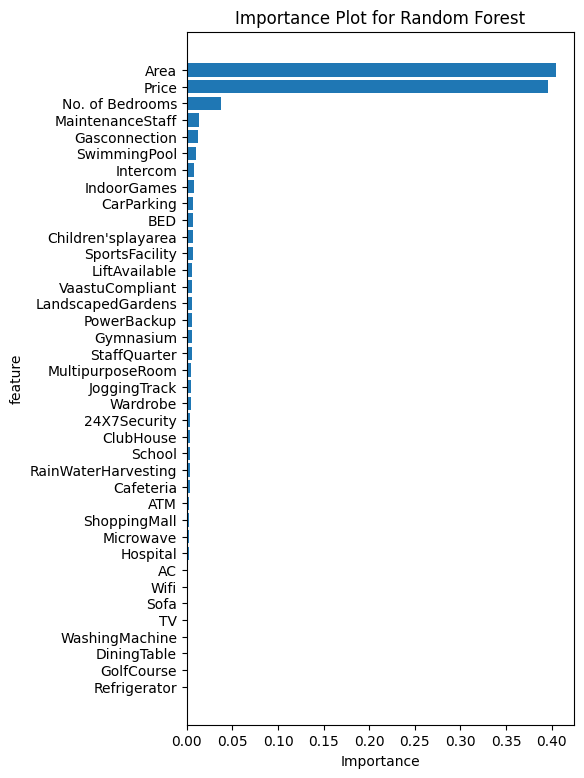

In [57]:
bm_rf =gcv_rf.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,9))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.ylabel("feature")
plt.title("Importance Plot for Random Forest")
plt.show()

In [146]:
housing.replace(9, np.NaN)

Price  Area                         Location       City  \
0      30000000  3340                 JP Nagar Phase 1  Bangalore   
1       7888000  1045       Dasarahalli on Tumkur Road  Bangalore   
2       4866000  1179  Kannur on Thanisandra Main Road  Bangalore   
3       8358000  1675                     Doddanekundi  Bangalore   
4       6845000  1670                          Kengeri  Bangalore   
...         ...   ...                              ...        ...   
32958  14500000  1180                   Mira Road East     Mumbai   
32959  14500000   530                     Naigaon East     Mumbai   
32960   4100000   700                         Shirgaon     Mumbai   
32961   2750000   995                   Mira Road East     Mumbai   
32962   2750000  1020                   Mira Road East     Mumbai   

       No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  \
0                  4.0       0               1.0        1.0           1.0   
1                  2.0       0               0.0        1.0           1.0   
2                  2.0       0               0.0        1.0           1.0   
3                  3.0       0               0.0        0.0           0.0   
4                  3.0       0               1.0        1.0           1.0   
...                ...     ...               ...        ...           ...   
32958              2.0       0               NaN        NaN           NaN   
32959              1.0       1               NaN        NaN           NaN   
32960              1.0       0               NaN        NaN           NaN   
32961              2.0       0               NaN        NaN           NaN   
32962              2.0       0               NaN        NaN           NaN   

       LandscapedGardens  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
0                    1.0  ...            1.0  0.0              0.0        0.0   
1                    1.0  ...            1.0  0.0              1.0        0.0   
2                    1.0  ...            1.0  0.0              0.0        0.0   
3                    0.0  ...            1.0  0.0              0.0        0.0   
4                    1.0  ...            1.0  0.0              0.0        0.0   
...                  ...  ...            ...  ...              ...        ...   
32958                NaN  ...            NaN  NaN              NaN        NaN   
32959                NaN  ...            NaN  NaN              NaN        NaN   
32960                NaN  ...            NaN  NaN              NaN        NaN   
32961                NaN  ...            NaN  NaN              NaN        NaN   
32962                NaN  ...            NaN  NaN              NaN        NaN   

       GolfCourse   TV  DiningTable  Sofa  Wardrobe  Refrigerator  
0             0.0  0.0          0.0   0.0       0.0           0.0  
1             0.0  0.0          0.0   0.0       0.0           0.0  
2             0.0  0.0          0.0   0.0       0.0           0.0  
3             0.0  0.0          0.0   0.0       0.0           0.0  
4             0.0  0.0          0.0   0.0       0.0           0.0  
...           ...  ...          ...   ...       ...           ...  
32958         NaN  NaN          NaN   NaN       NaN           NaN  
32959         NaN  NaN          NaN   NaN       NaN           NaN  
32960         NaN  NaN          NaN   NaN       NaN           NaN  
32961         NaN  NaN          NaN   NaN       NaN           NaN  
32962         NaN  NaN          NaN   NaN       NaN           NaN  

[32963 rows x 41 columns]

## XGB classification

In [163]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
imputer = SimpleImputer() 
clf = XGBClassifier(random_state=23)
pipe = Pipeline([('IMPUTER',imputer),('CLF',clf)])
print(pipe.get_params())


{'memory': None, 'steps': [('IMPUTER', SimpleImputer()), ('CLF', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=23, ...))], 'verbose': False, 'IMPUTER': SimpleImputer(), 'CLF': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
       

In [166]:
%%time
params = {'IMPUTER__strategy':['most_frequent'],
          'CLF__learning_rate':np.linspace(0.001,0.8, 10),
          'CLF__max_depth':[2,3,4,5,6,None],
          'CLF__n_estimators':[50,100,150]}
gcv = GridSearchCV(pipe, param_grid=params,verbose=3,
                   cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

gcv_res = pd.DataFrame(gcv.cv_results_)
gcv_res.to_csv("GridResults.csv")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.687 total time=   0.4s
[CV 2/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.687 total time=   0.3s
[CV 3/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.687 total time=   0.3s
[CV 4/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.687 total time=   0.4s
[CV 5/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.687 total time=   0.3s
[CV 1/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.681 total time=   0.6s
[CV 2/5] END CLF__learning_rate=0.001, CLF__max_depth=2, CLF__n_es

[CV 2/5] END CLF__learning_rate=0.001, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.664 total time=   2.3s
[CV 3/5] END CLF__learning_rate=0.001, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.665 total time=   2.2s
[CV 4/5] END CLF__learning_rate=0.001, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.665 total time=   2.2s
[CV 5/5] END CLF__learning_rate=0.001, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.665 total time=   2.3s
[CV 1/5] END CLF__learning_rate=0.001, CLF__max_depth=6, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.682 total time=   0.9s
[CV 2/5] END CLF__learning_rate=0.001, CLF__max_depth=6, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.682 total time=   1.0s
[CV 3/5] END CLF__learning_rate=0.001, CLF__max_depth=6, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.682 

[CV 2/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=3, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.542 total time=   0.8s
[CV 3/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=3, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.544 total time=   0.8s
[CV 4/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=3, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.545 total time=   0.8s
[CV 5/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=3, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.540 total time=   0.8s
[CV 1/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.533 total time=   1.3s
[CV 2/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.530 total time=   2.0s
[CV 3/5] END CLF__learning_rate=0.089777

[CV 4/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=6, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.479 total time=   2.7s
[CV 5/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=6, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.472 total time=   2.7s
[CV 1/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.519 total time=   1.0s
[CV 2/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.512 total time=   0.9s
[CV 3/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.518 total time=   0.9s
[CV 4/5] END CLF__learning_rate=0.08977777777777779, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.514 total time=   1.7s
[CV 5/5] END CLF__learning_rate=

[CV 1/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.504 total time=   1.2s
[CV 2/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.497 total time=   1.2s
[CV 3/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.499 total time=   1.2s
[CV 4/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.498 total time=   1.2s
[CV 5/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.493 total time=   1.2s
[CV 1/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=4, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.489 total time=   1.9s
[CV 2/5] END CLF__learning_rate=0.178555

[CV 3/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=None, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.460 total time=   2.8s
[CV 4/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=None, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.459 total time=   2.7s
[CV 5/5] END CLF__learning_rate=0.17855555555555558, CLF__max_depth=None, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.449 total time=   2.6s
[CV 1/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.557 total time=   0.4s
[CV 2/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.558 total time=   0.3s
[CV 3/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.556 total time=   0.4s
[CV 4/5] END CLF__learning_rate=0.

[CV 5/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=5, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.483 total time=   0.7s
[CV 1/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.471 total time=   1.5s
[CV 2/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.467 total time=   1.6s
[CV 3/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.474 total time=   1.5s
[CV 4/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.472 total time=   1.5s
[CV 5/5] END CLF__learning_rate=0.26733333333333337, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.461 total time=   1.7s
[CV 1/5] END CLF__learning_rate=0.2673333

[CV 2/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=2, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.513 total time=   0.9s
[CV 3/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=2, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.515 total time=   0.9s
[CV 4/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=2, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.514 total time=   0.9s
[CV 5/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=2, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.505 total time=   0.9s
[CV 1/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.521 total time=   0.5s
[CV 2/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.518 total time=   0.5s
[CV 3/5] END CLF__learning_rate=0.35611111

[CV 4/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=6, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.473 total time=   0.9s
[CV 5/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=6, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.464 total time=   0.9s
[CV 1/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.453 total time=   1.8s
[CV 2/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.446 total time=   1.9s
[CV 3/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.454 total time=   1.9s
[CV 4/5] END CLF__learning_rate=0.35611111111111116, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.457 total time=   1.9s
[CV 5/5] END CLF__learning_rate=0.35611111

[CV 1/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.479 total time=   1.4s
[CV 2/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.477 total time=   1.4s
[CV 3/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.477 total time=   1.5s
[CV 4/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.478 total time=   1.5s
[CV 5/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=3, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.470 total time=   1.3s
[CV 1/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=4, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.497 total time=   0.7s
[CV 2/5] END CLF__learning_rate=0.4448888

[CV 3/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.463 total time=   0.9s
[CV 4/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.469 total time=   1.0s
[CV 5/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=None, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.458 total time=   0.9s
[CV 1/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=None, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.450 total time=   1.8s
[CV 2/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=None, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.447 total time=   1.9s
[CV 3/5] END CLF__learning_rate=0.44488888888888894, CLF__max_depth=None, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.453 total time=   1.9s
[CV 4/5] END CLF__learnin

[CV 5/5] END CLF__learning_rate=0.5336666666666667, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.456 total time=   1.2s
[CV 1/5] END CLF__learning_rate=0.5336666666666667, CLF__max_depth=4, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.457 total time=   1.9s
[CV 2/5] END CLF__learning_rate=0.5336666666666667, CLF__max_depth=4, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.453 total time=   1.9s
[CV 3/5] END CLF__learning_rate=0.5336666666666667, CLF__max_depth=4, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.458 total time=   1.8s
[CV 4/5] END CLF__learning_rate=0.5336666666666667, CLF__max_depth=4, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.462 total time=   1.9s
[CV 5/5] END CLF__learning_rate=0.5336666666666667, CLF__max_depth=4, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.447 total time=   1.8s
[CV 1/5] END CLF__learning_rate=0.533666666666

[CV 2/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.528 total time=   0.4s
[CV 3/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.535 total time=   0.4s
[CV 4/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.534 total time=   0.4s
[CV 5/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=2, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.527 total time=   0.4s
[CV 1/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=2, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.510 total time=   0.7s
[CV 2/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=2, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.508 total time=   0.7s
[CV 3/5] END CLF__learning_rate=0.6224444444444445

[CV 4/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.456 total time=   1.5s
[CV 5/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=5, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.445 total time=   1.4s
[CV 1/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.450 total time=   2.0s
[CV 2/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.443 total time=   2.1s
[CV 3/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.453 total time=   2.0s
[CV 4/5] END CLF__learning_rate=0.6224444444444445, CLF__max_depth=5, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.453 total time=   2.1s
[CV 5/5] END CLF__learning_rate=0.622444444444

[CV 1/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.504 total time=   0.5s
[CV 2/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.496 total time=   0.5s
[CV 3/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.505 total time=   0.5s
[CV 4/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.500 total time=   0.5s
[CV 5/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=3, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.495 total time=   0.6s
[CV 1/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=3, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.482 total time=   0.9s
[CV 2/5] END CLF__learning_rate=0.7112222222222223,

[CV 3/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.461 total time=   1.9s
[CV 4/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.461 total time=   1.9s
[CV 5/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=6, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.447 total time=   1.9s
[CV 1/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=6, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.449 total time=   2.6s
[CV 2/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=6, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.438 total time=   2.7s
[CV 3/5] END CLF__learning_rate=0.7112222222222223, CLF__max_depth=6, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.463 total time=   2.7s
[CV 4/5] END CLF__learning_rate=0.711222222222

[CV 3/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.489 total time=   0.6s
[CV 4/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.483 total time=   0.6s
[CV 5/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=50, IMPUTER__strategy=most_frequent;, score=-0.471 total time=   0.6s
[CV 1/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.466 total time=   1.2s
[CV 2/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.459 total time=   1.3s
[CV 3/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.470 total time=   1.2s
[CV 4/5] END CLF__learning_rate=0.8, CLF__max_depth=4, CLF__n_estimators=100, IMPUTER__strategy=most_frequent;, score=-0.469 total time=   

[CV 5/5] END CLF__learning_rate=0.8, CLF__max_depth=None, CLF__n_estimators=150, IMPUTER__strategy=most_frequent;, score=-0.453 total time=   2.7s
{'CLF__learning_rate': 0.44488888888888894, 'CLF__max_depth': 6, 'CLF__n_estimators': 150, 'IMPUTER__strategy': 'most_frequent'}
-0.4413036048173904
CPU times: user 2h 30min 37s, sys: 33.9 s, total: 2h 31min 11s
Wall time: 20min 7s


In [ ]:
%%time
df = housing.sample(n=1000, random_state=23)
X = df.drop(['Resale','Location','City'], axis = 1)
y = df['Resale']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
lr = LogisticRegression()
gbm = XGBClassifier(random_state=23)
svm_l = SVC(kernel='linear', probability = True, random_state=23)
svm_r = SVC(kernel='rbf', probability = True, random_state=23)
dtc = DecisionTreeClassifier(random_state=23)
models = [('LR', lr), ('SVM_L', svm_l),('TREE',dtc),('SVM_R',svm_r)]
stack = StackingClassifier(estimators=models, final_estimator=gbm)

stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)
y_pred_prob = stack.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob[:,1]))
